In [664]:
import pandas as pd
import unicodedata
import string
import re
import numpy as np
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import  SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')


In [665]:
### Creates initial dataframe from .txt files
parties = ['republican', 'democrat', 'democrat', 'republican', 'democrat', 'republican', 'republican', 'republican', 'democrat', 'democrat', 'republican', 'democrat', 'republican', 'democrat']
pres = ['bush', 'carter', 'clinton', 'eisenhower', 'fdroosevelt', 'ford', 'gwbush', 'hoover', 'kennedy', 'lbjohnson', 'nixon', 'obama', 'reagan', 'truman']
war = ['war', 'nw', 'nw', 'nw', 'war', 'nw', 'war', 'nw', 'war', 'war', 'war', 'war', 'nw', 'war']
pres_dict = {}
for i, v in enumerate(pres):
    pres_dict[v]= {}
    pres_dict[v]['party'] = parties[i]

## imports .txt files and puts them into a dictionary
import os
data = []
for i, p in enumerate(pres):
    folder = 'corpus/' + p + '/'
    for filename in os.listdir(folder): 
        indiv = []
        indiv.append(p)
        indiv.append(parties[i])
        indiv.append(war[i])
        path = folder + filename
        if os.path.isfile(path) and filename.endswith(".txt"): 
            with open(path, "r") as file: 
                indiv.append(file.read())
            data.append(indiv)

# for filename in os.listdir('corpus_addendum/'): 
#     indiv = []
#     path = folder + filename
#     print(path)
#     if os.path.isfile(path) and filename.endswith(".txt"): 
#         with open(path, "r") as file:
#             p = filename.split('-')[1][:-4]
#             indiv.append(p)
#             indiv.append(pres_dict[p]['party'])
#             indiv.append(file.read())
#     data.append(indiv)

#converts the dictionary to a dataframe
df = pd.DataFrame (data, columns = ['name', 'party', 'war','speech'])

### splits the speech into title, date, text
def get_text(x):
    idx = x.find('>', x.find('>')+1, 100)
    return x[idx+1:]

df['title'] = df['speech'].apply(lambda x: x.split('"')[1])
df['date'] = df['speech'].apply(lambda x: x.split('"')[3])
df['text'] = df['speech'].apply(get_text)

def is_speech_type(string, speech_type):
    if string.lower().find(speech_type)>=0:
        return True
    else:
        return False

speech_type = ['interview', 'debate', 'inaugural address', 'state of the union', 'press conference']
for i in speech_type:
    df[i] = df.title.apply(lambda x: is_speech_type(x, i))

## Use this function to find parts of the debates that belong to each speaker
def find_between( s, first, last ):
    result = ''
    while True:
        try:
            start = s.index(first) + len(first)
            end = s.index( last, start )
            result += s[start:end] + ' '
            s = s[end:]
        except ValueError:
            return result

In [695]:
string = '''SPEECH 1


...Thank you so much.  Thats so nice.  Isnt he a great guy.  He doesnt get a fair press; he doesnt get it.  Its just not fair.  And I have to tell you Im here, and very strongly here, because I have great respect for Steve King and have great respect likewise for Citizens United, David and everybody, and tremendous resect for the Tea Party.  Also, also the people of Iowa.  They have something in common.  Hard-working people.  They want to work, they want to make the country great.  I love the people of Iowa.  So thats the way it is.  Very simple.
With that said, our country is really headed in the wrong direction with a president who is doing an absolutely terrible job.  The world is collapsing around us, and many of the problems weve caused.  Our president is either grossly incompetent, a word that more and more people are using, and I think I was the first to use it, or he has a completely different agenda than you want to know about, which could be possible.  In any event, Washington is broken, and our country is in serious trouble and total disarray.  Very simple.  Politicians are all talk, no action.  They are all talk and no action.  And its constant; it never ends.
And Im a conservative, actually very conservative, and Im a Republican.  And Im very disappointed by our Republican politicians.  Because they let the president get away with absolute murder.  You see always, oh were going to do this, were going to--.  Nothing ever happens; nothing ever happens.
You look at Obamacare.  A total catastrophe and by the way it really kicks in in 16 and it is going to be a disaster.  People are closing up shops.  Doctors are quitting the business.  I have a friend of mine whos a doctor, a very good doctor, a very successful guy.  He said, I have more accountants than I have patients.  And he needs because it is so complicated and so terrible and hes never had that before and hes going to close up his business.  And he was very successful guy.  But its happening more and more.
Look at Obamacare with a $5 billion website.  I have many websites, many, many websites.  Theyre all over the place.  But for $10, okay?
Now everything about Obamacare was a lie.  It was a filthy lie.  And when you think about it, lies, I mean are they prosecuted?  Does anyone do anything?  And what are the Republican politicians doing about it?  He lied about the doctor, he lied about every aspect.  You can keep your plan.  And youve all heard that hundreds of times.  Thats like the real estate location, location.  I dont even say it anymore because everybody goes location, location.  But you have heard this about Obamacare.
And its disgraceful.  Its a big, fat, horrible lie.  Your deductibles are going through the roof.  Youre not going to get--unless youre hit by an army tank, youre not going to get coverage.  And people that had plans that they loved, that they really loved, dont have those plans anymore.  So its a real, real disaster.  And somebody has to repeal and replace Obamacare.  And they have to do it fast and not just talk about it.
Now, we have to build a fence.  And its got to be a beauty.  Who can build better than Trump?  I build; its what I do.  I build; I build nice fences, but I build great buildings.  Fences are easy, believe me.  I saw the other day on television people just walking across the border.  Theyre walking.  The military is standing there holding guns and people are just walking right in front, coming into our country.  It is so terrible.  It is so unfair.  It is so incompetent.  And we dont have the best coming in.  We have people that are criminals, we have people that are crooks.  You can certainly have terrorists.  You can certainly have Islamic terrorists.  You can have anything coming across the border.  We dont do anything about it.  So I would say that if I run and if I win, I would certainly start by building a very, very powerful border.


Again, the politicians talk about it and they do nothing about it.  Benghazi.  Oh, Benghazi, Benghazi.  Everything is Benghazi.  What happens?  Nothing.
IRS, e-mails.  I get sued all the time, okay.  I run a big business.  You know Ive always said its very, very hard for a person who is very successful.  I have done so many deals.  Almost all of them have been tremendously successful.  Youll see that when I file my statements.  I mean you will see; you will be very proud of me, okay.  But Ive always said, and I said it strongly, its very hard for somebody that does tremendous numbers of deals to run for politics, run for political office, any office, let alone president.  Because youve done so much; youve beaten so many people; youve created so many--  Look, Obama, what did he do?  No deal.  He never did a deal.  He did one deal.  A house.  And if you did that house youd be in jail right now, okay.  He got away with murder.  But I can tell you, e-mails.  IRS, the e-mails, thousands of them, they were lost; they were lost.  If you were in my world you would know that e-mails cant be lost; they cant be lost.  So why arent our politicians finding out where those e-mails are?
They talk about executive orders and they talk about immigration and they talk about oh well we have to stop the border; thats the end of it.  Believe me if I did something you would have a border that would be great.  But they talk about it.  And then you have a president that does an executive order.  Nobody even heard of an executive order.  He does it to let people come in and nobody does anything about executive orders.  Why didnt they go to court and ask for declaratory judgment--which is something that when you know somebody is going to go after you and when its in writing, and hes been saying it for a long time; he said, Im going to approve this and that--why didnt our Republicans go in and get a declaratory judgment from the courts because you could have started the process six months earlier.  Instead they have a weak lawsuit, that probably the time its finished, I know so much about this, six, seven, eight years from now everyones going to forget about it.  Well be into a different mode, and our country will be further destroyed.  So we have to do something.
Jobs.  China.  I mean Ive made so much money fighting against the Chinese.  One of the best deals I ever did was against the Chinese, and they respect me for it.  And I know them.  And they say, we cant believe what were getting away with.  We cant believe how stupid your leaders are.  They tell me that.  Now they dont know Im going to go and make a speech about it, but why not.  But they tell me that.
And by the way, especially for the folks here that sell so much--goods, I mean the goods you sell are incredible; I dont know if youve been watching whats happening with the devaluations of so many countries.  The Euro, China is going crazy with the devaluation.  I never thought that theyd have the guts to do what theyre doing.  They are devaluing down to nothing.  And what its going to do is make it impossible for you to sell your product; its going make it impossible for you to compete.  And theyre getting away with it.  And they wouldnt have even done it two years ago, but now they feel were so weak and we have so many different problems all over the world that they can do it.  But you watch this devaluation of all of it.  I mean the Euro, China, Mexico; everybody is devaluing.  And when you hear the dollar is getting stronger, it sounds good.  You know its one of those things, sounds good.  Be very careful.  Be very careful.  Because were just going to lose more and more business to these foreign countries that really know what they are doing.  They have it set.  Dont forget another thing.  China became the number one economic power a year ago.  That was unthinkable; to think that that was going to happen.  It was absolutely unthinkable.  So it happened and its very, very sad.
Now we spent $2 trillion in Iraq.  We got nothing.  They dont even respect us; they dont even care about us.  Until they started getting their ass kicked, and call, oh please come back and help us.  We want you out; then all of the sudden a new group forms, ISIS.  By the way, you know how they formed.  They took the oil.  And for those of you that know and love Donald Trump--there are some of you--have I been saying for four years, keep the oil.  So now ISIS has the oil.  And the stuff that ISIS doesnt have, Iran is going to take.  So we get nothing.  We have $2 trillion and we have thousands of lives lost, thousands, and we have, what do we have.  I mean I walk down the streets of New York and I see so many wounded warriors, incredible people.  And we have to help those people, we have to help our vets, we have to help our military, we have to build our military.  But, and we have to do it fast; we have to do it fast.  We have incompetent people.  They put people in charge that have no clue what theyre doing.  It needs money.
We have to make our country rich again so we do that, so we can save Social Security.  Cause Im not a cutter; Ill probably be the only Republican that does not want to cut Social Security.  Im not a cutter of Social Security; I want to make the country rich so that Social Security can be afforded, and Medicare and Medicaid.  Get rid of the waste, get rid of the fraud, but you deserve your Social Security; youve been paying your Security.  And like, I like Congressman Ryan, I like a lot of the people that are talking about you know cutting Social Security, and by the way the Democrats are eating your lunch on this issue.  Its an issue that youre not going to win; youve got to make the country rich again and strong again so that you can afford it, and so you can afford military, and all of the other things.
Now, we have a game changer now, and the game changer is nuclear weapons.  We really do have to get strong, and we have to get strong fast.  We cant let Iran get a nuclear weapon.  We cant do it.  Cant do it.  We cannot let that happen.  You know in the old days, I would have said 100 years ago, 50 years ago, 30 years ago, pull out and let them fight each other.
Here we are in Syria.  Were fighting people that want to overturn Syria.  Think of this.  Were fighting ISIS, but ISIS wants to overturn the government.  Maybe you let them fight for a little while and then you take out the one that remains, okay.  But think of it; think of it.  ISIS is fighting them and we are bombing the hell out of them, but we want Syria to fall.  There are so many things; there are so many things.
But the one game changer that we have to be careful with, that we never really had to think about  too much before, other than a cetain number of years ago, is the nuclear.  Nuclear today, its not like soldiers in uniforms shooting rifles.  You can take out the East Coast of this country, you can take out large sections of the Midwest, you can take out things that were unthinkable.  The power.  And we have to be in a position where that never, ever, ever, every happens.  Weve never had this before.
We have a situation in Afghanistan; were spending tremendous amounts of money there.  Were trying to do the right thing.  We have leadership, again--no leadership respects us.  You know, leadership of other places never respect stupid people, okay, thats one thing youre going to find.  The same thing is happening there.  And I never knew that Afghanistan until a year ago or so, Afghanistan has tremendous wealth in minerals, different, not the oil, but minerals.  And were fighting here, and on the other side of the mountain China is taking out all the minerals.  Theyre taking it out.  Trillion of dollars and millions of dollars of minerals.  So were fighting here and they are taking it out, looking at us and saying thank you very much sucker.  Its really, really crazy.


So we have to rebuild quickly our infrastructure of this country.  If we dont--  The other day in Ohio a bridge collapsed.  Bridges are collapsing all over the country.  The reports on bridges and the like are unbelievable, whats happening with our infrastructure.
I go to Saudi Arabia, I go to Dubai; I am doing big jobs in Dubai.  I go to various different places.  I go to China.  They are building a bridge on every corner.  They have bridges that make the George Washington Bridge like small time stuff.  Theyre building the most incredible things you have ever seen.  They are building airports in Qatar--which they like to say "cutter" but Ive always said "qatar" so Ill keep it "qatar" what the hell.  But theyre building, theyre building an airport and have just completed an airport the likes of which you have never seen, in Dubai an airport the likes of which you have never seen.  And then I come back to LaGuardia where the runways have potholes.  The place is falling apart.  You go into the main terminal and they have a terraza floor thats so old its falling apart.  And they have a hole in it, and they replace it with asphalt.  So you have a white terraza floor and they put asphalt all over the place.  This is inside, not outside.  And I just left Dubai where they have the most incredible thing youve ever seen.  In fact my pilot said oh Mr. Trump this is such an honor.  I said its not an honor; theyre just smart.  But you look at LAX, and you look at Kennedy Airport, and you look at our airports generally, you look at our roadways where theyre crumbling.
You look at all of the things that are bad--  Ill give you an example. And this isnt part of what I was going to say, but I ride down the highways and somebody makes those guard rails.  You know the guard rails.  The ones that sort of go like this [demonstrates with hand] that are always  bent, rusted and horrible.  Did you ever see more than like 20 feet which isnt corroded, or bent or the heat, if it gets too hot, it just crushes.  Now theyve been selling this thing for 25 years.  Why doesnt someone stop them and get something that works.  Because they dont know; they dont know whats happening.  Somebody made a lot of money on that.  They dont know what is happening.
So we have to make our country great again.  We have to rebuild our country.  And we have a long way to go.  We are just in such serious trouble because we owe so much money.  Now we owe it to the Chinese, a lot of it.  We owe it to other countries.  Theyre the ones that hold the debt.  And then we give them money.  We have countries that we owe money to and yet were giving them subsidies.  I just ordered thousands of television sets and between LG and Samsung and I mean you know--  No American company comes to see and comes to bid.  Its South Korea, and whenever they have a problem we send the battleships, we send the destroyers, we send our airplanes, were going to protect them.  What are we doing; why arent they paying us?  Why arent they paying us; what are we doing?  I order thousands and thousands of sets all the time, for some reason its South Korea.  You know whether its China, South Korea, but in this case televisions, South Korea.  Why arent they doing something to justify what is going on?
Now, we have a very important election coming up.  We have a presidential election coming up. And we have some good people.  Nobody like Trump of course, but these are minor details.  We have some good people.
It cant be Mitt because Mitt ran and failed.  He failed.  I mean I liked him.  Look--like him, dislike him--the 47% statement that he made, thats not going away.  The Romneycare from Massachusetts, thats not going away.  What do you think theyre going to say oh we wont bring that up this time.  Its not fair because it was a long t--  That doesnt work.  But more importantly, he choked.  Something happened to him in the last month.  He had that election won.  And let me tell you something.  That election, sort of like a dealmaker that cant close the deal.  I know many of those guys; they get it up to the one-yard line, they go ah, ah I cant close it.  Or a golfer that cant sink the three-footer to win the tournament.  And there are many of them.  Most people are like that; I mean most people are like that.  You cant give somebody another chance, cause actually I think this election is tougher to win than beating a failed president.  I really do.  I think beating Obama would have been a much easier one than the one thats coming up, which is sad to say but true.  So you cant have Romney.  He choked.
You cant have Bush.  The last thing we need is another Bush.  Now I made that statement very strongly, and now every one says the last thing--  You know they copied it.  Ill be accused of copying the statement; thats the bad thing.  But I said it.  I was the one that said it first, and I mean it.  The last thing we need is another Bush.  Now, hes totally in favor of Common Core; thats a disaster, thats bad, it should be local and all of that.  But hes totally in favor of Common Core.  Hes very, very weak on immigration.  Dont forget--remember his statement--they come for love.  I say, what?  Come for love?  Youve got these people coming, half of them are criminals.  Theyre coming for love?  Theyre coming for a lot of other reasons, and its not love.  And when he runs, you got to remember his brother really gave us Obama.  I was never a big fan, but his brother gave us Obama.  Cause Abraham Lincoln coming home back from the dead could not have won the election because it was going so badly and the economy was just absolutely in shambles that last couple of months.  And then he appointed Justice Roberts.  And Jeb wanted Justice Roberts.  And Justice Roberts basically approved Obamacare in a shocking decision that nobody believes.  So you cant have Jeb Bush.  And hes going to lose aside from that; hes not going to win.  So Mitt and--you just cant have those two.  Thats it.  Thats it.  Its so simple.
So just in summing up and I just wrote a few of these little points down because its very important.  And I watch these teleprompters, and by the way I think any president candidate that runs should not be allowed to use a teleprompter, because we got one that uses teleprompters.  And people say, oh he is so quick on his feet.  He is reading it.  I mean give me a break.  Everything is read.  You dont really test the mettle of a man or a woman unless they can get up on stage and talk.  And thats what we ended up getting--the king of teleprompters.  But, so when I look at these things here I say you know what, its so much easier, it would be so nice, just bah, pa, bah, pa, bah, bing, bing, bing.  No problems, get off stage, everybody falls asleep and thats the end of that.  But we have to do something about these teleprompters.
But in looking at these situations--  I built an incredible company.  And youll see that.  An incredible company; a wonderful company.  I employ thousands of people and I love doing what Im doing.  And in a certain way, I wish I werent doing this, but our country is in such trouble and would be so easy to fix.  We have such great potential.
So if I run for president and if I win, I would totally succeed in:
creating jobs;
defeating ISIS and stopping the Islamic terrorists--and you have to do that;
reducing the budget deficit--so important, have to do it;
securing our Southern border--and I mean seriously securing it;
stopping nuclear weapons in Iran and elsewhere;
saving Social Security, Medicare and Medicaid, without cutting it down to the bone because its not fair to people that have been paying for their whole lives and other people and its not fair to future people coming up, and we can do it;
repealing Obamacare and replacing it with something far better for the people, and far less expensive, both for the people and for the country.  And believe me there are plans that are so much better for everybody.  And everybody can be covered.  Im not saying leave 50-percent of the people out.  Everybody can be c-- This plan is just a basic disaster.  Nobody knows.  As bad as the website was, this is how bad the plan itself is;
fixing our countrys infrastructure, our bridges, our schools, our highways, our airports.  And that, I can tell you, nobody is close to Trump.  I just got the best hotel in North America.  Im building, which is sort of interesting, think of this one.  Im building one of the great hotels of the world on Pennsylvania Avenue, right opposite the White House, between the White House and Congress.  Right on Penn.--  The  Old Post Office site, and I got it from Obama.  Do you believe that?  And everybody wanted it.  So, I cant believe it myself.  But its going to be fantastic;
and so many other things.
I know what needs to be done to make America great again.  We can make this country great again.  The potential is enormous.  And I am serious thinking of running for president because I can do the job.
Thank you all very much.  Thank you.  Thank you.  Thank you.  Thank you.  Thank you very much, everybody.  Thank you.  Beautiful.  Thank you.


SPEECH 2


Thank you for the opportunity to speak to you, and thank you to the Center for National Interest for honoring me with this invitation. It truly is a great honor. I’d like to talk today about how to develop a new foreign policy direction for our country, one that replaces randomness with purpose, ideology with strategy, and chaos with peace.


It’s time to shake the rust off America’s foreign policy. It’s time to invite new voices and new visions into the fold, something we have to do. The direction I will outline today will also return us to a timeless principle. My foreign policy will always put the interests of the American people and American security above all else. It has to be first. Has to be.


That will be the foundation of every single decision that I will make.


America First will be the major and overriding theme of my administration. But to chart our path forward, we must first briefly take a look back. We have a lot to be proud of.


In the 1940s we saved the world. The greatest generation beat back the Nazis and Japanese imperialists. Then we saved the world again. This time, from totalitarianism and communism. The Cold War lasted for decades but, guess what, we won and we won big. Democrats and Republicans working together got Mr. Gorbachev to heed the words of President Reagan, our great president, when he said, tear down this wall.






History will not forget what he did. A very special man and president. Unfortunately, after the Cold War our foreign policy veered badly off course. We failed to develop a new vision for a new time. In fact, as time went on, our foreign policy began to make less and less sense. Logic was replaced with foolishness and arrogance, which led to one foreign policy disaster after another.


They just kept coming and coming. We went from mistakes in Iraq to Egypt to Libya, to President Obama’s line in the sand in Syria. Each of these actions have helped to throw the region into chaos and gave ISIS the space it needs to grow and prosper. Very bad. It all began with a dangerous idea that we could make western democracies out of countries that had no experience or interests in becoming a western democracy.


We tore up what institutions they had and then were surprised at what we unleashed. Civil war, religious fanaticism, thousands of Americans and just killed be lives, lives, lives wasted. Horribly wasted. Many trillions of dollars were lost as a result. The vacuum was created that ISIS would fill. Iran, too, would rush in and fill that void much to their really unjust enrichment.


They have benefited so much, so sadly, for us. Our foreign policy is a complete and total disaster. No vision. No purpose. No direction. No strategy. Today I want to identify five main weaknesses in our foreign policy.


First, our resources are totally over extended. President Obama has weakened our military by weakening our economy. He’s crippled us with wasteful spending, massive debt, low growth, a huge trade deficit and open borders. Our manufacturing trade deficit with the world is now approaching $1 trillion a year.


We’re rebuilding other countries while weakening our own. Ending the theft of American jobs will give us resources we need to rebuild our military, which has to happen and regain our financial independence and strength. I am the only person running for the presidency who understands this and this is a serious problem.
I’m the only one — believe me, I know them all, I’m the only one who knows how to fix it.






Secondly, our allies are not paying their fair share, and I’ve been talking about this recently a lot. Our allies must contribute toward their financial, political, and human costs, have to do it, of our tremendous security burden. But many of them are simply not doing so.


They look at the United States as weak and forgiving and feel no obligation to honor their agreements with us. In NATO, for instance, only 4 of 28 other member countries besides America, are spending the minimum required 2 percent of GDP on defense. We have spent trillions of dollars over time on planes, missiles, ships, equipment, building up our military to provide a strong defense for Europe and Asia.


The countries we are defending must pay for the cost of this defense, and if not, the U.S. must be prepared to let these countries defend themselves. We have no choice.






The whole world will be safer if our allies do their part to support our common defense and security. A Trump administration will lead a free world that is properly armed and funded, and funded beautifully.


Thirdly, our friends are beginning to think they can’t depend on us. We’ve had a president who dislikes our friends and bows to our enemies, something that we’ve never seen before in the history of our country. He negotiated a disastrous deal with Iran, and then we watched them ignore its terms even before the ink was dry. Iran cannot be allowed to have a nuclear weapon, cannot be allowed. Remember that, cannot be allowed to have a nuclear weapon.




And under a Trump administration, will never, ever be allowed to have that nuclear weapon.




All of this without even mentioning the humiliation of the United States with Iran’s treatment of our ten captured sailors — so vividly I remember that day. In negotiation, you must be willing to walk. The Iran deal, like so many of our worst agreements, is the result of not being willing to leave the table.


When the other side knows you’re not going to walk, it becomes absolutely impossible to win — you just can’t win. At the same time, your friends need to know that you will stick by the agreements that you have with them. You’ve made that agreement, you have to stand by it and the world will be a better place. President Obama gutted our missile defense program and then abandoned our missile defense plans with Poland and the Czech Republic. He supported the ouster of a friendly regime in Egypt that had a longstanding peace treaty with Israel, and then helped bring the Muslim Brotherhood to power in its place.


Israel, our great friend and the one true democracy in the Middle East has been snubbed and criticized by an administration that lacks moral clarity. Just a few days ago, Vice President Biden again criticized Israel, a force for justice and peace, for acting as an impatient peace area in the region.


President Obama has not been a friend to Israel. He has treated Iran with tender love and care and made it a great power. Iran has, indeed, become a great, great power in just a very short period of time, because of what we’ve done. All of the expense and all at the expense of Israel, our allies in the region and very importantly, the United States itself.


We’ve picked fights with our oldest friends, and now they’re starting to look elsewhere for help. Remember that. Not good.
Fourth, our rivals no longer respect us. In fact, they’re just as confused as our allies, but in an even bigger problem is they don’t take us seriously anymore. The truth is they don’t respect us. When President Obama landed in Cuba on Air Force One, no leader was there, nobody, to greet him.


Perhaps an incident without precedent in the long and prestigious history of Air Force One. Then amazingly, the same thing happened in Saudi Arabia. It’s called no respect. Absolutely no respect.


Do you remember when the president made a long and expensive trip to Copenhagen, Denmark, to get the Olympics for our country, and after this unprecedented effort, it was announced that the United States came in fourth — fourth place? The president of the United States making this trip — unprecedented — comes in fourth place. He should have known the result before making such an embarrassing commitment. We were laughed at all over the world, as we have been many, many times.


The list of humiliations go on and on and on. President Obama watches helplessly as North Korea increases its aggression and expands further and further with its nuclear reach. Our president has allowed China to continue its economic assault on American jobs and wealth, refusing to enforce trade deals and apply leverage on China necessary to rein in North Korea. We have the leverage. We have the power over China, economic power, and people don’t understand it. And with that economic power, we can rein in and we can get them to do what they have to do with North Korea, which is totally out of control.


He has even allowed China to steal government secrets with cyber attacks and engaged in industrial espionage against the United States and its companies. We’ve let our rivals and challengers think they can get away with anything, and they do. They do at will. It always happens. If President Obama’s goal had been to weaken America, he could not have done a better job.


Finally, America no longer has a clear understanding of our foreign policy goals. Since the end of the Cold War and the breakup of the Soviet Union, we’ve lacked a coherent foreign policy. One day, we’re bombing Libya and getting rid of a dictator to foster democracy for civilians. The next day, we’re watching the same civilians suffer while that country falls and absolutely falls apart. Lives lost, massive moneys lost. The world is a different place.


We’re a humanitarian nation, but the legacy of the Obama-Clinton interventions will be weakness, confusion and disarray, a mess. We’ve made the Middle East more unstable and chaotic than ever before. We left Christians subject to intense persecution and even genocide.






We have done nothing to help the Christians, nothing, and we should always be ashamed for that, for that lack of action. Our actions in Iraq, Libya and Syria have helped unleash ISIS, and we’re in a war against radical Islam, but President Obama won’t even name the enemy, and unless you name the enemy, you will never ever solve the problem.






Hillary Clinton also refuses to say the words radical Islam, even as she pushes for a massive increase in refugees coming into our country. After Secretary Clinton’s failed intervention in Libya, Islamic terrorists in Benghazi took down our consulate and killed our ambassador and three brave Americans. Then, instead of taking charge that night, Hillary Clinton decided to go home and sleep. Incredible.


Clinton blames it all on a video, an excuse that was a total lie, proven to be absolutely a total lie. Our ambassador was murdered and our secretary of state misled the nation. And, by the way, she was not awake to take that call at 3 o’clock in the morning. And now ISIS is making millions and millions of dollars a week selling Libya oil. And you know what? We don’t blockade, we don’t bomb, w e don’t do anything about it. It’s almost as if our country doesn’t even know what’s happening, which could be a fact and could be true. This will all change when I become president.


To our friends and allies, I say America is going to be strong again. America is going to be reliable again. It’s going to be a great and reliable ally again. It’s going to be a friend again. We’re going to finally have a coherent foreign policy based upon American interests and the shared interests of our allies.






We’re getting out of the nation-building business and instead focusing on creating stability in the world. Our moments of greatest strength came when politics ended at the water’s edge. We need a new rational American foreign policy, informed by the best minds and supported by both parties, and it will be by both parties — Democrats, Republicans, independents, everybody, as well as by our close allies.




This is how we won the Cold War and it’s how we will win our new future struggles, which may be many, which may be complex, but we will win if I become president.






First, we need a long-term plan to halt the spread and reach of radical Islam. Containing the spread of radical Islam must be a major foreign policy goal of the United States and indeed the world. Events may require the use of military force, but it’s also a philosophical struggle, like our long struggle in the Cold War.


In this, we’re going to be working very closely with our allies in the Muslim world, all of which are at risk from radical Islamic violence, attacks and everything else. It is a dangerous world, more dangerous now than it has ever been.


We should work — thank you.






We should work together with any nation in the region that is threatened by the rise of radical Islam. But this has to be a two-way street. They must also be good to us. Remember that. They have to be good to us, no longer one way. It’s now two-way. And remember, us and all we’re doing, they have to appreciate what we’ve done to them. We’re going to help, but they have to appreciate what we’ve done for them. The struggle against radical Islam also takes place in our homeland. There are scores of recent migrants inside our borders charged with terrorism. For every case known to the public, there are dozens and dozens more. We must stop importing extremism through senseless immigration policies. We have no idea where these people are coming from. There’s no documentation. There’s no paperwork. There’s nothing. We have to be smart. We have to be vigilant.


A pause for reassessment will help us to prevent the next San Bernardino or frankly, much worse. All you have to do is look at the World Trade Center and September 11th, one of the great catastrophes, in my opinion, the single greatest military catastrophe in the history of our country; worse than Pearl Harbor because you take a look at what’s happened, and citizens were attacked, as opposed to the military being attacked — one of the true great catastrophes.


And then there’s ISIS. I have a simple message for them. Their days are numbered. I won’t tell them where and I won’t tell them how. We must...






... we must as a nation be more unpredictable. We are totally predictable. We tell everything. We’re sending troops. We tell them. We’re sending something else. We have a news conference. We have to be unpredictable. And we have to be unpredictable starting now.


But they’re going to be gone. ISIS will be gone if I’m elected president. And they’ll be gone quickly. They will be gone very, very quickly.






Secondly, we have to rebuild our military and our economy. The Russians and Chinese have rapidly expanded their military capability, but look at what’s happened to us. Our nuclear weapons arsenal, our ultimate deterrent, has been allowed to atrophy and is desperately in need of modernization and renewal. And it has to happen immediately. Our active duty armed forces have shrunk from 2 million in 1991 to about 1.3 million today. The Navy has shrunk from over 500 ships to 272 ships during this same period of time. The Air Force is about one-third smaller than 1991. Pilots flying B-52s in combat missions today. These planes are older than virtually everybody in this room.


And what are we doing about this? President Obama has proposed a 2017 defense budget that in real dollars, cuts nearly 25 percent from what we were spending in 2011. Our military is depleted and we’re asking our generals and military leaders to worry about global warming.


We will spend what we need to rebuild our military. It is the cheapest, single investment we can make. We will develop, build and purchase the best equipment known to mankind. Our military dominance must be unquestioned, and I mean unquestioned, by anybody and everybody.


But we will look for savings and spend our money wisely. In this time of mounting debt, right now we have so much debt that nobody even knows how to address the problem. But I do. No one dollar can be wasted. Not one single dollar can we waste. We’re also going to have to change our trade, immigration and economic policies to make our economy strong again. And to put Americans first again.




This will ensure that our own workers, right here in America, get the jobs and higher pay that will grow our tax revenues, increase our economic might as a nation, make us strong financially again. So, so important. We need to think smart about areas where our technological superiority, and nobody comes close, gives us an edge.


This includes 3D printing, artificial intelligence and cyber warfare. A great country also takes care of its warriors. Our commitment to them is absolute, and I mean absolute. A Trump administration will give our servicemen and women the best equipment and support in the world when they serve and where they serve. And the best care in the world when they return as veterans and they come back home to civilian life. Our veterans...






Our veterans have not been treated fairly or justly. These are our great people and we must treat them fairly. We must even treat them really, really well and that will happen under the Trump administration.






Finally, we must develop a foreign policy based on American interests. Businesses do not succeed when they lose sight of their core interests and neither do countries. Look at what happened in the 1990s. Our embassies in Kenya and Tanzania — and this was a horrible time for us — were attacked. and 17 brave sailors were killed on the U.S.S. Cole.


And what did we do? It seemed we put more effort into adding China into the World Trade organization, which has been a total disaster for the United States. Frankly, we spent more time on that than we did in stopping Al Qaeda. We even had an opportunity to take out Osama bin Laden and we didn’t do it


And then we got hit at the World Trade Center and the Pentagon. Again, the worst attack on our country in its history. Our foreign policy goals must be based on America’s core national security interests. And the following will be my priorities.


In the Middle East our goals must be, and I mean must be, to defeat terrorists and promote regional stability, not radical change. We need to be clearsighted about the groups that will never be anything other than enemies. And believe me, we have groups that no matter what you do, they will be the enemy.: We have to be smart enough to recognize who those groups are, who those people are, and not help them. And we must only be generous to those that prove they are indeed our friends.






We desire to live peacefully and in friendship with Russia and China. We have serious differences with these two nations, and must regard them with open eyes, but we are not bound to be adversaries. We should seek common ground based on shared interests.


Russia, for instance, has also seen the horror of Islamic terrorism. I believe an easing of tensions, and improved relations with Russia from a position of strength only is possible, absolutely possible. Common sense says this cycle, this horrible cycle of hostility must end and ideally will end soon. Good for both countries.


Some say the Russians won’t be reasonable. I intend to find out. If we can’t make a deal under my administration, a deal that’s great — not good, great — for America, but also good for Russia, then we will quickly walk from the table. It’s as simple as that. We’re going to find out.


Fixing our relations with China is another important step — and really toward creating an even more prosperous period of time. China respects strength and by letting them take advantage of us economically, which they are doing like never before, we have lost all of their respect.


We have a massive trade deficit with China, a deficit that we have to find a way quickly, and I mean quickly, to balance. A strong and smart America is an America that will find a better friend in China, better than we have right now. Look at what China is doing in the South China Sea. They’re not supposed to be doing it.
No respect for this country or this president. We can both benefit or we can both go our separate ways. If need be, that’s what’s going to have to happen.


After I’m elected president, I will also call for a summit with our NATO allies and a separate summit with our Asian allies. In these summits, we will not only discuss a rebalancing of financial commitments, but take a fresh look at how we can adopt new strategies for tackling our common challenges. For instance, we will discuss how we can upgrade NATO’s outdated mission and structure, grown out of the Cold War to confront our shared challenges, including migration and Islamic terrorism.






I will not hesitate to deploy military force when there is no alternative. But if America fights, it must only fight to win.






I will never sent our finest into battle unless necessary, and I mean absolutely necessary, and will only do so if we have a plan for victory with a capital V.






Our goal is peace and prosperity, not war and destruction. The best way to achieve those goals is through a disciplined, deliberate and consistent foreign policy. With President Obama and Secretary Clinton we’ve had the exact opposite — a reckless, rudderless and aimless foreign policy, one that has blazed the path of destruction in its wake.


After losing thousands of lives and spending trillions of dollars, we are in far worst shape in the Middle East than ever, ever before. I challenge anyone to explain the strategic foreign policy vision of Obama/Clinton. It has been a complete and total disaster.


I will also be prepared to deploy America’s economic resources. Financial leverage and sanctions can be very, very persuasive, but we need to use them selectively and with total determination. Our power will be used if others do not play by the rules. In other words, if they do not treat us fairly. Our friends and enemies must know that if I draw a line in the sand, I will enforce that line in the sand. Believe me.






However, unlike other candidates for the presidency, war and aggression will not be my first instinct. You cannot have a foreign policy without diplomacy. A superpower understands that caution and restraint are really truly signs of strength. Although not in government service, I was totally against the war in Iraq, very proudly, saying for many years that it would destabilize the Middle East. Sadly, I was correct, and the biggest beneficiary has been has been Iran, who is systematically taking over Iraq and gaining access to their very rich oil reserves, something it has wanted to do for decades.


And now, to top it off, we have ISIS. My goal is to establish a foreign policy that will endure for several generations. That’s why I also look and have to look for talented experts with approaches and practical ideas, rather than surrounding myself with those who have perfect résumés but very little to brag about except responsibility for a long history of failed policies and continued losses at war. We have to look to new people.






We have to look to new people because many of the old people frankly don’t know what they’re doing, even though they may look awfully good writing in The New York Times or being watched on television.


Finally, I will work with our allies to reinvigorate Western values and institutions. Instead of trying to spread universal values that not everybody shares or wants, we should understand that strengthening and promoting Western civilization and its accomplishments will do more to inspire positive reforms around the world than military interventions.






These are my goals as president. I will seek a foreign policy that all Americans, whatever their party, can support, so important, and which our friends and allies will respect and totally welcome. The world must know that we do not go abroad in search of enemies, that we are always happy when old enemies become friends and when old friends become allies, that’s what we want. We want them to be our allies.


We want the world to be — we want to bring peace to the world. Too much destruction out there, too many destructive weapons. The power of weaponry is the single biggest problem that we have today in the world.


To achieve these goals, Americans must have confidence in their country and its leadership. Again, many Americans must wonder why we our politicians seem more interested in defending the borders of foreign countries than in defending their own. Americans.






Americans must know that we’re putting the American people first again on trade.






So true. On trade, on immigration, on foreign policy. The jobs, incomes and security of the American worker will always be my first priority.






No country has ever prospered that failed to put its own interests first. Both our friends and our enemies put their countries above ours and we, while being fair to them, must start doing the same. We will no longer surrender this country or its people to the false song of globalism. The nation-state remains the true foundation for happiness and harmony. I am skeptical of international unions that tie us up and bring America down and will never enter.






And under my administration, we will never enter America into any agreement that reduces our ability to control our own affairs.






NAFTA, as an example, has been a total disaster for the United States and has emptied our states — literally emptied our states of our manufacturing and our jobs. And I’ve just gotten to see it. I’ve toured Pennsylvania. I’ve toured New York. I’ve toured so many of the states. They have been cleaned out. Their manufacturing is gone.


Never again, only the reverse — and I have to say this strongly — never again; only the reverse will happen. We will keep our jobs and bring in new ones. There will be consequences for the companies that leave the United States only to exploit it later. They fire the people. They take advantage of the United States. There will be consequences for those companies. Never again.


Under a Trump administration, no American citizen will ever again feel that their needs come second to the citizens of a foreign country.






I will view as president the world through the clear lens of American interests. I will be America’s greatest defender and most loyal champion. We will not apologize for becoming successful again, but will instead embrace the unique heritage that makes us who we are.


The world is most peaceful and most prosperous when America is strongest. America will continue and continue forever to play the role of peacemaker. We will always help save lives and indeed humanity itself, but to play the role, we must make America strong again.






And always — always, always, we must make, and we have to look at it from every angle, and we have no choice, we must make America respected again. We must make America truly wealthy again. And we must — we have to and we will make America great again. And if we do that — and if we do that, perhaps this century can be the most peaceful and prosperous the world has ever, ever known. Thank you very much, everybody. I appreciate it. Thank you.


SPEECH 3


A hand with little fingers coming out of a stem. Like, little. Look at my hands. They’re fine. Nobody other than Graydon Carter years ago used to use that. My hands are normal hands. During a debate, he was losing, and he said, "Oh, he has small hands and therefore, you know what that means." This was not me. This was Rubio that said, "He has small hands and you know what that means." Okay? So, he started it. So, what I said a couple of days later ... and what happened is I was on line shaking hands with supporters, and one of supporters got up and he said, "Mr. Trump, you have strong hands. You have good-sized hands." And then another one would say, "You have great hands, Mr. Trump, I had no idea." I said, "What do you mean?" He said, "I thought you were like deformed, and I thought you had small hands." I had fifty people ... Is that a correct statement? I mean people were writing, "How are Mr. Trump’s hands?" My hands are fine. You know, my hands are normal. Slightly large, actually. In fact, I buy a slightly smaller than large glove, okay? No, but I did this because everybody was saying to me, "Oh, your hands are very nice. They are normal." So Rubio, in a debate, said, because he had nothing else to say ... now I was hitting him pretty hard. He wanted to do his Don Rickles stuff and it didn’t work out. Obviously, it didn’t work too well. But one of the things he said was "He has small hands and therefore, you know what that means, he has small something else." You can look it up. I didn’t say it.


 I don’t want people to go around thinking that I have a problem. I’m telling you, Ruth, I had so many people. I would say 25, 30 people would tell me ... every time I’d shake people’s hand, "Oh, you have nice hands." Why shouldn’t I? And, by the way, by saying that I solved the problem. Nobody questions ... I even held up my hands, and said, "Look, take a look at that hand."


  I don’t know if it was presidential, honestly, whether it is or not. He said, ‘Donald Trump has small hands and therefore he has small something else.’ I didn’t say that. And all I did is when he failed, when he was failing, when he was, when Christie made him look bad, I gave him the– a little recap and I said, and I said, and I had this big strong powerful hand ready to grab him, because I thought he was going to faint. And everybody took it fine. Whether it was presidential or not I can’t tell you. I can just say that what he said was a lie. And everybody, they wanted to do stories on my hands; after I said that, they never did. And then I held up the hand, I showed people the hand. You know, when I’ve got a big audience. So yeah, I think it’s not a question of presidential ...


SPEECH 4


  Oh boy. We love Nevada. We love Nevada. Thank you. Thank you. Oh this is a great place. Thank you very much. Great evening. We will be celebrating for a long time tonight. Have a good time. Have a good time.
You know we weren’t expecting—a couple of months ago, we weren’t expecting to win this one, you know that, right? We weren’t. Of course if you listen to the pundits, we weren’t expected to win too much, and now we’re winning, winning, winning the country. And soon the country’s going to start winning, winning, winning. So I want to thank the volunteers. They’ve been unbelievable. These people, they work like endlessly, endlessly. We’re not going to forget it. And we’ve had some great numbers coming out of Texas, and amazing numbers coming out of Tennessee and Georgia and Arkansas and then in a couple of weeks later Florida. We love Florida so. We’re going to do very well in Ohio. We’re beating the governor. It’s always nice to be beating the governor. And Michigan—the whole thing. It’s going to be an amazing two months.
We might not even need the two months, folks, to be honest. So tonight we had 45 to 46%, and tomorrow you’d hear them say, you know, if they could just take the other candidates and add them up, and if you could add them up because you know the other candidates amount to 55%. So if they could—they keep forgetting that when people drop out, we’re going to get a lot of votes. You know they keep forgetting.
So I want to begin by thanking my boys, Eric has been all over the place making speeches. He’s getting better than me so I’m a little jealous. And Don went to _____, you were all over, right?
He loves the rifle stuff. This is serious rifle. This is serious NRA, both of them, both of them. We love the Second Amendment folks. Nobody loves it more than us, so just remember that.
And Corey and Hope, the staff, the whole group, and Charles and Dan and what a group we have. I want to just thank a couple of friends of mine that are here, the owner of this incredible hotel, Mr. and Mrs. Phil Ruffin, stand up. Great guy. Phil said, "Donald,"—like for the last three months he’s driving me crazy, he said—"Donald, I want to put $10 million into your campaign." I said, "Phil I don’t want your money. I don’t want to do it. I’m self funding." Every time I see him. It’s hard for me to turn down money because that’s what I’ve done in my whole life. I grab and grab and grab. You know I get greedy. I want money, money.
I’ll tell you what we’re going to do, right? We get greedy, right? Now we’re going to get greedy for the United States. We’re going to grab and grab and grab. We’re going to bring in so much money and so much everything. We’re going to make America great again, folks, I’m telling you folks, we’re going to make America great again.
And another great friend of mine, someone respected by everybody, a great friend of Phil too—Mr. and Mrs. Steve Wynn. Stand up, Steve. Stand up. Two great people. Steve is always calling. He’s always got advice, right Steve? "Donald I think you should do this and that." His advice I like to listen to, I’ll be honest. So Phil and Steve and families, we appreciate it. You’ve been great friends. Thank you, thank you.
So this was very exciting tonight. But I’ll tell you it looks like we won by a lot evangelicals. I love evangelicals, and I have to tell you pastor [Robert] Jeffress has been so incredible on television and elsewhere. He has been great. And as you know Liberty University—do we love Liberty University? Huh? Jerry Falwell Jr., an unbelievable guy, and he has been with us and with us from the beginning, and I want to thank Jerry and his family. It’s been amazing, the relationship. So we won the evangelicals.
We won with young. We won with old. We won with highly educated. We won with poorly educated. I love the poorly educated. We’re the smartest people, we’re the most loyal people, and you know what I’m happy about? Because I’ve been saying it for a long time. 46% were the Hispanics—46%, No. 1 one with Hispanics. I’m really happy about that.
So I’m very proud of you, this is an amazing night. I love the country, I love the country. We’re going in the wrong direction. We’re going to keep—as you know Gitmo, we’re keeping that open, and we’re going to load it up with bad dudes. We’re going to load it up w a lot of bad dudes out there. We’re going to have our borders nice and strong. We’re going to build the wall, you know that. We’re going to build the wall. And I have a lot of respect from Mexico, and you just heard we won Hispanics. But let me tell you Mexico is going to pay for the wall, right? It’s going to happen. It’s going to happen. They know it. I know it. We all know it.
We have a tremendous deficit. We have a trade deficit with Mexico. They’ll pay for the wall. They’ll be very happy about it. Believe me. I’ll talk to them. They’re going to be very, very thrilled. They’re going to be thrilled to be paying for the wall.
We’re going to be the smart people. We’re not going to be the people that get pushed around all over the place. We’re going to be the smart people. You’re going to be proud of your president, and you’re going to be even prouder of your country, OK?
So tonight folks, this was a great evening. I love this place. I love this state. I love Las Vegas. I have spent and invested so much money over here. Trump International Hotel—I keep telling Steve we have the best hotel in Las Vegas. He’s fighting me all the time. But that’s OK. But I just want to say it’s a great state, and they have great people. And I was so proud. You know, I went to caucus. I was all over the place tonight. The people are amazing. The enthusiasm, it was unbelievable to see.
The people of this country are absolutely amazing. I love you folks very much. Remember: Make America great again. We’re going to do it, and it’s going to happen fast. Thank you very much everybody. We love you. We love you.


SPEECH 5


Wow. Whoa. That is some group of people. Thousands.


So nice, thank you very much. That’s really nice. Thank you. It’s great to be at Trump Tower. It’s great to be in a wonderful city, New York. And it’s an honor to have everybody here. This is beyond anybody’s expectations. There’s been no crowd like this.


And, I can tell, some of the candidates, they went in. They didn’t know the air-conditioner didn’t work. They sweated like dogs.






They didn’t know the room was too big, because they didn’t have anybody there. How are they going to beat ISIS? I don’t think it’s gonna happen.






Our country is in serious trouble. We don’t have victories anymore. We used to have victories, but we don’t have them. When was the last time anybody saw us beating, let’s say, China in a trade deal? They kill us. I beat China all the time. All the time.


When did we beat Japan at anything? They send their cars over by the millions, and what do we do? When was the last time you saw a Chevrolet in Tokyo? It doesn’t exist, folks. They beat us all the time.


When do we beat Mexico at the border? They’re laughing at us, at our stupidity. And now they are beating us economically. They are not our friend, believe me. But they’re killing us economically.


The U.S. has become a dumping ground for everybody else’s problems.


SPEECH 6


Thank you. It’s true, and these are the best and the finest. When Mexico sends its people, they’re not sending their best. They’re not sending you. They’re not sending you. They’re sending people that have lots of problems, and they’re bringing those problems with us. They’re bringing drugs. They’re bringing crime. They’re rapists. And some, I assume, are good people.


oh And it only makes common sense. It only makes common sense. They’re sending us not the right people.


It’s coming from more than Mexico. It’s coming from all over South and Latin America, and it’s coming probably — probably — from the Middle East. But we don’t know. Because we have no protection and we have no competence, we don’t know what’s happening. And it’s got to stop and it’s got to stop fast.


Islamic terrorism is eating up large portions of the Middle East. They’ve become rich. I’m in competition with them.


They just built a hotel in Syria. Can you believe this? They built a hotel. When I have to build a hotel, I pay interest. They don’t have to pay interest, because they took the oil that, when we left Iraq, I said we should’ve taken.


So now ISIS has the oil, and what they don’t have, Iran has. And in 19 — and I will tell you this, and I said it very strongly, years ago, I said — and I love the military, and I want to have the strongest military that we’ve ever had, and we need it more now than ever. But I said, "Don’t hit Iraq," because you’re going to totally destabilize the Middle East. Iran is going to take over the Middle East, Iran and somebody else will get the oil, and it turned out that Iran is now taking over Iraq. Think of it. Iran is taking over Iraq, and they’re taking it over big league.


We spent $2 trillion in Iraq, $2 trillion. We lost thousands of lives, thousands in Iraq. We have wounded soldiers, who I love, I love — they’re great — all over the place, thousands and thousands of wounded soldiers.


And we have nothing. We can’t even go there. We have nothing. And every time we give Iraq equipment, the first time a bullet goes off in the air, they leave it.


Last week, I read 2,300 Humvees — these are big vehicles — were left behind for the enemy. 2,000? You would say maybe two, maybe four? 2,300 sophisticated vehicles, they ran, and the enemy took them.
Last quarter, it was just announced our gross domestic product — a sign of strength, right? But not for us. It was below zero. Whoever heard of this? It’s never below zero.


Our labor participation rate was the worst since 1978. But think of it, GDP below zero, horrible labor participation rate.


And our real unemployment is anywhere from 18 to 20 percent. Don’t believe the 5.6. Don’t believe it.


That’s right. A lot of people up there can’t get jobs. They can’t get jobs, because there are no jobs, because China has our jobs and Mexico has our jobs. They all have jobs.


But the real number, the real number is anywhere from 18 to 19 and maybe even 21 percent, and nobody talks about it, because it’s a statistic that’s full of nonsense.


Our enemies are getting stronger and stronger by the way, and we as a country are getting weaker. Even our nuclear arsenal doesn’t work.


It came out recently they have equipment that is 30 years old. They don’t know if it worked. And I thought it was horrible when it was broadcast on television, because boy, does that send signals to Putin and all of the other people that look at us and they say, "That is a group of people, and that is a nation that truly has no clue. They don’t know what they’re doing. They don’t know what they’re doing."


We have a disaster called the big lie: Obamacare. Obamacare.


Yesterday, it came out that costs are going for people up 29, 39, 49, and even 55 percent, and deductibles are through the roof. You have to be hit by a tractor, literally, a tractor, to use it, because the deductibles are so high, it’s virtually useless. It’s virtually useless. It is a disaster.TRUMP: And remember the $5 billion Web site? $5 billion we spent on a Web site, and to this day it doesn’t work. A $5 billion Web site.


If and when the Vatican is attacked by ISIS, which as everyone knows is ISIS’s ultimate trophy, I can promise you that the Pope would have only wished and prayed that Donald Trump would have been President because this would not have happened. ISIS would have been eradicated unlike what is happening now with our all talk, no action politicians.


The Mexican government and its leadership has made many disparaging remarks about me to the Pope, because they want to continue to rip off the United States, both on trade and at the border, and they understand I am totally wise to them. The Pope only heard one side of the story - he didn’t see the crime, the drug trafficking and the negative economic impact the current policies have on the United States. He doesn’t see how Mexican leadership is outsmarting President Obama and our leadership in every aspect of negotiation.


For a religious leader to question a person’s faith is disgraceful. I am proud to be a Christian and as President I will not allow Christianity to be consistently attacked and weakened, unlike what is happening now, with our current President. No leader, especially a religious leader, should have the right to question another man’s religion or faith. They are using the Pope as a pawn and they should be ashamed of themselves for doing so, especially when so many lives are involved and when illegal immigration is so rampant.


I have so many Web sites, I have them all over the place. I hire people, they do a Web site. It costs me $3. $5 billion Web site.
Well, you need somebody, because politicians are all talk, no action. Nothing’s gonna get done. They will not bring us — believe me — to the promised land. They will not.


As an example, I’ve been on the circuit making speeches, and I hear my fellow Republicans. And they’re wonderful people. I like them. They all want me to support them. They don’t know how to bring it about. They come up to my office. I’m meeting with three of them in the next week. And they don’t know — "Are you running? Are you not running? Could we have your support? What do we do? How do we do it?"


I like them. And I hear their speeches. And they don’t talk jobs and they don’t talk China. When was the last time you heard China is killing us? They’re devaluing their currency to a level that you wouldn’t believe. It makes it impossible for our companies to compete, impossible. They’re killing us.


But you don’t hear that from anybody else. You don’t hear it from anybody else. And I watch the speeches.
Thank you.


I watch the speeches of these people, and they say the sun will rise, the moon will set, all sorts of wonderful things will happen. And people are saying, "What’s going on? I just want a job. Just get me a job. I don’t need the rhetoric. I want a job."


And that’s what’s happening. And it’s going to get worse, because remember, Obamacare really kicks in in ’16, 2016. Obama is going to be out playing golf. He might be on one of my courses. I would invite him, I actually would say. I have the best courses in the world, so I’d say, you what, if he wants to — I have one right next to the White House, right on the Potomac. If he’d like to play, that’s fine.






In fact, I’d love him to leave early and play, that would be a very good thing.






But Obamacare kicks in in 2016. Really big league. It is going to be amazingly destructive. Doctors are quitting. I have a friend who’s a doctor, and he said to me the other day, "Donald, I never saw anything like it. I have more accountants than I have nurses. It’s a disaster. My patients are beside themselves. They had a plan that was good. They have no plan now."


We have to repeal Obamacare, and it can be — and — and it can be replaced with something much better for everybody. Let it be for everybody. But much better and much less expensive for people and for the government. And we can do it.
So I’ve watched the politicians. I’ve dealt with them all my life. If you can’t make a good deal with a politician, then there’s something wrong with you. You’re certainly not very good. And that’s what we have= representing us. They will never make America great again. They don’t even have a chance. They’re controlled fully — they’re controlled fully by the lobbyists, by the donors, and by the special interests, fully.


Yes, they control them. Hey, I have lobbyists. I have to tell you. I have lobbyists that can produce anything for me. They’re great. But you know what? it won’t happen. It won’t happen. Because we have to stop doing things for some people, but for this country, it’s destroying our country. We have to stop, and it has to stop now.


We need a leader that can bring back our jobs, can bring back our manufacturing, can bring back our military, can take care of our vets. Our vets have been abandoned.






And we also need a cheerleader.


You know, when President Obama was elected, I said, "Well, the one thing, I think he’ll do well. I think he’ll be a great cheerleader for the country. I think he’d be a great spirit."


He was vibrant. He was young. I really thought that he would be a great cheerleader.


He’s not a leader. That’s true. You’re right about that.


But he wasn’t a cheerleader. He’s actually a negative force. He’s been a negative force. He wasn’t a cheerleader; he was the opposite.


We need somebody that can take the brand of the United States and make it great again. It’s not great again.


We need — we need somebody — we need somebody that literally will take this country and make it great again. We can do that.






And, I will tell you, I love my life. I have a wonderful family. They’re saying, "Dad, you’re going to do something that’s going to be so tough."


You know, all of my life, I’ve heard that a truly successful person, a really, really successful person and even modestly successful cannot run for public office. Just can’t happen. And yet that’s the kind of mindset that you need to make this country great again.


So ladies and gentlemen...






I am officially running...






... for president of the United States, and we are going to make our country great again.






It can happen. Our country has tremendous potential. We have tremendous people.


We have people that aren’t working. We have people that have no incentive to work. But they’re going to have incentive to work, because the greatest social program is a job. And they’ll be proud, and they’ll love it, and they’ll make much more than they would’ve ever made, and they’ll be — they’ll be doing so well, and we’re going to be thriving as a country, thriving. It can happen.






I will be the greatest jobs president that God ever created. I tell you that.






I’ll bring back our jobs from China, from Mexico, from Japan, from so many places. I’ll bring back our jobs, and I’ll bring back our money.


Right now, think of this: We owe China $1.3 trillion. We owe Japan more than that. So they come in, they take our jobs, they take our money, and then they loan us back the money, and we pay them in interest, and then the dollar goes up so their deal’s even better.


How stupid are our leaders? How stupid are these politicians to allow this to happen? How stupid are they?






I’m going to tell you — thank you. I’m going to tell you a couple of stories about trade, because I’m totally against the trade bill for a number of reasons.


Number one, the people negotiating don’t have a clue. Our president doesn’t have a clue. He’s a bad negotiator.


He’s the one that did Bergdahl. We get Bergdahl, they get five killer terrorists that everybody wanted over there.


We get Bergdahl. We get a traitor. We get a no-good traitor, and they get the five people that they wanted for years, and those people are now back on the battlefield trying to kill us. That’s the negotiator we have.


Take a look at the deal he’s making with Iran. He makes that deal, Israel maybe won’t exist very long. It’s a disaster, and we have to protect Israel. But...
So we need people — I’m a free trader. But the problem with free trade is you need really talented people to negotiate for you. If you don’t have talented people, if you don’t have great leadership, if you don’t have people that know business, not just a political hack that got the job because he made a contribution to a campaign, which is the way all jobs, just about, are gotten, free trade terrible.


Free trade can be wonderful if you have smart people, but we have people that are stupid. We have people that aren’t smart. And we have people that are controlled by special interests. And it’s just not going to work.


So, here’s a couple of stories happened recently. A friend of mine is a great manufacturer. And, you know, China comes over and they dump all their stuff, and I buy it. I buy it, because, frankly, I have an obligation to buy it, because they devalue their currency so brilliantly, they just did it recently, and nobody thought they could do it again.


But with all our problems with Russia, with all our problems with everything — everything, they got away with it again. And it’s impossible for our people here to compete.


So I want to tell you this story. A friend of mine who’s a great manufacturer, calls me up a few weeks ago. He’s very upset. I said, "What’s your problem?"


He said, "You know, I make great product."


And I said, "I know. I know that because I buy the product."


He said, "I can’t get it into China. They won’t accept it. I sent a boat over and they actually sent it back. They talked about environmental, they talked about all sorts of crap that had nothing to do with it."


I said, "Oh, wait a minute, that’s terrible. Does anyone know this?"


He said, "Yeah, they do it all the time with other people."


I said, "They send it back?"


"Yeah. So I finally got it over there and they charged me a big tariff. They’re not supposed to be doing that. I told them."


Now, they do charge you tariff on trucks, when we send trucks and other things over there.


Ask Boeing. They wanted Boeing’s secrets. They wanted their patents and all their secrets before they agreed to buy planes from Boeing.


Hey, I’m not saying they’re stupid. I like China. I sell apartments for — I just sold an apartment for $15 million to somebody from China. Am I supposed to dislike them? I own a big chunk of the Bank of America Building at 1290 Avenue of the Americas, that I got from China in a war. Very valuable.


I love China. The biggest bank in the world is from China. You know where their United States headquarters is located? In this building, in Trump Tower. I love China. People say, "Oh, you don’t like China?"


No, I love them. But their leaders are much smarter than our leaders, and we can’t sustain ourself with that. There’s too much — it’s like — it’s like take the New England Patriots and Tom Brady and have them play your high school football team. That’s the difference between China’s leaders and our leaders.


They are ripping us. We are rebuilding China. We’re rebuilding many countries. China, you go there now, roads, bridges, schools, you never saw anything like it. They have bridges that make the George Washington Bridge look like small potatoes. And they’re all over the place.


We have all the cards, but we don’t know how to use them. We don’t even know that we have the cards, because our leaders don’t understand the game. We could turn off that spigot by charging them tax until they behave properly.


Now they’re going militarily. They’re building a military island in the middle of the South China sea. A military island. Now, our country could never do that because we’d have to get environmental clearance, and the environmentalist wouldn’t let our country — we would never build in an ocean. They built it in about one year, this massive military port.


They’re building up their military to a point that is very scary. You have a problem with ISIS. You have a bigger problem with China.


And, in my opinion, the new China, believe it or not, in terms of trade, is Mexico.


So this man tells me about the manufacturing. I say, "That’s a terrible story. I hate to hear it."


But I have another one, Ford.


So Mexico takes a company, a car company that was going to build in Tennessee, rips it out. Everybody thought the deal was dead. Reported it in the Wall Street Journal recently. Everybody thought it was a done deal. It’s going in and that’s going to be it, going into Tennessee. Great state, great people.TRUMP: All of a sudden, at the last moment, this big car manufacturer, foreign, announces they’re not going to Tennessee. They’re gonna spend their $1 billion in Mexico instead. Not good.


Now, Ford announces a few weeks ago that Ford is going to build a $2.5 billion car and truck and parts manufacturing plant in Mexico. $2.5 billion, it’s going to be one of the largest in the world. Ford. Good company.


So I announced that I’m running for president. I would...






... one of the early things I would do, probably before I even got in — and I wouldn’t even use — you know, I have — I know the smartest negotiators in the world. I know the good ones. I know the bad ones. I know the overrated ones.


You get a lot of them that are overrated. They’re not good. They think they are. They get good stories, because the newspapers get buffaloed (ph). But they’re not good.


But I know the negotiators in the world, and I put them one for each country. Believe me, folks. We will do very, very well, very, very well.


But I wouldn’t even waste my time with this one. I would call up the head of Ford, who I know. If I was president, I’d say, "Congratulations. I understand that you’re building a nice $2.5 billion car factory in Mexico and that you’re going to take your cars and sell them to the United States zero tax, just flow them across the border."


And you say to yourself, "How does that help us," right? "How does that help us? Where is that good"? It’s not.


So I would say, "Congratulations. That’s the good news. Let me give you the bad news. Every car and every truck and every part manufactured in this plant that comes across the border, we’re going to charge you a 35-percent tax, and that tax is going to be paid simultaneously with the transaction, and that’s it.


Now, here’s what is going to happen. If it’s not me in the position, it’s one of these politicians that we’re running against, you know, the 400 people that we’re (inaudible). And here’s what’s going to happen. They’re not so stupid. They know it’s not a good thing, and they may even be upset by it. But then they’re going to get a call from the donors or probably from the lobbyist for Ford and say, "You can’t do that to Ford, because Ford takes care of me and I take care of you, and you can’t do that to Ford."


And guess what? No problem. They’re going to build in Mexico. They’re going to take away thousands of jobs. It’s very bad for us.


So under President Trump, here’s what would happen:






The head of Ford will call me back, I would say within an hour after I told them the bad news. But it could be he’d want to be cool, and he’ll wait until the next day. You know, they want to be a little cool.


And he’ll say, "Please, please, please." He’ll beg for a little while, and I’ll say, "No interest." Then he’ll call all sorts of political people, and I’ll say, "Sorry, fellas. No interest," because I don’t need anybody’s money. It’s nice. I don’t need anybody’s money.


I’m using my own money. I’m not using the lobbyists. I’m not using donors. I don’t care. I’m really rich. I (inaudible).






And by the way, I’m not even saying that in a — that’s the kind of mindset, that’s the kind of thinking you need for this country.
So — because we got to make the country rich.


It sounds crass. Somebody said, "Oh, that’s crass." It’s not crass.


We got $18 trillion in debt. We got nothing but problems.


We got a military that needs equipment all over the place. We got nuclear weapons that are obsolete.


We’ve got nothing. We’ve got Social Security that’s going to be destroyed if somebody like me doesn’t bring money into the country. All these other people want to cut the hell out of it. I’m not going to cut it at all; I’m going to bring money in, and we’re going to save it.






But here’s what’s going to happen:


After I’m called by 30 friends of mine who contributed to different campaigns, after I’m called by all of the special interests and by the — the donors and by the lobbyists — and they have zero chance at convincing me, zero — I’ll get a call the next day from the head of Ford. He’ll say. "Please reconsider," I’ll say no.


He’ll say, "Mr. President, we’ve decided to move the plant back to the United States, and we’re not going to build it in Mexico." That’s it. They have no choice. They have no choice.


There are hundreds of things like that. I’ll give you another example.TRUMP: Saudi Arabia, they make $1 billion a day. $1 billion a day. I love the Saudis. Many are in this building. They make a billion dollars a day. Whenever they have problems, we send over the ships. We say "we’re gonna protect." What are we doing? They’ve got nothing but money.


If the right person asked them, they’d pay a fortune. They wouldn’t be there except for us.


And believe me, you look at the border with Yemen. You remember Obama a year ago, Yemen was a great victory. Two weeks later, the place was blown up. Everybody got out — and they kept our equipment.


They always keep our equipment. We ought to send used equipment, right? They always keep our equipment. We ought to send some real junk, because, frankly, it would be — we ought to send our surplus. We’re always losing this gorgeous brand-new stuff.


But look at that border with Saudi Arabia. Do you really think that these people are interested in Yemen? Saudi Arabia without us is gone. They;re gone.


And I’m the one that made all of the right predictions about Iraq. You know, all of these politicians that I’m running against now — it’s so nice to say I’m running as opposed to if I run, if I run. I’m running.






But all of these politicians that I’m running against now, they’re trying to disassociate. I mean, you looked at Bush, it took him five days to answer the question on Iraq. He couldn’t answer the question. He didn’t know. I said, "Is he intelligent?"


Then I looked at Rubio. He was unable to answer the question, is Iraq a good thing or bad thing? He didn’t know. He couldn’t answer the question.


How are these people gonna lead us? How are we gonna — how are we gonna go back and make it great again? We can’t. They don’t have a clue. They can’t lead us. They can’t. They can’t even answer simple questions. It was terrible.


But Saudi Arabia is in big, big trouble. Now, thanks to fracking and other things, the oil is all over the place. And I used to say it, there are ships at sea, and this was during the worst crisis, that were loaded up with oil, and the cartel kept the price up, because, again, they were smarter than our leaders. They were smarter than our leaders.


There is so much wealth out there that can make our country so rich again, and therefore make it great again. Because we need money. We’re dying. We’re dying. We need money. We have to do it. And we need the right people.


So Ford will come back. They’ll all come back. And I will say this, this is going to be an election, in my opinion, that’s based on competence.


So the reporter said to me the other day, "But, Mr. Trump, you’re not a nice person. How can you get people to vote for you?"


I said, "I don’t know." I said, "I think that number one, I am a nice person. I give a lot of money away to charities and other things. I think I’m actually a very nice person."


But, I said, "This is going to be an election that’s based on competence, because people are tired of these nice people. And they’re tired of being ripped off by everybody in the world. And they’re tired of spending more money on education than any nation in the world per capita, than any nation in the world, and we are 26th in the world, 25 countries are better than us in education. And some of them are like third world countries. But we’re becoming a third word country, because of our infrastructure, our airports, our roads, everything. So one of the things I did, and I said, you know what I’ll do. I’ll do it. Because a lot of people said, "He’ll never run. Number one, he won’t want to give up his lifestyle."


They’re right about that, but I’m doing it.


Number two, I’m a private company, so nobody knows what I’m worth. And the one thing is that when you run, you have to announce and certify to all sorts of governmental authorities your net worth.


So I said, "That’s OK." I’m proud of my net worth. I’ve done an amazing job.


I started off — thank you — I started off in a small office with my father in Brooklyn and Queens, and my father said — and I love my father. I learned so much. He was a great negotiator. I learned so much just sitting at his feet playing with blocks listening to him negotiate with subcontractors. But I learned a lot.


But he used to say, "Donald, don’t go into Manhattan. That’s the big leagues. We don’t know anything about that. Don’t do it."


I said, "I gotta go into Manhattan. I gotta build those big buildings. I gotta do it, Dad. I’ve gotta do it."


And after four or five years in Brooklyn, I ventured into Manhattan and did a lot of great deals — the Grand Hyatt Hotel. I was responsible for the convention center on the west side. I did a lot of great deals, and I did them early and young. And now I’m building all over the world, and I love what I’m doing.


But they all said, a lot of the pundits on television, "Well, Donald will never run, and one of the main reasons is he’s private and he’s probably not as successful as everybody thinks."


So I said to myself, you know, nobody’s ever going to know unless I run, because I’m really proud of my success. I really am.






I’ve employed — I’ve employed tens of thousands of people over my lifetime. That means medical. That means education. That means everything.


So a large accounting firm and my accountants have been working for months, because it’s big and complex, and they’ve put together a statement, a financial statement, just a summary. But everything will be filed eventually with the government, and we don’t extensions or anything. We’ll be filing it right on time. We don’t need anything.






And it was even reported incorrectly yesterday, because they said, "He had assets of $9 billion." So I said (ph), "No, that’s the wrong number. That’s the wrong number. Not assets."


So they put together this. And before I say it, I have to say this. I made it the old-fashioned way. It’s real estate. You know, it’s real estate.


It’s labor, and it’s unions good and some bad and lots of people that aren’t in unions, and it’s all over the place and building all over the world.


And I have assets — big accounting firm, one of the most highly respected — 9 billion 240 million dollars.


And I have liabilities of about $500 million (ph). That’s long-term debt, very low interest rates.


In fact, one of the big banks came to me and said, "Donald, you don’t have enough borrowings. Could we loan you $4 billion"? I said, "I don’t need it. I don’t want it. And I’ve been there. I don’t want it."


But in two seconds, they give me whatever I wanted. So I have a total net worth, and now with the increase, it’ll be well-over $10 billion. But here, a total net worth of — net worth, not assets, not — a net worth, after all debt, after all expenses, the greatest assets — Trump Tower, 1290 Avenue of the Americas, Bank of America building in San Francisco, 40 Wall Street, sometimes referred to as the Trump building right opposite the New York — many other places all over the world.


So the total is $8,737,540,00.


Now I’m not doing that...






I’m not doing that to brag, because you know what? I don’t have to brag. I don’t have to, believe it or not.


I’m doing that to say that that’s the kind of thinking our country needs. We need that thinking. We have the opposite thinking.


We have losers. We have losers. We have people that don’t have it. We have people that are morally corrupt. We have people that are selling this country down the drain.


So I put together this statement, and the only reason I’m telling you about it today is because we really do have to get going, because if we have another three or four years — you know, we’re at $8 trillion now. We’re soon going to be at $20 trillion.TRUMP: According to the economists — who I’m not big believers in, but, nevertheless, this is what they’re saying — that $24 trillion — we’re very close — that’s the point of no return. $24 trillion. We will be there soon. That’s when we become Greece. That’s when we become a country that’s unsalvageable. And we’re gonna be there very soon. We’re gonna be there very soon.


I will immediately terminate President Obama’s illegal executive order on immigration, immediately.






Fully support and back up the Second Amendment.






Now, it’s very interesting. Today I heard it. Through stupidity, in a very, very hard core prison, interestingly named Clinton, two vicious murderers, two vicious people escaped, and nobody knows where they are. And a woman was on television this morning, and she said, "You know, Mr. Trump," and she was telling other people, and I actually called her, and she said, "You know, Mr. Trump, I always was against guns. I didn’t want guns. And now since this happened" — it’s up in the prison area — "my husband and I are finally in agreement, because he wanted the guns. We now have a gun on every table. We’re ready to start shooting."


I said, "Very interesting."


So protect the Second Amendment.






End — end Common Core. Common Core should — it is a disaster. Bush is totally in favor of Common Core. I don’t see how he can possibly get the nomination. He’s weak on immigration. He’s in favor of Common Core. How the hell can you vote for this guy? You just can’t do it. We have to end — education has to be local.


Rebuild the country’s infrastructure.


Nobody can do that like me. Believe me. It will be done on time, on budget, way below cost, way below what anyone ever thought.


I look at the roads being built all over the country, and I say I can build those things for one-third. What they do is unbelievable, how bad.


You know, we’re building on Pennsylvania Avenue, the Old Post Office, we’re converting it into one of the world’s great hotels. It’s gonna be the best hotel in Washington, D.C. We got it from the General Services Administration in Washington. The Obama administration. We got it. It was the most highly sought after — or one of them, but I think the most highly sought after project in the history of General Services. We got it. People were shocked, Trump got it.


Well, I got it for two reasons. Number one, we’re really good. Number two, we had a really good plan. And I’ll add in the third, we had a great financial statement. Because the General Services, who are terrific people, by the way, and talented people, they wanted to do a great job. And they wanted to make sure it got built.


So we have to rebuild our infrastructure, our bridges, our roadways, our airports. You come into La Guardia Airport, it’s like we’re in a third world country. You look at the patches and the 40-year-old floor. They throw down asphalt, and they throw.


You look at these airports, we are like a third world country. And I come in from China and I come in from Qatar and I come in from different places, and they have the most incredible airports in the world. You come to back to this country and you have LAX, disaster. You have all of these disastrous airports. We have to rebuild our infrastructure.


Save Medicare, Medicaid and Social Security without cuts. Have to do it.






Get rid of the fraud. Get rid of the waste and abuse, but save it. People have been paying it for years. And now many of these candidates want to cut it. You save it by making the United States, by making us rich again, by taking back all of the money that’s being lost.


Renegotiate our foreign trade deals.


Reduce our $18 trillion in debt, because, believe me, we’re in a bubble. We have artificially low interest rates. We have a stock market that, frankly, has been good to me, but I still hate to see what’s happening. We have a stock market that is so bloated.


Be careful of a bubble because what you’ve seen in the past might be small potatoes compared to what happens. So be very, very careful.


And strengthen our military and take care of our vets. So, so important.


SPEECH 7




Chris, thank you very much. I appreciate it.
This has been an amazing evening. Already, we’ve won five major states and it looks like we could win six or seven or eight or nine.


It’s really been — it’s really been great.
I want to congratulation Ted on the winning of Texas. He worked hard on he — I know how hard he worked actually, and so I congratulate Ted Cruz on that win. That was an excellent win.
We’re going to make America great again, folks. We’re going to make it great again.
And, you know, I watched Hillary’s speech and she’s talking about wages have been poor and everything’s poor and everything’s doing badly, but we’re going to make it — she’s been there for so long. I mean, if she hasn’t straightened it out by now, she’s not going to straighten it out in the next four years. It’s just going to become worse and worse. She wants to make America whole again and I’m trying to figure out what is that all about. Make America great again is going to be much better than making America whole again.
So I just want to say that this was an exciting evening. It’s so great to be in Florida. It’s so great to be at Mar-A-Lago with friends and the press and the media and everybody.


I know it was a very tough night for Marco Rubio. He had a tough night but he worked hard. He spent a lot of money. He is a lightweight, as I’ve said many times before. But you know what? We’re going to go to Florida, we’re going to spend so much time in Florida. We’ve got about a 20-point lead. I know that a lot of groups, a lot of the special interests and a lot of the lobbyists and the people that want to have their little senator do exactly as they want, they’re going to put $20 million or $25 million into it over the next two weeks, from what just came over the wires. And frankly, I think that’s fine. As far as I’m concerned, it’s fine. And if he wins, they’ll have totally controlled — total control. But he’s not going anywhere anyway, but we’ll see what happens. But we’re going to spend a lot of time in Florida.
The Virginia one was just a great win because it’s a place that is just spectacular and a place that we have big investments in, as we have in Florida. Remember, we have thousands of employees in Florida, all along Miami, Doral and Mar-A-Lago and so many other places. And it’s been an amazing place to invest. It’s been amazing to have so many wonderful employees, so many of whom are here tonight, really urging us on.
And you know, I have thousands of employees all over the country, actually, all over the world but for purposes of tonight, we’ll just say all over the country. And it’s been just so beautiful to watch this company grow and to watch it grow so strongly.
Recent articles came out talking about how great a company we built, and now we want to put that same ability into doing something for our nation. I mean, our nation is in serious trouble. We’re being chilled on trade, absolutely destroyed. China is just taking advantage of us. I have nothing against China. I have great respect for China, but their leaders are too smart for our leaders. Our leaders don’t have a clue and the trade deficits at $400 billion and $500 are too much. No country can sustain that kind of trade deficit. It won’t be that way for long. We have the greatest business leaders in the world on my team already and, believe me, we’re going to redo those trade deals and it’s going to be a thing of beauty.
You look at countries like Mexico, where they’re killing us on the border, absolutely destroying us on the border. They’re destroying us in terms of economic development. Companies like Carrier Air Conditioner just moving into Mexico. Ford, moving into Mexico. Nabisco, closing up shop in Chicago and moving into Mexico. We have to stop it, folks. I know how to stop it. We’re going to create jobs. We’re going to create jobs like you’ve never seen.
We’re going to lower taxes. I have a plan that Larry Kudlow and so many others think is the best plan they’ve seen. We’re going to lower taxes substantially for the middle class. The middle class has been forgotten in our country. It really helped and really probably was the predominant factor in making our country into a country that we all love so much and we’re all so proud of, but we’ve forgotten the middle class. So we’re going to lower taxes.
We’re lowering taxes on business. You look at all the companies that are moving out. When you see Pfizer moving to Ireland and you see so many other companies, constantly now they’re leaving. They used to move from New York to Florida, or they’d move from New Jersey to someplace else, Chris. But now they’re moving from here —  — not that many people are leaving New Jersey. But Chris understands the problem, fully understands. Now they’re leaving from places that they used to move to into other parts of the world. We can’t let that happen.
We’ve lost our manufacturing jobs. We’ve lost our manufacturing. Millions and millions of jobs, thousands and thousands and thousands of plants, manufacturing plants, warehouses. I mean, we are losing so much. We can’t let it happen.
I tell the story often about a friend of mine who is in the excavation business and he always orders Caterpillar. And recently, he ordered Komatsu tractors from Japan because they’ve cut the yen. They’ve devalued the yen to such an extent that it was virtually impossible for Caterpillar to compete. And I don’t want that to happen. That’s not going to happen. They shouldn’t be allowed to do it.
We have tremendous power over everybody because we are really the source. We have great, great power. The problem is we have politicians who truly, truly, truly don’t know what they’re doing. So we’re going to work very, very hard.
I’m so honored by this evening. If you would’ve told me on June 16th, when I was with my wife, Melania, and we came down the escalator in Trump Tower and it looked, literally, well, a little bit like this. You have a lot of cameras here tonight.


It looked, literally, like the Academy Awards. I never saw so many cameras in my life. And it takes courage to run. I’ll tell you what, it takes a lot of courage to run for president. I’ve never done this before. I’ve been a job-producer. I’ve done a lot of things but this is something I’ve never done, but I felt we had to do it. When you look at the incompetence of the Iran deal, where we give $150 billion, we get absolutely nothing. When you look at all of the problems our country has and you look at our military, which is really being depleted rapidly, depleted. We’re going to make our military bigger and better and stronger than ever before, and nobody, nobody, nobody is going to mess with us, folks, nobody.


So it’s just an amazing honor to have you with me tonight. And if you want, press, I think we told you before we’d be okay if you want to ask a few questions.
Yes, go ahead.


Well, they can always do that and then they’ll — then they’ll just lose everything and that would be the — that would be the work of a loser.
But let me just explain something. If you’ve seen what’s happened, whether you go to South Carolina, where I had a huge victory, where we had a tremendous victory in New Hampshire, tremendous in Nevada, you look at what’s happened, and tonight, of course, is the best of all. I mean, right now, they’re projected I guess six, but we could be seven, eight, nine, and major states. It’s Georgia, Alabama, Massachusetts — (CHEERS) — Tennessee, Virginia. And you know, these are amazing states and we’re going to probably get a lot more. In fact, we’re projected to have some pretty good additional numbers.
But I will say this. Look, we have expanded the Republican Party. When you look at what’s happened in South Carolina and you see the kind of numbers that we got, in terms of extra people coming in. They came from the Democratic Party, or the Democrat Party, and they’re Democrats and they’re long-time Democrats and they were never going to switch and they all switched. And they were independents. And we’ve actually expanded the party. Look at the number of votes we had in that area, as an example. Four years ago, they had 390,000 or so votes. We doubled it. We were almost 800,000. Whereas the Democrats went down. There’s much less enthusiasm for the Democrats.
So I — look, I’m a unifier. I know people are going to find that a little bit hard to believe, but believe me, I am a unifier. Once we get all of this finished, I’m going to go after one person, that’s Hillary Clinton, on the assumption she’s allowed to run, which is a big assumption. I don’t know that she’s going to be allowed to run. And I think that’s, frankly, going to be an easy race. You see the polls. I beat Hillary in many polls. I know one thing. I don’t think Marco is going to be able to beat her. I don’t think — in all fairness, I think Ted’s going to have a very hard time. But Ted at least has a shot because at least he’s won a little bit.
So I just tell you this. We are going to be a much finer party, a much — we’re going to be a unified party, I mean, to be honest with you. And we are going to be a much bigger party, and you can see that happening. We’re going to be a much bigger party. Our party is expanding. And all you have to do it take a look at the primary states where I’ve won and just look — we’ve gone from X number to a much larger number. That hasn’t happened to the Republican Party in many, many decades. So I think we’re going to be more inclusive. I think we’re going to be more unified and I think we’re going to be a much bigger party, and I think we’re going to win in November. OK, yeah?


I’m just doing what’s right. Look, Planned Parenthood has done very good work for some — for many, many — for millions of women. And I’ll say it and I know a lot of the so-called conservatives, they say that’s really — because I’m a conservative, but I’m a common-sense conservative. But millions of women have been helped by Planned Parenthood. But we’re not going to allow and we’re not going to fund as long as you have the abortion going on at Planned Parenthood, and we understand that and I’ve said it loud and clear. But — and we’ll see what happens. But Planned Parenthood — millions of people — and I’ve had thousands of letters from women that have been helped. And this wasn’t a setup. This was people writing letters. I’m going to be really good for women. I’m going to be good for women’s health issues. It’s very important to me, very important to me.
 And maybe that’s not a perfect conservative view, but I can tell you one thing. I’m more conservative than anybody on the military, on taking care of our vets, on the border, on the wall, on getting rid of Obamacare and coming up with something much, much better, and certainly, getting rid of common core and bringing education to a local level so that you’re going to have good education for our children who are being absolutely starved for proper education.
So Sarah, I mean, you know, you can call it what you want, but I am a truth-teller and I will tell the truth, OK?
Yeah, go ahead, finish it.


I feel awfully good. I mean, I’m watching your people — I’m watching your people on — and I’m going to be very nice, I’m going to be very nice — I’m watching your people on CNN and I’m watching the Fox people and I’m watching the MSNBC people, too, OK? See? I’m becoming diplomatic.  And they are certainly being very nice to me tonight. I mean, you know, they’re being very strong. And they are, they’re declaring Marco Rubio the big loser of the night, which is true. He didn’t win anything. He hasn’t won anything, period.
And by the way, and I have to tell you — and he was very, very nasty. I’ve never heard a person get up and speak on an evening like this and be so nasty, but he’s got a right to be nasty. He hasn’t won anything and he’s not going to win very much.
But I do congratulate Ted because I know how hard Ted worked on Texas and it’s a big get. Now I also did very well in Texas. I came in second. And one of the things my son, Eric, told me, which I didn’t even realize, is that not only did I win most of the states — and some are coming in and I’m expected to win them — but I came in second — I came in no worse than second. So it wasn’t like I won and then I disappeared. The worst I had was a second. So I’m very, very honored by the turnout, OK?
Yes, go ahead.


Right. Oh, they’re totally wrong. Look, I disavowed. I disavowed when I — in fact, Chris is my number one — Chris gave me the honor of joining the campaign. He called me. He said, "Donald, what you’ve got is a movement." We spoke today in Kentucky. You’ve never seen a crowd like that. That had to be 20,000 people inside this massive convention center and it was incredible. And every place we’re speaking, if we have 10,000 people it’s like a small group. We had 35,000 people the other day in Alabama. And when Chris called, he said this is a movement; this is something like I’ve never seen. And in all fairness to the press, a lot of the press have said the same thing. They’ve never seen what’s happening right now. They’ve never seen anything like it. And I’m just honored by it.
Now, when Chris joined, we had a news conference and they asked me the exact same question. I said I disavow. Now, right after the program that we’re talking about — and I thought it was clear, but you know, we’re talking about groups, groups, groups. I do have to know the name of the group because, who knows? I mean, they have to give me the name of the group. But right after, when I reviewed it, I put out a tweet and I put out on Facebook that I totally disavow. Now everybody knew I did that but the press refused to look at that. It was right after. And I disavowed then; I disavowed today on ABC with George Stephanopoulos, I disavowed again. I mean, how many times are you supposed to disavow? But I disavow and hopefully it’s the final time I have to do it. But if you look at Facebook and if you look at Twitter, right after the show I put out a statement because I want everybody to be sure.
Yes, go ahead.


No, it’s not, but there is always going to be some negotiation, and it’s going to be a good negotiation, not a bad negotiation. It’s going to be a negotiation where we’ll start at certain levels and hopefully I will make a great deal, and lots of great deals, for the American people.
So you know, look, you can’t go around just signing our little notices that the president signs all the time, executive orders, he’s done executive order, executive order. It’s almost like, I don’t even know. Does he ever go a deal with Congress anymore? Does he ever speak to the Senate? Does he ever speak with congressmen and get them into a room and get things done?
You know, a good example of this, in all fairness, is something that I — is very, very important to me; corporate inversion. Carl Icahn, who’s a friend of mine who endorsed me, great businessman, he — it bothers him so much he calls me about it all the time, where we’re losing companies. And we’re losing for two reasons. We’re losing for a lot of reasons but the taxes are too high. We have the highest — we’re the highest taxed nation in the world.
And very importantly, they have trillions, for companies, trillions of dollars outside of this country. The Democrats agree it should be brought back in. The Republicans agree it should be brought back in. Everybody agrees it should be brought back in. I could sit in a room — or the Oval Office — for a period of, literally, a half hour and I really believe I could get everybody — every single — you know, it’s one thing they don’t agree on health care or they don’t agree on common core or they don’t agree on other things and they’ll fight. Here’s something every single — I mean, almost everybody agrees. These trillions and trillions of dollars should be brought into the country.
The president can’t make a deal. The reason is he doesn’t know how to make a deal, probably doesn’t work at it, probably doesn’t care, but you’re talking about tremendous number of — tremendous amounts of money. So when you have something that everybody wants and you can’t make a deal, there’s something going on that’s really wrong. And what it means is you have the wrong leader.
Yes?


Well, look, everything — we are going to have a wall. I can tell you we are going to have a wall. I watched the ex-president of Mexico, the arrogance of this man. And I get along great with Hispanics. You saw in Nevada, I won in the poll, the Hispanic vote. I have thousands of people that work for me right now that are Hispanic. I’ve had thousands and thousands over my lifetime. These are great people. The Mexican leaders are too smart for our leaders and you saw it. Vincente Fox, first of all, he used a word that you should never have — if I ever used that word you folks would’ve never, ever, ever let me get away with it. Nobody even talked about the word he used and this is the ultimate word. But he was angry at the concept of somebody saying that they were going to pay for the wall. Mexico is going to pay for the wall. We have a trade deficit with Mexico of $58 billion a year — $58 billion. The wall is going to cost $10 billion. It’s so easy. I’ve had these guys that I’m on the stage with go you don’t really mean Mexico is going to pay for the wall. One — as sure as you’re standing there, 100 percent, Mexico’s going to pay, 100 percent.


And the reason is I’m a businessman. I know how to do this. Politicians are all talk, no action. It’s not going to — except for Chris Christie, of course.  It’s not — look, it’s not going to happen. It’s not going to happen with these people.
So when you think of it — and then they say you’ll never be able to build a wall. Well, it’s 2,000 miles but we really need 1,000 miles. The Great Wall of China, built 2,000 years ago, is 13,000 miles, folks, and they didn’t have Caterpillar tractors, because I only want to use Caterpillar, if you want to know the truth, or John Deere. I buy a lot of equipment from John Deere. I love John Deere, too. But they didn’t have tractors. They didn’t have cranes. They didn’t have excavation equipment. The wall is 13,000 miles long. We need 1,000 miles and we have all of the materials. We can do that so beautifully. And this is going to be a serious wall. This is going to be high wall. This is going to be a very serious wall.
We’re going to stop drugs from coming into New Hampshire. You know, when I won New Hampshire, those people were so incredible to me. And when you go, you wouldn’t believe it because it’s so bucolic, so beautiful. You look at the fields and you look at everything, it’s so beautiful. And yet, you go to a meeting in New Hampshire, their number one problem, their number one problem is heroine. The heroine is pouring in and they have so many of their young people and other people addicted. And I told them I’m going to stop it. I’m going to stop it. We’re going to have a strong border, and I mean strong.
And by the way, speaking of people, people are going to come in and they’re going to come into this country, but they’re going to come in legally, OK?


I’ve got to find out what’s going on. We’ve got a big problem. We have a big, big problem. I’ll tell it like it is. We have a big, big problem. We’ve got to figure it out. We’re going to figure it out. Radical Islamic terrorism, big, big problem, not only for us. You take a look at Germany, you take a look at Sweden, you take a look at Brussels. You look at some of these places, it’s like a disaster. And we’re not going to allow people to come into our country who we have no idea who they are, we have no idea where they come from, they have no paperwork, they’re young and they’re strong. You look at that migration line; they’re young, they’re strong, they’re powerful. And you say why aren’t they back fighting for their country?
Now, with all of that being said, I feel strongly — I have a bigger heart than anybody. We’re going to build a safe zone. It’s going to be in Syria. And I’m going to get the Gulf states, who have more money than anybody — we’ve got to loosen up their wallets a little bit. We’re going to get — but they’re not accepting people. We’re going to get — wait, wait, wait. We’re going to get the Gulf states to pay for it because they should.


Oh, we’re going to bring them back. We’re going to bring them back. Look, I’m telling you — you know how I’m going to bring them back? First of all, we’re going to do great with the African- Americans, and you see that in the polls where I had in one poll where I’m 25 percent. And one of the commentators, who I think is standing right at the back of the room in the corner, said, you know, if Donald Trump gets 25 percent of the African-American vote, this election is over. You watch. And the reason I’m getting that — and I’m going to do great with the Hispanics. I’m going to do great with virtually every group. The reason is I’m going to bring jobs back. I’m going to get Apple to start making their computers and their iPhones on our land, not in China. How does it help us when they make it in China?


Well, look, I always liked Marco until about a week ago when he decided to go hostile. He decided to become Don Rickles, OK? But Don Rickles has a lot more talent. Honestly, I did, I always liked him but he became — you know, somebody told him you’re losing very badly. The only way you can possibly win, take the hail Mary, they called it a hail Mary, the folks in the back, and go hostile. It’s hurt him. In fact, one of the newscasts tonight said he went down 15 or 20 percent. It’s really hurt him.
But look, I’m not going to tell him what to do. I’m not going to tell anybody what to do. You have to run. He had a bad night, according to CNN, Fox. I watched their broadcasts. They say the loser of the night was Marco Rubio and it’s true. He didn’t win anything. He hasn’t won. I mean, at least you can say that Ted has won something, and you know, Marco has not won. You’ve got to be able to win. You can’t talk. You know, these politicians, all talk, no action. You’ve got to be able to win something. He hasn’t won anything. And he actually hasn’t come very close. So we’ll see what happens.
Yes, go ahead.


I’m going to be a good president for the world but we have a country that’s in big trouble. Our infrastructure is going to hell, our roads, our highways, our schools, our hospitals, our airports. I go throughout the world. I mean, you go to Qatar, you go to — some people say Qatar, but you go to Qatar, you go to any of — so many places. You go to different places in China, different places in Asia, different places in the Middle East, you look at some of the airports they have. You look at the roadways they have. You look at the transportation systems they have and the trains they have. We’re like a third world country.
So I am going to be very good for the world. I’m going to get along with the world. You’re going to be very proud of me. Even you will be very proud of me as a president. But we have to rebuild our country. Our country is going to hell and people don’t understand that.
And Hillary Clinton doesn’t have a clue. She can’t do that. She’s talking about — I mean, one of the things that has really bothered me, I think one of the reasons I have such great support, is that people, you take a look, people in the middle-income groups are making less money today — less money than they made 12 years ago. And in her speech, she just said they’re making less money. Well, she’s been there with Obama for a long period of time. Why hasn’t she done anything about it? Practically everything that she was complaining about — she’s picked up what I say. The difference is she’s been there for a long period of time. Why haven’t they done anything about it?
Then you look at her record as secretary of State. It’s abysmal. You look at what’s going on with Syria. You look at what’s going on with everything. It’s a disaster.
So we’re going to have an interesting period of time. I don’t know that she’s going to be allowed to run. What she did is a criminal act. If she’s allowed to run I would be very, very surprised. But if she’s allowed to run, honestly, it’ll be a sad day for this country because what she did was wrong. And what she did — (CHEERS) — let me just tell you, what she did was wrong and other people have done far less than her and they paid a very, very big price.
OK, one or two more questions. Yeah, go ahead, Jeremy


At this moment, absolutely not, no. We either have a country or we don’t. We have a country, or we don’t. We have borders or we don’t have borders. And at this moment, the answer is absolutely not.


Well, look, I don’t expect — I have a lot of respect for Reince and for the group and I like the RNC and I don’t know that I’ve been treated fairly or not. I really don’t know. I can’t tell you that. But I can tell you that I do respect them.
What I really have is a great number of people. I have millions and millions of people. And when I was watching this broadcast just a little while ago, before I came in here because I wanted to see exactly where we were before I started speaking, I was amazed at the kind of numbers. The Republicans have tremendous energy. The Democrats don’t. They don’t have any energy. Their numbers are down. Our number are through the roof. And people are making the statements they’ve never seen, in modern times, a party that was so energized.
I think if somebody is doing as well as I’m doing — and I’m not just speaking for myself, whether it be me or anybody else — but if I’m going to win five — I’ve already won five, but maybe it could be six, seven, eight, nine. It could be nine, could win nine states tonight. If I’m going to win all of these states with tremendous numbers, and if I’m going to come in the worst is second in the two or three that I might not win, I think, you know, we’re a democracy. I think it’s awfully hard to say that’s not the person we want to lead the party, right? You know, it’s very hard.
But I really think that — I think it’s a great question, David, because I really think that one of the biggest things that everybody is seeing happening, and everybody, is the Republican Party has become more dynamic. It’s become more diverse. We’re taking from the Democrats. We’re taking from the independents. We have a lot more people. We have a lot more people. I mean, take a look at South Carolina. Look at the numbers. Look at the numbers from four years ago when nobody even wanted to waste their time and vote. And then you look at — I was there and you had lines that went a mile long. And it was virtually more than doubled.
So we have a very, very dynamic party and I think we’re going to be able to unify the party. I hope to be able to get along with everybody. I don’t know Paul Ryan well but I hope to be able to get along with him. I do know Mitch McConnell a little bit but I hope to be able to get along with him. But remember this. I have millions and millions and millions of people. This isn’t like it’s a close match. I mean, it’s only too bad that winner didn’t take all, because if winner took all, this thing is over. We’re just having a celebration.


You know, we’re having a celebration.
So anyway, I would like to — look, I just want to end by thanking everybody. This has been an amazing period in my life. My wife just called and Ivanka, as you know, is going to be having a baby very soon and she’s a special person and it’s going to be great and we look forward to that. She’s back in New York. She wanted to be here. They all wanted to be here but they’re with Ivanka now and that could be, certainly, within the next week. But this this has been an amazing period of time. It’s been amazing for me, even from an educational standpoint. And I think, honestly, we’ve done something that almost nobody thought could be done and I’m very proud of it.
And I just want to leave you with this. I am a unifier. I would love to see the Republican Party and everybody get together and unify. And when we unify, there’s nobody, nobody that’s going to beat us.
Thank you very much everybody. Thank you.


Thank you very much. Thank you.


SPEECH 8


This is so — so incredible. —


 We — we have had, no matter where we go — you know, it’s a movement, folks. This is a movement.






No matter where we go, it’s amazing. We go to Dallas. We go to Oklahoma. We go all over. We went to, the other night, Iowa — packed. Every place — New Hampshire, packed. Every place we go to, it’s like this. It’s amazing. And just great, great people.






And they actually had to tell over 3,000 people, "go home." We’ll come back. We’ll do another one. But they had to go home. Would you like to leave and we’ll let them come in? No?


I don’t think so, but we — they turned away a lot of people, which is too bad, actually. So maybe next time. I don’t know. I think this is the largest room. I know it’s a record for the room.






You know, it has to be a record because every inch of the room is taken with people, and they’re standing. They’re not sitting. So that’s great. I love — we love setting records. We want the country to set records, right?






So, you know, I — I do this, and I love to do it. And I talk about our success because that’s ultimately what it’s all about. I think we’re going to do fantastically well in Iowa. I really think we’re going to do great there. And I could say, "Oh, gee, if we came in the top four of five." I’m not — I’m looking to win everything. We want to run the table. We want to run it, because that sends a signal.


And, you know, we’ve been a little bit — we had to respond to Hillary. She came out with that — she came out — remember, she wrote — she said, "He’s got a — he’s demonstrated a penchant" — I demonstrated — "a penchant for sexism." Can you believe it? Me? Nobody respects women more than Donald Trump. That I can tell you.






And, you know, when she said that, I had no choice, because I didn’t start it. I had no choice. And I did have to mention her husband’s situation. OK?


(Laughter)


And that is now the biggest story on television by a factor of 10. So, we have to do it. You can’t let people push you around. You can’t let people tell lies. You can’t do it.


 You know, it’s interesting. One of the polls came out from CNBC and they said that if it’s Trump against Hillary in the election, it will be the greatest voter turnout in the history of this country. I can see that. I can see it.






And they said all of these people that are going to come in new, that never vote — they never vote, they don’t care — they’re going to mostly — I’ll tell you what, they’re going to vote for Trump. That’s why they’re coming in, because they’re so fed up with the system — this corrupt, horrible system. They’re fed up with it and they’re fed up with those guys back there, the media.


TRUMP: They are the worst.






No, no, no. They’re fed up. They’re fed up with the media. I mean, I’ve got — and you know, not all bad, but there’s so much dishonesty in the media. And I like to call it out. And one of the things that’s really been amazing to me, and such — it’s been so beautiful to watch — the level of genius in the public. They get it, you know? They really get it. They want to marginalize us, they want to do all of this and they want to make everybody look like, "Oh, gee."


The level of genius — they fully understand. They know they’re crooked, they know they’re dishonest and they really — otherwise, who gets worse publicity than me?


(Laughter)


And yet, I see a poll at 42 percent. And you know, you’re talking about 15, 16 people, started with 17. How are you? Started with 17 people. And you know, I’d be happy with 42 if we had three, OK? Not thrilled, I’d like to be that — over that 50 mark, but I think we’re doing really well.


And you know, it’s interesting, but the debates — OK. So the debates — thank — I love you too, darling.


(Laughter)


I love you. I do. I love you. I love every — you know what? The rooms, no matter where, whether it’s stadiums or big ballrooms like this one, it’s amazing, and there’s love in the room. And I told — the other night, I said and a friend of mine, very, very successful guy who I would love to have negotiating against China. That’s what we need, not these hacks that we have.






No, no. I have guys ...






Carl Icahn endorsed me. Great business man. We have — I have great, great business people that want to be involved. And we’re going to use — we have the best. We have the best in the world. We don’t use them. We use political hacks, we use special interest people that really don’t care about the country, they care about their deals.


This is going to change so fast. You know, last year, $500 billion trade deficit with China. Think about it. You know what $500 billion is? You do — you do $100 bills, you would fill the room to the ceiling, $500 billion deficit — trade deficit with China. What are we? Are we — yes, I guess the answer is certainly let’s not blame us.


Our leaders are stupid and — and/or — you have to say and/or they have deals, because what’s happened is all of this money is being given to them by special interests, by all of these people, including lobbyists, and these lobbyists make our leaders do — our leaders, can you believe our leaders? This is what — but they make the leaders of our country do things that they don’t even want to do because they’ve given them tens and tens and tens of millions of dollars.


I look at this guy Jeb Bush. He spent $59 million on his campaign and he is down in the grave. He is nowhere. No, no. Think of it. It’s got to be much more than that. It was actually $59 million a while ago. Every time I turn on an add, I see an ad about Trump. I mean, it’s not that bad an ad either. It’s like — you know.






If you’re going to do an ad, do an ad. But he’s a low-energy person. Let’s face it. We don’t need low-energy. We need lots of energy.






But he spent — think of it. Think of it. He spent $59 million. I spent nothing, right? Nothing.






Now, I’m going to be spending. You probably saw I’m going to spend — now, we’re going to start spending a lot of money because I don’t want to take any chances. You know, it’s — I love getting up — and for the last couple of months, I have been leading from practically the time I announced, right? And for the last — and leading a lot. I’m going to go over that because I go over (ph) polls. I love polls. I love polls.






Now, when they — if they turn negative, I don’t like them.






And I promise, if they turn negative, I’m not going to be talking about them. In fact, I get criticized all the time. You’re always talking about your polls. One of these guys just got two. He’s at two. I’m at 42. And one of these guys who’s at two said, "He always talks about his polls and I don’t." I wouldn’t either if I had two, I swear I wouldn’t.






I wouldn’t. I wouldn’t do it at all. But you know, I love to tell the story where I have spent nothing and Bush has spent $59 million, but much higher than that. That’s just — you know, because I see since then — I mean, just — you can’t turn on this television without these commercials. And Fox — every two minutes it’s a commercial on Trump.


You know what he did? It’s false advertising. So I killed him in the debate. According to Reuters, according to everybody, Drudge, who’s an amazing guy, by the way. If you don’t know Drudge — Matt Drudge. Right? He’s a great guy. But Drudge, 46 percent. At 46 percent, you have 15 people. Now, if you noticed a couple have dropped out. A couple or more.


But 15, 16 people — 46 percent. Time magazine, 49 percent. Think of it. Slate, 51 percent. U.S. News and World Report — 69 percent said I won the debate. I wont the debate, right?






PBS, Public Broadcasting System — 69 percent said Trump won.






No, you know, it is amazing. We have Washington Times at 62 percent. CBS, 59 percent. Fox, 62 percent — Fox Las Vegas, 62 percent. So, they all say — then they go back home, after the debate. I like to see how did I do? Did I look good? Looking good is very important, right? Sometimes, it is not as much like what you say, it’s how did you look?


Oh, I looked good, didn’t sound too good, but that is OK. You wonder if that is a good trait. But I go home, and I watch, and the pundits will say — and they can’t totally kill me, because we know it is happening, we know what’s happening — well, Mr. Trump was OK tonight. He was — I won every single online poll, I won.


And then, here’s Bush. So, Bush does an ad. And he takes me — and he was talking about, you know, something, and manage — and then I killed him. I mean, he — by the way, I met 69 percent, he is at 1 percent, he got. He came in last.






He takes the ad — and I shouldn’t even talk about him. He’s down to two or three — I — but it bothers me when I see a guy spending, you know, $60 million on ads against me, a lot of it, right? I say, why is he doing this? Doesn’t he have something better, he should go home.






Just relax. You know, honestly, he should go home and relax. He shouldn’t be wasting his time. But it does. I say, why is this guy spending all this money? Now he is spending it actually against a couple of other guys, they were also very weak and somewhere — but here is my ad. So, he made a statement, and after that, his spin people said, oh, he was great. He took on Trump, he took on Trump. I’m standing here, he’s over here. Took on Trump, he made a statement that was written by his pollster. You know? So, he would remember (ph) it.


He said, "Mr. Trump, why don’t you this?" I said, OK. Then I gave him an answer. I said, "Jeb, I’m at 42, you are at 2. Right? It is a simple answer. You started off here, right next to me, and then you were there, then you were there, by the next time, you are going to be off the stage. Right?






No, no, it’s true. And then — and then — and that was it. And so I responded. So, he asked me a question, question was fine. You know, professionally written. So, he asked me a question, good. I give him an answer, I blow him away. Right. Everyone says Trump won the debate. Everybody. And hat is it. So, the ad is him asking the question and I’m standing there like this, because I haven’t — in fact, you see in one of them, I’m just about ready to open my mouth.


But he doesn’t let me respond. That is almost false advertising, isn’t it? You know? So, I mentioned it, Hillary is a disaster. I mean, Hillary.


Hillary is controlled by her money. So is Jeb. So is — by the way, I’m the only one self-funding my campaign. I’m self-funding.






You know, one of the things that makes me happy. I heard one of my commentators this morning, said, "you know, I’ve been watching this stuff for 50 years and I’ve never seen anything like what has happened with Trump. One of them actually said — one of them — I’m special. You’re special. I like you. I’m special.


Isn’t that nice? That’s a very — every once in a while, somebody can say something that hits you. Where are you? Who said that? Wow. So nice. Thank you. That is a nice one. That’s like, you know, very once in a while, there is a statement that is either nice or brutal. I think low-energy was a brutal statement, right?


Low-energy can be applied to Hillary. I just don’t like to use the same thing twice on one of my enemies. Right? Because I consider them enemies. We view this as war. Don’t we view this as war? It’s war.


It’s war. And so, you don’t like to use it. I hate to give it up. What?


 How are you going to help my little girl (ph), daughter?  Oh, we are going to help your daughter. We are going to help the country, that’s called helping the daughter. We are going to help your country. So, here is the story. So, we are in a situation where we have incompetent leadership, where our trade deals are killing us, our military is not prepared. General Odierno when he left, just recently, he said that we are less prepared than at any time that he can remember. And I think he went back tot he beginning, but let’s say second World War. OK? That’s enough.


And we should be very prepared now, because the world hates us. She has done a terrible job as secretary of State. Think of it. Putin comes out, he said, Donald Trump is brilliant, he is doing an amazing job, and he is leading the pack. OK, that’s nice.


 And she and my opponents — oh, isn’t it terrible that Putin said — wouldn’t it be nice if we could get along with the world? Wouldn’t it be? Seriously. No, no, wouldn’t it be nice?






I mean, they want me to refute his statement. How dare you say I’m brilliant? How dare — that’s — who’s going to do that? And by the way, if he said it about anyone of them, they would have been very happy.


But the point is, we have to get along. The world has blown up around Barack Obama.


Now, I don’t know if you saw his recent release. They were talking about the Department of State, State Department, and they said very strongly, you know, the things that they’ve done. Well, they couldn’t find it because what have they done that’s good? And they said bringing peace to Syria. Did you see that?


So instead of saying they made a mistake — call it a typo, they made a mistake — they’re trying to justify it. Well, we meant we’re working on it. Can you believe — bringing peace to Syria. The world is blowing up, the migration in Syria — they say one of their achievements for the year is bringing peace to Syria, and the whole world’s talking about it. It’s — the level of stupidity is incredible. I’m telling you. I used to use the word incompetent, now I just call them stupid.






I went to an Ivy League school, I’m very highly educated. I know words, I had the best words. I have — but there’s no better word than stupid.






Right? There is none. There is none.






There’s no — there’s no — there’s no word like that. So we are going to turn things around. But — and if we have Hillary — I’ve got to tell you. I just saw where for the last week she’s been hitting me really hard with the women card, OK? Really hard. And I had to say OK, that’s enough, that’s enough. And we did a strong number. She’s not going to win. Any by the way, I love the concept — I love, love, love having a woman president. Can’t be her. She’s horrible. She’s horrible.




 And you know really don’t — I’ll tell you who does not like — yeah, we’ll get Ivanka. Good. Let’s do Ivanka.






But I’ll tell you who doesn’t like Hillary are women. Women don’t like Hillary.






I see it all the time. And always so theatrical; Mr. Trump said this and that and this. And you just — I actually — I shouldn’t do it. I just have to turn off the television so many times. She just gives me a headache.






But you know — although I think last night I gave her a big headache.






I can imagine — I can imagine those discussions. But you have to hit back hard, and you can’t let them push you around. And today, she gave a speech and she never even mentioned my name. You know, in the debate I was mentioned nine times, I mean everything. All of them. But her. I was mentioned nine times, none of the other candidates were mentioned. And then she came out with the sexism, which is so nonsense. And — but she’s playing that card. And then I had to hit her back, so I hit her back and I talked about her husband and the abuse of women and the tremendous abuse — no, it’s tremendous abuse.


I mean, you look at it, it’s tremendous abuse. And I talked about that. And now today, the television is going crazy, and she gets up, makes a speech and doesn’t even mention anything about me with sexism or anything else. I wonder why — I wonder why.






And remember this; it’s really important. A poll just came out where we’re tied, another one came out a couple of weeks ago, Fox, where I’m leading by four or five points against her individually. We’re doing great. I haven’t even focused on her yet.


Look at the people I’ve focused on. I don’t want to really knock them, I don’t want to mention their names. But, you know, of those people that are all gone, they were all people that attacked me. Wouldn’t it be nice if our country could have that same thing? You attack and they’re, boom, gone. And if we could do it verbally —






— you know, if we could do it verbally that’s even better, right? You know, who wants to use our military? By the way, we are going to build the strongest, the best, the most powerful military ever. Ever. Ever.






And we’re going to take care of our vets, we’re going to take care of our vets —






 And it will cost you much less money, and it will be great. I mean, you are signing in programs, things that you will never, ever use, You know that. And you are paying for it. And you will never ever use them. So we will get that straightened out. We are going to straighten a lot of things. We are going to straighten out Common Core. Common Core is dead. It’s going to be dead.






 When I look at parents and I see local parents in Iowa and New Hampshire and South Carolina, I went to a school and I saw the parents, they love their children. They want that — they want education. They love — they don’t care about money, they don’t care about anything. They love their children and it’s local.


And they get together and they do wonderful programs. They are smart people as opposed to getting it done by bureaucrats that are getting big, fat checks in Washington. I mean, we have such talent in this country and we don’t use it. So, Obamacare, dead. Common core, gone. We are going to get rid of it. Department of Education, we are going to get rid of it.






 We are bringing education to a local level. One thing on education. So, in the world, we are ranked number 28. There are third world countries that are ranked better than us in education and many other things. And yet, per pupil, we are number 1, by far — there is nobody close. Number two isn’t even close.


So we spend more money for pupil than any country in the world and we are ranked number 28 which is way down at the bottom, essentially. I mean, it’s — can you imagine we are ranked number 28 and we are number 1? And that’s what I do like saying about my campaign, I spent less money than anybody else and I have the best results.


I’m number one by a lot and I spent no money. I mean, my plane cost me some money, but I spent no ads. Took a little radio ad in Iowa. But I didn’t do that — I took — I think the station is so lovely if you want to know the truth. But I spent essentially no money.


And then you have all these other guys spending vast — and they like the way the United States is run. Now, why would we put a guy like Jeb, like some of the others. It’s not only Jeb Bush. They spend money. I see Rubio on the ads all day long.


You know, the black background. He’s got like a black thing. He should have put something like that behind him, right? Right there, the flag.






 No, no. And I like him. I think he is a nice guy. But I see these ads with the backdrop and it is just somber. It’s not — I don’t think it’s good. So, think of it. I spent no money and I’m number one. Others spent — they will have spent hundreds of millions of dollars and they are not even in the race. That’s what we need for our country. What? OK. I’ve got 15,000, I don’t know what the hell he means by that but that’s OK. So, but I think he’s a fan. I don’t think he’s a — are you a protester? No. OK. No body likes Trump. OK. He’s not a protester. I love you.






 You know, the only time — don’t worry about it. The only time the cameras focus on the crowd is when we have a protester. Cause I always have — like, look at this room, packed. I always have the biggest crowds.


And I go home and my wife said were there many people? I watched you on television tonight. I said, I had 20,000 people. She said, they didn’t show it. They have it right on your face. So I have 20,000 people. I have 20,000 in Oklahoma, 35,000 in Mobile, Alabama. Nobody knows. Because those cameras stay right in your face and I think they can’t move.


You know, I think they might be fixed because modern cameras maybe — except every time there is a guy that stands up protesting, you know, they are on drugs or something, cause some of those guys, it’s like. They don’t even know what the hell they are doing there, all the sudden, the cameras swerve and make perfect shots.


And I like it because then it shows how big the crowds are. So, you know. Some time I think I’m going to put in some false protesters. I’ll put in some friendly protesters. It’s the only way I’m going to be able to get the crowd in.


So when we started, I talked about trade. I talked about the border. I talked about a lot of things. And I started on June 16th and — in Trump Tower, the famous escalator ride. And it takes guts to run for president. I’ll tell you, you know, it’s like, I’ve never did this before.


And, you know, then they tell you on a debate we had the largest debate. We have the largest audience in the history of cable television. Then CNN a couple of weeks later had 23 million. Fox had 24 million. CNN had 23 million — the largest audience in the history of CNN.


Now, they’re there — the cameras are on live right now. I mean, you know. So, the largest audience in the history of (inaudible).


Now, the debates used to be, if you go back four years or eight years, you know, whenever the cycles came up, nobody even wanted — they didn’t want the debates. I think they were forced to take them for licensing. Nobody wanted the debates. They drew nothing, but now they’re drawing 24 million. Now they want to have more debates — "Oh, can we have more? Can we have more?" Can they go three hours?


Do you remember when they had the one go three hours? I said, no, I’m not doing three hours. It’s too long. Who wants — I could stand up here for 50 hours, but who the hell wants to sit home watching three hours of the stuff, right?


"Mr. Trump, you have 30 seconds. What would you do about ISIS?" Oh, great. And by the way, that question — I hate those questions. You know why? Because I want to be unpredictable. I don’t want to tell ISIS what I’m going to do to knock the hell out of them.






Remember, I said very strongly — (inaudible) the oil for what, four years? You’ve been watching. I mean, four years. I’ve been "get the oil, get the oil, get the oil." Because who’s going to get the oil? Iran is taking over Iraq. We made a deal for Iran, done by some of the dumbest people on earth, on our side. We gave them everything. They — we don’t even get our prisoners back.


And now Iran wants to start negotiating separately for them. Can you believe it? I go crazy. We would have gotten them back. All you had to do was say, "We want our prisoners back." They would have said no. I would have said, "I want them back; you don’t understand me. I want them back." They would have said, "No, we won’t do that." I would have said, "Bye-bye," and I would have left. Then I would have doubled up the sanctions. And I guarantee you...






... I guarantee you that within 24 hours, they would have called back and they’ll say, "You’ve got your prisoners; can we talk?"


And I would have never given them $150 billion. I would have never given them the money. I would have never give — they’re using it — they don’t have to make nuclear. They can buy it. Why are they going to make it? Then we have the nuclear, where they have self- inspections. How about the area — you know, the big area? They don’t want us there. Oh, I wonder why. They don’t want us there. So they self-inspect, OK?


Then they have the 24-day inspection, but the self-inspection is the beauty. "We think you’re making nuclear weapons here." "Well, let us go check, Mr. President, we’ll check."






"No, sir, we’re not making nuclear weapons. Nobody — no, we’re not; we would never do a thing like that."


These are people that have deceived us. They’ve lied to us. They’re a terrorist state. But — and I used to say it’s the worst deal that I’ve ever seen negotiated. And by the way, just to finish prisoners. So they’d come back; we get our prisoners. But then when I hear the other day that now this deal is done. It’s all done. And now I hear they want to negotiate to get — and what do they say? They said very strongly, they said, "We are going to want a lot for the prisoners. That’s out — we’re starting off; we’re going to want a lot."


Now, we’ve already taken off the sanctions. They’re already rich as hell. What — what’s going on there? That’s why I say, I mean, some people say it’s worst than stupidity. There’s something going on that we don’t know about. I mean, honest. And you almost think — I’m not saying that, and I’m not a conspiracy person. As you said, "We are; we’re saying it."






Half the people in this room are saying it. I’m trying to be — you know, I’m just hoping they’re just stupid people, OK?






Which they are. Or there’s something going on. Because it’s — it’s inconceivable. You know, do you ever see where some things are so bad that it can’t be — that nobody can do what they did, right? Nobody.


So, Iran now wants to negotiate separately for the (inaudible). In other words, that deal is done; now we want to start all over again. And they want a lot. "We want a lot." And I just — I want to just shoot the television, you know? Because they would have had it just by saying.


And, you know, when they asked Kerry and Obama, the deal was made. Everybody knows it’s a horrible deal. It’s going to need to — it’s going to lead to tremendous nuclear proliferation, and they’re so rich now. You know, they became — $150 billion — they became so rich. And many other things that you don’t even know about. Most people don’t even know what the agreement says.


 But I’ll tell you what, when you look at what we’re doing, we’re not going to have — if we keep going like this, folks, we’re not going to have a country left. We’re not going to have a country. We’re not going to have a country.


And we’re like a dumping ground for the world. We’re a dumping ground. They want to take these migrants — the migrants, you know, and I feel terrible about the migration, caused by Hillary Clinton and Barack Obama. They’re the ones that caused it. They go into Libya. They knocked the hell out of Gadhafi. OK, so Gadhafi — they backed rebels who end up killing the ambassador and the other young people.


You know the ambassador was riding in a jeep, one of our jeeps, of course, a military jeep, holding the Libyan flag and you know, freedom, freedom, freedom. And then gets killed by the same people. So, we backed people that turned out to be far worse than Gadhafi.


Look at what we did in Iraq. Look at what we did in Iraq. I mean, what the hell did we get? We spent $2 trillion, and that was as a year and a half ago. I keep saying two or three, it’s a lot more than that. We spent $2 trillion, we have thousands of deaths, and I’m not even talking other side.


You are talking about hundreds of thousands, maybe millions. You have thousands of deaths. We have wounded warriors, who I love, all of. These guys are the toughest — these are the greatest people.






 You know, these are the greatest people. And then what happens? We leave, and we have a president that announces the date of when we are leaving. So, I said, man, if I’m the enemy, I’m just going to go wait for 18 months right?


He gave a date. We are leaving Iraq, we will be gone by such and such a time. I said, I’m just sitting there watching and I’m saying, man, that’s really stupid. Because, believe me, the enemy doesn’t want to be killed. You know, you hear so much, oh they want to go with the virgins up to wherever they go, right?


They don’t. They want to live. And they want to take care of their families, always their families. You remember that, because their families know what’s going on OK? You think their wives don’t know what they are planning? You think their kids don’t know exactly what daddy is doing when daddy is going to fly into the World Trade Center? You think they don’t know? They know exactly what’s going on. Remember that. And frankly, I think they have more love for their family’s lives than they do for their own lives, OK. But they still want to live. So here is Obama, gives an exact date. He gives an exact date and so they pull back.


And everyone says, oh, we are doing so well. Look, we’re doing so well. Why should they fight when they know, in 18 months, they can go in and take the place? So what happens? So we have ISIS taking a lot of oil. I said take the oil. Remember when we left, I was opposed to going in because I said you’re going to destabilize the Middle East.


Because you had Iraq and you had Iran. And I said, they fight, they’re always fighting for decades and decades, for generations. They fight, that’s what they do. They fight. How we ever got involved in this mess is hard to believe. They fight and they were equal militarily. They go this way, 10 feet. They go this way, 10 feet. Then they rest a couple of years, then they start fighting again.


Then Saddam Hussein throws a little gas. Everyone goes crazy. Oh, it’s because (ph) of gas. They go back and forth. It’s the same. And they were stabilized. And I said, if you go after one or the other, in this case Iraq, you’re going to destabilize the Middle East. That’s what going to happen. You’re going to destabilize the Middle East. And that’s exactly what happened. We totally destabilized the Middle East.


We have now migrations ,largely because of what’s happened afterwards. You know Iraq was horrible. It was stupid to go in and we should have never gone in. But we shouldn’t have gotten out the way we went out. And we shouldn’t have given dates. I mean, I would have probably said we are going to stay forever. And they would have said, oh, man.


And then keep going, keep going and eventually they would get tired and say, this guy is crazy. I mean, he’s never going to leave and you’ll make a deal. But when you announce you are leaving in 18 months or whatever the hell he said, they just pull back. And then as soon as we left, they come in OK?


So they have the oil. You know who the biggest benefactor of the oil is right? China. Always China. I love China. I love Mexico. Their leaders are too smart for us. We have no border. We will build a wall. Mexico will pay for the wall by the way.






 We’re building a wall, we are going to have a border. And people are going to come into our country, but they are going to come in through a legal process. They’re not coming in the way they’re coming in now, just walking in like nothing.


They are going to come in, but they are going to come through a legal process. So, with Iraq, so we give them the date and they take over. We didn’t take the year. So for four years, I have been talking about it. Then because of Paris, all of sudden they start bombing the oil.


But I didn’t want to just bomb the oil. I wanted to take oil. They’re bombing. You know, we are bombing. Great. What’s going to happen after that? So we’re bombing. And, you know, we are not really bombing it, because they are still selling it.


 I said, how could they keep selling it? Obama does not want to hit them too hard because he is afraid he is going to pollute the atmosphere. No, this is serious. Now think of it. He talks about the carbon footprint and yet he will fly a very old Air Force one, an old Boeing 747, with the old engines and you know, spewing stuff.


So, he’s got a problem with the carbon footprint. You can’t use hair spray because hair spray is going to affect the ozone. I’m trying to figure out. Let’s see, I’m in my room in New York City and I want to put a little spray so that I can —










— right? Right? But I hear where they don’t want me to use hair spray, they want me to use the pump because the other one which I really like better than going bing, bing, bing —






— and then it comes out in big globs, right, and you — it’s stuck in your hair and you say oh my God, I’ve got to take a shower again. My hair’s all screwed up, right?






I want to use hair spray. They say don’t use hair spray, it’s bad for the ozone. So I’m sitting in this concealed apartment, this concealed unit — you know, I really do live in a very nice apartment, right?






But it’s sealed, it’s beautiful. I don’t think anything gets out. And I’m not supposed to be using hair spray. But think of it. So Obama’s always talking about the global warming, that global warming is our biggest and most dangerous problem, OK? No, no, think of it. I mean, even if you’re a believer in global warming, ISIS is a big problem, Russia’s a problem, China’s a problem. We’ve got a lot of problems. By the way, the maniac in North Korea is a problem. He actually has nuclear weapons, right? That’s a problem.


We’ve got a lot of problems. We’ve got a lot of problems. That’s right, we don’t win anymore. He said we want to win. We don’t win anymore. We’re going to win a lot — if I get elected, we’re going to win a lot.






We’re going to win so much — we’re going to win a lot. We’re going to win a lot. We’re going to win so much you’re all going to get sick and tired of winning. You’re going to say oh no, not again. I’m only kidding. You never get tired of winning, right? Never.






But think of it. So Obama’s talking about all of this with the global warming and the — a lot of it’s a hoax, it’s a hoax. I mean, it’s a money-making industry, OK? It’s a hoax, a lot of it. And look, I want clean air and I want clean water. That’s my global — I want clean, clean crystal water and I want clean air. And we can do that, but we don’t have to destroy our businesses, we don’t have to destroy our —


And by the way, China isn’t abiding by anything. They’re buying all of our coal; we can’t use coal anymore essentially. They’re buying our coal and they’re using it. Now when you talk about the planet, it’s so big out there — we’re here, they’re there, it’s like they’re our next door neighbor, right, in terms of the universe. Miss Universe, by the way, I made a great deal when I sold — oh did I get rich.






That was a great deal. You know, they broke my choppers on that. They said he talks about illegal immigration, we’re not going to put him on television. First of all, Univision is being sued like crazy; you wouldn’t believe it. And NBC, I made a great deal with them, just like an amazing deal, far more than I would have ever gotten — I mean, I made an unbelievable deal — far more than I ever would have gotten if I said I think I’m going to sell it if times were normal, right? Isn’t it amazing the way that stuff can work out?


But I love Miss Universe and I love the universe. But think of it. So China is spewing up all this stuff and we’re holding back. And with China — you know, we signed these agreements where we have to do it now, they have to do it within 30 or 35 years. I don’t think they’re going to be doing it.


It’s like Japan. If somebody attacks Japan, we have to immediately go and start World War III, OK? If we get attacked, Japan doesn’t have to help us. Somehow, that doesn’t sound so fair. Does that sound good?




 So South Korea — I order televisions, I order thousands of televisions a year. I order televisions because I have a lot of stuff and I like nice brand new — they’re all made in South Korea, most — other than Sony, and Sony, in all fairness, has lost its way. But a lot of them — Samsung, all of them. I mean, they’re all pretty much — all of them, right? I think just about. But I order thousands of televisions, they’re all from South Korea. So we have 28,000 people on the border separating South Korea from this maniac in North Korea, we get nothing. What do — we get nothing. They’re making a fortune. It’s an economic behemoth.


A lot of you don’t know we protect Germany. Germany! Mercedes Benz, how many people have a Mercedes Benz? We protect Germany. It’s an economic behemoth.


We protect Saudi Arabia. They were, during the good oil days — now it’s probably half, which is fine. But during the good old — they were making a billion — listen to this — a billion dollars a day, and we protect them. Our military — they pay us peanuts, like nothing. And then if we want to buy — we want to move to another location, well, that’s very expensive if we do that. We want — they charge us rent?


I mean, look. We are run by people that are so bad, they’re so out of their league — and I see it, I see it on the stage. You know, they’re — a lot of them are nice people. You know, a lot of people think I don’t like these people. I do like them. But they don’t have business sense, they don’t have business ability, they don’t have common sense. They’re politicians, they’re all talk, they’re no action.


When I say...






... folks, when I say, "We’re going to build a wall." Most of them say, "You can’t build a wall — build a wall." In China 2,000 years ago, they built the Great Wall of China, which is bigger than any wall we’re thinking about, OK? The Great Wall of China goes 18,000 miles. We have 2,000 miles of which we only need 1,000 miles, because you have a lot of natural barriers, right, that are extremely tough to get across. We have 1,000 miles.


So, China has 18,000 or 13,000 miles, and we have 1,000 miles. We have modern cranes. We have Caterpillar tractors — I want to use Caterpillar; I don’t want to use Komatsu.






Made in America.






Even my hats, they’re made in America. It wasn’t easy to find a guy that could do those hats. You know what I’m talking about. I see so many knock-offs of my hat, right? "Make America Great Again." I see these things that are out of plastic. They’re out of all sorts of crap. Mine are made in America. And honestly, they do a great job, but they don’t produce as many as I’d like because, frankly, there’s a big — I mean, it’s amazing. Those hats are amazing. But I wanted to have it made. And you know why I wanted it — I wanted it, anyway, but I also knew that as soon as the hats came out, and other things — we have a website — as soon as the hats came out, I knew the press would be calling. And it’s true. First hour when the hats were announced, I get a call from the New York Times. "Mr. Trump, where are those hats made?" I said, "America."






I knew it. I knew it. Because as you know, if I would have said China, I would have been in big, big trouble. But they’re being knocked off all over the world. I mean, I see hats — they’re like helmets. I see them all. But what are you going to do?


But here’s the story. We’ve got to build a wall. So when I talk and when I’m up on the stage with these guys, these people — wonderful people — and a very nice woman, Carly. She’s a nice woman. When I’m up on the stage with them, they think I’m crazy when I say "Mexico" — I’m saying, "We’re going to build a wall; it’s going to be a great wall; it’s going to be real wall. See this ceiling? This ceiling is peanuts compared to the height of the wall I’m talking about."


I’m talking about a van to get up there. They’re not coming down because it’s too dangerous.






All right? Did you ever see what they do now? We have these little walls. They build ramps. They build a ramp. I say, "Wouldn’t it be cheaper just to knock the wall down and just..." And then they drive over it with jeeps loaded up with drugs. Do you see this? They build ramps. There was a picture in Time magazine. It’s a ramp — a little ramp that goes over the wall. So, they have a jeep — over, down, bump, make money. We get the drugs. Think of it. We — "build a wall" is right. You’ve got to build a wall.


We get the drugs. They get the cash. No so good, right? We don’t like that deal. Our politicians don’t know — they don’t know.


So when I say "Mexico’s going to pay for it," these guys on the stage with me, they’re not business people. They don’t understand. Mexico makes a fortune off the United States. Number one, we give them a lot of money. But in addition to that, they’re taking our businesses. They’re making — you talk about a trade deficit. I’ll tell you what, Mexico in a certain way is in a mini-version the new China. Mexico is making an absolute fortune — peanuts, compared to the cost of the wall.


Let’s say the cost of the wall is $10 billion. That’s a good — I can do great job at $10 billion. I think we’ll have a lot of money left over. Somebody else would — and by the way, 20 years ago, they wanted to build a wall. People that are opposed to it now, they wanted to stop and they wanted to build a wall. You know one of the reasons they didn’t build the wall? Because of the Environmental Protection Agency, they couldn’t get an environmental impact study approved. Can you believe it? Because there was a toad or a turtle or a snake or something was in the way.


Now, think of it. In China, in the South China Sea, there were these low-level land masses that were covered by water, but pretty close to the top. China sends in massive excavators and they’re (inaudible). They’re building military fortresses in the South China Sea. And a friend of mine, who is one of the biggest and richest people in China — he’s a great guy. They’re great people. They’re fine. They’re just too smart. I mean, the leaders are too smart for our people.


They won’t be too smart when I put my people there.






When they call up, "We’d like to speak to the donor that is negotiating it." "No, no. The donor now is Carl Icahn. You’re going to speak to Carl Icahn." You know Carl — great businessman. You have so many people — they call all these business people — call. So, a friend of mine, so I call him, I say, "You’re actually doing that." And then jokingly, I said, "How long did it take to get started? Did you have to get an environmental impact study approved in order to excavate?"


He looked at me, goes, "I — I hope you’re kidding when you say that.


They conceived of the idea and they started digging four hours later, OK? There is no, you know, go through 25 years of environmental impact, you are going to hurt the snail. You’re going to hurt this. You are going to — they are doing a big thing.


They excavated — massive, massive — take a look, massive. The biggest excavation. They are ripping the hell out of that ocean. They are ripping it and they are taking their dirt and they are putting it — and they’re building air fields and they’re building forts.


We couldn’t do it because, just like I said for the law. Legitimately, they could not get an environmental impact statement. Now, that’s probably not the only reason it didn’t happen. I heard their costs were too high. With me, that’s easy.


You know, I’m doing the old post office or watch (ph) you (ph). I’m under budget, I’m ahead of schedule. Hey, look at the campaign. The guy’s at $59 million and he’s down at the bottom. I’m nothing and I’m at the top. It’s the same thing.






 I actually said — it’s funny. The other day I got this great review. They said trump is a great speaker. The crowd is spellbound. But he has one problem. And I’m reading, and I want to see. The problem is, he speaks through the Applause. In other words, like I say that, you applaud, I start talking you finish your Applause. And you know why? Because I’m so excited, because we have so much potential. It’s true.


 I don’t want to wait for your freaking Applause. We have — I have so many — we have so much potential. There are so many things to do. I don’t really sort of want to wait. I want to do it. And I just noticed, I did it again. You were getting ready to give a big Applause, because you like that, and I’m speaking. I killed the Applause. But he is right. But except, I’m not a speaker. What I am is a doer. I get things done.






 So, when the people up on the stage with me — and Hillary, Hillary doesn’t have a clue. By the way, you talk about low energy. She has lower energy than Jeb Bush, which is hard to believe. She does. And I’ll tell you and I’ve been saying it. And maybe it’s rude, maybe it is not. But it doesn’t matter. We have a much bigger problem. We have to save our country.


So, if I’m rude and if people think I’m rude — I’m actually a nice person. I have a big heart. I want to help people. I want to help the migration. I want to do a safe zone in Syria. I don’t want them coming here. We don’t know who these people are. They are undocumented.






 And we should do a safe zone over there. We should have the Gulf states — Saudi Arabia and these states they are not spending. They have got to spend. They have to pay. You know, we are protecting them. We’re doing — they wouldn’t be there for two minutes if we weren’t protecting them. They have to start paying. They are not taking anybody, OK?


How about Germany taking millions of migrants. Can you believe what she is doing to that country? And she was the person of the year and I wasn’t. Everybody said Trump was supposed to.


(BOOING)


Hey, what are you going to do. I think she has made a terrible mistake. We will find out. Time will tell. They have tremendous crime problems. I think she has made a tremendous mistake. But what I like is in Syria, with other people’s money, meaning the Gulf states and others and Germany and others.


Because, look, Germany is paying a fortune to accept all these people. They’ll give us the money. We do a massive safe zone. And then eventually when this whole catastrophe straightens out, which I will probably be able to get it straightened out, I understand this now.


But once it’s straightened out, they could go home to their country, you know, to their area. It is interesting, I have thousands of people that work for me. Thousands. And I have people that come from far — they are all here legally, don’t worry about it. I use E- verify. But I have people — oh, they go and check. These guys go check.


They went into the old post office checking everybody who walked their dog, are you hear illegally? They said they found one person out of hundreds and hundreds. I don’t believe it. But, you know, it is possible somebody slipped — hey, we do have 11 million people in the country. And it is probably a much higher number than that, OK? It is probably a much higher number.


But we have to do something about it and we are going to. So, I just want to finish by saying this. Look, we have a situation that is out of control. Our country is a dumping ground for the rest of the world. We are laughed at by the rest of the world.


And when I started this journey, and it is a journey, and I do love you people. You’re amazing people. And by the way, you are so smart. A lot of times, they will say, well Mr. Trump’s people are blue-collar. I love blue-collar. I’m honored by that.


But they are not blue-collar. We have blue-collar and we have executives and we have young people. They say the audience is old. It’s not older. The audience is young. The other night in Iowa, I told that, and I said, we have so many young people and the place erupted. They are all young people. We have an amazing thing happening, it’s just...






 Look, that’s their way of marginalizing, not even me, they are marginalizing you. It is disgusting. But when I started this journey and that’s what it is, it’s a journey and it’s a movement that’s taking place. It’s a movement. Remember the old days? Silent majority? It’s not right. It’s a noisy majority. People are angry. It’s a noisy majority. These aren’t silent people anymore. I go to people — you can’t even hear.


This is an amazing thing that’s happened. I received a call from one of the biggest reporters, who happens to be liberal, but that’s OK. (inaudible) a couple of them, right? But, a guy who’s really respected, recently, and he said, "How does it feel?" I said, "How does what feel?" He said, "What you have done has never been done in the history of politics in the United States." I mean, even CNN said, "Number one political story of the year is Trump." You know what number two was? ISIS — ISIS was two. I’d rather reverse it. Let ISIS be one; let me be two, because I want to knock the hell out of them and make me number one next year.






Make me number one next year. But this reporter, who is a great intellect, actually, and a very smart guy, very good guy. He said — he said, "What you’ve done has never been done before in the history of this country." Newt Gingrich was on a television show the other say, and said, "This is one the great phenomenons (ph) I’ve ever seen in politics; nobody’s ever seen it."


Crowds like this? Forget it. I mean, it’s only confined to this (inaudible). Again, they sent 3,000 people home. Can you believe it? More than 3,000. It’s — it’s unbelievable what’s happening. It’s beautiful what’s happening. It’s beautiful what’s happening. But Newt Gingrich said he’s never seen anything like this.


But he said to me, the reporter, he said, "never been done before." I said, "Well, you know, it’s fine, but if I don’t win, it’s just a waste of time." He goes, "No, no, no. What you’ve done is incredible." He said, "Even if you don’t win, what you’ve done is incredible; you’ve totally changed the landscape of politics."






No, don’t applaud, don’t applaud, don’t applaud. He said, "You’ve totally changed the landscape of politics; it’s forever going to be different. Your campaign — there’s never been anything like it." OK, he was very nice. I said, "You don’t understand. You don’t understand. If I don’t win, I will consider this" — and I mean this — "a total and complete waste of time." I really do.


So — because we’re not going to do anything. It’s wonderful. Oh, good, I had nice crowds. They’ll write about me every once in a while; every two years I’ll have a story, "Trump ran this rather good campaign." If we don’t win, to me, and honestly you should feel the same thing, if we don’t win, it’s a terrible waste of time, because you’ll have somebody else in there. They won’t be able to do what I do. They’re not going to be able to. And even if you get one of these Republicans in, like, I didn’t finish the — so, the wall.


When I say "Mexico is going to pay," they all laugh. They all go "heh, heh, heh." They think it’s funny. Honestly, these are people — they think it’s funny. They’re laughing. You know, lightly, like "Oh ho, that’s so funny; ha, ha, ha." They’re going to pay for the wall, folks. They’re making billions and billions and billions of dollars on deficits that we have with Mexico. The wall is peanuts. They’re going to pay for the wall.


But I mention it, now they don’t laugh because they’re starting to agree with me. And then the other day, one of the people said — it was Ted Cruz, who is a nice guy. But he said, "We’re going to build a wall at the southern border." I said, "Look" — and my wife is sitting (inaudible) — where did that come from, right? No, Ted’s a good guy.


But he said on one of — I think it was on Fox, he was being interviewed. And he said, "We’re going to build a wall at the southern border." He didn’t say Mexico was going to pay was going to pay. He hasn’t gone that far yet, but believe me that’s going to happen. See, they’re all trying to catch up with me. Because when I did this stuff, it was very out there.


Now, I’m the one that everybody wants to sort of aspire to. But what happens is — so Ted’s up and he’s talking. And, you know, routinely we’re going to have the border; we’re going to have this and that. And we’re going to build a wall.


My wife is sitting there. She says, "Darling, did you hear that? He just said they’re going to build a wall. That’s the first time I’ve — you know, that’s what you say." She hasn’t heard that from any other candidate.


OK. So we’re going to build a wall. Mexico is going to pay for it. There are so many things we’re going to do. But when I — when I started the journey, it was amazing. I came down — it took courage. I went down in to the lobby of Trump Tower, on the escalator with Melania. I have never seen — it looked like the Academy Awards, the press. We have a lot of press here today. They’re all live — look at all those live cameras.






So when I came down — when I came down on the escalator, we came down. And I said, "We’re going to do things." And I mentioned illegal immigration. You wouldn’t even be talking about illegal — it wasn’t even on the radar. Nobody was talking about illegal immigration. Is that right? Now, it’s one of the big subjects.


 And that’s why — and one of the beautiful polls that came out, and I’m so proud of it, CNN just came out with a poll a couple of, I guess a week ago — 36 percent for Trump; second is 16; third is 14; then 12. So they’re way down. But on the economy, they give me 55 — 55 percent. That’s with 16 people at the time.






On the budget, I mean, I understand — the budget, the economy, I win — I win it hands down, all right.


But listen to this. On illegal immigration, I’m almost at 50 percent.






And on ISIS, likewise, almost at 50 percent. So people want to be protected, they want to feel safe. They need strength, they need toughness, they need smarts. I don’t want to be tough — you know, I know a lot of tough guys but they’re not smart, and they’re the — they’re the easiest. You can be tough, you’ve got to be smart.


Let’s start smart first. You’ve got to be smart-tough. You’ve got to be tough because the world is trying to take advantage of us. So what happens is this. I came out, I started — I did it, I was, oh, that first couple of weeks with illegal immigration and Mexico and all of this stuff. Then Kate was killed in San Francisco and Jamiel was killed in Los Angeles. Jamiel Shaw, an unbelievable young man, was killed, just shot right through the head by an illegal immigrant. Kate was shot by a guy who came in five or six times, shot in the back.


So many great people. And that’s — these are two, so many. And then you have the economy and the jobs that are being lost and people aren’t paying taxes and all of this stuff, right? And all of a sudden, people are coming over, and I say the wall and now they’re starting to say the wall. We have to be progressive in our thinking. When I say progressive, I mean like smart. I’m not talking progressive like a Bernie Sanders would say, the guy want to tax you. Think of it.






Think of it. This guy wants to raise your taxes to 90 percent. No, no, think — you’ll have to move out of this — I love this area, by the way. I’ve been here many times. Great golfing area, right? We love it.






No more golf if Bernie Sanders — no more golf. No, no, you won’t have any golf anymore. There won’t be — you won’t have any money left to be — you’ll be paying it in taxes. This guy is a total disaster.


And I’m not saying that — I’ll tell you why. You know, Hillary said well, I’d like to run against Trump, believe me.


This poor Chuck Todd, Meet the Press. His show is dying and he keeps saying do it, do it, but I never liked it. You know, I just — he never treated me fairly. So I do his show, he gets the highest ratings he’s had in years. He went from, like — believe me, I won’t even give you the numbers, they were massive, the numbers, right? I saved his life, and then he goes Hillary Clinton said that she would most like to run against Donald Trump. And yes — and they’re looking forward to it. Trust me, the last person — she’s already gotten a dose last night, do you agree?




 She had a tough night. She had a tough one. She had a tough night looking at the beauty pageant, OK?






So Hillary Clinton said — and here’s Chuck Todd — and he’s a nice guy. I’m not trying to knock him. Please don’t be insulted, Chuck. But she says she doesn’t like him. But he doesn’t treat me right. So he goes the Clinton campaign said they’d most like to run against Trump, like I’m some kind of a sap. So I call him and I say Chuck, let me explain something. When they say they want to run against me, that means they don’t want to run against me, do you understand that? Do you understand it’s reverse psychology.


They say they want to run against me — first of all, I’m winning and tied in the polls now and I haven’t even hit her yet. But look at what happened to all the guys I hit. They’re gonzo, they’re gone or they’re failing badly, OK, and they’ll be gone soon.


But Hillary Clinton — think of it. I say so Chuck, report it like properly. Trust me, they don’t want to run against Trump. The last thing she wants in her whole life is — this was only — I did this in, like, 15 minutes what happened to them, because the husband wants to come and she wants to accuse me of things and the husband’s one of the great abusers of the world? Give me a break. Give me a break.






Give me a break. So the last person she wants to run against is me.


Now here’s the story. Look, here’s the story. It’s very simple. So I announced — and I was talking about trade, I was talking about the wall, I was talking about the borders, I was talking about Obamacare, I was talking about the 2nd Amendment will be saved, by the way. The 2nd Amendment.






It will be saved. The 2nd Amendment is going to be with us if I’m president. You know, they’re doing everything. They want to get rid of the bullets now, they’re doing everything they can —


Think of Paris, think of Los Angeles. Think if you had some guns in Paris on the good side, right? They had no guns. Paris has the toughest guns in the world, folks. And France — I mean, you get caught with a gun, it’s — the only one that has guns are the bad guys. So they go in these various places, they called the guy the mastermind. He’s a moron. I mean, this guy was a moron. I call him the guy with the dirty hat, right? They got him so good. By the way, the French police did a great job and our Los Angeles police did a phenomenal job. They did a great job.






Wouldn’t it be wonderful if, let’s see, this guy right here in front of me, he’s a tough guy. This guy with the hat, with the lousy head of hair, but he’s a strong-looking guy right here. This guy right there, see? And that one. Wouldn’t it be nice if they had a gun on their waist? Somebody. Him, him, him, so that when they — you know what they were doing in Paris? Get over here, boom. Get over here, boom. Your turn, get over here, boom. One hundred and thirty people with more to follow because there are people that are so badly injured right now in hospitals. Other people are going to die.


Same thing over there. These are people that gave a party in honor of their marriage. There’s something going on, folks. It’s wrong. They gave them a party. They worked — they gave them a party. She came in on a fiance permit or some nonsense and she was radicalized, and he was probably radicalized by her or he was already radicalized.


And people knew that they were radicalized and people in the area knew that they had bombs — who the hell doesn’t know? You’re their next door neighbor. And they didn’t want to talk about it. You’ve got to report these people. We’ve got a real problem. You’ve got to report them. No more nonsense.


They didn’t report them, and the reason they didn’t is because they don’t disagree with them so much. OK? Believe me. It’s not because they were afraid. You saw the one who wasn’t politically correct to (ph) report them. They didn’t want to report them. I mean, give me a break. So we have to change.


So it started off with me where I was going to talk about trade, I was going to talk about all the things, I was going to talk about the military, building it up. I was going to do all of this, but after Paris and California, and there will be others because they have no fear of us, but after Paris and California, it has totally changed and my poll numbers went up 10 points.


It’s amazing. They went up 10 points. I said, "What, you think it was the debate?" Because I did good in the debate. They said, "No. People view you as a tough cookie that’s not going to take this crap." That’s what it is.






And now I talk about protection. I talk about — trust me. The trade — that’s so easy for me. I’ve got the greatest guys in the world. They’re going to come in, they’re going to do a great job. I’m going to do some myself. I always talk about Ford. They’re going to built a plant, $2.5 billion in Mexico. That’s not going to happen with me. That stuff is — those deals are no good.


Ford’s leaving. They’re closing plants all over Michigan to build a plant in — in Mexico. How the hell does that help us? OK. Who are the people that think this is a good thing for us? And in the meantime, in Michigan and other places, we have plants closing all over the place and they’re spending — think about a $2.5 billion — then they’re going to sell cars, trucks and parts into the United States, no tax, no nothing.


I’ll say you don’t have to pay a tax, folks. And you know what? Ford will say "If I (inaudible) pay a tax, we’re going to stay in the United States." I mean, it’s very simple.






It’s very simple. How about two weeks ago, Nabisco announced a big — Chicago. They announced they’re going to leave Chicago with one of their big plants and they’re going to move it to Mexico. What’s my statement? We’re not eating oreos anymore, right? No more.


But I don’t want this. It’s not going to happen. Then they’re make — they’re going to make product and they’re going to sell it into the United States? Not going to happen. It’s not going to happen. And by the way, I’m a free trader. I believe — we’ve got to be smart. I mean, we’ve got to get something. We don’t get anything out of anything. We don’t get anything.


We lose on everything. That Iran deal was a disaster. By the way, think of the Iran deal for one second. I always — and this came to me two weeks ago. I don’t know why I didn’t think of it sooner. Very disappointed with myself.






The Iran deal is the worst deal I’ve ever seen negotiated, OK? I’m wrong. You know what the worst deal is? Iran’s a part of that one too. We gave them Iraq. That’s even better. Think of it. We gave Iran Iraq. Iran has the biggest — think of it. They’re going to have the richest oil — if you go to Iraq, take a look. Among the largest oil reserves in the world.


We gave them, by decapitating Iraq and then leaving, because frankly, once we did it we should have kept 20,00 troops or something, we give Iraq. So not only did they make a great deal in terms of the Iran deal that we know having to do with nuclear, we also gave them Iraq. We gave them Iraq, that they’ve been after for 100 years. We handed it to them.


So now, they have the largest oil reserves among — in the world. That’s even better than the original deal. I mean, whoever is representing Iran is doing a hell of a job. OK? If that was a stock, you’ve got to buy some.


So we are not going to have deals like that with me. It’s not going to happen. We’re going to become rich again, we are going to become safe again and we are going to become strong again. And...






And you’re going to remember this moment. This is going to be an important moment for all of us. The one thing I have to say and I have to ask you to do, go out and vote. It’s going to be your turn.






Number three. Remember, it starts on February 1st with Iowa. We go to New Hampshire, then we go to the finals (ph), so three weeks. We’ve got four weeks to go, and then we have three weeks after we start. No matter what is going on in your life, you have got to out and vote. Because if you don’t, it’s not going to happen.


Don’t sit back and say, oh, Trump is going to do well. The more we can win by, you know, the more power we have in a sense, because it is like a mandate. But you have got to go out and vote. And I will tell you this. It has been an honor to be here, I love this area, I love the people here. It’s been an honor.






But we will make America great again, I promise. Thank you.


 (OFF-MIKE) Thank you very much, everybody. Well, I want to begin by thanking the people of South Carolina. This is a special state. Thank you. These are special people and we got a little boost last week from a place we all remember -- New Hampshire. We cant forget it. Special, special. We love it. And they sent us in here with a very good feeling, right?






 Very good feeling. So I really want to thank you and my volunteers. All of these people -- volunteers and they travel and they -- and I say, "what are you doing?" And now theyre going to Texas and theyre going all over. Some are going to Nevada. Ill be going to Nevada. Were making a big speech tomorrow in Atlanta and then were going right to Nevada.


And I think were going to do terrific and the SECs (ph) going to be very, very exciting. We expect to do very, very well. Very well ...






 I want to just say thank you to my family. Its been not easy for them. They dont see me anymore. Im making speeches all the time and I have a great. I really have a great family so I just want to thank all of you.


And Ivanka -- you know we have a hospital ready just in case. In South Carolina were going to have a baby. Theres nothing wrong with that, right? So ...






 Could be -- it could be any second. It could even be before Im finished but its -- but she insisted on being here. It was so important to Ivanka to insist on being here so thank you. Really good and Jared, Vanessa, Don.


We have a wonderful lieutenant governor who backed us very early in the process.






 You know Henry, right? The lieutenant governor of South Carolina. I will take him over the governor anytime because we won. We won ...






 He handle that very nicely. Hes tough. Hes very tough. Tiffany, Eric, Lara and Melania. Melania, say something. Go ahead, please ...






M. TRUMP: Just want to say an amazing place -- South Carolina. Congratulation to my husband. He was working very hard and he loves you. We love you and were going ahead to Nevada. And we will see what happen (sic). He would be the best president ...






 And representing some very, very wonderful children, Ivanka. Just say a few words.






I. TRUMP: Thank you, South Carolina. This is an amazing, amazing night. The momentum since the beginning of this campaign has been unbelievable and thats because my fathers message resonants so deeply with so many people. So as our family were incredibly proud. Were incredibly grateful to each of you so thank you for being here to support us. And I will say this, my father is an incredibly hard worker and hell be working for each and every one of you. So together well make America great again. Thank you ...






 Thank you very much. Thank you very much. So I was watching upstairs and it was really amazing to be watching what I was watching. And some of the pundits and overall fair but not too much. But a number of the pundits said, "well, if a couple of the other candidates dropped out if you add their scores together its going to equal Trump."


But these geniuses -- theyre geniuses -- they dont understand that as people drop out Im going to get a lot of those votes also. You dont just ...






 You dont just add them together. So I think were going to do very, very well. I think were going to do very well. I want to also congratulate the other candidates. In particular I have to say Ted and Marco did a really good job and they got -- they did quite well as I understand. No, come on. Just one minute. Come on. One second, right? Good.


OK. We go back to war tomorrow morning. Tomorrow morning well be back but I just want to congratulate the other candidates. Theres nothing easy about running for president, I can tell you. Its tough, its nasty, its mean, its vicious, its beautiful.


(LAUGHTER)


 When you win its beautiful and were going to start -- we are going to start winning for our country. Were going to start winning.






 Because our country doesnt win anymore. Doesnt win. We dont win with the military, we cant beat ISIS. We have great military but we cant beat ISIS. We dont win on trade. You look at what Chinas doing to us, what Japan does to us, what Mexico is just killing us at the border -- at the border and with trade. Mexico is killing us -- absolutely. Well do the wall. Dont worry. Were going to do the wall.


  Were going to do the wall and by the way, whos going to pay for the wall?






 Mexicos going to pay for the wall and its very easy. The other politicians come down, "you cant get Mexico to pay for the wall." I said, "100 percent." We have a $58 billion trade deficit with Mexico. The wall is going to cost $10 to $12 billion, OK? Believe me, they will pay. One of the officials -- actually, one of the ex-officials from Mexico had a news conference.


And he announced that we will not be paying for the wall. Who does Mr. Trump think he is? They came to me -- the press. These people -- look at all those cameras back there.






 The press came to me and they told me that he said that he would not pay for the wall. Do you have a comment? I said, "yes. The wall just got 10 feet taller."






 Its true. And I love Mexico. I love Mexico, I love China, I love many of these countries that rip us off because we have leaders that are incomptent and dont know what theyre doing. I love these countries. Theyre great. I have thousands and thousands of Hispanics. Were going to Nevada.


I lead -- I lead with the Hispanics. Im leading in every poll with the Hispanics. They love me, I love them. The problem is -- the problem is that the leaders of these countries whether its Mexico or Japan or Viet Nam which is just doing a big number now all of a sudden or China in particular -- thats the big one. The greatest abuse of a country that I think Ive ever seen financially -- China.


What theyve done to us is the greatest single theft in the history of the world. Theyve taken our jobs, theyve taken our money, theyve taken everything. Were bringing our jobs back, folks. Were bringing our jobs back. Were going to bring them back ...






 And I know how to do it. Weve had so many -- weve had so many incredible endorsements and to me getting the greatest business people to endorse me is very important. Carl Icahn endorsed me, so many others have endorsed me.


And were going to put these great business people in charge of trade and when China wants to come and negotiate, theyre going to negotiate not with a political hack which is what they have now. Theyre going to negotiate with the best business minds in the world and we have them in this country.


  So were going to do a lot of beautiful work. Were going to terminate Obamacare. Its going to terminated. Its going to be over ...






 Its going to be repealed and its going to be replaced. And youre going to have much better health care at a much smaller cost because Obamacare -- if you look -- look at the increases in your Obamacare. Twenty-five, 35, 45, even 55 percent. Its dead. Its not working. Were going to go to a plan thats going to be so much better and so much less expensive.






 So second amendment by the way -- this is a room loves the second amendment. Thank you, fellows. This is a room loves and cherishes the second amendment. We are going to protect our second amendment. Totally ...






 Common core is gone. We are getting rid of common core. Were brining education to a local level. The people in this community -- every time I see them they want education locally. The parents, the teachers. They want to do it -- they dont want bureaucrats in Washington telling them how to educate their children.






 We spend as a nation more for education per pupil than any other nation in the world. Not even close. More per pupil -- second place doesnt even exist its so different. And yet out of 30 countries were ranked number 30. You have China, you have Norway, Swenden, Denmark and then you have number 30, the United States. So we spend the most and were at the bottom of the heap. Its not going to happen anymore, folks. Its not going to happen anymore.






 We are going to build our military which I thank because a number of the people came down and a number of the pundits in Washington I -- we love our military.






 We love our military. And by the way we love our police. Our police are terrific. We love our police ...






 They are not being treated properly. Were going to build our military so big, so good, so strong, so powerful that nobody is ever going to mess with us, folks.


  And were going to buy -- were going to buy the equipment that our generals, our soldiers, that everybody thats in the know want. Were not buying equipment that sells because they have political pull (ph). Because they take campaign and they give campaign contributions.


We are going to get the equipment that they want, not the equipment that theyre told to have by senators and congressmen in Washington. Were going to have great equipment.






 And the reason I can say that is Im self-funding my campaign. Im not getting millions of dollars from all of these ...






 Im not getting millions of dollars from all of these special interests and lobbyists and donors that once they get it they literally do whatever the politicians want. Thats not going to happen. And were going to take care of our vets. We love our vets and theyre being treated terribly. Were taking care of our vets.






 So were now off to Nevada and its a great state. We have great people. We have great people in our nation. No matter where we go -- I went to Mobile, Alabama -- 35,000 people. We went to Oklahoma recently twice -- 20,000 people, 20,000 people. No matter where we go we fill up the arenas.


Over here the other day we had a 9,000 -- we had a 10,000 -- we have people. The only thing that stops the crowds are the walls because we cant get them in. We have to send thousands of people away.


Time Magazine -- Time Magazine last year did an incredible cover story. They said "its a movement." And thats what it is. Its an incredible movement with incredible people. Incredible people.






 Its an incredible movement with incredible people. I tell you. And whether we go -- honestly whether we go to Dallas or whether we go anywhere you say -- you go to L.A. -- you go anywhere you say. Our people are incredible. And our theme -- whats our theme? You know it, right?






 Our theme which I love may be the greatest theme of all time, right? And the word again eventually is going to come off. Were going to get rid of the whole theme because whats going to happen -- make America great again, right?


And the last two weeks because Ive gotten to see so many -- I guess millions when you add them all up with all of these rooms and all of these speeches. And Ive met so many people. But the people are so incredible that Ive been saying make America great again and its going to be greater than ever before. Thats the kind of potential we have. Greater then every before.


I don’t see how there is any room for misunderstanding or misinterpretation of the statement I made on June 16th during my Presidential announcement speech. Here is what I said, and yet this statement is deliberately distorted by the media:


"When Mexico (meaning the Mexican Government) sends its people, they’re not sending their best. They’re not sending you (pointing to the audience). They’re not sending you (pointing again). They’re sending people that have lots of problems, and they’re bringing those problems to us. They’re bringing drugs.They’re bringing crime. They’re rapists. And some, I assume, are good people! But I speak to border guards and they tell us what we’re getting. And it only makes common sense. They’re sending us not the right people. It’s coming from more than Mexico. It’s coming from all over South and Latin America, and it’s coming probably from the Middle East. But we don’t know. Because we have no protection and we have no competence, we don’t know what’s happening. And it’s got to stop and it’s got to stop fast."


What can be simpler or more accurately stated? The Mexican Government is forcing their most unwanted people into the United States. They are, in many cases, criminals, drug dealers, rapists, etc. This was evident just this week when, as an example, a young woman in San Francisco was viciously killed by a 5 time deported Mexican with a long criminal record, who was forced back into the United States because they didn’t want him in Mexico. This is merely one of thousands of similar incidents throughout the United States. In other words, the worst elements in Mexico are being pushed into the United States by the Mexican
government. The largest suppliers of heroin, cocaine and other illicit drugs are Mexican cartels that arrange to have Mexican immigrants trying to cross the borders and smuggle in the drugs. The Border Patrol knows this. Likewise, tremendous infectious disease is pouring across the border. The United States has become a dumping ground for Mexico and, in fact, for many other parts of the world. On the other hand, many fabulous people come in from Mexico and our country is better for it. But these people are here legally, and are severely hurt by those coming in illegally. I am proud to say that I know many hard working Mexicans—many of them are working for and with me...and, just like our country, my organization is better for it.


The Mexican Government wants an open border as long as it’s a ONE WAY open border into the United States. Not only are they killing us at the border, but they are killing us on trade ... and the country of Mexico is making billions of dollars in doing so.


I have great respect for Mexico and love their people and their peoples’ great spirit. The problem is, however, that their leaders are far smarter, more cunning, and better negotiators than ours. To the citizens of the United States, who I will represent far better than anyone else as President, the Mexican government is not our friend...and why should they be when the relationship is totally one sided in their favor on both illegal immigration and trade. I have pointed this out during my speeches and it is something Mexico doesn’t want me to say. In actuality, it was only after my significant rise in the polls that Univision, previously my friend, went ballistic. I believe that my examples of bad trade deals for the United States was of even more concern to the Mexican government than my talk of border security.


I have lost a lot during this Presidential run defending the people of the United States. I have always heard that it is very hard for a successful person to run for President. Macy’s, NBC, Serta and NASCAR have all taken the weak and very sad position of being politically correct even though they are wrong in terms of what is good for our country. Univision, because 70% of their business comes from Mexico, in my opinion, is being dictated to by the Mexican Government. The last thing Mexico wants is Donald Trump as President in that I will make great trade deals for the United States and will have an impenetrable border--only legally approved people will come through easily.


Interestingly, Univision has just announced they are attempting to go public despite very poor and even negative earnings, which is not a good situation for a successful IPO or high stock price—not to mention that I am currently suing them for breach of contract. Remember, Univision is the one who began this charade in the first place, and they are owned by one of Hillary Clinton’s biggest backers. After the speech was made, there were numerous compliments and indeed, many rave "reviews"—there was very little criticism. It wasn’t until a week after my announcement that people started to totally distort these very easy to understand words. If there was something stated incorrectly, it would have been brought up immediately and with great enthusiasm.


The issues I have addressed, and continue to address, are vital steps to Make America Great Again! Additionally, I would be the best jobs President that God ever created. Let’s get to work!






TRUMP: (OFF-MIKE) This was going to be a speech on Hillary Clinton and all of the bad things and we all know what’s going on, and especially how poor she’d do as president in these very, very troubled times of radical Islamic terrorism.
TRUMP: Even her former Secret Service agent, who’s seen her under pressure and in times of stress, has stated that she lacks the temperament and integrity to be our president. There will be plenty of opportunity to discuss these important issues at a later time, and I will deliver that speech very, very soon.
But today, there’s only one thing to discuss, the growing threat of terrorism inside of our borders. The attack on the Pulse nightclub in Orlando, Florida, was the worst terror strike on our soil since September 11th, and the worst mass shooting in our country’s history.
So many people — it’s just hard to believe, but just so many people dead, so many people gravely injured, so much carnage, such a disgrace. The horror is beyond description. The families of these wonderful people are totally devastated, and they will be forever. Likewise, our whole nation and indeed the whole world is devastated.
We express our deepest sympathies to the victims, the wounded, and their families. We mourn as one people for our nation’s loss, and pledge our support to any and all who need it. I would like to ask now that we all observe a moment of silence for the victims of this attack.
Thank you. Our nation stands together in solidarity with the members of Orlando’s LGBT community. They have been through something that nobody could ever experience. This is a very dark moment in America’s history. A radical Islamic terrorist targeted the nightclub, not only because he wanted to kill Americans, but in order to execute gay and lesbian citizens, because of their sexual orientation.
It’s a strike at the heart and soul of who we are as a nation. It’s an assault on the ability of free people to live their lives, love who they want, and express their identity. It’s an attack on the right of every single American to live in peace and safety in their own country.
We need to respond to this attack on America as one united people, with force, purpose, and determination. But the current politically correct response cripples our ability to talk and to think and act clearly. We’re not acting clearly, we’re not talking clearly, we’ve got problems.
If we don’t get tough, and if we don’t get smart, and fast, we’re not going to have our country anymore. There will be nothing, absolutely nothing, left. The killer, whose name I will not use, or ever say, was born in Afghan, of Afghan parents, who immigrated to the United States.
His father published support for the Afghan Taliban, a regime which murders those who don’t share its radical views, and they murdered plenty. The father even said he was running for president of Afghanistan. The bottom line is that the only reason the killer was in America in the first place, was because we allowed his family to come here.
That is a fact, and it’s a fact we need to talk about. We have a dysfunctional immigration system, which does not permit us to know who we let into our country, and it does not permit us to protect our citizens properly. We have an incompetent administration.
And if I’m elected president, that will not change, I will tell you, that will not change over the next four years. We have an administration that will not change. But if I get in there, it’s going to change, and it’s going to change quickly. We’re going from totally incompetent to just the opposite, believe me.


TRUMP: Thank you.
With 50 people dead and perhaps more ultimately and dozens more wounded, we cannot afford to talk around issues anymore. We have to address these issues head-on. I called for a ban after San Bernardino and was met with great scorn and anger but now many years and I have to say many years but many are saying that I was right to do so. And although the pause is temporary we must find out what is going on. We have to do it.
It will be lifted — this ban — when and as a nation we’re in a position to properly and perfectly screen these people coming into our country. They’re pouring in and we don’t know what we’re doing. The immigration laws of the United States give the president powers to suspend entry into the country of any class of persons. Now, any class — it really is determined and to be determined by the president for the interests of the United States. And it’s as he or she deems appropriate. Hopefully it’s he in this case.


Thank you. I will use this power to protect the American people. When I’m elected I will suspend immigration from areas of the world where there’s a proven history of terrorism against the United States, Europe or our allies until we fully understand how to end these threats. After a full ...


Thank you.
And by the way we have no choice. After a full and partial and long — really long overdue security assessment we will develop a responsible immigration policy that serves the interests and values of America.


We cannot continue to allow thousands upon thousands of people to pour into our country many of whom have the same thought process as this savage killer. Many of the principles of radical Islam are incompatible with Western values and institutions.
 Remember this, radical Islam is anti-woman, anti-gay and anti- American.


I refuse to allow America to become a place where gay people, Christian people, Jewish people are targets of persecution and intimation by radical Islamic preachers of hate and violence.


This is not just a national security issue. It’s a quality of life issue. If we want to protect the quality of life for all Americans — women and children, gay and straight, Jews and Christians and all people then we need to tell the truth about radical Islam and we need to do it now.


We need to tell the truth also about how radical Islam is coming to our shores. And it’s coming ...


With these people, folks, it’s coming. We’re importing radical Islamic terrorism into the West through a failed immigration system and through an intelligence community held back by our president. Even our own FBI director has admitted that we cannot effectively check the backgrounds of people we’re letting into America. All of the September 11th hijackists were issued visas. Large numbers of Somali refugees in Minnesota have tried to join ISIS.
The Boston bombers came here through political asylum. The male shooter in San Bernardino again whose name I will not mention was the child of immigrants from Pakistan and he brought his wife, the other terrorist from Saudi Arabia through another one of our easily exploited visa programs.


TRUMP: Immigration from Afghanistan into the United States has increased nearly five fold — five fold in just one year. According to Pew Research, 99 percent of the people in Afghanistan support oppressive sharia law. We admit many more, and that’s just the way it is. We admit many more from other countries in the region.
And I’ll tell you what: They share these oppressive views and values. We want to remain a free and open society. Then, and if we do, then we have to control our borders. We have to control, and we have to control them now, not later. Right now.


Thank you.
Yet Hillary Clinton, for months, and despite so many attacks, repeatedly refused to even say the words radical Islam until I challenged her yesterday. And, guess what, she will probably say them. She sort of has said them, but let’s see what happens. She really has no choice, but she doesn’t want to.
However, she’s really been forced, and she has been forced to say these words. She supports, and the reason is, she supports so much of what is wrong, and what is wrong with this country, and what’s going wrong with our country and our borders. She has no clue, in my opinion, what radical Islam is and she won’t speak honestly about it if she does, in fact, know. She’s in total denial, and her continuing reluctance to ever name the enemy broadcasts weakness across the entire world — true weakness.
I don’t know if you know this, but just a few weeks before San Bernardino, the slaughter, that’s all it was was a slaughter, Hillary Clinton explained her refusal to say the words "radical Islam." Here is what she said, exact quote, "Muslims are peaceful and tolerant people, and have nothing whatsoever to do with terrorism." That is Hillary Clinton.
So, she says the solution is to ban guns. They tried that in France which has among the toughest gun laws anywhere in the world, and 130 people were brutally murdered by Islamic terrorists in cold blood. Her plan is to disarm law abiding Americans, abolishing the Second Amendment, and leaving only the bad guys and terrorists with guns. No good. Not going to happen, folks. Not going to happen. Not going to happen.
Thank you.
She wants to take away American’s guns and then admit the very people who want to slaughter us. Let them come into the country, we don’t have guns. Let them come in, let them have all the fun they want.
I will be meeting with the NRA, which has given me their earliest endorsement in a presidential race, to discuss how to ensure Americans have the means to protect themselves in this age of terror. I will be always defending the Second Amendment.


Thank you. Thank you.
The bottom line is that Hillary supports policies that bring the threat of radical Islam into American and allow it to grow oversees, and it is growing. In fact, Hillary Clinton’s catastrophic immigration plan will bring vastly more radical Islamic immigration into this country, threatening not only our society but our entire way of life. When it comes to radical Islamic terrorism, ignorance is not bliss. It’s deadly — totally deadly.
The Obama administration, with the support of Hillary Clinton and others, has also damaged our security by restraining our intelligence gathering and we have, just, no intelligence gathering information. We need this information so badly, and he stopped it. We don’t have the support. We don’t have the support of the law enforcement system because Obama is not letting them do their job. They are not being allowed to do their job. And, they can do it well — better than anybody.
We need a new leader. We need a new leader fast.


TRUMP: Thank you.
They have put political correctness above common sense, above your safety, and above all else. I refuse to be politically correct.


I want to do the right thing. I want to straighten things out and I want to make America great again.


The days of deadly ignorance will end, and they will end soon if I’m elected. As president I will give our intelligence community, law enforcement and military the tools they need to prevent terrorist attacks. They don’t have those tools now.


We need an intelligence gathering system second to none. Second to none. That includes better cooperation between state, local and federal officials, and with our allies, very importantly. I will have an Attorney General, a Director of National Intelligence and a Secretary of Defense who’ll know how to fight a war on radical Islamic terrorism.


And they will have the support that they need to get the job done right, not like it is right now. It’s not right.


We also must ensure the American people are provided the information they need to understand the threat. The Senate subcommittee on Immigration has already identified hundreds of immigrants charged with terrorist activities inside the United States since September 11th. Nearly a year ago, the Senate Subcommittee asked President Obama’s Department of Justice, State and Homeland Security to provide the immigration history of all terrorists inside the United States. These Departments refused to comply. Nobody even knows why. They refused to comply.
President Obama must release the full and complete immigration histories of all individuals implicated in terrorist activities of any kind since September 11th. So important. The public has a right to know how these people got here, how they came on to this great land, why are they here?


We have to screen applicants to know whether they are affiliated with or supporting radical groups and beliefs, very simple. We have to control the amount of future immigration into this country and we have to prevent large pockets of radicalization from forming inside America. Not complicated.


Every – and just think of this. Take a look. Every single event, even a single individual can be devastating, and all you have to do is take a look at what happened in Orlando and what happened in other cases. Just a single event. And just one person. Can you imagine what they’ll do in large groups, which we’re allowing now to come here.
Truly our President doesn’t know what he’s doing. He’s failed us and he’s failed us badly. Under his leadership this situation will not get any better, it will only get worse. And I’ve been saying that for a long time. Each year the United States permanently admits 100,000 immigrants from the Middle East and many more from Muslim countries outside of the Middle East. Our government has been admitting ever- growing numbers, year after year, without any effective plan for our own security.
In fact, Clinton’s State Department was in charge of admissions and the admissions process for people applying to enter from overseas. Having learned nothing from these attacks, she now plans to massively increase admissions without a screening plan including a 500 percent increase in Syrian refugees coming into our country. Tell me, tell me – how stupid is that?
This could be a better, bigger, more horrible version than the legendary Trojan Horse ever was. Altogether, under the Clinton plan, you’d be admitting hundreds of thousands of refugees from the Middle East with no system to vet them, or to prevent the radicalization of the children and their children. Not only their children, by the way, they’re trying to take over our children and convince them how wonderful ISIS is and how wonderful Islam is and we don’t know what’s happening.
TRUMP: The burden is on Hillary Clinton to tell us why she believes immigration from these dangerous countries should be increased without any effective system to really to screen. We’re not screening people.
So why don’t we have an effective screening system? We don’t. We’re being laughed at all over the world. The burden is on Hillary Clinton to tell us why we should admit anyone into our country who supports violence of any kind against gay and lesbian Americans. The burden is on Hillary Clinton to tell us how she will pay for it, her plan will cost hundreds of billions of dollars long term.
Wouldn’t this be money better spent rebuilding America for our current population including the many poor people already living here. We have cities, we have inner cities...


We have poverty all over and this is how we’re spending billions of dollars. We have to stop the tremendous flow of Syrian refugees into the United States. We don’t know who they are, they have no documentation and we don’t know what they’re planning and we won’t unless we have proper supervisor and proper leadership in which case they’re out of here. What I want...


What I want is common sense. I want a mainstream immigration policy that promotes American values. That’s a choice I put before the American people. A mainstream immigration policy designed to benefit America or Hillary Clinton’s radical immigration policy designed to benefit politically correct special interests. That’s all it is. We’ve got to get smart and tough and vigilant and we’ve got to do it now because later is too late — going to be too late for our country.
The media talks about home grown terrorism but Islamic radicalism and that’s a very, very important term — a term that the president refuses to use and the networks that nurture it are imports from overseas whether you like it or whether you don’t like it. Yes, there are many radicalized people already inside our country as a result of poor policies of the past.
But the whole point is that we will be much, much and it will be easier to deal with our current problem if we don’t keep on bringing people who add to the problem. And that’s what they’re doing. We’re letting all of these people — hundreds of thousands of people come in and all they’re doing is adding to this incredible problem we have.
For instance, the controversial mosque attended by the Boston bombers had at its founder and as its founder an immigrant from overseas charged in an assassination plot. This shooter and amazingly in Orlando was the child of an immigrant father who supported one of the most repressive regimes on earth. Why would we admit people who support violent hatred?
Hillary Clinton can never claim to be a friend of the gay community as long as she continues to support immigration policies that bring Islamic extremists to our country and who suppress women, gays and anyone who doesn’t share their views or values.


She can’t have it both ways. She can’t claim to be supportive of these communities while trying to increase the number of people coming in who want to oppress these same communities. How does this kind of immigration make our lives better? How does this kind of immigration make our country better? Why does Hillary Clinton want to bring people in in vast numbers who reject our values? Why? Explain.
Ask yourself who is really the friend of women and the LGBT community, Donald Trump with actions or Hillary Clinton with her words?
TRUMP: I will tell you who the better friend is and some day I believe that will be proven out bigly (ph).


And by the way the LGBT community is just — what’s happened to them is just so sad and to be thinking about where their policies are currently with this administration is a disgrace to that community, I will tell you right now.
Clinton wants to allow radical Islamic terrorists to pour into our country. They enslave women, and they murder gays. I don’t want them in our country.


Immigration is a privilege, and we should not let anyone into this country who doesn’t support our communities. All of our communities, every single one of them. Americans already admitted four times more immigrants than any country on Earth, anybody in the world. Four times more. At least, because we don’t even know who’s coming in. And we continue to admit millions more with no real checks or scrutiny.
Not surprisingly, wages for our workers haven’t budged. In almost 20 years. You wonder why we get the crowds, you wonder why we get this tremendous support, you wonder why I’ve gotten more votes than any Republican in any primary in the history of the Republican Party? Take a look at that. Take a look at your security, take a look at the wages. For 18 years they’ve been stagnant, they’ve even gone down.
So whether it’s a matter of national security, or financial security, we can’t afford to keep on going like this. Cannot afford it. We owe $19 trillion in debt. And no longer have any options. Our communities from all backgrounds are ready for some relief. This is not an act of offense against anyone. It’s really an act of defense. I want us all, all of us, to work together. We have to form a partnership, with our Muslim communities. We have Muslim communities in this country that are great, and we have to form that partnership.
Now, the Muslim community, so important. They have to work with us. They have to cooperate with law enforcement and turn in the people who they know are bad. They know it. And they have to do it, and they have to do it forthwith. I want to fix our schools. I want to fix our bridges. And our jobs market, we’re going to have it rocket again, we’re going to make great trade deals. But I want every American to succeed including Muslims.
But the Muslims have to work with us. They have to work with us. They know what’s going on. They know that he was bad. They knew the people in San Bernardino were bad. But you know what? They didn’t turn them in. And you know what? We had death, and destruction.
Hillary Clinton wants to empty out the Treasury to bring people into the country that include individuals who preach hate against our citizens. I want to protect our citizens, all of our citizens. The terrorist attack on Pulse nightclub demands a full and complete investigation into every single aspect of the assault. In San Bernardino, as an example, people who knew what was going on, they knew exactly, but they used the excuse of racial profiling for not reporting it. They said oh, "We thought so but we didn’t want to use racial profiling." Which was probably an excuse given to them by their lawyer, so they don’t get in trouble.
We need to know what the killer discussed with his relatives, parents, friends and associates. We need to know if he was affiliated with any radical mosques or radical activists and what, if any, is their immigration status. We have to know, and we have to know fast. We need to know if he traveled anywhere and who he traveled with. We need to know, and we need to make sure, every single last person involved in this plan, including anyone who knew something but didn’t tell us, is brought to justice, so when people know what’s going on and they don’t tell us, and we have an attack, and people die, these people have to have consequences. Big consequences.


America must do more — much more — to protect its citizens, especially people who are potential victims of crimes based on their backgrounds or sexual orientation, as you just saw in Orlando.
TRUMP: It also means we must change our foreign policy. The decision to overthrow the regime in Libya, then pushing for the overthrow of the regime in Syria, among other things, without plans for the day after, have created space for ISIS to expand and grow like nobody has ever seen before.
These actions, along with our disastrous Iran deal, have also reduced our ability to work in partnership with our Muslim allies in the region. That is why our new goal must be to defeat Islamic terrorism not nation building. No more nation building. It’s never going to work.
And by the way we’ve spent almost $5 trillion over the years on trying to nation build in the Middle East and it has been complete and total disaster. We’re further away now than we were 15 years ago. For instance, the last major NATO mission was Hillary Clinton’s war in Libya. That mission helped to unleash ISIS on a new continent.
I’ve said NATO need to change its focus and stop terrorism. We have to focus on terrorism and we have to stop terrorism. Since I’ve raised that criticism and it’s OK. I’ve gotten no credit for it but these are minor details — NATO has since announced a new initiative — front page of the Wall Street Journal four days ago focused on just that. America must unite the whole civilized world in the fight against Islamic terrorism.


Pretty much like we did with communism during the Cold War. We tried it President Obama’s way, doesn’t work. He gave the world his apology tour. We got ISIS and many other problems in return. That’s what we got. Remember the famous apology tour. We’re sorry for everything.
I’d like to conclude my remarks today by again expressing our solitarily with the people of Orlando who have come under this horrific attack. When I’m president I pledge to protect and defend all Americans who live inside our borders. Wherever they come from, wherever they were born, I don’t care. All Americans living here and following our laws not other laws will be protected.


Thank you. Thank you. We’re going to be tough and we’re going to be smart and we’re going to do it right. America will be a tolerant and open society. America will also be a safe society. We will protect our borders at home. We will defeat ISIS overseas. We have no choice. We will ensure every parent can raise their children in peace and safety. We will make America rich again. We will make America safe again. We will make America great again. Thank you. Thank you very much. Thank you very much.


Thank you. Thank you very much, everybody. Appreciate it. Thank you.


Good evening. Thank you very much. I speak to you today as a lifelong supporter and true friend of Israel. I am a newcomer to politics but not to backing the Jewish state.
In late 2001, weeks after the attacks on New York City, and on Washington, and frankly the attacks on all of us, attacks that perpetrated... and they were perpetrated by the Islamic fundamentalists, Mayor Rudy Giuliani visited Israel to show solidarity with terror victims. I sent my plane because I backed the mission for Israel 100 percent.
In Spring of 2004, at the height of the violence in the Gaza Strip, I was the Grand Marshal of the 40th Salute to Israel Parade, the largest single gathering in support of the Jewish state. It was a very dangerous time for Israel and frankly for anyone supporting Israel, many people turned down this honor. I did not. I took the risk and I’m glad I did.
But I didn’t come here tonight to pander to you about Israel. That’s what politicians do. All talk, no action, believe me. I came here to speak to you about where I stand on the future of American relations with our strategic ally, our unbreakable friendship, and our cultural brother. The only democracy in the Middle East, the State of Israel.
My number one priority is to dismantle the disastrous deal with Iran. I have been in business a long time. I know deal-making and let me tell you, this deal is catastrophic, for America, for Israel, and for the whole of the Middle East.
The problem here is fundamental. We have rewarded the world’s leading state sponsor of terror with $150 billion dollars, and we received absolutely nothing in return.
I’ve studied this issue in great detail. I would say actually, greater by far than anybody else. Believe me, and it’s a bad deal. The biggest concern with the deal is not necessarily that Iran is going to violate it, because already, as you know, it has. The bigger problem is that they can keep the terms and still get the bomb by simply running out the clock. And of course, they’ll keep the billions and billions of dollars that we so stupidly and foolishly gave them.
The deal doesn’t even require Iran to dismantle its military nuclear capability. Yes, it places limits on its military nuclear program for only a certain number of years. But when those restrictions expire, Iran will have an industrial size military nuclear capability ready to go, and with zero provision for delay, no matter how bad Iran’s behavior is. Terrible, terrible situation that we are all placed in, and especially Israel.
When I’m president, I will adopt a strategy that focuses on three things when it comes to Iran. First, we will stand up to Iran’s aggressive push to destabilize and dominate the region. Iran is a very big problem and will continue to be, but if I’m not elected President, I know how to deal with trouble, and believe me, that’s why I’m going to be elected president folks. And we are leading in every poll, remember that please.
Iran is a problem in Iraq, a problem in Syria, a problem in Lebanon, a problem in Yemen, and will be a very, very major problem for Saudi Arabia. Literally every day, Iran provides more and better weapons to support their puppet states. Hezbollah, Lebanon received, and I’ll tell you what, it has received sophisticated anti-ship weapons, anti-aircraft weapons, and GPS systems and rockets. like very few people anywhere in the world, and certainly very few countries have.
Now they’re in Syria trying to establish another front against Israel from the Syrian side of the Golan Heights. In Gaza, Iran is supporting Hamas and Islamic Jihad. And in the West Bank they’re openly offering Palestinians $7,000 per terror attack and $30,000 for every Palestinian terrorist’s home that’s been destroyed. A deplorable, deplorable situation. Iran is financing military forces throughout the Middle East, and it’s absolutely incredible that we handed them over $150 billion to do even more toward the many horrible acts of terror.
Secondly, we will totally dismantle Iran’s global terror network, which is big and powerful, but not powerful like us. Iran has seeded terror groups all over the world. During the last five years, Iran has perpetrated terror attacks in 25 different countries on five continents. They’ve got terror cells everywhere, including in the western hemisphere very close to home. Iran is the biggest sponsor of terrorism around the world and we will work to dismantle that reach, believe me, believe me.
Third, at the very least, we must enforce the terms of the previous deal, to hold Iran totally accountable. And we will enforce it like you’ve never seen a contract enforced before folks. Believe me.
Iran has already since the deal is in place, test-fired ballistic missiles three times. Those ballistic missiles with a range of 1,250 miles were designed to intimidate not only Israel, which is only 600 miles away, but also intended to frighten Europe, and maybe someday hit even the United States. And we’re not going to let that happen. We’re not letting it happen, and we’re not letting it happen to Israel, believe me.
Do you want to hear something really shocking? As many of the great people in this room know, painted on those missiles in both Hebrew and Farsi, were the words "Israel must be wiped off the face of the earth." You can forget that!
What kind of demented minds write that in Hebrew? And here’s, you talk about twisted, here’s another twisted part: testing these missiles does not even violate the horrible deal that we made! The deal is silent on test missiles, but those tests do violate United Nations Security Council resolutions. The problem is, no one has done anything about it. We will, we will, I promise we will.
Which brings me to my next point. The utter weakness and incompetence of the United Nations. The United Nations is not a friend of democracy. It’s not a friend to freedom. It’s not a friend even to the United States of America, where as you know, it has its home. And it surely is not a friend to Israel.
With President Obama in his final year, yay! He may be the worst thing to ever happen to Israel, believe me. Believe me, and you know it, and you know it better than anybody.
So with the president in his final year, discussions have been swirling about an attempt to bring a Security Council resolution on terms of an eventual agreement between Israel and Palestine. Let me be clear. An agreement imposed by the United Nations would be a total and complete disaster. The United States must oppose this resolution and use the power of our veto, which I will use as president, 100 percent.
When people ask why, it’s because that’s not how you make a deal. Deals are made when parties come together. They come to a table and they negotiate. Each side must give up something it values, I mean we have to do something where there’s value in exchange for something that it requires. That’s what a deal is. A deal is really something that when we impose it on Israel and Palestine, we bring together a group of people that come up with something. That’s not going to happen with the United Nations. It will only further, very importantly, it will only further delegitimize Israel. It will be a catastrophe and a disaster for Israel. It’s not going to happen folks.
And further, it would reward Palestinian terrorism, because every day they’re stabbing Israelis, and even Americans. Just last week, American Taylor Allen Force, a West Point grad, phenomenol young person who served in Iraq and Afghanistan, was murdered in the street by a knife-wielding Palestinian. You don’t reward behavior like that. You can not do it! There is only one way you treat that kind of behavior. You have to confront it!
So, it’s not up the United Nations to go with a solution. It’s really the parties that must negotiate a resolution themselves. You have no choice. They have to do it themselves, or it will never hold up anyway. The United States can be useful as a facilitator of negotiations, but no one should be telling Israel that it must abide by some agreement made by others thousands of miles away that don’t even really know what’s happening to Israel, to anything in the area. It’s so preposterous. We’re not going to let that happen. When I’m president, believe me, I will veto any attempt by the UN to impose its will on the Jewish state. It will be vetoed 100 percent.
You see, I know about deal-making. That’s what I do. I wrote ‘The Art of the Deal’. One of the best-selling, all-time, and I mean seriously, I’m saying ‘one of’, because I’ll be criticized as though I say ‘the’, so I’m going to be very diplomatic. One of... I’ll be criticized. I think it is number one, but why take a chance. One of the best-selling, all-time books about deals and deal making.
To make a great deal, you need two willing participants. We know Israel is willing to deal. Israel has been trying to sit down at the negotiating table without pre-conditions for years. You had Camp David in 2000, where Prime Minister Barak made an incredible offer, maybe even too generous. Arafat rejected it. In 2008, Prime Minister Olmert made an equally generous offer. The Palestinian Authority rejected it also. Then John Kerry tried to come up with a framework and Abbas didn’t even respond, not even to the Secretary of State of the United States of America. They didn’t even respond.
When I become President, the days of treating Israel like a second-class citizen will end on Day One. And when I say something, I mean it. I mean it. I will meet with Prime Minister Netanyahu immediately. I have known him for many years and we’ll be able to work closely together to help bring stability and peace to Israel and to the entire region.
Meanwhile, every single day, you have rampant incitement and children being taught to hate Israel and hate the Jews. It has to stop. When you live in a society where the firefighters are the hero’s, little kids want to be firefighters. When you live in a society where athletes and movie stars are the heroes, little kids want to be athletes and movie stars. In Palestinian society, the heroes are those who murder Jews. we can’t let this continue. We can’t let this happen any longer.
You cannot achieve peace if terrorists are treated as martyrs. Glorifying terrorists is a tremendous barrier to peace. It is a horrible, horrible way to think. It’s a barrier that can’t be broken. That will end, and it’ll end soon, believe me. In Palestinian textbooks and mosques, you’ve got a culture of hatred that has been fermenting there for years, and if we want to achieve peace, they’ve got to go out, and they’ve got to start this educational process. They have to end education of hatred. They have to end it, and now!
There is no moral equivalency. Israel does not name public squares after terrorists. Israel does not pay its children to stab random Palestinians. You see, what President Obama gets wrong about deal making is that he constantly applies pressure to our friends and rewards our enemies. And you see that happening all the time. That pattern practiced by the President and his administration, including former Secretary of State, Hillary Clinton, who is a total disaster by the way. She and President Obama have treated Israel very, very badly. But its repeated itself over and over again, and has done nothing to embolden those who hate America. We saw that with releasing the $150 billion dollars to Iran in the hope that they would magically join the world community. It didn’t happen.
President Obama thinks that applying pressure to Israel will force the issue, but it’s precisely the opposite that happened. Already, half of the population of Palestine has been taken over by the Palestinian ISIS in Hamas, and the other half refuses to confront the first half, so it’s a very difficult situation thats never going to get solved, unless you have great leadership right here in the United States. We’ll get it solved, one way or the other. We will get it solved. But when the United States stands with Israel, the chances of peace really rise, and rises exponentially. That’s what will happen when Donald Trump is President of the United States.
We will move the American embassy to the eternal capital of the Jewish people, Jerusalem. And we will send a clear signal that there is no daylight between America and our most reliable ally, the State of Israel. The Palestinians must come to the table knowing that the bond between the United States and Israel is absolutely, totally unbreakable. They must come to the table willing and able to stop the terror being committed on a daily basis against Israel. They must do that. And they must come to the table willing to accept that Israel is a Jewish State and it will forever exist as a Jewish State.
I love the people in this room. I love Israel. I love Israel. I’ve been with Israel so long in terms of, I’ve received some of my greatest honors from Israel. My father before me, incredible. My daughter Ivanka is about to have a beautiful Jewish baby. In fact it could be happening right now which would be very nice as far as I’m concerned.
So I want to thank you very much. This has been a truly great honor. Thank you everybody. Thank you. Thank you very much.
Wow. Thank you very much. Hello. I’d like to begin by thanking the people of Montana, South Dakota, New Mexico, New Jersey and California. We had some big, big days and we have some big numbers coming in, very big numbers.
I’m truly honored by your support. Together, we accomplished what nobody thought was absolutely possible and you know what that is and we’re only getting started and it’s going to be beautiful, remember that.
Tonight we close one chapter in history and we begin another. Our campaign received more primary votes than any GOP campaign in history, no matter who it is, no matter who they are, we received more votes. This is a great feeling. That’s a great feeling.
This is not a testament to me but a testament to all of the people who believed real change, not Obama change, but real change is possible. You’ve given me the honor to lead the Republican Party to victory this fall. We’re going to do it. We’re going to do it, folks. We’re going to do it.
I understand the responsibility of carrying the mantle and I will never, ever let you down – too much work, too many people, blood, sweat and tears. I’m never going to let you down. I will make you proud of your party and our movement, and that’s what it is, is a movement.
Now recent polls have shown that I’m beating Hillary Clinton and with all of her many problems and the tremendous mistakes that she’s made and she has tremendous mistakes, we expect our lead to continue to grow and grow substantially. To everyone who voted for me throughout this campaign, I want to thank you. I want to thank you very, very much.
To those who voted for someone else in either party, I will work hard to earn your support and I will work very hard to earn that support. To all of those Bernie Sanders voters who have been left out in the cold by a rigged system of super delegates, we welcome you with open arms. And by the way, the terrible trade deals that Bernie was so vehemently against and he’s right on that will be taken care of far better than anyone ever thought possible and that’s what I do. We are going to have fantastic trade deals. We’re going to start making money and bringing in jobs.
Now I know some people say I’m too much of a fighter. My preference is always peace, however and I’ve shown that. I’ve shown that for a long time. I built an extraordinary business on relationships and deals that benefit all parties involved, always. My goal is always again to bring people together. But if I’m forced to fight for something I really care about, I will never, ever back down and our country will never, ever back down.
Thank you. I’ve fought for my family. I’ve fought for my business. I’ve fought for my employees. And now, I’m going to fight for you, the American people like nobody has ever fought before. And I’m not a politician fighting, I’m me. You’re going to see some real good things happen.
Just remember this: I’m going to be your champion. I’m going to be America’s champion because you see this election isn’t about Republican or Democrat; it’s about who runs this country – the special interests or the people and I mean the American people.
Every election year politicians promise change. Obama promised change and it didn’t work out too well. And every year they fail to deliver. Why would politicians want to change a system that’s totally rigged in order to keep them in power? That’s what they’re doing, folks. Why would politicians want to change a system that’s made them and their friends very, very wealthy? I beat a rigged system by winning with overwhelming support, the only way you could’ve done it – landslides all over the country with every demographic on track to win; 37 primary caucus victories in a field that began with 17 very talented people.
After years of disappointment, there is one thing we all have learned – we can’t fix the rigged system by relying on very, and I mean this so, so strongly, on the very people who rigged it, and they rigged it, and do not ever think anything differently. We can’t solve our problems by counting on the politicians who created our problems.
The Clintons have turned the politics of personal enrichment into an art form for themselves. They’ve made hundreds of millions of dollars selling access, selling favors, selling government contracts, and I mean hundreds of millions of dollars. Secretary Clinton even did all of the work on a totally illegal private server. Something about how she’s getting away with this folks nobody understands.
Designed to keep her corrupt dealings out of the public record, putting the security of the entire country at risk and a President in a corrupt system is totally protecting her – not right. I am going to give a major speech on probably Monday of next week and we’re going to be discussing all of the things that have taken place with the Clintons. I think you’re going to find it very informative and very, very interesting. I wonder if the press will want to attend, who knows.
Hillary Clinton turned the State Department into her private hedge fund – the Russians, the Saudis, the Chinese – all gave money to Bill and Hillary and got favorable treatment in return. It’s a sad day in America when foreign governments with deep pockets have more influence in our own country than our great citizens.
I didn’t need to do this. It’s not easy, believe me. I didn’t need to do it. But I felt I had to give back to our wonderful country which has been so good to me and to my family. I’ve traveled to many of our states and seen the suffering in people’s eyes. I’ve visited communities in New York, New Jersey, Pennsylvania, Connecticut, Indiana and Ohio whose manufacturing jobs, they literally, these jobs have virtually disappeared, an embarrassment to our country and it’s horrible. I’ve embraced the victims of illegal immigration, moms and dads who have had to bury their own children because of people that shouldn’t have been in the country – remember it, folks, remember it.
I visited the crumbling cities and the struggling schools. I’ve seen our dilapidated airports, highways, bridges and I’ve compared them to other countries where we see facilities so far superior to ours it’s really not to be believed, hard to imagine what’s happened to our country. America is getting taken apart piece by piece, auctioned off, and just rapidly, auctioned off to the highest bidder. We’re broke, we’re broke. We owe $19 trillion dollars going quickly to $21 trillion. Our infrastructure is a disaster. Our schools are failing. Crime is rising. People are scared. The last thing we need is Hillary Clinton in the White House or an extension of the Obama disaster.
What a crowd, what a crowd. Thank you all very much. We love our country, we love our country. But we can turn this all around. We’re going to do it by putting America first. That commitment is the foundation for change that’s been missing and it’s been missing for a long time. It’s important to understand what America First means. It means on foreign policy we will never enter into any kind conflict unless it makes us safer as a nation. It has to make us safer as a nation. This is the opposite of Hillary’s foreign policy which invaded Libya, destabilized Iraq, unleashed ISIS and threw Syria into chaos and created the mass migration which is wreaking havoc all over the world, and while putting Iran on the path to nuclear weapons and making them a dominant power in the Middle East and they are dominant and we have made them that way, folks. We have made them that way.
You better hope I’m President. On trade, America First means the American worker will have his or her job protected from unfair foreign competition. What’s happening there is absolutely a disgrace. No PPP, you’re right about that and you mean no PP. We are going, and remember this; we are only going to have great trade deals, OK. We are only going to have that. We’re not going to approve, as somebody just said, the TransPacific Partnership which is a disaster, a disaster, for our country, almost as bad as NAFTA signed by Bill Clinton, which has just stripped our country of our factories and our manufacturing and moved them to other places, in particular Mexico. If it’s not a great deal for our country, we will not sign it. It’s got to be great for our country, for our community, for everybody in here because believe me we are all suffering and we’re suffering bigly and it’s getting worse.
On energy policy, America First means opening up America’s great potential to bring wealth and prosperity to our own workers including our wonderful and hard-working miners who have been absolutely totally mistreated by this Administration.
On economic policy, America First means having tax and regulatory policies that keep jobs and wealth in the United States, substantially lowering taxes for middle class Americans and business; likewise, regulation which is strangling our economy which would be brought down from its present insane level. We will make it very, very good for our companies, for our small business and for people that want to survive and do well in our country.
On immigration policy, America First means protecting the jobs, wages and security of American workers, whether first or tenth generation. No matter who you are, we’re going to protect your job because let me tell you our jobs are being stripped from our country like we’re babies. The beauty of America First is that it brings us all together. Every American worker of every background is entitled to the same benefits, protections and rights and privileges; it’s got to be that way. Now, the people in charge say things can’t change. I’m here today to tell you that we have to change. We have no choice. We have to change.
We’re going to put America back to work. We’re going to make our own products. We’re going to put America back to work. We’re going to rebuild our inner cities which are absolutely a shame and so sad. We’re going to take care of our African American people that have been mistreated for so long. We’re going to make you and your family safe, secure and prosperous, prosperous again. Together, we will put the American people first again, first again.
We will make our communities wealthy. We will make our cities safe again. We will make our country strong again. Ladies and gentlemen, we will make America great again, remember. Thank you. Thank you very much everybody.


Thank you for joining me today.


This was going to be a speech on Hillary Clinton and how bad a President, especially in these times of Radical Islamic Terrorism, she would be.


Even her former Secret Service Agent, who has seen her under pressure and in times of stress, has stated that she lacks the temperament and integrity to be president.


There will be plenty of opportunity to discuss these important issues at a later time, and I will deliver that speech soon.


But today there is only one thing to discuss: the growing threat of terrorism inside of our borders.


The attack on the Pulse Nightclub in Orlando, Florida, was the worst terrorist strike on our soil since September 11th, and the worst mass shooting in our country’s history.


So many people dead, so many people gravely injured, so much carnage, such a disgrace.


The horror is beyond description.


The families of these wonderful people are totally devastated. Likewise, our whole nation, and indeed the whole world, is devastated.


We express our deepest sympathies to the victims, the wounded, and their families.


We mourn, as one people, for our nation’s loss – and pledge our support to any and all who need it.


I would like to ask now that we all observe a moment of silence for the victims of the attack.


[SILENCE]


Our nation stands together in solidarity with the members of Orlandos LGBT Community.


This is a very dark moment in America’s history.


A radical Islamic terrorist targeted the nightclub not only because he wanted to kill Americans, but in order to execute gay and lesbian citizens because of their sexual orientation.


It is a strike at the heart and soul of who we are as a nation.


It is an assault on the ability of free people to live their lives, love who they want and express their identity.


It is an attack on the right of every single American to live in peace and safety in their own country.


We need to respond to this attack on America as one united people – with force, purpose and determination.


But the current politically correct response cripples our ability to talk and think and act clearly.


If we dont get tough, and we dont get smart – and fast – were not going to have a country anymore -- there will be nothing left.


The killer, whose name I will not use, or ever say, was born to Afghan parents who immigrated to the United States. His father published support for the Afghan Taliban, a regime which murders those who don’t share its radical views. The father even said he was running for President of that country.


The bottom line is that the only reason the killer was in America in the first place was because we allowed his family to come here.


That is a fact, and its a fact we need to talk about.


We have a dysfunctional immigration system which does not permit us to know who we let into our country, and it does not permit us to protect our citizens.


We have an incompetent administration, and if I am not elected President, that will not change over the next four years -- but it must change, and it must change now.


With fifty people dead, and dozens more wounded, we cannot afford to talk around the issue anymore -- we have to address it head on.


I called for a ban after San Bernardino, and was met with great scorn and anger but now, many are saying I was right to do so -- and although the pause is temporary, we must find out what is going on. The ban will be lifted when we as a nation are in a position to properly and perfectly screen those people coming into our country.


The immigration laws of the United States give the President the power to suspend entry into the country of any class of persons that the President deems detrimental to the interests or security of the United States, as he deems appropriate.


I will use this power to protect the American people. When I am elected, I will suspend immigration from areas of the world when there is a proven history of terrorism against the United States, Europe or our allies, until we understand how to end these threats.


After a full, impartial and long overdue security assessment, we will develop a responsible immigration policy that serves the interests and values of America.


We cannot continue to allow thousands upon thousands of people to pour into our country, many of whom have the same thought process as this savage killer.


Many of the principles of Radical Islam are incompatible with Western values and institutions.


Radical Islam is anti-woman, anti-gay and anti-American.


I refuse to allow America to become a place where gay people, Christian people, and Jewish people, are the targets of persecution and intimidation by Radical Islamic preachers of hate and violence.
It’s not just a national security issue. It is a quality of life issue.


If we want to protect the quality of life for all Americans – women and children, gay and straight, Jews and Christians and all people – then we need to tell the truth about Radical Islam.


We need to tell the truth, also, about how Radical Islam is coming to our shores.


We are importing Radical Islamic Terrorism into the West through a failed immigration system -- and through an intelligence community held back by our president.


Even our own FBI Director has admitted that we cannot effectively check the backgrounds of the people we are letting into America.


All of the September 11th hijackers were issued visas.


Large numbers of Somali refugees in Minnesota have tried to join ISIS.


The Boston Bombers came here through political asylum.


The male shooter in San Bernardino – again, whose name I wont mention -- was the child of immigrants from Pakistan, and he brought his wife – the other terrorist - from Saudi Arabia, through another one of our easily exploited visa programs.


Immigration from Afghanistan into the United States has increased nearly five-fold in just one year. According to Pew Research, 99% of people in Afghanistan support oppressive Sharia Law.


We admit many more from other countries in the region who share these same oppressive views.


If we want to remain a free and open society, then we have to control our borders.


Yet, Hillary Clinton – for months and despite so many attacks – repeatedly refused to even say the words "radical Islam," until I challenged her yesterday to say the words or leave the race.


However, Hillary Clinton – who has been forced to say the words today after policies she supports have caused us so much damage – still has no clue what Radical Islam is, and won’t speak honestly about what it is.


She is in total denial, and her continuing reluctance to ever name the enemy broadcasts weakness across the world.


In fact, just a few weeks before the San Bernardino slaughter, Hillary Clinton explained her refusal to say the words Radical Islam. Here is what she said: "Muslims are peaceful and tolerant people, and have nothing whatsoever to do with terrorism."


Hillary Clinton says the solution is to ban guns. They tried that in France, which has among the toughest gun laws in the world, and 130 were brutally murdered by Islamic terrorists in cold blood. Her plan is to disarm law-abiding Americans, abolishing the 2nd amendment, and leaving only the bad guys and terrorists with guns. She wants to take away Americans’ guns, then admit the very people who want to slaughter us.


I will be meeting with the NRA, which has given me their earliest endorsement in a Presidential race, to discuss how to ensure Americans have the means to protect themselves in this age of terror.


The bottom line is that Hillary supports the policies that bring the threat of Radical Islam into America, and allow it to grow overseas.


In fact, Hillary Clinton’s catastrophic immigration plan will bring vastly more Radical Islamic immigration into this country, threatening not only our security but our way of life.


When it comes to Radical Islamic terrorism, ignorance is not bliss – its deadly.


The Obama Administration, with the support of Hillary Clinton and others, has also damaged our security by restraining our intelligence-gathering and failing to support law enforcement. They have put political correctness above common sense, above your safety, and above all else.


I refuse to be politically correct.


I will do the right thing--I want to straighten things out and to Make America Great Again.


The days of deadly ignorance will end, and they will end soon.


As President I will give our intelligence community, law enforcement and military the tools they need to prevent terrorist attacks.


We need an intelligence-gathering system second to none. That includes better cooperation between state, local and federal officials – and with our allies.


I will have an Attorney General, a Director of National Intelligence, and a Secretary of Defense who will know how to fight the war on Radical Islamic Terrorism – and who will have the support they require to get the job done.


We also must ensure the American people are provided the information they need to understand the threat.


The Senate Subcommittee on Immigration has already identified hundreds of immigrants charged with terrorist activities inside the United States since September 11th.


Nearly a year ago, the Senate Subcommittee asked President Obamas Departments of Justice, State and Homeland Security to provide the immigration history of all terrorists inside the United States.


These Departments refused to comply.


President Obama must release the full and complete immigration histories of all individuals implicated in terrorist activity of any kind since 9/11.


The public has a right to know how these people got here.


We have to screen applicants to know whether they are affiliated with, or support, radical groups and beliefs.


We have to control the amount of future immigration into this country to prevent large pockets of radicalization from forming inside America.


Even a single individual can be devastating, just look at what happened in Orlando. Can you imagine large groups?


Truly, our President doesnt know what he is doing. He has failed us, and failed us badly, and under his leadership, this situation will not get any better -- it will only get worse.


Each year, the United States permanently admits more than 100,000 immigrants from the Middle East, and many more from Muslim countries outside the Middle East. Our government has been admitting ever-growing numbers, year after year, without any effective plan for our security.


In fact, Clintons State Department was in charge of the admissions process for people applying to enter from overseas.


Having learned nothing from these attacks, she now plans to massively increase admissions without a screening plan, including a 500% increase in Syrian refugees.


This could be a better, bigger version of the legendary Trojan Horse.


We cant let this happen.


Altogether, under the Clinton plan, youd be admitting hundreds of thousands of refugees from the Middle East with no system to vet them, or to prevent the radicalization of their children.


The burden is on Hillary Clinton to tell us why she believes immigration from these dangerous countries should be increased without any effective system to screen who we are bringing in.


The burden is on Hillary Clinton to tell us why we should admit anyone into our country who supports violence of any kind against gay and lesbian Americans.


The burden is also on Hillary Clinton to tell us how she will pay for it. Her plan will cost Americans hundreds of billions of dollars long-term.


Wouldnt this money be better spent on rebuilding America for our current population, including the many poor people already living here?


We have to stop the tremendous flow of Syrian refugees into the United States – we dont know who they are, they have no documentation, and we dont know what theyre planning.


What I want is common sense. I want a mainstream immigration policy that promotes American values.


That is the choice I put before the American people: a mainstream immigration policy designed to benefit America, or Hillary Clintons radical immigration policy designed to benefit politically-correct special interests.


Weve got to get smart, and tough, and vigilant, and weve got to do it now, because later is too late.


The media talks about "homegrown," terrorism, but Islamic radicalism, and the networks that nurture it, are imports from overseas.


Yes, there are many radicalized people already inside our country as a result of the poor policies of the past. But the whole point is that it will be much, much easier to deal with our current problem if we don’t keep on bringing in people who add to the problem.


For instance, the controversial Mosque attended by the Boston Bombers had as its founder an immigrant from overseas charged in an assassination plot.


This shooter in Orlando was the child of an immigrant father who supported one of the most repressive regimes on Earth. Why would we admit people who support violent hatred?


Hillary Clinton can never claim to be a friend of the gay community as long as she continues to support immigration policies that bring Islamic extremists to our country who suppress women, gays and anyone who doesn’t share their views.


She can’t have it both ways. She can’t claim to be supportive of these communities while trying to increase the number of people coming in who want to oppress them.


How does this kind of immigration make our life better? How does this kind of immigration make our country better?


Why does Hillary Clinton want to bring people here—in vast numbers—who reject our values?


Ask yourself, who is really the friend of women and the LGBT community, Donald Trump with his actions, or Hillary Clinton with her words? Clinton wants to allow Radical Islamic terrorists to pour into our country—they enslave women, and murder gays.


I don’t want them in our country.


Immigration is a privilege, and we should not let anyone into this country who doesn’t support our communities – all of our communities.


America has already admitted four times more immigrants than any country on earth, and we continue to admit millions more with no real checks or scrutiny.


Not surprisingly, wages for our workers haven’t budged in many years.


So whether it’s matter of national security, or financial security, we can’t afford to keep on going like this. We owe $19 trillion in debt, and no longer have options.


All our communities, from all backgrounds, are ready for some relief. This is not an act of offense against anyone; it is an act of defense.


I want us all to work together, including in partnership with our Muslim communities. But Muslim communities must cooperate with law enforcement and turn in the people who they know are bad – and they do know where they are.


I want to fix our schools, roads, bridges and job market. I want every American to succeed. Hillary Clinton wants to empty out the Treasury to bring people into the country that include individuals who preach hate against our own citizens.


I want to protect our citizens – all of our citizens.


The terrorist attack on the Pulse Night Club demands a full and complete investigation into every aspect of the assault.


In San Bernardino, as an example, people knew what was going on, but they used the excuse of racial profiling for not reporting it.


We need to know what the killer discussed with his relatives, parents, friends and associates.


We need to know if he was affiliated with any radical Mosques or radical activists and what, if any, is their immigration status.


We need to know if he travelled anywhere, and who he travelled with.


We need to make sure every single last person involved in this plan – including anyone who knew something but didnt tell us – is brought to justice.


If it can be proven that somebody had information about any attack, and did not give this information to authorities, they must serve prison time .


America must do more – much more – to protect its citizens, especially people who are potential victims of crimes based on their backgrounds or sexual orientations.


It also means we must change our foreign policy.


The decision to overthrow the regime in Libya, then pushing for the overthrow of the regime in Syria, among other things, without plans for the day after, have created space for ISIS to expand and grow.


These actions, along with our disastrous Iran deal, have also reduced our ability to work in partnership with our Muslim allies in the region.


That is why our new goal must be to defeat Islamic terrorism, not nation-building.


For instance, the last major NATO mission was Hillary Clintons war in Libya. That mission helped unleash ISIS on a new continent.


Ive said NATO needs to change its focus to stopping terrorism. Since Ive raised that criticism, NATO has since announced a new initiative focused on just that.


America must unite the whole civilized world in the fight against Islamic terrorism, just like we did against communism in the Cold War.


Weve tried it President Obamas way. He gave the world his apology tour, we got ISIS, and many other problems, in return.


Id like to conclude my remarks today by again expressing our solidarity with the people of Orlando who have come under attack.


When I am President, I pledge to protect and defend all Americans who live inside of our borders. Wherever they come from, wherever they were born, all Americans living here and following our laws will be protected.


America will be a tolerant and open society.


America will also be a safe society.


We will protect our borders at home.


We will defeat ISIS overseas.


We will ensure every parent can raise their children in peace and safety.


We will make America rich again.


We will make America safe again.


We will make American Great Again.


Thank you.


...We’re doing really well. Iowa’s been amazing. It’s been amazing. We’re doing so well and I love this place and I’m back here all the time and I’m going to be here a lot in January.
You’re going to be so sick of me. You’ll probably say, "We can’t give – the caucus, just forget it. We can’t stand the guy any more."
No, you’re going to like me and we’re going to be back and we’re going to do a great job for you. Most importantly, we’re going to get to that office and we’re going to do the right thing. We’re going to do the right thing.
So, a few things. A lot – so much has happened.
You know, when we first came out, we were all talking together. And we were talking border security, which we’re just doing so great with the border security.
We’re going to build a wall. Mexico’s going to pay for the wall. We all know that. But we’re going to have security. And the drugs are going to stop and the people that are going to come into the country but they’re going to come into the country they’re going to be legal, they’re coming in legally, and that’s the way. That’s the way.
And it affects Iowa so much.
So we were talking about. So we were talking about that. We were talking about repealing Obamacare. Boom. It’s going to be repealed. It’s going to be replaced.
I don’t know if you’ve been seeing what’s happening but Obamacare is a total disaster. It’s dying of its own weight.
And by ’17, meaning he’ll be playing golf and I’ll be working very hard. But ’17 instead you’re not getting the people signed up. There’s been a lot of talk about it and a lot of stories about it.
Obamacare’s dead but we’ll terminate it quicker than that.
And we will come up with something that will be so good, so much better.
Premiums are going through the roof. Deductibles are so high that unless you’re close to death, you’ll never going to get to use. And even then I don’t think you’re going to get to use it really.
So, we’re going to take care of that.
And by the way, we have a lot of good people. We have ethanol. Nobody is really – we have the ethanol – where are the ethanol people? Right?
I was here a month ago and I met with them all and they do a fantastic job. I toured the plants and they do a fantastic job but it’s so important. And it’s another form of let’s stay away from OPEC and let’s stay away from that Middle East stuff. It’s so important...
Actually what I don’t understand because the one guy that’s doing pretty good with me in Iowa is Ted Cruz and he’s a nice guy. I mean, everything I say he agrees with me. No matter what I say.
I was going to do one really wild but he agrees.
But with the ethanol, really, he’s got to come a long way because he’s right now for the oil.
But I understand it. Oil pays him a lot of money. He’s got to be for oil, right? The oil companies give him a lot of money.
But I’m with you. I’m with everybody. Look, I’m self funding. I have no oil company. I have no special interest. I have no lobbyist that want me and you know, they’re representing countries that are ripping off the country, they’re representing companies that are ripping off our country.
All I do is I’m going to be working for you folks. We’re going to do this thing together. We’re going to make America so great again and maybe better than ever before. So important.
So when we first started, I talked about China how they’re ripping us and Japan and Mexico.
Mexico both at the border and in trade. They’re taking so many of our companies. Nabisco’s moving there with their big plant. Ford is moving there with a big plant. They took a big plant away from Tennessee – a great state – they took it away at the last moment.
I’m not going to let that stuff. We’re going to do what we have to do, okay?
But I talked about that...and I talk about it a lot. The fact is that about 2.5 weeks ago with Paris, I’m speaking a little bit differently now.


Believe me, I can take care of China in my back pocket. That’s easy for me. That’s what I do.
And we have all the cards. A lot of people don’t know. You know, these politicians they don’t understand we have the cards.
You know, with China, our people pay tax. They pay no tax. It’s not supposed to be that way. They call it a tariff because it sounds better. But we’ll take care of that. We’ll take care of all of that.
What happened is with Paris, there’s a different mindset.
And when the polls came out last week, my numbers went way up because people felt more secure with me.
Now, maybe it had to do – who knows why? Who knows?
But my poll numbers went up. And do you ever notice whenever there’s something that I do that’s proper but controversial, they’d say "Oh, now he’s gone. That’s it. That’s the end."
I won’t go over all of the different things because maybe you’ll change your minds.
But they’d say, "That’s it. It’s over."
And then they’d come in, "Sir, your poll number went up 9 points this week." I said, "They did?" Because I have to do what’s right. I have to do what’s right.
And you know what? If I don’t make it, I don’t make it.
I have a good life. We all hopefully have a good life. I have a great family, nice people, wonderful people. They love me. I think. I hope. I think. But I have a great family and I built a great business.
...There’s such spirit...There’s such spirit no matter where I go. You know, I go to Dallas. We have 20,000. 35,000 people in Mobile, Alabama. 20,000 people in Oklahoma. Wherever we go in Iowa, we have these crowds. You know this is supposed to be...for like a record.
It is big and yet it feels intimate. It feels good...
...So I changed a couple of weeks ago. When I saw Paris I changed. And a big, big part of what I’m doing now is safety and security and smartness and smartness.
Sort of interesting. You know, the slogan is "Make America Great Again" and I’m adding "Make America Great Again and Safe Again" because we don’t feel safe anymore.
And the problem we have now that we’ve never had to this extent is the power of weaponry. It’s the power. It’s the tremendous power.
You know, 100 years ago, I would have said "Let’s not go." I said "Don’t go there" anyway. And I said it strongly "Don’t go. You’re going to destabilize the Middle East."
But the fact is right now, we’re going to have to do things because we have some really, really sick degenerates.
And the press – look at all those cameras going all live, all – you know, nobody else has cameras like this. They can make a speech 100 times they make a speech, nobody cares. Look at this.
And don’t worry, they never pan the crowd. You know, they never; they have me. That’s why I’m walking around. I figured I’ll walk around maybe they’ll get the crowd. They never pan the crowd. I tell them "Pan the crowd", they never do.
...I had a crowd 7,000 people last week. More. 7,000 people and in a confined space. They had 3,000 people outside that couldn’t get in. My wife says, "Darling, the speech was excellent. Did you have many people there?" I said "What?" She said, "Well, they never leave your face." They keep it purposely. But I’ll tell you the cameras may be a little screwed up where you can’t move them, right?
But every time there’s a protester "Well, I’m protesting" and it can be in the back lefthand corner of the room, the cameras swoop over there. It’s true. It’s true. It’s true.
No, I used to think they couldn’t move. You know, maybe there’s something with the crazy computers.
You know, in the old days everything was better right? The car seats. You’d sit in your car and you want to move forward and back, you press a button. Bing, bing. Now, you have to open up things, press a computer, takes you 15 minutes.
Well, the same thing I figured with cameras. I didn’t think they moved. I figured they were fixed for certain reasons. And then I saw a protester and those cameras were bent in positions like you wouldn’t believe possible.
So, they’re very dishonest people. What can I say? Not all of them but most of them.


I’ll tell you, you have one of the most dishonest right here in your backyard. The Des Moines Register is the worst. They are the worst. The worst. No, they’re very dishonest.
You have some reporter named Jacobs. She is the worst. She will write – so – it’s such misrepresentation. And so I don’t care. I mean, who cares? So I’m saying it right in their backyard. They’re failing anyway. They probably won’t be in business in two years. I think they’re losing a fortune. I think.
You know, it’s funny. Every time the Des Moines Register does a poll, I always do badly.
...I’m only doing this so they don’t sue me but I don’t mind if they do. I hope they sue me because they don’t have enough money to sue me. That’s the good thing.
But I believe and I may be wrong – in fact, I’ll say I’m sure I’m wrong but it’s my opinion that they don’t do it properly because you know they poll like 300 or 400 people. I’ll explain it...You know, if they lose 20 people in the pocket. "Oh, Trump? Oh, forget that one. Forget that one."
Now, I don’t know that they do that. Do you do that, Des Moines Register?
But every time I have a Des Moines Register poll, I do poorly. I also do poorly with the Bloomberg polls. I don’t know why.
But we had a great poll come in – CNN last couple of days – where we’re leading I think by 13 points in Iowa. In Iowa.
And then we have another coming where we’re doing well.
But I think Des Moines Register has somebody says it’s coming out sometime. I’ll just tell you, watch – "Trump disappears!"
I think we’re going to do so well. I think we’re actually going to even do better. You know, we’re leading in most of the poll. We’re leading in every poll.
Except Iowa there was one poll – there was one poll, Monmouth – I’d never even heard Monmouth. What the hell is Monmouth? What is Monmouth? Explain it. I don’t like Monmouth. You know why I don’t like it? Because they always treat me badly also.
But I only like polls that treat me well.
But we’re doing so well. Nationwide, we’re leading every poll by tremendous. We just had one in Georgia – 44%. 44%. Think of that. That’s 44% with 15 people. I’d take 44% if we had three people. I don’t think I’d take it if we had two people but I think I’d take if we had three. But 44%.
CBS came out as you know, you probably saw that, New York Times two days ago and we’re at 35% to a small number. We’re killing everybody in every poll. Just one little outlier here.
...Again, I’m sure when Des Moines comes out it’ll be a negative because I don’t believe that poll.
But we are going to win. And I’ll tell you what. Honestly, Iowa is so important to me. I could say, "Oh, let’s not do" – I am an evangelical. I am a Christian. I’m a Presbyterian. I’m a Presbyterian. I love Billy Graham.
Franklin Graham came out with the most beautiful statements. Franklin Graham. He was so incredible. He came out – I don’t know if you all saw the statements he came out with about Trump...He was so incredible. Franklin Graham was amazing, the son of Billy Graham, who was, you know, there’s nobody, nobody that I’ve ever seen – Billy Graham was unbelievable. If anybody’s gone to his crusades, they were incredible.
But so I think we’re going to do – we’re doing really well with the evangelicals...
And by the way and again, I do like Ted Cruz but not a lot of evangelicals come out of Cuba in all fairness. It’s true. Not a lot come out. But I like him nevertheless.
I think we’re going to do great and we are doing great with evangelicals. We’re doing great with the Tea Party, leading with the Tea Party.
And we’re doing fantastic with all the young and middle. We’re doing great with everybody.
And so it’s very important for me to win Iowa.


Now, I could put less pressure on myself and I could say, "Oh, I don’t care about Iowa. I don’t care." But I do care. I do care so much about it. That’s why we’re here all the time.
And then the lies happened. You know, when I was using Iowa, they lied so much. I said, "The people of Iowa can’t be that stupid or the people of the country can’t – ". I’m trying to make a point, right? So I said, "The people of the country can’t be that stupid." Well, they cut the "country" out so it’s referring to Iowa.
I love you people. Remember that. Remember that.
I was talking about something, and I won’t even mention what I’m talking about because the guy I’m talking about and was actually a very good guy.
But I will say this. We want to win Iowa so bad. Because if I win Iowa, I think we’d run the table. I really do. I think we’d run the table. We’d go right through.
Because we’re leading big in New Hampshire – every poll. Big. Big in New Hampshire. Christie got an endorsement from this crazy newspaper up there. It’s the weirdest deal I’ve ever seen.
And you know the paper that was in his state called up and said, "Are you sure about that? Nobody ever called us." They can’t believe it. And we can get into that but it’s irrelevant.
But we’re leading New Hampshire big. We’re leading in South Carolina like monstrous numbers. We’re leading...Nevada. We’re leading in Texas. We’re leading everywhere. We’re leading big in Florida.
Now, you have Rubio – nice guy, by the way. You have Rubio and he is a nice guy but you’ve got to vote. When people put you in a position to be a Senator, you’ve got to go and vote. You can’t be the number one person that doesn’t vote in the Senate. You’ve got to say, "Hey, I’m a young guy. I want to go and vote." You should stay there a little longer. He’s a good guy. Stay there, go in, vote, create a nice record.
But I don’t know. How’s he doing in Iowa? Not too good. Right? He’s not doing well. How’s Rubio doing? Not good.
I mean, it seems like a two-person race right now...and it’s an important race to me. So I just want to let you know it’s very important.
So with all of that, if we win Iowa, a lot of people say we’d just go through. I think we’ll win virtually every state in the Union and it’s over quickly. Over quickly.
...What about the Republican establishment? The establishment’s got a problem, you know. It’s sort of like the fighters. You know, the great champions. Sometimes they’ll go into the hometown of a guy they’re fighting and they’ll say, "You know, we’d never want to get a decision. We go for the knock-out. The knock-out is the knock-out." Because you get a lot of bad decisions. I know a lot about the world of sports, believe me, and they go into a hometown to fight and it’s a decision and they say, "Uh, we’re in a problem" and they’d lose the fight that they won. The only way they win the fight definitely – knock out.
So, if we win Iowa, I think we’re going to win everything after that. So I think it’s going to show how important Iowa is.
...I’ll pledge this to Iowa. Even if I lose, I’ll pledge it, okay? I don’t think I’ve ever said that in my life. If we go and win, Iowa’s staying right where it is in the chain. It’s not moving. You know, there’s a big move to move Iowa into a much further back position by the establishment. Folks, I win it’s not happening, okay? You’re staying right here because it’s great. It’s great.




...You’ve been paying into Social Security and Medicare, by the way. Let’s put them in. Because Medicare does work. With both, you have tremendous waste, fraud, and abuse. We’re going to take care of that. Okay?
But we’re not going to cut your Social Security and we’re not cutting your Medicare. We’re going to take jobs back from all these countries that are ripping us off. We’re going to become a wealthy country again. And we’re going to be able to save your Social Security.
...I can’t believe this number but I read it over – who is the man that told me the number – over 6 million people – I can’t believe it – are aged 112 and over are getting Social Security...But I heard it. I read it. A tremendous – like 6 million people are getting Social Security. They’re dead. Meaning somebody else is picking up...
...The press is going to have to check it because what do I know? But can you imagine, we have 6 million – now, we know there’s not 6 million, there may be one. But there’s not 6 million.
Anybody in this room 112 or over? Because if they are, I want to shake your hand.
But – so 6 million over 112 years old picking up Social Security and that’s the beginning. So there’s tremendous waste, fraud, and abuse.
What we’re going to do is we’re going to save Medicare. We’re going to save Social Security. We’re not going to raise the age or we’re not going to do all the things that everyone else is talking about doing. They’re all talking about doing it, and you don’t have to. We’re going to bring our jobs back. We’re going to make our economy incredible again.
My tax proposal, which is in, and a great detail in terms of policy and it’s gotten tremendous reviews from a lot of people, a lot of great groups.
But we are going to cut taxes tremendously for the middle class and for businesses because our middle class is being decimated.
And when that happens, you’re going to see an economy that takes off. We’re going to get rid of a lot of that debt, if not all of it. But we’re going to get rid of it – you know, we’re at $19 trillion going t $21 trillion right.
You know, if you go back eight or nine years, trillion wasn’t even a word anybody knew and now it’s like routine.
So we are going to save your Social Security without cuts. We’re going to bring the economy back. We’re going to make ourselves rich again.
A woman said to me in New Hampshire recently, she said, "Mr. Trump, I’m voting for you. I love you. But it’s very crude when you say you’re going to make our country rich again." I said, "I know it’s crude. It sounds bad. But many things I say are crude. It sounds bad. But we can’t make our country great again unless we make our country rich again. We can’t let everybody in the world rip us off.


...We just did a big interview with CNN just before this. And you know, Hillary – was Hillary missing today? What happened? She was two hours late. No, did you hear?
Now, I may be wrong. If I’m one minute off, they’ll call me because they love Hillary. They love her. You know why. I don’t know why. Why? I’m trying to figure it. No, I heard she was a couple of hours late. Everybody left. You know what happened? She was sleeping. I’m telling you. She couldn’t get out of bed. She was sleeping. She was sleeping. Was right.
...




Remember, we built China. The money they took out of country, we rebuilt China. You go there, they have bridges all over the – they have bridges like the George Washington Bridge. Maybe I shouldn’t mention that particular bridge. But like bigger like the George Washington Bridge. Only a few people got that one; that’s okay.
But they have bridges going up. We have rebuilt China. They’ve taken our jobs. They’ve taken our base. They’ve taken our manufacturing all over the place. They’ve taken our money. They’ve taken our money. Not going to happen anymore folks. Not going to happen anymore. Not going to happen.
I know the great business people. We have the greatest business people in the world. Guys like Carl Icahn. He calls me, "Donald, I want to help. I want to help." The smartest people call. We’re not going to use the special interest guy – a donor.
We use donors to negotiate with China because he gave some guy like, you know, whoever it might be. Because again, I’m the only one that’s self-funding my campaign. Everybody else isn’t.
These guys – when these guys give money to politicians to a large extent they own those politicians. They will do whatever the hell the special interests and the donors want.
That’s not going to happen with me.
So, Social Security – we’re saving it. Medicare – we’re saving it. We’re going to make our country rich. Okay? Thank you, sweetheart.


...Yeah, it’s called the statute of limitations, right? And you know it’s a six-year year statute. Maybe five but it’s probably six. But it’s a six-year statute. Yeah, you have to look at it.
Look, Hillary Clinton – you know this story. It’s a crime. She committed a crime.
Now, perhaps – perhaps – somebody, you know, we have to have a fair Justice Department and perhaps...we’ll have some really good Attorney General that’s going to say "Well, you know".
Look, we want to be fair to everybody. Okay? Including Hillary Clinton. But she committed a crime in my opinion.
Now, she shouldn’t be allowed to run. She’s being protected absolutely. I have little doubt that they’re going to find anything. But they’ve already found it.
I mean, you watch television. You have all these big scholars, these lawyers, "Yes, she violated section so and so". Just one after another. I mean, actually violated many, many laws, not just like a little one here. Many laws.
You mentioned General Petraeus. His life was destroyed over 5% of what Hillary Clinton did. Over nothing.
So I think she’s going to be their nominee definitely. The only question is whether or not she’ll be allowed to run. She’s being protected by the Democrats. She’s being protected by the President. And that’s why – why do you think she’s going along with these insane policies of his? Okay? I mean, she goes along with everything.
I don’t even – honestly in all fairness to her, I don’t think she believes it. But I think she’s afraid he’s going to say, "Listen, I don’t like her anymore. Go take care of her. I’m going to get somebody else." I’m telling you.
So, the question is statute of limitations. It’s a five year statute of limitations. She’s got a problem. She’s got a problem. In one way, she’s running for her life because I know one thing, if she wins that’s the end of that. Right? But if she loses she could have a very serious problem.
...


...Well, I said right at the beginning. We’re going to build a wall that’s going to be a real wall. That’s going to be a real wall.
It’s not going to be – you see that ceiling? That ceiling is nothing compared to the wall. And we can build it and we can build it right. And it will be strong and powerful and as beautiful as a wall is going to look. It’s got to be beautiful because someday they’re going to name it the Trump Wall. I know that. It’s going to happen. Going to happen.
And it’s going to work. And walls do work.
You know, they wanted to build a wall here 20 years ago. You know they couldn’t get environmental impact statements. That’s just shows you.
China is building in the South China Sea massive military bases. Right? Why? They’re not supposed to. They have no respect for Obama or our country. They’re not supposed to be doing that. And you could get them to stop just by saying "We’re not doing business with you anymore." Their whole economy would – you don’t have to go to war. It’s economics. The whole country would collapse in two seconds. Believe me. We have such power and we don’t know it.
But they’re building massive – now, they had little islands. They put the biggest escavators, not Caterpillars. I think they’re using Komatsu from Japan...They have these massive escavators, and I said to a friend of mine who’s Chinese from China – very rich guy, very successful guy, paid me a fortune for an apartment so I happen to like him, okay? – I said jokingly "How long did it take them to do these massive islands they’re building right out of the sea? Boom, those shovels go in, take out everything. How long did it take you to get the environmental impact statements?" He laughed. He said, "What are you kidding me? Nothing." They say "We will build there." About two seconds later, you have escavators digging.
So we had a problem with environmental – look, I’ve won many environmental awards. I’m a big believer especially in clean air and clean water. I’m a big believer. Just so you know. Big. And I’ve gotten so many awards for the environment. So I understand the environment; I’ve won many, many awards.
But when you look at how we’re impinged and hurt. But the wall was stopped because they couldn’t get an environmental impact statement among other things. They couldn’t get an environmental impact statement.
Now, there was probably a snail or a turtle or a snake or something. You were ruining the habitat of a rattlesnake. I don’t know. But they actually had people – a lot of people – people that now would be against it but they wanted to build a wall and years ago they couldn’t get it done.
...You know, I said bomb the oil, right? I’ve been saying that for three years. Now finally they started – after Paris they started bombing the oil. I’ve been saying it for years.
You know one of the reasons we didn’t bomb the oil? Obama didn’t want to hurt the environment. Now, I heard that and I thought somebody was kidding. I thought a comedian was saying it. It turned out to be true. He didn’t want the flames and everything going into the atmosphere. This is the way we fight today.
I’m telling you, folks, we’re being led by stupid people. We’re being led by stupid people.
I’ve been saying not really bomb – I’ve been saying take the oil. I didn’t want to go into Iraq. But once we were there, I said "Look, we shouldn’t have been there. But then when we left, we left the wrong way."
First of all, we have a president who told them a date. "We’re going to leave on such and such a date." What was it like 18 months later? So the enemy all of sudden said, "Wow", ‘cause don’t believe it. They don’t want to be killed. Okay? They don’t want to be killed. So the enemy said "They’re going to leave on a certain date?" So they pulled back, the date comes, and now you see what happened. It’s a disaster and Iran is taking over Iraq.
So anyway, I couldn’t believe it when they said that. When we said to our 50 soldiers two weeks ago and our president gets up and announces "We are sending 50 soldiers."
Okay, first of all, he thinks it’s a good press announcement. It’s not. 50 soldiers – that’s not a lot even though they’re the elite. But those 50 soldiers because of that announcement have a target on their heart. They have a target on their heart.
Why does he have to say that for? Why can’t he let 50 soldiers go there quietly, stealth, stealth? Why can’t he just do that? Why can’t he do that?
Those 50 soldiers are in grave danger today because of that, and they probably don’t even know that but everybody is looking for them and that’s the way it is.
We have people that don’t know what they’re doing.
We used to have General MacArthur – Douglas MacArthur – General George Patton. I mean, these were real people. These were real people.
Today, we have generals that go on talk shows...I saw a general the other day on a talk show. He said – and this was serious and he’s a good man. They’re good men. But you’ve got to lead these men. Even the generals have to have some power over them. He said, "We are in the worst shape in terms of preparedness that we’ve been in in decades." And this is the time when we have to be in the best shape because the world wants to kill us.
And he said we are in the worst shape we’ve been in many, many decades.
Now, number one, he shouldn’t be saying that because you’re telling the enemy that and the enemy feels embolden when they hear that. Right? We shouldn’t be saying it. We shouldn’t be saying it.
I mean, even if it’s true, you don’t say it. You get it fixed and you do the opposite.
One thing I’m going to do I’ll tell you, I’m going to build our military so big and so strong and so powerful – so powerful that nobody is going to mess with us. Nobody is going to mess with us.
You know in many ways, it’s the cheapest thing you can do. Everyone is toying with us right now. It’s the cheapest thing you can do. The absolute cheapest thing you can do.


...I’m a big Second Amendment person by the way.
...My sons are really great marksmen. They’re big believers. And I’m a member of the NRA but I’m not such a good shot. But they’re great shots so it’s one of those things.
But if you think about that question. So you know there’s tremendous pressure to get rid of the guns, get rid of the magazines, no bullets. How about the one where they have three bullets in every magazine? ...So the people will put three bullets in. I don’t think the bad guys are going to say, "Well, I don’t want to break the law. I’m going to go kill people today but I’m going to put three bullets in." Right?
These people – and you know I have arguments with them all the time and I’m a practical guy. Honestly, if I didn’t believe this, I couldn’t say it.
So in France or in California, I have a permission to carry, which is a big thing in New York. It’s very hard to get. I have a license to carry.
But in France or in California or in all these places where we see the shooters, right, if instead of having like in France hundreds of people in that room – Paris has the toughest gun laws in the world. France has the toughest gun laws in the world. Nobody has guns. Except the bad guys.
So they walk in with the worst, the toughest, the best weaponry you could have and they said, "Over here – boom. Over here – boom." So they killed 128 but many more are dying right now. They’re in terrible shape in the hospitals. They just wipe the place out and they could’ve stayed there for longer. They wiped it out.
Then you had those two sleaze bags from California. The married couple. I saw the press – "The young married couple that did the shooting". They’re not a young married couple. They’re the worst. They’re sleaze.
...They say "The young married couple". That’s no young married couple.
So they walk into a place and they killed 14 people and others are going to be dying probably because of a lot of other wounded people.
But if somebody had guns in there – nobody had a gun...How would you have done if you had a gun? Would you have been firing back a little bit? They’d been in trouble. Right? They would have been in trouble. Believe me. That guy.
So, you know, I went to like an Ivy League college and I have a lot of friends that are against guns and I argue with them. I talk to them. I said, "Okay, we’re in Paris. You have all these places and there’s hundreds of people. Guys walk in with guns and you have no gun. Don’t you think they would’ve been better if they had?" They can’t – they lose the argument but they never change their mind.
So we have to fight for the Second Amendment. It’s so simple. It’s so simple.
And believe me, believe me, they want to take those guns away and you always know that the bad ones are going to have the guns and they’re going to have them more so than ever before. So we’re going to protect the Second Amendment if I’m president. That I can tell you.
And by the way, we’re going to be saying Merry Christmas again. Do you ever notice?
...And by the way, Merry Christmas everybody. Merry Christmas. And happy holiday.
Frankly, I have a lot of friends that aren’t Christian. They like Christmas. Everybody likes Christmas. It’s politically incorrect to say Merry Christmas. But when I’m president, Merry Christmas, Happy Holidays, enjoy yourselves, don’t eat too much turkey. Right?
Okay, so we’re going to say Merry Christmas again folks. We’re going to bring that spirit back.


...I really do. I like Ted Cruz a lot. And he’s doing well. I’m doing well. I mean, it’s not a contest between the two of us, just so we understand. We have to make that – but I do like him.
And I would say that we would certainly have things in mind for Ted, to be honest with you.
I mean, he’s somebody that I can certainly see that because I like him, he likes me. He actually put out a tweet tonight. He said "Donald Trump is" – I think he used the word – "terrific". That’s a nice word. I mean, whoever hears that?
I can tell you other candidates are not exactly saying that about me. Right?
...


...So the Super PACs are horrible and I had many set up for me by people I didn’t know. I mean, I’d see them on television talking about – somebody named one "The Art of the Deal PAC". Two young guys. They look good. I mean, I don’t know.
But then I got to be, you know, started going around and I see the corruption with these Super PACs, with the stuff towards money. People that put the money in are dealing with the candidates. The whole thing is wrong.
And I see it. I mean, Bush has $125 million. Think of it. $125 million. By the way, if he had $2 billion it wouldn’t make any difference. Okay?
But Bush has $125 million. And honestly, he’s a nice person. He is. I don’t want to do that but he’s a very nice person. But it’s $125 million. And you’d say to yourself, "People give $2 million, $5 million, $7 million. You know what’s happening."
But some of the Super PACs are running campaigns. They’re actually running the campaign.
Another thing and it’s sort of interesting, one of the Super PACs I believe has $6 million. Of the $6 million – this was reported on the front page of the Los Angeles Times – one of the candidates who’s a nice person so I’m not going to mention the name. You know, when I like people I like them. I’m a very loyal person.
Of the $6 million after all of the bloodsuckers took their cuts, the fundraisers – can you believe this? – they had $140,000 left for the campaign. That’s better than being a real estate broker. I’d rather do that than sell houses. $140,000 left. That was in the newspaper. I don’t know. I think I believe it.
But I’ve seen it. I saw it with the Romney campaign. Guys made tens of millions of dollars raising money for Romney. I said what the hell is this? I mean, you give money and they get a cut.
Look, our laws are so corrupt. Our campaign finance laws are so totally corrupt. It’s so horrible. So horrible.
And I don’t necessarily want to stop people from giving because I think that’s a good thing but you have to get away from these PACs.
What you have to have is people have to know who it is. So you have to open up the process. Let people know. If somebody wants to give $1 million, you give $1 million but everybody has to know that so and so gave $1 million because that puts a little pressure on guys like Brad who raises hundreds of millions. Puts a little pressure.
But the concept of the PAC is no good. It’s no good. It’s a very dangerous, terrible thing. So we will change our laws because you really have no choice. It’s so out of control. It’s so terrible.
But the papers that are in this room tonight, they should look at this. There’s so little money left over for the candidates, it’s one of the reasons why I’m so happy I’m doing my own.
We actually sent legal letters to either nine or 11 PACs. The Trump PAC, the Trump PAC, the this PAC. First of all, I’m sure that out of some of them they stole the money. Some guy has no money. He sets up a Trump something PAC. Nothing to do with me. Sets it up. All of a sudden he’s got $2 million sitting there. Right? People send in money. And that guy has no money. How much of that money do you think he’s going to use to do what he’s supposed to be doing? That’s common sense. So maybe all of it but I doubt it.
So we sent legal notices to every one that we could find. We don’t want their money. We said "Don’t do it. We don’t want it. And we want ideally to give the money back to the people that gave it to you."
But the Super PAC concept is corrupt. It’s terrible and it should be ended. And we’re going to go to new campaign finance laws that are going to be terrific. Okay? Thank you.


...Well, look he’s [referring to Cruz] from Texas. To the best of my knowledge, there’s a lot of oil in Texas. Right? So you know, he gets a lot of money from the oil companies and he’s totally against ethanol and everything else you’re talking about.
And I’m not. I’m totally in favor.
And you know, it’s a big industry here. It’s a big industry.
You know, if that industry is upset, Iowa’s got problems.
I was amazed. I was here three weeks ago with the group...They were such amazing people...And I learned so much about it. I was in favor of it even before...
...Beyond even the fuel capacities, which we want to create as much as we can, tremendous numbers of jobs in Iowa. And I said to myself, if Ted Cruz is against ethanol, how does he win in Iowa? Because that’s very anti-Iowa. I don’t know how he wins in Iowa. I don’t know.
No, but I’m totally for it. Okay? Thank you.


...I was a member of the establishment six months ago. I gave $350,000 to the RGA. That’s the Republican Governors Association. I gave tremendous amounts of money away. I was like the fair haired boy.
Once I said I’m running, they said "What? You’re not supposed to run."
And then what happened – I ran against all these Senators and Governors. And everyone said "Well, I don’t know." My wife said "If you run, you’re going to win" because she understands that I like people – I love people and people love me. And she said "You will run but you actually have to go and run. You have to announce you’re running because nobody’s going to believe you’re running."
And so I didn’t want to announce because I didn’t want to like announce and things didn’t work out and I’m like some of these guys where they’re zero. Many of them zero.
And so finally I said, "Look, let’s – we’re going to do it. We have to do it."
Just too many things that I watch on television with our president and the decisions that are made – Bergdahl – where we get Bergdahl and they get five killers. We get this horrible, dirty rotten spy – horrible traitor. We get this horrible, terrible traitor and they get five killers that they’ve wanted for nine years – the worst killers – and they’re all back on the battlefield.
You know, so many decisions. The Iran deal. The Iran deal. How bad is that? They self-inspect. "Okay, good. We’re not building. We promise we’re not building nuclear weapons." "Oh, okay. That’s okay."
And we give them $150 billion and we don’t even get our prisoners back. The whole thing is crazy. So I saw this. And I said to my wife, "Hey, I don’t know if I’ll do well or not. Who the hell knows?"
And it’s a risky thing. And I’ve always heard if you’re a very successful person you can’t run for office, especially for president, and I see it all the time. And the people go after me. I don’t even care at this point. I said, "I have to do it. Now, we’re going to have to do it."
And I look at it last time with Romney and I didn’t do it and I probably should have because he let us down. I mean, look, he let us down.
That was an election – we had a failed president. Four years ago he was a failed president, just as bad as he is now. It’s true. And Romney let us down. That last month – it was like he wasn’t even campaigning.
I said, "Why aren’t you on Jay Leno? Why aren’t you on David Letterman? Why aren’t you doing it?" And he just didn’t do it. So he lost the election.
So I backed McCain, he lost. I backed Romney, he lost. This time I said I’m doing it myself, okay? We’re going to win. We’re going to win.
But there is an establishment out there. It’s a real establishment. Real people. And they’re people that are used to having their little puppets all over the place. And they’re people that are used to giving donations and having control.
And they’re people that, you know, look when they call me I’ll treat them with respect but I’m not going to be doing bad things if it’s bad for the country. I’m not going to let Ford build a plant in Mexico if I can keep it in Michigan.
And I’m not going to let the car companies and Nabisco and all these people and all these companies – I’m all for free trade. I think it’s great. I’m for it. But it’s got to be smart trade. I’m not going to let them move to Mexico and then sell stuff over the border with no tax, no nothing so we lose our jobs, we lose our factories, they go over here, they make it, we let them come through. How does that help us, folks? I went to the best business school in the world. Believe me, it doesn’t help us. Okay? Trust me.
And we’re not going to make deals like that anymore. We can’t. We owe $19 trillion. We can’t.
So the establishment is not ever probably – look, you know what? In the end, if this country starts humming even the establishment they’ll be saying "Okay, it’s a good thing" because they’ll be beneficiaries also.
But we do have a real establishment and they’ve never seen this happen before.
A writer called up and he said recently – I told this story. I mean, one of the top journalists to my way of thinking certainly in the country and beyond. And he said, "Mr. Trump, how does it feel?" I said, "How does what feel?" "How does it feel? What you’ve done has never, ever been done before?" I said, "What have I done?" "You’ve dominated the Summer of Trump." Now they call it the Autumn of Trump.
Hopefully, they’re going to call it the Spring of Trump and I want the next Autumn of Trump.
But I said to the writer, "I don’t know what you’re talking about. I haven’t done anything ‘cause frankly if I don’t win I consider this to be a total waste of time." I’ll be honest with you. As much as I like being with you tonight. Because we won’t be able to do anything.
He said, "No, no. You’ve won even if you don’t win. You’ve won already." I said, "No, you’re wrong. If I don’t win, I have wasted my time."
So you know, the point is that the establishment can’t believe it because they’ve never seen it happen before.
...I was on the cover of Time Magazine four or five weeks ago and Time Magazine was going to pick the Person of the Year. Everybody – even my enemies – said "Trump is going to win." I said, "I won’t win." They said, "Why?" "I won’t win. Just like I should have gotten the Emmy for The Apprentice for the first three years. I was nominated. I should have." And I said, "I’ll never win." I told everybody I’ll never win because I’m not Hollywood establishment.
And with Time Magazine, I said – Bill O’Reilly, who’s a great guy, did an editorial at the end of his show two days ago saying nobody has done more than Trump, he should have won.
Now, I’m not saying I should have – yeah, I probably should have in all fairness – but he said "Nobody’s done more" – you know, taking over – what we’ve done has been amazing – all of us together not just me. It’s all of us. It’s all of us. From Dallas and Mobile and Oklahoma. All of us. Because the spirit.
...Well, Merkel got it. Now, Merkel, what did she do? She’s destroyed – I mean, she’s in the process of destroying Germany with the migration.
We have to help the people with the migration. We have to create a safe zone some place in Syria. But I don’t want them coming into this country. I don’t want them because we don’t know who they are. We don’t know who they are. Them with their printing press that now do the forged passports. Okay? You heard about that. So we don’t know.
The bottom line on that – it’s such an interesting question. You’ll know in about a month or two whether or not the establishment has treated me fairly.
But the only thing I can say is this: If I win Iowa, I think it’s over. I said before. Because I think if I win Iowa, New Hampshire is amazing. People are amazing. You would love the people. They would love you. You’d love everybody. The whole country is in love...I call it the noisy majority. It’s no longer a silent majority. It’s the noisy majority.
But if we win like I think we’re going to win because we have such a big league, honestly, it’s not going to matter. They can’t do anything. I don’t care about the establishment. They can’t do anything.
You know, the only way they can do is if I’m a little bit short, if I’m two votes short I have a problem because I’ll have to go into that convention, I’m dealing with all these blood sucker politicians and they’ll make their deals and they’ll have all their money guys around and they’ll be in the backroom making deals.
But if I get the number of delegates, there’s not a thing they can do. And I’ll end up doing fine with the establishment...


...I’m such a believer in education.
You know, I had an uncle who was a professor at MIT who was a brilliant guy...In fact, I just retweeted an article about him today. You’ve got to read it. Okay? @RealDonaldTrump. You have to read it.
When I see somebody like Jeb – no I’ll tell you one thing I respect. He didn’t change his views. He knew he was getting killed on this issue and he didn’t change. And I respect that to a certain extent. But it’s so wrong.
Common Core is a total disaster. We have people – bureaucrats in Washington – telling you how your child should be educated in Iowa and New Hampshire and all of the different places that we go to. It’s ridiculous.
And I go around and I’ve seen the principals. I’ve seen so many students and teachers and professors and principals, and I’ve seen some of the people and the love – even in Iowa at a school – I’ve seen some of the love these parents give to those schools. This is real love. These are smart people. And these are people that aren’t working for a paycheck. These are incredible people...
Remember this: Our educational system is a mess. We spend more money per pupil as a government than any other country in the world and we’re in 28th place. And I mean like double what anybody else pays.
So I want to bring education back to the local areas. You’re going to have parents and you’re going to have unbelievably talented people and they love their kids and they want their kids to be well-educated because it’s so important. And you’re going to be very happy with it. Okay? Thank you. Thank you.


...You people do it. We’re backing you 100%...We are backing you 100%. You’re doing a phenomenal job. There should be more people like you in this country.
You know, the whole grid is a disaster. Right? The whole country. The infrastructure of our country is falling apart.
And nobody can build like me. It’s what I do. I build. I build.
I’m building on – as you know – Pennsylvania Avenue a big tremendous hotel that I got from the government of the United States. Can you believe it? During the Obama administration a couple of years ago.
But we had the best plan. The GSA is terrific. They’re very good. Actually, they’re very talented people.
We’re under-budget and ahead of schedule. That’s what we do.
When you see these things where they’re building a bridge and it’s going to cost, you know, $1 billion and it costs $12 billion. How about when they build a hospital and it costs $3 billion?
And I look at it – I’m very good – I can look at a building and tell you how much it’s going to cost.
I say "$250 million." "No, sir, $3 billion." $3 billion? Think somebody got rich on that one?
So we’re going to stop all this stuff. We’re going to make our country so strong and so wonderful. And we all love it anyways. We love it.
But it’s so sad to see what’s happening. It’s so sad. And we’re going to change it around.


...We have such a problem. And the biggest problem I have, you know, it relates to education and the hardest thing you get is when you go around and you’d see students and so many students come out to hear us and they always want to talk about the loans – they have student loans – and they’re going through nice colleges, they’re good students, they work hard, they could be really top in their class and they get out and they say, "Mr. Trump, we have no jobs. We can’t get jobs."
So they’re borrowed up to the hilt and they can’t get jobs.
We’re going to bring our jobs back from China. We’re going to bring our jobs back from all these places overseas that have stolen our jobs.
We’re going to bring our jobs back from South America. We’re bringing them back from Mexico. We’re going to have jobs again. Believe me. We’re going to be manufacturers again.
We’re going to start making Apple computers in this country. What the hell good does it do to make them in China? I want to make them in this country and we have the ability to do it.
So, we’re going to bring our jobs back. Okay?


Wow! Thank you very much.
Hello.
I’d like to begin by thanking the people of Montana, South Dakota, New Mexico, New Jersey, and California. We had some big, big days and we have some big numbers coming in. Very big numbers.
I’m truly honored by your support.
Together, we accomplished what nobody thought was absolutely possible and you know what that is. We’re only getting started and it’s going to be beautiful. Remember that.
Tonight, we close one chapter in history and we begin another. Our campaign received more primary votes than any GOP campaign in history. No matter who it is, no matter who they are, we received more votes.
This is a great feeling. That’s a great feeling.
This is not a testament to me but a testament to all of the people who believed real change, not Obama change, but real change is possible.
You’ve given me the honor to lead the Republican Party to victory this fall.
We’re going to do it. We’re going to do it, folks. We’re going to do it.
I understand the responsibility of carrying the mantle and I will never, ever let you down. Too much work, too many people, blood, sweat, and tears. I’m never going to let you down.
I will make you proud of your party and our movement, and that’s what it is – it’s a movement.
Now, recent polls have shown that I’m beating Hillary Clinton and with all of her many problems and the tremendous mistakes that she’s made and she has made tremendous mistakes, we expect our lead to continue to grow and grow substantially.
To everyone who voted for me throughout this campaign, I want to thank you. I want to thank you very, very much.
To those who voted for someone else in either party, I will work hard to earn your support and I will work very hard to earn that support.
To all of those Bernie Sanders voters who have been left out in the cold by a rigged system of super delegates, we welcome you with open arms.


And by the way, the terrible trade deals that Bernie was so vehemently against – and he’s right on that – will be taken care of far better than anyone ever thought possible. And that’s what I do.
We are going to have fantastic trade deals. We’re going to start making money and bringing in jobs.
Now, I know some people say I’m too much of a fighter. My preference is always peace, however. And I’ve shown that. I’ve shown that for a long time.
I’ve built an extraordinary business on relationships and deals that benefit all parties involved – always.
My goal is always again to bring people together. But I’m forced to fight for something I really care about, I will never, ever back down and our country will never, ever back down.
I’ve fought for my family. I’ve fought for my business. I’ve fought for my employees. And now I’m going to fight for you – the American people – like nobody has ever fought before.
And I’m not a politician fighting. I’m me. You’re going to see some real good things happen.
Just remember this: I’m going to be your champion. I’m going to be America’s champion.
Because, you see, this election isn’t about Republican or Democrat. It’s about who runs this country – the special interests or the people – and I mean the American people.
Every election year politicians promised change. Obama promised change and it didn’t work out too well. And every year, they failed to deliver.
Why would politicians want to change a system that’s totally rigged in order to keep them in power? That’s what they’re doing, folks.
Why would politicians want to change a system that’s made them and their friends very, very wealthy?
I beat a rigged system by winning with overwhelming support – the only way you could have done it – landslides all over the country with every demographic, on track to win 37 primary/caucus victories in a field that began with 17 very talented people.


After years of disappointment, there’s one thing we all have learned – we can’t fix the rigged system by relying on very – and I mean this so, so strongly – on the very people who rigged it. And they rigged it and do not ever think anything differently.
We can’t solve our problems by counting on the politicians who created our problems.
The Clintons have turned the politics of personal enrichment into an art form for themselves.
They’ve made hundreds of millions of dollars selling access, selling favors, selling government contracts, and I mean hundreds of millions of dollars.
Secretary Clinton even did all of the work on a totally illegal private server. Something that how she’s getting away with this folks nobody understands. Designed to keep her corrupt dealings out of the public record, putting the security of the entire country at risk, and a president in a corrupt system is totally protecting her. Not right.
I am going to give a major speech on probably Monday of next week, and we’re going to be discussing all of the things that have taken place with the Clintons. I think you’re going to find it very informative and very, very interesting.
I wonder if the press would want to attend. Who knows?
Hillary Clinton turned the State Department into a private hedge fund. The Russians, the Saudis, the Chinese all gave money to Bill and Hillary and got favorable treatment in return.
It’s a sad day in America when foreign governments with deep pockets have more influence in our own country than our great citizens.
I didn’t need to do this. It’s not easy. Believe me. I didn’t need to do it. But I felt I had to give back to our wonderful country, which has been so good to me and to my family.


I’ve traveled to many of our states and seen the suffering in people’s lives.
I’ve visited communities in New York, New Jersey, Pennsylvania, Connecticut, Indiana, and Ohio whose manufacturing jobs – they literally these jobs have virtually disappeared. An embarrassment to our country and it’s horrible.
I’ve embraced the victims of illegal immigration – moms and dads who have had to bury their own children because of people that shouldn’t have been in the country. Remember it, folks. Remember it.
I’ve visited the crumbling cities and the struggling schools.
I’ve seen our dilapidated airports, highways, bridges, and I’ve compared them to other countries where we see facilities so far superior to ours. It’s really not to be believed. Hard to imagine what’s happened to our country.
America is getting taken apart piece by piece, auctioned off, and just rapidly auctioned off to the highest bidder.
We’re broke. We’re broke. We owe $19 trillion. Going quickly to $21 trillion.
Our infrastructure is a disaster. Our schools are failing. Crime is rising. People are scared.
The last thing we need is Hillary Clinton in the White House or an extension of the Obama disaster.
What a crowd. What a crowd. Thank you all very much. We love our country. We love our country.
But we can turn this all around. We’re going to do it by putting America first.
That commitment is the foundation for change that’s been missing and it’s been missing for a long time.


It’s important to understand what America First means.
It means on foreign policy, we will never enter into any conflict unless it makes us safer as a nation. It has to make us safer as a nation.
This is the opposite of Hillary’s foreign policy, which invaded Libya, destabilized Iraq, unleashed ISIS and threw Syria into chaos and created the mass migration, which is wrecking havoc all over the world and while putting Iran on the path to nuclear weapons and making them a dominant power in the Middle East. And they are dominant and we have made them that way, folks, we have made them that way.
Better hope I’m president.
On trade, America First means the American worker will have his or her job protected from unfair foreign competition – what’s happening here is absolutely a disgrace.
No PPP [sic]. You’re right about that. So and you mean no PP.
We are going – and remember this – we are only going to have great trade deals. Okay? We are only going to have that.
We’re not going to approve as somebody just said the Trans-Pacific Partnership, which is a disaster – a disaster – for our country. Almost as bad as NAFTA signed by Bill Clinton, which has just stripped our country of our factories and our manufacturing and moved them to other places and in particular Mexico.
If it’s not a great deal for our country, we will not sign it. It’s got to be great for our country, for our community, for everybody in here because believe me we are all suffering and we’re suffering big league and it’s getting worse.
On energy policy, America First means opening up America’s great potential to bring wealth and prosperity to our own workers, including our wonderful and hardworking miners who have been absolutely totally mistreated by this administration.
On economic policy, America First means having tax and regulatory policies that keep jobs and wealth in the United States, substantially lowering taxes for middle class Americans and businesses. Likewise, regulation which is strangling our economy which would be brought down from its present insane level, we will make it very, very good for our companies, for our small businesses, and for people that want to survive and do well in our country.
On immigration policy, America First means protecting the jobs, wages, and security of American workers. Whether first or tenth generation, no matter who you are, we’re going to protect your job because let me tell you, our jobs are being stripped from our country like we’re babies.


The beauty of America First is that it brings us all together. Every American worker of every background is entitled to the same benefits, protections and rights and privileges. It’s got to be that way.
Now, the people in charge say things can’t change. I’m here today to tell you that we have to change. We have no choice. We have to change.
We’re going to put America back to work. We’re going to make our own products. We’re going to put America back to work.
We’re going to rebuild our inner cities, which are absolutely a shame and so sad, going to take care of our African-American people that have been mistreated for so long.
We’re going to make you and your families safe, secure, and prosperous. Prosperous again.
Together, we will put the American people first again. First again.
We will make our communities wealthy. We will make our cities safe again. We will make our country strong again.
Ladies and gentlemen, we will make America great again! Remember. Thank you!
Thank you! Thank you very much everybody!


Thank you, everybody. Thank you very much. This has been a great period of time. It’s been really amazing.
We’ve gotten the nomination. We’re going to have an incredible period in Cleveland. We look forward to it.
We’ve started working already on the convention.
And LeBron, good luck in the series because we’re going to have the series, which of course the longer it goes the less time we have but that’s okay. And it’s going to be very interesting to see what happens.
But as you know, they’re playing the basketball championships partially in that arena so I think it will be very exciting. It’ll add to the excitement in Cleveland and that’s good. That’s what we want because it’s going to be an exciting period of time.
We have – we’ve done some awfully good work. I was just informed...that we’ve got more votes than anybody in the history of the Republican primaries and we still have I guess six or seven locations to go, states to go.
And in the history, think of it, in the history of this great party, we’ve gotten substantially more votes than anybody else by millions – by many millions more – than anybody who’s ever run.
So that’s a great. You know, when you think Dwight Eisenhower and Ronald Reagan and everybody, we have the most votes by far. So that’s something to me that’s very exciting.
And overall, it’s just been a very exciting process. I think we’re going to do very well.
We have no idea what’s going to happen on the Democrat’s side but they’re certainly having difficulty. I don’t like to see people having difficulty. But if anybody has to have it, let it be them.
And I think it’s going to be very interesting.
I’m very proud to say that we’ve gotten the most votes and also if you look at the overall primary the amount of votes cast, that’s also a record. So we’ve broken a lot of records in terms of the voters.
Our polling has come out and the polls are doing very well as you know. We’re pretty much even and in some cases ahead of Hillary. And I think we’re going to have a very, very successful number of months. And I think it will all culminate in November and we’re going to make America great. Okay?
So that’s the way it is...






I’m glad you asked the question because I have to tell you I have raised a tremendous amount of money for the vets – almost $6 million. And more money is going to come in I believe over the next little while too.
But I’ve raised almost $6 million. All of the money has been paid out and I’m going to give it to you in just a second.
In fact, I brought a list just in case that question was asked.
But the money has been paid out.
I have been thanked by so many veterans’ groups throughout the United States.
One gentleman called me up recently crying that out of a blue he got a check for $100,000. I have been thanked by so many groups – great veterans’ groups.
And by the way, outside you have a few people picketing. They’re sent there by Hillary Clinton and they’re picketing that the money wasn’t sent. The money has all been sent.
I wanted to keep it private. If we could, I wanted to keep it private because I don’t think it’s anybody’s business if I want to send money to the vets.
But I have to say this. I raised close to $6 million. It’ll probably be over that amount when it’s all said and done. But as of this moment, it’s $5.6 million.
When this started, it started with a speech in Iowa when I said let’s raise some money for the vets and it went up from $1 million to $2 million to $3 million. And it now ends up to be almost $6 million and again I think we can even do better than that.




But I will say that the press should be ashamed of themselves.
And behalf of the vets, the press should be ashamed of themselves. They are calling me. They are furious because I sent people checks of a lot of money.
We’re going to give you the names right now, which is what you want.
And instead of being like "Thank you very much, Mr. Trump" or "Trump did a good job", everyone said, "Who got it? Who got it? Who got it?" And you make me look very bad.
I have never received such bad publicity for doing such a good job.
So I will give the names because that’s what you want. Right?
Okay. Are you ready?
I brought them here. It takes – because you have to vet each company. You know, much of this money was paid out fairly early.
But you have to vet all of these different groups because these are many different groups. You have to go through a process. When you send checks for hundreds of thousands of dollars to people and to companies and to groups that you’ve never heard of – charitable organizations. You have to vet it. You send people out. You do a lot of work.
Now, most of the money went out quite a while ago. Some of it went out more recently. But all of this has gone out and I’ll give you the names.
Are you ready? Do you have your pad?
And again, I really think the press – look, the media, you know my opinion of the media. It’s very low. I think the media is frankly made up of people that, in many cases, not in all cases, are not good people. But I think this is an example.
And I just on behalf of all of the folks that have worked hard on this and all of the people that have made contributions, including myself; I gave $1 million, but I just want to tell you that there are so many people that are so thankful for what we did.
One other thing that’s important to know. Zero dollars have been taken out for administration.
You know, when you go to a lot of these different groups, in this case, zero dollars have been taken out for administration. So a lot of these companies that make a lot of money doing the administration stuff. So no money – it costs zero dollars to accumulate all of this money. Okay?
So you have 22 Kill and that’s $200,000.
And you can call these people. That was another thing. A lot of the money when it was sent out, different people would call. I could tell you, I’m not going to mention anybody specifically, but there were a couple of people that were really disgusting. They’d call and these vet groups they don’t get a lot of calls from the press. And maybe some of them would keep quiet or they didn’t know or they didn’t want to talk to the press or they didn’t feel comfortable.
So if they didn’t say they got the money, which they all did, 100% got the money. All certified checks. If anyone wants to see the certified checks.
But rather than say why don’t you – could I see a certified check? They said "Well, they didn’t say they got the money." They all got the money.
But they’re not people that always talk to the press. Many of them do talk to the press. Many of them have – I guess you found $2 million or $2.5 million where they talked.
Well, the number is $5.6 million and it’s going to possibly go above that because I believe some other people are coming in.
Ready?
22Kill got $200,000.
Now, these are checks that have been delivered, that have been cashed, that are now being used to help the vets.
Achilles International – great organization – $200,000. Much of this money was paid a long time ago.
American Hero Adventures – $100,000.
Americans for Equal Living – $100,000.
America’s Vetdogs – The Veterans’ K-9 Corps Inc. – $75,000.
AMVETS – $75,000.


Just so you understand. When I didn’t do the Fox debate...because I didn’t think they treated me right but actually they’ve been extremely fair over the last three or four months, I have to say that about Fox. But when I didn’t do that one event, the debate, I gave a speech. I didn’t have to do this with the money for the vets but I decided to because I thought it would be a good idea.
And I had some very generous people – Carl Icahn gave $500,000. Phil Ruffin gave $1 million...Ike Perlmutter gave $1 million. We raised a lot of money. And I didn’t have to do that. It would have been easier just to give the speech.
And the problem with the press what they do is they convince people like me not to do it, not to give money to different things because it’s a lot easier actually that way.


And I believe we’re going to have some more coming in. Some friends of mine, some more coming in. And that adds up to $5,600,000 total and we’re going to have some more coming in.
Now, every one of those checks have been passed other than the one check which is being held subject to they’re getting a final approval from the government. But every one of those has been passed.
This is my check for $1 million.
We have many letters from the different groups thanking us very much for the money and they didn’t ask – I didn’t ask people to be here today. I could have asked every one of the group unlike Hillary who asks people to stand outside and say "Donald Trump didn’t give the money."
Nobody gave this kind of money.
So I gave $5,600,000. More is coming in. Probably tops the $6 million number.
I never thought we were going to raise $1 million when we started. And we end up doing almost $6 million.
I have to tell you the press is so dishonest and so unfair.
A lot of the people behind me and some of the people over here helped in vetting the various requests for money. And I just want to thank all of those people.






I wasn’t too involved in picking the organizations other than to the Marine Law Enforcement. They are fabulous people. They honored me last year at the Waldorf Astoria. I knew them.
I was going to give it to three companies or three groups and we couldn’t vet them quickly. And so I gave it to the Marine.
And if you look at number, the Marine Corps Law Enforcement Foundation is a fabulous group and I didn’t have to go through a big vetting process with them. Because I was going to split the $1 million check up amongst...and in the end I just didn’t want to go through the process of having to vet all those different groups.






Because I wanted to make this out of the goodness of my heart. I didn’t want to do this where the press is all involved and all of a sudden everybody is going "Where did it go? Who did it go to?" Then we said who it went to, then we said how much was it.
...Look, when this started...I said if we could raise $1 million that would be good. And we ended up raising almost $6 million. And I’m going to have more coming in over a period of time.






I’m totally accountable but I didn’t want to have credit for it.
Actually though what I got was worse than credit because they were questioning me. And this is money. And by the way, most of that money went out very early just so you understand. But a lot of these groups – getting vetted by, you know, when you pay the money out, they need government documentation. They need a lot of different things.


Plus, we want to find out who’s in the good group.
I had people – teams of people – reviewing statistics, reviewing numbers and also talking to people in the military to find out whether or not the group was deserving of the money.
We have given to groups that are unbelievable groups. And honestly, I wish you could hear the phone calls and see the letters. They are so happy. And I’m happy to do it. I didn’t want the credit for it but it was very unfair that the press treated us so badly.






Well, generally speaking, that’s 100% true.






I like scrutiny. But you know what? When I raise money – excuse me, excuse me, I’ve watched you on television. You’re a real beauty. When I raise money for the veterans and it’s a massive amount of money – find out how much Hillary Clinton has given to the veterans – nothing.
And then I see a few guys standing out there. They don’t even know what they’re there for. They have no idea. They’re there because Hillary Clinton’s campaign sent them.
And actually I think it was you or one of you that found out that they actually were with Hillary Clinton’s campaign, which was interesting but I wasn’t surprised.
I don’t want the credit for it but I shouldn’t be lambasted.
And remember this: So out of the almost $6 million that was raised not one penny did I take for administration cost. That’s unheard of.






How else am I going to raise the money? How else am I going to raise the money?






I would have given – just so you understand. Until I was criticized – so I’m the only one in the world that could raise almost $6 million for the veterans, have uniform applause by the veterans’ groups, and end up being criticized by the press.
Yes, I made a speech and during the speech I said, "Let’s raise a little money for the vets." It turned out to be a lot of money, not a little money. I thought if we could get to $1 million, it would be great, which it would have been.






That’s right. I do raise millions.






No, I don’t think so.






No, I raised almost $6 million. Some of it didn’t come through. But more money is coming through than didn’t come through. The number probably is going to be – when we finish it probably going to be over the $6 million.






I don’t mind it coming from the opposition...What I do mind is when I raise all of these millions and when we started out nobody ever thought it was going to be over $5 million or close to $6 [million].






So, look, here’s the story. Here’s the story. I think and I’ve been dealing with the press a long time. I think the political press is among the most dishonest people I’ve ever met, I have to tell you that. Okay?
...But I think the political press...I think the political press – I see the stories and I see the way they’re attached.
For instance, I went down this weekend to do Rolling Thunder. I was invited. I didn’t have anything to do with it. We had a tremendous gathering of people – thousands – I don’t know how many thousands – but many thousands of people. And I joked "Oh, I thought we were going to go from the Jefferson Memorial to the – " I was joking. They said "Donald Trump was disappointed". Everybody knew I was being sarcastic and joking. They said some of them. Said Donald Trump was very disappointed that it didn’t go from Jefferson to Lincoln. You know, millions of people.
I was joking. I said "Oh, I’m used to watching it. We had – " I was joking. So they put it down as serious. They know I was joking.
I’ll give you another example. We had a certain – same event – it was roped off where you could only get so many people there and there were a lot of people. I don’t know – 10,000, 15,000, maybe 25,000. I don’t know there was a lot of people. Plus there were people breaking the seams all the way along.
Eugene Washington, a man I like actually, wrote an article said there were 5,000 people there. There were many times that. And you weren’t allowed to have any more people.
And all of these people were with their motorcycles in parking lots all the way. They were waving to me as I’m going.


But wait a minute. The point is law enforcement – these people didn’t allow you to have any more people.
...I had a tremendous crowd but it was the biggest crowd you could have had. It was all cordoned off. You weren’t allowed to have any more. You weren’t allowed to have any more people than that.
So instead of saying Trump made a speech in front of a packed crowd, they said "Trump was disappointed" because I didn’t have millions of people going from Jefferson to Washington. I mean, give me a break.
...Honestly, it’s dishonest reporting.






Well, the veterans believe me. Let me tell you, the veterans why they believe. And I have group that I gave...[invites a veteran to speak]
...I could have asked all these groups – he just showed up. I just saw him. But I could have asked all these groups to come here and they could have made – I didn’t want to do that.
I’m not looking for credit. But what I don’t want is when I raise millions of dollars have people say like this sleazy guy over here from ABC – he’s a sleaze in my book. You’re a sleaze because you know the facts and you know the facts well.
Veteran:
Thank you, Mr. Trump.
First of all for the record, I’m a state representative from New Hampshire, 10 years on the veterans affairs committee, 22 years in the Marine Corps, retired First Sergeant.
What I want to clarify here first of all, I would never ever in a million years put my name on a candidate that did not from his heart look me in the eye and tell me he’s concerned about veterans. That’s Donald Trump. I met him over a year ago.
I’ve been involved in many fundraisers. There are many scammers out there. He did the right thing by vetting these groups there.
If you look at some of the groups, they’re given 20 cents, 40 cents on the dollar and they’re spending the rest for you know their nice lavish trips. He gave 100%.
The liberal media is the only ones that have been calling the foundation. All right? I’m a former chairman. I’ve been dealing with this stuff for years as a veterans activist.
Stop using veterans as a political pawns. You’ve got a guy outside...go do a Google search on his Facebook. He’s out there. His pictures with Clinton.
They are using veterans as political pawns. It must stop.
Donald Trump is doing this with a heart. You’re all focused on the way he’s raising money and you’re not looking at the 22 veterans that are killing each other everyday. You’re not concerned about the thousands of veterans that are on waitlists.
Look at his plans on his Trump website. He talks about medical cards. He talks about fixing the VA. He talks about competition.
I think the liberal media and I’ve been dealing with you a long time. You need to get your head out of your butt. Focus on the real issues.
Thank you.


What I did – I didn’t ask Al. I’ve gotten to know Al a little bit primarily through New Hampshire where we had great victories. But he showed up this morning because he was upset.
And many of the other groups were upset. They received $100,000 in the mail. They didn’t even know what it was for. It was from me. Other groups received $200,000, $250,000. They didn’t know what it was for.
And again, upstairs I have received phones calls with people crying. I have received letters – heartfelt letters.
...The bad part about the dishonesty of the media is that people like me will be inclined not to do it anymore. Because why should you raise $5.6 million and I think I’ll go over $6 million pretty easily. Nobody said that we started this out as a small little project where it was less than $1 million because it kept just mushrooming and building and building. But nobody talks about that.
So we raised $5.6 million. We have so many happy groups. So many happy veterans.
And then I see these Hillary Clinton people outside. Now, of course, they don’t know the extent. They probably figured based on reading the press that Trump didn’t make, you know, didn’t raise this kind of money.
But we raised a lot and I’ll be raising more and we’ll be sending it to other people as we get along.






It’s a complicated process.






No, it doesn’t...You know, the government sort of approves different groups for a lot of reasons. So it really does – and more than anything else, it’s also speaking to other veterans. We have a circle of veterans. I don’t want to send a $250,000 check to a group that doesn’t do good work. So it’s called vetting. We vet the vets. But it’s called vetting.






I think it’s bothersome because I love the vets and I’ve worked hard for the vets. And as you can see, I’ve given a lot of money and raised a lot of money for the vets.
And I think when the press portrays it differently, the press is being very dishonest. So I don’t like that. I don’t like dishonesty.






Jeff Sessions is a fantastic man. Jeff Sessions is one of the most highly respected people in the United States Senate.
Jeff Sessions is a person that I believe that Ted Cruz has the most respect for and I think Ted thought that he would get an endorsement.
You know, Jeff Sessions has never endorsed a presidential candidate before as many years as he’s been in the Senate.
So you know, Jeff Sessions is certainly somebody that I would consider. Absolutely. He’s a fantastic person.






I think it was a very tough call. It was amazing because there were moments with the gorilla the way he held that child that almost like a mother holding a baby – looks so beautiful and calm. And there were moments where it looked pretty dangerous. I don’t think they had a choice. I mean, probably they didn’t have a choice.
You have a child, a young child, at stake. You know, it’s too bad there wasn’t another way.
I thought it was so beautiful to watch that powerful almost 500 pound gorilla and the way he dealt with that little boy. But it just takes one second. It’s one second – it’s not like it takes place over – well, he’s going to do it 30 seconds from now. It just takes one little flick of his finger. And I will tell you they probably had no choice.
...




I’m entirely in favor of fixing the VA health care. VA is one of the great catastrophes in this country what’s going on.
You look at what’s happening in Phoenix and different places throughout the country where they’re catching people stealing and they don’t even fire them, where people are waiting five days, six days, seven days on line. They’re dying while they wait on line.
And I am in favor of if they can’t get to a doctor within a reasonable period of time, they’re going to see a doctor and the country’s going to pay for it. They’re going to go to a private doctor or a public hospital and a public doctor but some place that can take them immediately. We’re losing thousands of people waiting on line.
And the Veterans Administration is run by Obama just as incompetently as he’s running our country.
You look at the TSA, you look at what’s going on at the airports and you look at that. Okay? Just take a look at that. That’s like the Veterans Administration.
Nothing in our country works anymore. It’s a mess.
And maybe that’s why I’m doing so well in the polls.






No, it doesn’t have to be privatization. No, it doesn’t have to be privatization. What it has to be is when somebody’s on line and they say it’s going to be a seven day wait, that person is going to walk over to across the street to a private doctor, be taken care of. We’re going to pay the bill.
And by the way, that’s going to be a lot less expensive. And we’ll check it out and be careful. But that’s going to be a lot less expensive than what’s going on.
These people are living in hell.
And Hillary Clinton said the Veterans Administration is working just fine. And the head of it, [Bob] McDonald said last week that waiting in line is not bad – look at Disney World. Okay? These are the kind of people we have running things. It’s ridiculous.






...That’s their choice. You have a party called the Democrats and they’re going to have to make that choice. I think it’s probably going to be her because it’s rigged.
And I think if you people will say I’m the one that came up with the term "rigged". I used it for myself, except that I won by such big margins that the whole system is rigged on both sides. With the Republicans it’s less obvious. With Democrats with the whole super delegate thing, it’s ridiculous.
So I think that they’re going to have to make that determination.
If you’re asking me who I prefer running against?






I think what she did was very bad and I think a lot of people have done a lot less than her and their lives have been destroyed.




The judge has been very unfair. Has not done a good job. He’s been a very bad judge. Has been very unfair. And I will win the Trump University case. I already am as far as I’m concerned. But I will win the Trump University case.
Because I don’t care...
I have a judge who’s very, very unfair.
Well, you’ll see it in court documents. But I have a judge who’s very, very unfair. He knows he’s unfair. And I’ll win the Trump University case. I can settle that case. I could have settled it. I just choose not to.
In fact, when I ran this, they said why didn’t you settle up that case? I don’t want to settle the case.
Because you know what? Because I’m a man of principle. And most of the people that took those courses have letters saying they thought it was great essentially. It was good. It was great.
And you know what? When they’re on the stand and you say "How come you signed the letter saying that Trump University was so good? How come you signed the letter?"
The woman that was the original plaintiff in the case – they went to the court and the judge allowed her to get out of the case. The case should have been dropped. The whole case should have been dropped.
They wanted her dismissed from the case. You know why? Because she was deposed, she was such a bad witness that we’d win the case easily. She signed a letter and she’s on film. She’s on tape like these cameras saying unbelievably good things about Trump University. So they didn’t want her anymore because she’s a disaster for them.
So they went to the judge and they said "Your honor, we’d like to have her not be a participant, not be a plaintiff in the case." And he said, "Oh, that’s okay." She’s the one that started the case.
Now, they don’t even want her to testify. They don’t want her to testify because she’s a disaster. She has all sorts of beautiful statements about it. And importantly, she’s on tape saying how great it is. They don’t want her. I wouldn’t want her either.
Now, I could have settled that case. I could settle that case. I can settle that case. I don’t want to. I’ll go through the process.






Because we’re down the line. Because we’re down the line and the fact that you can’t win as independent. For the most part, you can’t even get on Texas and various other states now. It’s too late. But Texas is out.
...Here’s what happens. What happens is you will not have – and very importantly – you will not have Supreme Court justices. You’re going to lose. You could have as many as four or five. That’s over.
Now, [Bill] Kristol’s the one that’s – but he’s the last one. Don’t forget, he said "Trump will never run." The guy’s not a smart person. He said, "Donald Trump would never run." Remember?
You remember? I actually blame you. Why do you put this guy on television? I see him on the different shows. He’s got no credibility. Said I won’t run. If I run, I won’t do well. If I do well, this and that. He looks like such a fool.
I saw him on one show. He’s practically crying because he can’t justify.
Now he comes out with a tweet over the weekend – over Memorial Day weekend – it sounds like he’s going to put somebody up. Even I thought it. I thought, "Oh, they’re going to find indie."
Now he comes out with something saying he was almost – almost – kidding. Okay?
Let me tell you, these people are losers. He’s trying to make you – he’s trying to drive you guys a little bit nuts.
If they do an indie, assuming it’s decent, which I don’t think anybody with a reputation would do it because they’d look like fools. But what you’re going to do is you lose the election for the Republicans and therefore you lose the Supreme Court, therefore you will have a group of people put on the Supreme Court where this country will never ever recover. It will never, ever be the same.






No, I didn’t say that. I said Bill Kristol is a loser and I’ll tell you why...He has called every single move. Take a look – on me, he’s going to lose this state – I won in a landslide...I didn’t say everybody. Many. I didn’t say everybody.
Wait, wait, wait. Bill Kristol is a loser. His magazine is failing, as you know. It’s going to be down – I don’t think it even survives. He’s getting some free publicity.
But Bill Kristol – I’ve been watching this for two years. "Trump isn’t going to run." Then I go into a race, we go into New Hampshire. "Oh, he’s not going to win New Hampshire." I win in a landslide. Every place I went I was not going to win. But I win in a landslide. Do you think maybe he doesn’t like me?






It’s wrong. It’s wrong. I didn’t get 30%.






My last score was 78%. I didn’t get 30%.






I don’t know. No, no, no.
Here’s the way I look at it.
When I have somebody that’s not on my side, when you know – by the way, I’ve gotten great applause from the press in terms of as an achievement because the Republican Party is really well unified.
We have come up. People that you would have never thought possible are now saying, "I support Trump." So remember that. We don’t talk about that too much.
But actually last week, the big story was how fast the Republican Party is healing because it is a healing process. It was a rough – that was a rough campaign...
I can this. The real is how fast we’re getting together.
Now, if I have a Republican who’s not on my side, I’m not going to be – why should I be particularly nice to that person? I’m not going to go after it like I would Hillary or Crazy Bernie. But you know what? Why should I be nice to that person if I have a person that’s not going to support me? I have no obligation.
Politically, I may be right. I may be wrong. But that’s who I am. I’m a very honest person...
If somebody is going to say a little bit negative or a lot negative about me and if they happen to be Republican, I may choose to hit them back. Not always. But I may choose to hit them back.






I’m not a fan of Mitt Romney. Mitt Romney lost an election he should have won.
And if you read the front page of the Wall Street Journal about Mitt Romney, he looks like a fool.
Look, I’m not a fan of Mitt Romney. Just so you understand. I raised a lot of money for Mitt Romney. I made robocalls for Mitt Romney. I made speeches for him. He let us down.
If you read the front page of the Wall Street Journal this weekend, Mitt Romney looks like a fool.
Now, what would I say good about Mitt Romney?






She was not nice and I was fine, just a little bit of a jab. But she wasn’t nice. And you think I’m going to change? I’m not changing, including with her.






Bob Dole is a fan of mine. Bob Dole endorsed me. So don’t tell me about Bob Dole.






Well, look, Gary Johnson, he got 1% of the vote last time. I watched that whole situation. It was pretty disgraceful. I think it’s a total fringe deal. I think he’s a fringe candidate if you want to know the truth. I look at him and I watch him and I watch his motions and I watch what he says. I think that he is a fringe candidate...when you do a little research on that I think it’s not going to be a factor. Okay?






No, not all of you. Just many of you.






Yeah, it is. Yeah, it is. Let me tell you something. I’m a person – yeah, it’s going to be like this...If the press writes false stories like they did with this – half of you were amazed that I raised all of this money. If the press writes false stories like they did where I wanted to keep a low profile. I didn’t want the credit for raising all this money for the vets. I wasn’t looking for the credit.
And by the way, more money is coming in. I wasn’t looking for the credit.
But I had no choice but to do this because the press was saying I didn’t raise any money for them.
Not only did I raise it, much of it was given a long time ago. And there is a vetting process and I think you understand that.
But when I raise almost $6 million and probably in the end will raise more than six because more is going to come in and is coming in. But when I raise $5.6 million as of today, more is coming in. And this is going to phenomenal groups.
And I have many of these people vetting the people getting the money and working hard. And then we have to read probably libelous stories or certainly close in the newspapers and the people know the stories are false, I’m going to continue to attack the press.
Look, I find the press to be extremely dishonest. I find the political press to be unbelievably dishonest. I will say that.
Okay, thank you all very much. Thank you. Thank you very much.


Well, thank you very much everyone.
I want to start by, as always, thanking my family. My wife, Melania. My kids – they’re not kids anymore but they’re kids as far as I’m concerned. They’ll always be my kids. And I want to thank my great parents who are looking down right now and my brother looking down on us. I want to thank my entire family, including Maryanne, Elizabeth, Robert.
And it’s been some unbelievable day and evening and year. I never have been through anything like this but it’s a beautiful thing to watch and a beautiful thing to behold, and we’re going to make America great again. We’re going to make America great again.
So important – so important that the people of Indiana have been incredible.
I started as you know not very long ago – about six weeks ago – and I was told that I had a 20 point deficit.
And I went there and I worked very hard and I campaigned and I made lots of speeches and met lots of incredible people – incredible people. You don’t get better, and the crowds got bigger and bigger. And toward the end, it was like I didn’t want to leave. I almost said, "Maybe I’ll just never leave" and it resonated somehow and we have a tremendous victory tonight.
It was a tremendous victory.
And I have to thank Bobby Knight. Boy, Bobby Knight was incredible. He was incredible.
I always that people like that – there aren’t many – but it’s called tough, smart, and they know how to win. And that’s what our country needs. We have to win again. We have to know how to win.
And we haven’t won. We’ve been losing all the time. We lose with our military. We can’t beat ISIS. We lose with trade. We lose with borders. We lose everything.
We’re not going to lose. We’re going to start winning again and we’re going to win big league. Believe me.
So when I got back tonight and I started watching all of the different networks, I could immediately that we were doing very well, and it really looks like a massive victory and it looks like we win all 57 delegates.


And I must say in staying in various places in Indiana, I turned on the television and all I saw was negative ads, negative one after another after another.
And I called my people and I said, "How can we win? It’s just constantly." It was the same as in Florida. You know, there’ve been 60,000 negative ads.
I got it right from you folks, okay? 60,000. In fact, two weeks ago it was 55,000. Now it’s 60,000 negative ads – most of which are absolutely false and disgusting. And I said how can anybody endure this?
I had one evening two nights ago where literally they had five ads on in between segments of a show that I was watching. And I said that’s just incredible.
And the people are so smart. They don’t buy it. They get it.
And it’s tremendous, tremendous amounts of money were spent – millions and millions of dollars. And they were comparing it. They think it was probably $8 million was spent against me and we spent $900,000. So, I mean, to me that’s the way it’s supposed to be. That’s something that makes me feel really, really very good.
And now we’re going to Nebraska where I have – I just hear we’re doing really wonderfully. I look forward to that very much.
And West Virginia. And we’re going to get those miners back to work. I’ll tell you what. We’re going to get those miners back to work.
We’re not going to be Hillary Clinton, and I watched her three or four weeks ago where she was talking about the miners as if they were just numbers and she was talking about she wants the mines closed and she will never let them work again.
Let me tell you, the miners in West Virginia and Pennsylvania which was so great to me last week and Ohio and all over, they’re going to start to work again. Believe me. You’re going to be proud again to be miners.
So we’ll be going there. I must say this tremendous run that we’ve had started with New York when we had almost 62%. And don’t forget, that’s with three people. So 62% with two people is a massive landslide. But 63% almost – just a little over 62% – when you have that kind of a number with three people, it’s actually unheard of.
And all throughout, it was 17 people, then 15, then 12, you know, it’s tremendous, and we were getting very high numbers. And some of the numbers in my opinion that I got in the early stages were in a state with 32% but there were 14 people. I think that might actually be more and better than getting 62% in New York. But we never got the credit for that.
But now we don’t need the credit because we’re going after Hillary Clinton. She will not be a great president. She will not be a good president. She will be a poor president.
She doesn’t understand trade. Her husband signed perhaps in the history of the world the single worst trade deal ever done. It’s called NAFTA.
And I was witnessed to the carnage over the last six weeks especially. Now I’ve known Syracuse and I’ve known Poughkeepsie and I’ve known all of the different places that I visited in New York and then Pennsylvania and then Maryland, which treated me so great the people are incredible.


And all of the different state – Connecticut. And I’ve witnessed what it’s done really firsthand. And it has been indeed carnage.
And we’re going to change it around.
We’re not going to let Carrier and all of these companies just think they can move – go to another country, make their products, sell it back to us, and we get only one thing: We get unemployment. Not going to happen anymore, folks. Not going to happen anymore.
We’re going to bring back our jobs and we’re going to keep our jobs. We’re not going to let companies leave.
Now, if they want to go to a different state, good luck, compete.
But when they start going to different countries and in many cases countries that devalue their currency and make it impossible for our companies to compete, that’s not going to happen. Not going to happen.
And if they want to do it anyway, there will be consequences, and there will be very, very serious consequences.
I have to tell you that I’ve competed all my life. Competitive person. All my life I’ve been in competitions. Different competitions whether it’s sports or business or now for 10 months politics.
And I have to tell you that I have met some of the most incredible competitors that I have ever competed against right here on the Republican Party.
You know, we started off with that 17 number. And just so you understand – Ted Cruz – I don’t know if he likes me or if he doesn’t like me. But he is one hell of a competitor. He is a tough, smart guy.
And he has got an amazing future. He’s got an amazing future. So I want to congratulate Ted.
And I know how tough it is. It’s tough. It’s tough.
I’ve had some moments where it’s not looking so good, and it’s not a great feeling. And so I understand how Ted feels and Heidi and their whole beautiful family.
And I just want to say that one tough competitor and I can say that for the others. I mean, Chris Christie who endorsed me. Incredible guy. Dr. Ben Carson who was right up there, one of the first. He just called me and said, "It’s a movement you’ve got going. We’ve got to do something because I’ll tell you what, it’s an incredible movement." And Dr. Ben Carson endorsed me. And I want to tell you that is an incredible man and we want to keep Ben totally involved because we’re going to win. We’re going to win in November.
And we’re going to win big and it’s going to be America first.
You know, I made a speech the other day and I talked about how we’re the policemen for the world, how we protect other countries and they don’t respect us and they don’t take care of us and they don’t treat us right in many cases.
And that’s not going to happen.
Now, we’re going to keep things going and we’re going to keep things going very nicely but we owe – soon – $21 trillion. It’s $19 trillion now but with a budget that was recently done, soon it will be $21 trillion.
And we’re just not in a position that we’re in 30 years ago, 40 years ago, 50 years ago when a lot of these things took place and began taking place.


So, we’re going to have unbelievably good relationships with other countries.
But likewise they have to treat us fairly and they have to understand that what we’ve been doing over the years has been so wrong and so unfair to the United States, to its people, and to its taxpayers.
So that will change. And I will tell you, they’re going to end up liking us better than they do right. They’re going to respect us.
In this building right upstairs, I have the largest bank in the world from China. The relationship is fantastic.
We have great relationships with many foreign countries. But they have to respect us and they have to understand where we’re coming from.
And you know, it is a two-way street. And the two-way street means that we’re going down one side and they’re coming up the other. And we’re going to meet and we are going to have something that’s going to be really fabulous.
Now, if that can’t happen. If for some reason they want this system to continue the way it’s going now, which is not fair and not good, where we’re spending trillions and trillions of dollars probably $4 trillion in the Middle East.
And we have to build our infrastructure, our roads. We have to rebuild our bridges, our airports, our hospitals in this country.
We’ve become close to a third world country. You look at some of our airports; it’s third world. And then you go to other countries and you see places like you’ve never seen.
So I have to say that we are going to turn it around.
We’re going to build up our military bigger, better, stronger than ever before. It’s the cheapest thing we can do. And we’re going to have to take out ISIS and we’re going to have to take them out fast. We can’t allow that cancer to continue. We cannot allow it to continue.
And you know, one group that’s been so incredible to me are the vets – the veterans. And they’ve been treated so badly. So badly. And we’re going to get that straightened out.
Now, one of the things that just happened, which to me is very exciting and it’s happened now with two or three. But the Rasmussen poll came out yesterday and in that poll, I’m now leading Hillary Clinton. A lot of good things...
And that’s going to continue because they’re not going to be able to do it, folks.
They’re not going to be able to make great trade deals. We have such bad deals.
They’re not going to be able to do what we do with the military.
They’re not going to be able to do what we’re going to do on the border, including the wall.
We’re going to have unbelievably great relationships with the Hispanics. The Hispanics have been so incredible to me. They want jobs. Everybody want jobs. The African-Americans want jobs. You look at what’s going on. They want jobs.
And we’re going to bring back our jobs. We’re going to save our jobs and people are going to have great jobs again.
And this country, which is very, very divided in so many different ways is going to become one beautiful loving country. And we’re going to love each other. We’re going to cherish each other. We’re going to take care of each other. And we’re going to have great economic development.
And we’re not going to let other countries take it away from us because that’s what’s been happening for far too many years and we’re not going to do it anymore. We’re not going to do it anymore.
I want to thank and congratulate the Republican National Committee and Reince Priebus, who I just spoke to. He’s doing a tremendous job. It’s not an easy job when he had 17 egos and now I guess he’s down to one.


I don’t know. Is there a second? I mean, is there a second? I don’t know.
But I have ask you folks to explain the status of that.
But he’s done an amazing job and I think we’re going to see something really, really fantastic.
I also want to thank my staff, Paul, Cory, Pope. I mean, these people. What we’ve been doing has been incredible.
The work has been unreal.
And Jared [Kushner], married to my daughter Ivanka. I mean, honestly, you know Jared is a very successful real estate person but I actually think he likes politics more than he likes real estate. I’m excited. And he’s very good at politics.
So again folks this has been an amazing evening. I didn’t expect this. I didn’t expect it.
And what Ted did is really a very brave thing to do and a great thing to do because we want to bring unity to the Republican Party. We have to bring unity. It’s so much easier if we have it.
And many, many people are calling that you wouldn’t even believe – the media, the press, they wouldn’t believe. People who have said the worst things about me – I’ve never had things said about me like this.
You know, with my businesses, I’ve always been very respected. People didn’t talk to me this way. But in politics, it’s easy.
The worst things and they’re calling now and they’re calling us all and they’re saying, "We’d love to get on the train" – the "Trump Train" they call it – "But we’d love to get on the team."
And I actually spoke to one today who was vicious. I mean, this guy was unbelievable. And I said, "I’d love having you and I think it’s terrific. But after what you said about me how can you possibly join our team?" And he said, "Mr. Trump, don’t even think about it. Don’t worry about it. There’ll be no problem." In other words, he’s a politician; there’s no problem. I would have had a hard time.
But we have a lot of people coming – lots of congressmen. I have to thank Jeff Sessions – Sen. Jeff Sessions – one of the most respected men or people in Congress.
And so many others. I mean, Sarah Palin has been from day one incredible.
Jerry Falwell, Jr. Liberty University, I mean he is something. He is really a special person. They’ve done an incredible job and everybody goes through Liberty. We all go through Liberty and somehow he liked what I was saying and perhaps he liked the way I said it. But he’s a special guy and he really has helped. And so many pastors and ministers.
And tonight, I see that I won with the evangelicals. The evangelical vote was for Trump.
And there’s no greater honor. No greater honor. We’re going to work together for many, many years. We’re going to make it so good. We’re going to be saying Merry Christmas again. We’re going to be saying it...
And I won with women. I love winning with women. But I won with women. I won with men. We won with Hispanics. We won with African-Americans. We won with every – virtually every category. So it’s just been an amazing evening.
So again, I want to congratulate Ted Cruz. He is a tough, smart competitor. I want to thank my wife and my family. It’s an incredible family.
I want to thank my staff – both my staff and my thousands and thousands of people that work for the Trump organization, and perhaps in all fairness more importantly on this evening and for what we’re doing currently, my staff where we’re running for the presidency.
And remember this. Our theme is very simple. It’s make America great. We will make America great again. We will start winning again. You will be so proud of this country very, very soon.
Thank you all. Thank you very much. Thank you! Thank you very much!


So beautiful. She said, "Do you mind? I wrote something – coming out, I wrote something. Do you mind if I said it?" I said, "Not at all. Should I read it?" She said, "I don’t want you to read it. I don’t want you to read it."
Thank you very much. I want to thank Melania for that. That was very special.
You know, Wisconsin’s a really special place, and we’ve been all over today. Speeches all over. We had one before. Thousands and thousands of people standing outside of an airplane hangar because the hangar was packed. And we had another one in the morning, and it’s been an amazing day, and some phenomenal results.
You see what’s happening with the polls. Boom! Like a rocket ship. It’s like a rocket.
I guess I just heard when I walked in one just came out that we’re 10 points up. But don’t worry about that. Pretend you didn’t hear that. Go out and vote tomorrow. Okay? Go out and vote tomorrow.
You know, I always tell – I used to say this to politicians that run that’d be friends of mine, I’d say, "Pretend you’re a little bit behind. Okay? That way you’d work hard. You’d never forget."
But you know, there’s somebody that was – I saw just a little while ago in the audience a very special woman, an incredible woman, and Melania just said hello and met her was so taken, and she represented you so beautifully. And some of you know who she is. Many of you know who she is.
But she was Miss Wisconsin. She has one of the most incredible spirits that I’ve ever seen. She’s got her husband and her son and her son is absolutely magnificent and she loves him more than anything that you can imagine.


I’ll tell you that’s an amazing and just an incredible story and we’re going to make sure that it goes as well as it can.
She was so amazing the way she walked up here and just spoke from the heart, and we all have to speak from the heart.
And you noticed no teleprompters? We don’t have teleprompters. We want to do it right from here and from here and from here.
But I just want to – I saw Melissa, and I said, "I have to have you up" because her story’s an amazing story and it’s a story of courage and we’re going to work with her family and we’re going to make sure everything goes well.
Okay, thank you all very much.
So, in coming over today and in going through a few of them, I said to a few of the folks I’ve got to explain what’s happening because our country is being decimated by stupidity, by bad deals, by horrible trades, by TPP, which Cruz wants badly and which is going to destroy Wisconsin.
This Trans-Pacific Partnership is a disaster. Cruz is pushing it hard.
Kasich, I don’t think he’s a player here. I mean, the guy is one in 32. He’s one and it was in his own state. And if I would have campaigned there two more days instead of staying in Florida, I would have won in my opinion Ohio. He’s one and 32.
Now, in all fairness, Jeb Bush was doing a lot better than that. Many people were doing better. It’s called you get out. He’s taking my votes. We have to get over 50%. And how do you do that?
Look, at a certain point in life, what you do is you say, "I’m one in 32. In other words, I’ve won one out of 32 states," and you do what Marco did, which was great, and you do what Rand Paul did, and you do what a lot of them did, and you get out.


And she’s going through a very hard time. And she has been so supportive and so like just incredible of what we’re all – what we’re trying to do. Not me. I’m a messenger. What we’re trying to do – make America great again and bring it back and stop letting the world take advantage of us both militarily and we don’t win anymore.
We don’t win anymore. We don’t win with trade. We don’t win with the military.
We pay for everybody else’s military.
We don’t know what we’re doing.
And she saw it and she was here early. And she knows that we’re going to take care of our people, and it’s going to be America first. It’s got to be America first. We have no choice. We have no choice.
And she’s with a friend of hers who’s very well-known, Chelsea Cooley, who is a tremendous, tremendous woman and just an amazing person. Also a great singer but I won’t even mention that because Chelsea would be the last to want to have people know that. Chelsea is such a great friend of Melissa Young and Melissa Young – I just want to bring her and Chelsea onto the stage and maybe Melissa would like to say something and Chelsea. But this is just an unbelievable woman.
So could I ask Melissa to come up on stage please?


And by the way, if you want, you could put your name up and you say "I want to run" and you go to the convention and you run.
But it would be nice to see – because I’ll tell you what, he takes my votes away much more than he does Cruz. And I don’t like it. I don’t think it’s right. I don’t think it’s appropriate.
But you know what? If we have to live with him, we still beat him easily. Okay, folks? I mean, okay?
But Kasich voted for NAFTA. NAFTA was a disaster for Wisconsin and it was a disaster for our country.
Ted Cruz wants TPP and it is going to make NAFTA look like peanuts. What they’re doing to us with those documents, and Cruz is the one that insisted that we can’t talk about money manipulation, which is devaluation of currencies in the agreement. He wouldn’t let them do it. He’s the one that fought currency devaluation. That’s the single biggest tool that other countries have for taking our business, taking our money, and taking our jobs. And we can’t let this go on any longer.
Now, they’re controlled by their PACs. They’re controlled by the people that put up their campaign contributions. They’re controlled, you know, with the lobbyists in Washington. They have signs on their forehead. It’s like stamped into their forehead – "I take care of Cruz." They’re specialists. "I take care of Kasich." "I take care of Hillary."
Oh, Hillary. Ayeyeye. "Take care of Hillary."
So we can’t let it happen anymore. We can’t let it happen anymore.
It’s time – you know Obama used to say, "Time for change"? I’ll say it’s time for change but real change this time not that change. Real change.
Obama yesterday – President Obama yesterday for the first time he started having reservations about the Iran deal. I could have told him that six months ago, nine months ago, long before it was signed. The ink isn’t even dry and now he’s finally starting to understand it was a big beautiful mistake and it’s only going to get worse.
And by the way, Iran is getting worse. They were supposed to come into the community. Remember? What a bunch of babies. Are we babies? Are we babies? Hello over there.
They were supposed to come into the community and they were supposed to, you know, get involved.
Now, you see they just ordered 118 Airbus jets. Those are the big jets. 100. They didn’t order Boeing.
The reason – one of the reasons is we restrict them from spending. So we give them $150 billion and they’re not even allowed to give us money by investing, by buying our products. Okay? How crazy are we? How much longer is it going to last? When are we going to get smart? When are we going to stop?
We as a country are being ripped off. We are being ripped off by virtually every single country in the world. Okay? Whether it’s militarily or trade.
We don’t win anymore. We can’t win with the military. We can’t beat ISIS.
Can you imagine Gen. MacArthur or Gen. George Patton? They say get rid of ISIS. What do you think?
...It’s so sad to see what’s happening to our country and we’re going to turn it around and we’re going to change it. And we’re going to make it rich again, and we’re going to make it strong again.
So, and so many different elements, and I’ve been talking about trade. I always talk about trade.
Because when I announced on June 16th coming down the escalator with Melania, it was like the Academy Awards. There were so many cameras; I’ve never seen anything like it. So many cameras. And I took a deep breadth and I said, "Let’s go." Because we have to do it.
You know, it takes guts. Running for president, believe me, takes guts. It takes a lot of guts. Believe me.
And even for the politicians they run at least they’re out on the line, and then you see the dishonesty. You see where I won Louisiana and then I find out that I’m not supposed to get as many delegates as the person that I beat. What kind of stuff is that?
And somebody said, "Well, there’s a rule and another rule." I don’t care about rules, folks. I go out and I campaign. We win. We win. We get the delegates. Right?
But in the meantime, we have millions more votes than Cruz. We’ve beaten him in most of the states. I mean, we’re just winning so much. And we’re winning by almost 300 delegates.
So we’re doing great. And I think we close it out before the convention. I think we actually close it out before the convention.


And that’s like a prizefighter. You know, they go into unfriendly territory, and the champ, he goes in. And they say, "What do you think? You may have an unfriendly decision." He says, "No, when you knock them out, there’s no unfriendly decision."
If we get the delegates, we’ve pulled out a knock-out. And that’s the way it’s going to be, and I can see that happening because more and more people are calling, they want to get on board.
Frankly, when I looked at what happened – a friend of mine, who’s a great – you know, one of my great friends, he lives right down – not very far from here. And he said, "With Wisconsin, you’re going win." I said, "Well, what do you think? But I’m not seeing polls that are great. I’m a little bit down. I’m down in some. I’m a little bit down." He says, "No, no, you’re going to win. But you have to be there. You have to come in and you have to talk to the people." Like we did this afternoon at the hangar. And he said, "You’re going to win. I mean, you’re going to win." He’s a very smart guy, I want to tell you. Great guy. But he said, "You’ve got to come in."
We’ve been making – I’ve been making speeches, three today, four yesterday, three or four the other day. We’re here constantly. You’re going to get so sick of me. You’re going to say, "Oh, get him the hell out of here."
No, we are making so much progress and it’s been so inspiring to see the people. I mean, look at even you people. You don’t sit down. If you want, you can. Oh, stay up. Stand up. What the heck? Hey, we’ve got plenty of time to sit down, right? We’ve got plenty of time.
But I do appreciate that. That’s a sign of affection, and it’s a sign of respect, and I really do appreciate it. That’s really nice.
So we have to bring our country back and so many different things.
With China, we have a trade deficit of $500 billion a year.
With Mexico, we will build a wall. We will have strong borders. Strong borders. Believe me. We have a trade deficit of $58 billion a year. The wall’s going to cost $10 billion to build. And people, the politicians are saying, "How can you possibly get them to pay?"
Let me tell you something, folks. We have some good business people in this audience.
When you have a $58 billion deficit, and you have a $10 billion wall, that’s real easy. And that’s on a yearly basis the $58 billion. It’s really easy.
And they don’t understand it. They said, "How are you going to get them to pay?"
I said, "It’s so easy." And you understand it. Just rely on me. Okay? Rely. So easy. That’s so easy. And we’re going to have a strong border.
You know, two days ago I was greatly honored because the Border Patrol, the folks that do a great job, and they’re told to stand back but they don’t want to stand back. They want to do their job properly. They’re proud people. They’re incredible people. Frankly, before the wall goes up, we might not even need the wall, but we’re building it anyway. Okay? We’re building it. Believe me.
But the Border Patrol people are unbelievable people, and its 15,500 people gave me an endorsement two days ago. And I didn’t ask for it. I didn’t know.
First time, first time they’ve ever done it. Right? First time, they’ve ever done it and they gave me an endorsement. And it’s so important.
Now, Sheriff Joe [Arpaio] from Arizona. You know, I won Arizona very big, and Sheriff Joe was with me and it was incredible and we love it.
Look, we have to have strong borders. We can’t let the Syrians come in that we have no idea who they are, where they’re coming from. We don’t know if they’re Syrians.
This could be the all-time great Trojan horse. Who knows?
I have as big a heart as anybody. We want to help them. We want to build safe zones in Syria.
I want to get the Gulf States to pay for it. The Gulf States have nothing but money. We don’t have money. We will run it. We will do a good job. We’ll get it done but let somebody else pay for it for a change. We can’t do it.
...I keep getting these requests. You know, Al Green – the great Al Green wrote "The Snake". How many people have heard "The Snake"? How many people? Oh, do you want to hear "The Snake"? Do you want to hear it? I mean, people love it and I love it because it says what’s going to happen to us if we’re not careful.
And this really pertains to allowing people into our country that we know are going – we’re going to have problems. We’re going to have huge problems. Allowing people in from areas of the world we don’t know where they come from. We don’t know where their documents are. They say they don’t have documents. They have no papers. No nothing. We let them in. How stupid can we be?
So this is called "The Snake" and I think it’s pretty good. All right? Are you ready for this? A couple of you have heard it but some of you haven’t.


"On her way to work one morning, down the path along the lake, a tender-hearted woman saw a poor half-frozen snake. His pretty colored skin had been all frosted with the dew. ‘Oh well,’ she cried, ‘I’ll take you in, and I’ll take care of you.’ ‘Take me in, oh tender woman. Take me in for heaven’s sake. Take me in, oh tender woman,’ cried the broken snake. She wrapped him up all cozy in a curvature of silk and then laid him by the fireside with some honey and some milk. Now she hurried home from work that night. As soon as she arrived, she found that pretty snake she’d taken in had been revived. ‘Take me in, oh tender woman. Take me in for heaven’s sake. Take me in, oh tender woman,’ sighed the broken snake. Now she clutched him to her bosom. ‘You’re so beautiful,’ she cried. ‘But if I hadn’t brought you in by now, heaven’s sake you might have died.’ Now she stroke his pretty skin and then she kissed him and held him tight. But instead of saying thank you, that snake gave her a vicious bite. ‘Take me in, oh tender woman. Take me in for heaven’s sake. Take me in, oh tender woman,’ sighed the very, very healthy snake. ‘I saved you,’ cried the woman, ‘And you bit me. Heaven’s why? You know your bite is poisonous and now I’m going to die.’ ‘Oh shut up, silly woman,’ said the reptile with a grin. ‘You knew damn well I was a snake before you took me in.’"
Right?
That’s what’s happening to our country, folks. That’s what’s happening to our country and we can’t let it happen. We have to be smart. We have to be vigilant. We have to be strong. And if we’re not, we’re not going to have a country.
And we need borders and we’re going to have borders.
And we need great trade deals and we’re going to make great trade deals.
And we can’t let Mexico and I have great respect for Mexico and I respect their leaders but we can’t let Mexico and China and any country you want to name steal our business, steal our jobs.
When you look at what’s happening in Wisconsin – and you see it – the reason I beat your governor and I beat him badly was I just read off the statistics. I just read – all I did, I stood up and I read statistics. You’re losing jobs...It’s very average. It’s very average.
Our country is less than average. Okay? Our country is doing so badly. And it’s just one of those things and we have to smarten up and we have to get really tough. We have to get so, so, so vigilant and not be so politically correct. We have to do what’s right for our country.
When the great Ford Motor Company – great company – when they build a $2.5 billion plant in Mexico, when Nabisco moves its massive plant to Mexico from Chicago, we can’t let it happen.
When Carrier Air Conditioners, as you know, they just announced they’re moving to Mexico.
Pfizer is moving to Ireland.
But let me just tell you. So, I watched the politicians and they have no business instincts. But more importantly, they’re taken care of.
You know, a lot of friends come up to me and they say, "Donald, let me ask you a question. These politicians – are they really that dumb?" I said, "No, they’re not actually that dumb. Some are. But they’re not actually that dumb. They’re all taken care of by the special interests. And when you want something done, you see certain people in Washington."
Hey, who is better than me? I mean, take a look at me. I was before June 16th, I was a part of the establishment and they will do not what’s right for you but they will do what’s right for the company they represent or the country they represent and the United States continues to get ripped off, ripped off, ripped off.
And a lot of times, I’ll say, "How can a deal be so stupidly made? These people are so stupid." They’re not stupid. They’re doing it for themselves. They’re doing it because they want campaign contributions. They’re doing it because they want money put in their PACs. They are totally controlled by the money. Believe me. They are totally controlled by the money, and that’s not good for our country. Okay? That’s not good because terrible things are happening and we’re getting weaker and weaker.
Hundreds of thousands and even millions of jobs are being taken out.


You look at the jobs we have. Even in Wisconsin, I mean, you see the jobs, the manufacturing, it’s all so down and so gloomy and throughout the United States. And it’s a disaster what’s going on in our country. We’re not going to have jobs left.
And they do it with manipulation of currency. And they do it with guile. They do it with so many different elements that our people don’t even know what’s happening.
Our politicians in most cases don’t even know what’s happening. And when they do know what’s happening and they let it happen, it’s even worse.
So I’m not taking money from anybody. I’m self-funding my campaign.
And we’re going to get it. We’re going to get it.
Now, I look at this U.S. manufacturing – I mean, just look at this. Look at these charts. I mean, you can see them...This is where we’re going.
You know that’s not good. Right? This is where we’re going.
There was one that I just saw. Just got this. It’s like incredible.
Look at this. This is U.S. manufacturing jobs rapidly decline since year 2000. Look at that chart. Another couple of years, there won’t be any jobs.
And the jobs we have now are bad jobs. These are bad jobs. These aren’t good jobs. And everybody admits that. Even the other side says, "We agree. They’re bad jobs."
And the number that they talk about when they say 5% unemployment – it’s a fictitious number. When you stop looking for a job, you’re considered statistically employed.
It was a number that was made up years ago probably by president but certainly by politicians to make them look good, to make them look really good like the economy.
The economy is not good. The economy is bad.
We’re sitting on a bubble. The banks have money. They give it to you for nothing if you’re rich. If you’re not rich, that’s when you need the money, they don’t loan it to you. So the people can’t do jobs.
Probably here you have some great companies, some really good smaller companies, you can’t get the banks to give you money. The banks are controlled by the regulators. They system that this country is run under is out of control.
And we’re going to change it. We’re going to bring back the jobs. We’re going to bring back our companies.
And you know I’ve had such a response. And the reason I’ve had response is because of that and then I look at the ads today.
I’m in hotel and I look at the ads and Cruz makes up these ads. "We’re going to bring back jobs" – he’s using my same language.
Here’s the problem. They don’t know where to begin. They don’t know where to begin.
And if they did, Lyin’ Ted, lyin’, he comes up. Did you ever see a guy like this? Just look what he did with Ben Carson.
Ben Carson, who endorsed me by the way, is a great guy, and Lyin’ Ted, remember in Iowa, he said "Ben has left the race. He’s left the race." This was on election day. It’s not like two days before or the day after. "During the election, he left the race." Okay? And people believed him and thousands of votes were cast not for Ben but for Ted Cruz. It’s pure deception. It’s lying.
And then there were many other things. And actually during one of the debates, Marco Rubio looked over and he said, "You’re a liar." And I said, "You know, I never heard a politician call another politician liar so we can do it." So we now call him Lyin’ Ted – Lyin’. It’s crazy. It’s crazy.
I mean, what he does and what he says is just terrible. And you know, I’ve met a lot tougher people but I’ve never met any human that lied as much as him.
And he comes in and you noticed the tremendous evangelical support I have? I have Jerry Falwell Jr. from Liberty University. I have all of these people. I have such incredible support.
And the evangelicals – he thought he was going to get the evangelicals but they don’t like liars and they see he lies so much.
Do you ever see him – he walks up and he walks in with the Bible, held high. Right? Held high and then he starts to lie.
Boy, he is bad.
So anyways, I don’t think that you’re going to fall for that. I really don’t think that anybody is going to fall – he doesn’t talk. He debates...I said, "Ted, take it easy. Just talk. Talk. Talk."
But we’re doing really well. The whole thing is just working out. And I loved being here. You know, I’ve been here for a long time. I’ve been here for a long time. I’m going here – we’re going to stay tomorrow. We’re going to have some, I think I’m doing Fox and Friends tomorrow morning. I’m doing some shows tomorrow. We’re going to do some shows and we’re going to be around and we’re going to make sure – we want to bring this home.
If we can – you know, we have a movement going on, folks. And it’s a movement of intelligence, actually. It’s a movement of common sense. That’s all it is.
We’re not going to let Carrier make air conditioners, fire all of its people, move to Mexico, make the air conditioners then come in and take the money out of the country. It’s not going to happen anymore.


And I’m a free trader. And they say, "He’s not a – " Remember Jeb Bush? "He is not a conservative." I said, "What?" I am a conservative. But you know what? I believe in free trade.
But when you have free trade, you need smart people running your side of the free trade.
If you don’t have smart people or if you have people like Ted Cruz that are totally controlled by the people that give him the money and they’re controlled by the establishment. I mean, look at the establishment.
This guy in his whole life didn’t know what the word establishment meant. Now you have all these people going because they said, "Oh man, Trump is terrible. He doesn’t want any of our money."
I had one friend that came into my office – I don’t think I’ve ever said this before. He came into my office. He wanted to give me millions of dollars. I said, "I can’t take your money. I don’t want your money. I’m self-funding." He said, "No, no, no, you’ve got to be kidding." He didn’t even know. He thought I was kidding. He wanted to endorse me, wanted to support me. I said no, no, I don’t want. Anyway, he was finally convinced that I didn’t want his money and he’s leaving. And I said, "By the way, what are you going to do now?" He said, "I’m going to give it to another candidate." And I said, "Why?"
They’re gamblers. They have to do it. It’s like almost a disease. They have to do it. It’s the craziest thing.
He loves me. He wants to give give me probably close to $10 million. Right? I would have had the greatest Super PAC in the history if I would have taken all the money.
And my whole life, you know, I’ve said this before, my whole life as a business person is this. Right? It’s okay. Nothing wrong with it. I take. I keep taking. I take and take.
But now I’m going to take for the United States. We’re going to take. We’re not going to be the stupid people anymore. We’re not going to be the stupid people anymore. We can’t be. We can’t be.
And with NATO when they don’t pay, you know, I said – I was asked a question by Wolf Blitzer, a very fair question about NATO.
Now, you know, I’ve been a businessman. World class. I filed my business papers. They were phenomenal. Everybody says great, great, great. I built a great company. Very little debt. Tremendous cash flow. Some of the greatest assets in the world.
And I tell you that only for one reason – that’s the thinking we need in Washington. We need some of that thinking.
And Wolf Blitzer asked me a question on television. He said, "Let me just ask you about NATO." Now, I haven’t been asked about NATO a lot but I understand NATO and I understand common sense, and I’m like a smart person like many of the people in this room. Hopefully all of the people in this room.
But he asked me about NATO. I said, "It’s obsolete." This was my first thing.
And you know what? I’m the first one.
Guys that study NATO and good people but they study NATO and they say, "I don’t believe it. What he just said, I never thought of it." They study it because they’re so into it that they don’t realize because it was really put there.
You had the Soviet Union and now you have Russia, which is different but Russia is powerful so we could sort of say that’s a balance. So we’ll leave it.
But it doesn’t really cover terrorism like it’s supposed to. Doesn’t have the right countries. I mean, many of the countries and there aren’t – that you associate with terrorism.
And so I said number one, it’s obsolete.
I said number two, to the best of my knowledge, the United States pay far too much proportionately and why are we always paying the bills to protect other people?
And the press, which is so totally dishonest, the press goes – headlines the next day – "Trump doesn’t want NATO, wants to disband NATO". And that’s not what I said.
I said, you’ve got to pay your bills. And you know what? If you can’t pay your bills, honestly, there should be – they’ve got to go because we can’t do it. You know, this isn’t 68 years ago. This isn’t when it was originally formed like many, many years ago, many decades ago, and you have to re-do things.
But it is interesting. Some of the smartest people have said "What Trump said is genius. It’s obsolete. And you know what? It’s true." There’s a lot of people, a lot of countries being given a free ride. We can’t have the free rides any more, folks.
...Thank you. Well, we need somebody with that...And it’s America first, folks. It’s America first.
So then, as you know, North Korea is a big problem. North Korea is a problem. A problem that could be solved easily by China but they don’t want to solve it because they want to tweak us. They’re building in the South China Seas a massive military fort. You know what’s going on. They shouldn’t be doing that.
And they’re taking our money and, you know, you talk about the imbalance of trade, you talk about the kind of money. How about this? We owe China $1.7 trillion.
Now, they take our money. They take our jobs...I’m not angry at China. I’m angry at our people and our leaders for letting it happen.
I’m not angry with China. If you can get away with it, you do it.
But they take our jobs, they take our money, they take our money. They take everything.
We owe them $1.7 trillion. That’s sort of like a magic act. Doesn’t it? Amazing.
Japan, they send cars by the millions. They come off those boats. Los Angeles – I was there at the docks. I looked at the biggest boats you’ve ever seen. Biggest, greatest ships you’ve ever seen. The cars are pouring off the ships. We owe them $1.5 trillion.


It’s like, well, how does this all happen? Okay? How does it happen?
Here’s the story, folks.
We’re going to change our thinking. We’re going to be the smart people again. We’re going to be so smart. We’re going to be so sharp.
So a lot of people don’t know we protect Japan. Do you know that? Does anybody know? You might know...We protect Japan. We protect Germany. We protect South Korea.
When you want a television set, who do you get it from? South Korea. Samsung. LG. You get it from South Korea.
So we protect all and big ships they make. These are monster, monster economies. We protect them.
They don’t pay what they should be paying for not having to have this massive military apparatus that we supply.
And you know what? We get that because we have people that don’t know what they’re doing in Washington for many years. I mean, I’m not even blaming it – Obama’s the worst. He’s the worst. The worst.
I mean, when he just realizes, I mean he just realized that the Iran deal is a bad deal. It just took him – realize – I said, "Oh, why didn’t you listen to me two years ago?" Just two years ago if he would have listened – can you imagine? Did you ever see a deal take so long?
By the way, usually when a deal takes that long, it’s bad automatically. I can usually tell you that.
But anyway, so we protect Japan. So it comes out...I said, look, I would have to tell Japan and I’m talking about other nations also because I have great friends from Japan, I have great friends from South Korea. We have to go see them, go to talk to, have a meeting with them, "We love protecting you." We don’t want them to arm necessarily. But you know, at some point, how long are we going to do this?
So we have to see them and we have to say, "You’ve got to help us out."
You know, we have this massive, massive amount of money that we have to get rid of because we’re sitting on one of the worst bubbles you’ll ever see. Okay? Believe me. We’ve got to straighten it out.
We’ve got to straighten out our trade deals. We’ve got to straighten out our military deals. We’re taking care of all these countries.
So we go to Japan. And here’s what the...I was telling the people and they said "Wow, that sounds good." We’ve got to take – you’ve got to take care of us.
Now, they’ll probably say initially "No". And then we leave and then they’re going to say, "Yes."
But if they don’t say yes, you always have to be prepared to make a great deal to walk. You have to be...
The problem with the Iran deal was that Secretary Kerry was like an amateur. Call him amateur night. He refused to walk. They were laughing at him in the streets of Iran. They were claiming the deal was the greatest deal ever made before it was even made. They were saying "This deal is unbelievable." They were laughing at the Secretary of State of this country. They were laughing at the United States saying that this deal is great. And they were dancing. Remember? Burning the flag dancing?
When they start dancing about a deal that I’m making, when they start burning the American flag, I’m out of there. Bye bye. Good luck.
And he just kept going back.
And I kept waiting. I wanted to call him. I wanted to call him. I wanted to say, "Walk." Because every single thing – he’d say, "We would like to get this." "No!" "Oh, okay. You’ve got it. We would like to get that." "No!"
You know, the Persians are great negotiators. It’s an unbelievable deal.
But just yesterday, Obama just yesterday he brought it up that he’s very unhappy.
I mean, think of it. Think of it. $150 billion. It’s the worst deal. We didn’t get our prisoners back. We should have had the prisoners back before we started negotiating. Increase the sanctions. Don’t sit at the table. Say "You give our prisoners back or we’re not starting." You leave. They’ll say "No". You leave. And what happens? You double up the sanctions. Within 24 hours, they call you and they say, "You’ve got your prisoners." That could have been years ago. Right?
So we have people that don’t know what they’re doing.
Here’s the story. You need Trump. You do. You need Trump. You bet...You do. I mean, you’ve got to have Trump.
I mean, it’s sort of interesting because I see when I turn on the television, I see these ads about myself by crooked people.
I see these ads and they’re mostly wrong. A little bit sometimes are right but they’re all negative. You know. And I’m looking, I’m watching this on television – ad after ad.
In Florida, they spent $38 million on negative ads and I won it in a landslide...Does anybody read? Does anybody watch television? You know, it’s not much for the advertising community when you think they spent $38 million – a record number in Florida.
They spent thousands and thousands of ads nationwide – listen to this one – 55,000 negative ads on me. Most of them was made up.
I’ll give you one good example.
We have the Club for Growth, which is forget them. These are among the dumbest people that you’ll ever meet.
They come to my office. They want me to give them $1 million.
A friend asked me, "Please see them." I said, "Who are they?" "They’re Club for Growth." Whatever that means.
So they come to my office. They asked me for $1 million. I say, "No, thank you." And that’s it.




Then they write me a letter, which I posted, asking me for $1 million. I said very nicely – I’m not a bad person – I said nicely "No, thank you." I mean, you can be rich but you don’t have to be stupid. Okay? Why am I going to give them $1 million?
So, what happens is all of a sudden I see their name all over the place – "Club for Growth" and they talk about, you know, different things – ridiculous things. I mean, they’re the worst ads.
And by the way, once was a fraudulent ad because they said, "If Cruz and Kasich got together and you added the delegates" – and they showed the delegates. Right? And you add them up – and I’m over here with a lot. And they said – and they add them up and they show a graph that goes much higher than mine and it’s much lower than mine.
They’re a fraud. And what we did is we told them to stop that ad and that was a week ago. And we tweeted about it. And everybody’s talking about it. And I see it last night again.
They’re crooked. So here’s what they do. It’s like a form of extortion, I guess. Right? When you think of it. They come to your office. They ask for $1 million. You don’t give them $1 million. They go out. They do negative ads.
These are the people – you know, if these people about Trump – they call it like "No Trump". What do they call that thing? They call it "Never Trump". Oh, you need Trump so badly though.
I was saying if they would work, if they would have worked so hard, so diligently against President Barack Hussein Obama, they would have beaten him. They would have had great budgets. They would have had everything they wanted.
But with him...I always say, "Obama is the worst negotiator I’ve ever seen." You look at the – no, except with the Republicans. He gets everything he wants.
I mean, you look at the omnibus budget from three months he got everything he wanted – fund Obamacare, bring people into the country that shouldn’t be here. He got everything he wanted.
So he is the worst negotiator worldwide.
We have Sergeant [Bowe] Bergdahl. Right? We get Bergdahl, a traitor. No, no, think of it. This is a negotiation. We get Bergdahl. And they get – what do they get? Five of their most coveted killers that have been in jail for eight years in Gitmo, which we’re not closing down by the way. Okay? We’re going to run it.
So we get Bergdahl, a traitor, who five or six – probably six – people were killed going out to try and get him back. He left. He’s a traitor.
So we get Bergdahl, and that’s what we get. And they get five people that are right now back on the battlefield or soon to be back on the battlefield trying to kill everybody in sight, including us. Okay?
We’ve got to stop it. We’ve got to stop it.
So with Japan, I said they got to – maybe we’ve got to walk. And the next day the headlines – "Trump doesn’t want to defend Japan", "Trump wants Japan to get their nukes".
Okay, here’s the story, folks. You have Japan. Japan is very concerned with North Korea.
You know, number one, I like the way it is now but I want them to pay a lot more money. They probably will. But if they don’t, it’s not so bad if they are at heads. Maybe we’re not supposed to get into that fight. That’s a bad fight. Maybe we’re not supposed to. Okay? Okay?
Same thing with South Korea. I mean, every time he raises his head and he starts talking, every single time he raises his head, our ships start floating over, our planes start going over. We do all sorts of exercise. What are we get out of this? We have 28,000 soldiers on the line.
So, we have to be taken care of.
Now, I’m talking as a person financially. Okay? I’m also talking militarily. But I’m talking financially.
We don’t have a country that can do this anymore.
Saudi Arabia, until the oil went down and now they’re still making a fortune. But Saudi Arabia was making $1 billion a day. We protect Saudi Arabia. If we weren’t there, Saudi Arabia wouldn’t be there. If Saudi Arabia didn’t have us for years protecting them, they would have been gone a long time ago as Saudi Arabia. Somebody else would have it, probably maybe Iraq because he would have come back.
And by the way, speaking of that, you know, I was against going into Iraq. Everyone says, "Oh, Trump is going to be very tough." I was against going into Iraq from the very beginning, from the very beginning.
And I’m going to build our military bigger, stronger than ever before. But you know what? Hopefully, we never have to use it. Nobody’s going to tell us what to do though. We have to shape it up because our military is totally depleted.
But if our politicians would have gone to the beach for the last number of years, many years, we would be much stronger in a sense. We’d be much stronger because the Middle East is a disaster. You see the great migration. It’s a catastrophe.
You see what’s going on in Germany. It’s a total mess. What she has done.


Can you imagine? She was Person of the Year.
I was supposed to be Person of the Year on Time Magazine. She beat me out and she destroyed Germany. Can you believe this?
That’s not good. I wonder if Time Magazine had that one to do over again what they’d say. I think we’ll be in much better shape. Well, they’ve treated me nice. I’ve been on the cover a lot.
And the reason we’re on the cover a lot is because we have a movement the likes of which people have never seen.
So here’s the story. Here’s the story.
You know, one of the great writers called me up and he said, "What you’ve done is incredible." I said, "No, no, I have to win." He said, "No, no, it makes no difference. If you win, if you lose, it doesn’t matter. What you’ve done is down in the history books. You will be cover for all time. It’s incredible." I said, "No, sir. No, sir. I have to win. Because if I don’t win, to me, I will consider it a tremendous waste of time and waste of money but a tremendous waste of time."
So here’s the story. Here’s the story. We’re going to take care of our Second Amendment. It’s being chipped and chipped.
We’re going to get rid of Common Core. We’re going to bring education back locally.
We’re going to repeal and replace Obamacare, which is a total catastrophe. You’re going to have great health insurance.
We’re going to save your Social Security. We’re going to save your Medicare. We are going to save it because we are going to make our country rich again. We’re going to bring back our jobs. We’re not going to let our jobs go. And we’re going to be able to afford – you’ve been paying in it a long time and a lot of these guys want it to be knocked to hell. It’s not going to happen. Okay? Remember that. It’s not going to happen.
We’re going to start winning again, folks. We don’t win anymore. We don’t win anymore. We don’t win with our military. We can’t beat ISIS. We’re going to win. We’re going to knock the hell out of ISIS.
We don’t win with our vets. Our vets are being treated worse than illegal immigrants. Our vets are being treated so unfairly. They’re our great people.
And other people – you know, vets have endorsed me virtually unanimously and a lot of the vets will come up to me and say, "You know, Mr. Trump, we follow closely what’s going on. You’re the only person that ever mentions the vets." Right?
And Hillary Clinton recently said about the vets that they’re being taken care of just fine. They’re not being take care of fine. They’re not being taken care of. She said they’re being taken care of just fine.
I know the vets. Nobody’s spent more time with the vets that are running. And we’re going to take care of our vets. Okay?
We are going to tear up and make great and very lucrative and everybody is going to be happy, including the other side, trade deals.
I have the greatest people in the world for dealing.
We use political hacks that don’t know what they’re doing. They’re dealing against the smartest people in China, the smartest people in Japan, the smartest people from all over the world, and our negotiators are political hacks and we’re not using them anymore.
We’re using the greatest business people in the world and we have them in this country and they’re endorsing me, and I know the best ones from the not so great ones. And we’re going to have great, great trade deals.


We’re going to have a strong border. We’re going to have a real border. We’re going to have a wall. Mexico is paying for it. We’re going to have a wall.
And we’re going to stop bad, bad things from happening in this country. Because if you look at what’s going on and you look at the tremendous crime and you look at the drugs that are pouring across the border, it’s – the drugs are pouring like water. They’re pouring across.
You know when I won – New Hampshire is a special place to me because they were the first victory I had. And I won New Hampshire, and I wasn’t expected to win it; Jeb was expected to win it. And I won it in landslide.
And I’d go around and I’d see the people of New Hampshire, and they tell me, "Mr. Trump, our biggest problem is heroin." I said, "Heroin?" It doesn’t make sense. You know, you look at the beautiful trees or the woods or the roadways and the lakes. I said, "Heroin?" It just doesn’t work. It’s incongruous. Right? It doesn’t work. But it was heroin. And I said, "If I get in, we’re going to stop that problem." Then I said, "Where does it come from?" They said, "It comes from the southern border. They come right in."
Now, New Hampshire rated it their number one problem. They have a tremendous problem. But many other communities, including you, but many other communities have this problem. We’re going to stop it cold, folks. We’re going to stop it cold.
And the bottom line is this. Look, we have a big, big day. And you’re going to look back on this evening and you’re going to say that was one of the great evenings of your life because we love the country. We love the country.
...I love you too. Thank you.
Really do. I love the people. I love the people.
You know, they say Donald Trump – my base is so strong. They say, "Donald Trump can do almost anything." In fact, one person today said "Anything".
And they interviewed a woman, I saw her last night on television sitting in a hotel room, which was not the most beautiful room I’ve ever been. It was very clean, and I only want clean. I don’t care about the room. I want clean.
But they were sitting there and they said to a woman – a wonderful woman, probably 55 years old, and her friends were there. And they said, "What would it take to get you to vote for somebody other than Donald Trump?" She said, "Don’t play that game. There’s nothing he can do that would get me to vote against him." And I wanted to go up and I wanted to hug that television set.
I wanted to – I wish I could find out who she is. But we have so many people like that. We’re all like that. I mean, a big chunk of the country is like that because we’re tired of stupidity. We’re tired of seeing what’s happening to our great country.
So, here’s the deal. You’re going to go home and you’re going to remember this.
But much more importantly, tomorrow, you get everybody you can and I promise you. You’re going to be so proud of your country. You’re going to go out and vote. You’re going to be so proud of your president. But forget that. You’re going to be so proud of this country again.
And you’re going to remember the evening because we’re going to start winning again. We’re going to win on trade. We’re going to win with our military. We’re going to knock out the ISIS.
We’re going to win. We are going to win with the military. We’re going to knock out ISIS. We’re going to knock them out.
We’re going to win for our vets because our vets have been treated too badly. It’s not going to happen anymore.
We’re going to win at the border. We’re going to win with education.
We’re going to win with our Second Amendment. So many people talk to me about the Second Amendment.
We’re going to win at every single element of what we’re doing. And every single thing we’re going to win, win, win.
And you’re going to say, "That was the single greatest vote that I have ever cast", and you’re going to look back and you’re going to be proud of yourselves and you’re going to be proud of your country again.
So thank you very much everybody. This is a great, great honor. Thank you!
Get out and vote! I love you all! Thank you! Thank you very much! Thank you!


Thank you. I feel so badly. Outside we have 5,000 people and they can’t get in. I feel badly. I want to apologize. We have speakers outside. But I want to apologize. Who would have thought we have over 5,000 people cannot get in.
...It’s an honor to be here. It’s an honor to be with you. And very important. You know, we’re doing really well and millions of votes ahead of Cruz. Millions.
You know, I get a kick. I call him Lyin’ Ted. Lyin’ Ted Cruz. He stands up – and I win as you know, you’ve seen it. I have been winning all of the evangelical vote. But he stands up Bible high, puts it down and then he lies. You know, it’s amazing to watch it.
But he said, "Yeah, I’m the only one who can beat Donald Trump. I’ve done it time after time."
And I said, "Wait a minute. I’ve won like most of the states."
I think he had like 5 or 6 and I had 20 or 22. Right?
And I said I can’t believe it. And I have millions of votes more.
He says, "I’m the only one that can out-vote him." And I’m saying but I have like millions of votes more.
I’ll tell you something so important. There is something happening. It’s like a movement. It’s incredible. It’s a movement. And we’re part of the movement.
Not me. I’m a messenger to be honest. I’m a messenger.
And this is something that’s so special and so amazing and it’s on the cover of time magazine. It’s on the cover of every newspaper. It’s something that has maybe never happened and they’re saying it’s phenomenon.
Sometimes they say I’m a phenomenon. I’m not. The message is what we want.
We want jobs. We want trade deals that are smart deals not stupid deals.
And you know, Wisconsin. I wrote down some notes...and it’s like devastating.
So [Scott] Walker came out today. I wrote down notes about Wisconsin.
Look, he certainly can’t endorse me after what I did to him in the race. Right?
But look at this. By the summer of 2015, Wisconsin was facing a $2.2 billion two-year budget deficit. That’s terrible.
By the way, these are out of books. Like this isn’t Trump. This is out of books.
Total state debt is $45 billion. Now, maybe somebody is going to tell me that’s wrong but again these are – $45 billion. Very high. One of the higher ones.
20,000 fewer people in the labor force in Wisconsin than seven years ago even though population has grown by 100,000. So your population is higher.
Now, I wouldn’t have done this but he endorsed Cruz. What am I going to do? Am I going to say he’s doing a great job? He’s not doing a great job.
You know, he comes in with his big motorcycle jacket and big Harley. I love Harleys. Right? But the motorcycle guys like Trump. They really like Trump.
And he doesn’t look like a motorcycle guy to me. I’m sorry. I’m sorry.
Unemployment rate – well, they say – that can’t be possible. Unemployment – they have down 20%. That can’t be possible. What? Is it 20%? Effective or regular? Effective unemployment rate 20%. Hey, this is out of the big book.
800,000 food stamp recipients.
Middle class hit very, very hard due to loss of manufacturing jobs. These are the stats. Right? You know about this, right?
It goes on and on.
Wisconsin has lost 15,000 net jobs to Mexico since NAFTA.
Now, just so you understand, Kasich is running also. We forget about him. He voted for NAFTA.
Both of them want TPP. TPP – Trans-Pacific Partnership. Both of them want Trans-Pacific. That will make NAFTA look like a baby, and Wisconsin will be hit so hard.
...


...But the motorcycle guys love Trump.
I love the disabled veterans and the veterans. We’re going to take care of our veterans. You know that, right? We’re going to take care of our veterans.
What is it about Trump that they like?
I’m serious. We went to Hilton Head. We went to different places, and there were hundreds, hundreds of bikers out there. Beautiful bikes. Lots of Harleys, right? Lots of Harleys. Made in America. But beautiful, beautiful bikes...
I don’t know what it is but they like me. I feel good with them. I feel safe. I got out took a picture. Secret Service went crazy.
I said, "These are great people. Don’t worry about it."
But listen, I appreciate it, fellas, I appreciate it.
...We’re going to keep you free. I’m going to keep you free.
Because we’re getting rid of ISIS.
We’re going to have good borders. We’re going to have borders again. We’re going to have borders again.
So here we have something that’s pretty interesting – I love you too.
You lost 70,000 jobs to China. 70,000 jobs.
100,000 illegal immigrants living in Wisconsin. Taxpayers are paying tens of millions of dollars.
Look, I don’t know. I don’t know.
So what happened with Walker and I just will finish off with this – he’s a nice man. He came up to my office like about a year ago before I did – you know, I’ve been a politician for about eight months, right? I never thought I’d be a politician. The last thing on my mind I want to be was a politician.
But I built a great company. I filed papers. The company is incredible. Very little debt, tremendous cash flow, some of the great assets in the world.
And I say that not in a bragging way. I say that because that’s the kind of thinking we need, folks.
We can’t have China ripping us off and Mexico and Japan and Vietnam. We can’t have it. We can’t have it. And they are ripping us like they’ve never ripped anybody before.
We’ve rebuilt China. I mean, we’re rebuilding Mexico.
You look the other day you saw Carrier moving down. Carrier Air Conditioning. I buy those air conditioners – a lot of them. I’m not buying any more of them. But Carrier Air Conditioning moving to Mexico. Ford moving to Mexico.
Nabsico – home of the formerly wonderful Oreo which we don’t eat anymore. Right? We don’t eat it. We don’t eat it. Number one, it’s a good – it’s called an enforced diet.
But you know what? Look, we’re losing our jobs. Look at your jobs.
When I see that statistic, I mean you’re losing your jobs.
When I went after your governor when he decided to run and I said, "You know, I’m going to be nice to him. He’s a nice guy." The guy came up to my office. He handed me a plaque because I supported him. What do I know? I supported him. I gave $50,000 or $100,000. That’s a lot of money for a guy you’ve never met before. Right? That’s pretty good.
But I like the fact that he was fighting, fighting, he was always fighting.
You know, to a certain extent, I’d rather see somebody able to make a deal without having to go through all of that mess.
But he was fighting and I gave him a lot of money and he came up, you know, a year ago or so and he gave me a plaque. Beautiful picture of something. I haven’t – I never really got to read it to be honest. And I put it aside. That was it...
Because if we win Wisconsin, it’s going to be like over, pretty much over. Because we’re going to do great.
...Emerson poll came out. I think I have 67%, 68% in New York compared to like 10% or whatever, and you have Cruz talk about New York values, New Yorkers are no good.
I watched New Yorkers rebuild the World Trade Center. I watched New Yorkers dying.
Believe me, New Yorkers are good. New Yorkers are very good. But Cruz said they’re no good.
So anyways, so I think we’re going to do great in New York.
We’re going to do great in New Jersey. Chris Christie endorsed me. We’ll do great in New Jersey. Good guy.
Ben Carson endorsed me. Sarah Palin endorsed me. Sheriff Joe from Arizona. We love Sheriff Joe.
And you know, with the evangelicals, I’ve had so many ministers. I’ve had so many pastors endorse me. And Jerry Falwell, Jr. endorsed me. It was incredible and we’ve done so well with the evangelicals. I mean, Christians, evangelicals, we’ve done so well.
In fact, in South Carolina, when we went to South Carolina, that was going to be Cruz’s territory. He was going take it, except we won it in a landslide.


You know that. You saw it. He was there. This guy follows me around, I’ll tell you.
But you were there. Remember, he was going to win that in a landslide. And then I started speaking. I started talking to people, and I started saying the good and the bad and the ugly.
And we won in a landslide and we won the evangelicals. I’ve won just about I think almost every place I’ve won with evangelicals.
And it’s been an amazing time.
So now I’m here to talk to the people of Wisconsin. I have friends in Wisconsin. I’ve been here before. It’s an incredible place but it’s a place that has problems.
But you have a governor that has you convinced that it doesn’t have a problem.
I remember when he was on the campaign trail, I was so nice to him. I said, "How can I hit him? I’m not going to hit him. I’m not going to hit him."
And I was so nice. I hit Jeb instead, right? Right?
And I hit Rand, Rand, old Rand.
And I hit a lot of people and they all went down.
Wouldn’t it be nice to have a president that could just with his mouth make things happen that are positive? You know.
But it’s not with the mouth. It’s really with the mouth, the heart, and the brain. Remember the brain.
I have a lot of friends. They’re good with the mouth but they’re not good with the brain. It all doesn’t work. Okay?
You know, we had an interesting thing today. A poll came out – a nationwide poll. A great poll. It was Trump 48%. It was an NBC poll. Trump 48%. Cruz was second in the 20s, mid-20s something. And Kasich was way down.
So what happened is they showed the poll. It was an NBC poll. They call it an NBC monkey poll. And it was on the Today Show, and it was on Morning Joe. Morning Joe held it up and he said, "Wow, those are great numbers."
48% is pretty good. You have three people. You know. I don’t get enough credit for that.
I’ve been at 42%, 44%, 45%, and I’ve had like seven people. How do you get 45% when you have seven people? Nobody says that. They say, "He hasn’t cracked 50%." How do you crack 50% when you have all these people running?
So I’m at 48%. Poll was good – way, way ahead of anybody else nationwide. And they showed Hillary Clinton – hers is very close.
She’s got a little problem. Could happen. Got a bigger problem with the emails than she has with Bernie to be honest with you. She should have. Her bigger problem should be with emails. We’ll find out how honest our country is, right?
But she’s got a sort of close race. And they put her poll up and it was put up there. You know, big letters.
And then they said, "And Donald Trump is winning." That was it. They didn’t put numbers up. They didn’t say I’m doing great. In fact, they said, "Donald Trump is winning," and they put some – a little slightly negative statistic in – it was like wait a minute. They put her numbers up and they didn’t put my numbers up.
Folks, it’s so unfair. The press is so dishonest. It’s unbelievable. That was Chuck Todd. That was Chuck Todd this morning on the Today Show.
They put Hillary’s numbers. And I’m winning by a lot and they said, "Donald Trump is winning. You know, let’s go to a new subject, okay?"
Now, I guarantee you one thing. If I was losing or doing poorly, it’ll still be up. It’ll be up all morning because they don’t like what’s happening. I’m self-funding my campaign. I’m putting up my own money. They don’t like it.
Ted Cruz and Kasich are getting money from the banking industries, the energy industries. They’re getting money from the pharmaceutical companies. They’re getting money from everybody.
Folks, you can’t straighten out this mess – we’re in a mess – if you can’t do what you have to do.
When millions of dollars are given to Cruz and Kasich and millions from different industries, you’re not going to be able to say, "Well, we’re going to do and go against the banking industry to do what’s right for the people" if the banking industry gave you millions of dollars. Now, that’s true with Hillary also. Now, she’s gotten millions of dollars.
But I’m the only one self-funding my campaign. I’m in for a lot of money. I in a lot of money.
What is beautiful is when I was running against Jeb in New Hampshire. I was in for like $2 million. Jeb was in for like $48 million. I was in first and he was close to last.
I said, "Who do you want as your president?"
By the way, did Jeb endorse anybody yet? Because I haven’t heard. Because I think Jeb probably endorsed – huh? Did he endorse? It just shows you how important it is. Nobody even knows. I don’t even know.
He’ll probably – he’ll endorse – just so you know. Look, when you’re in war, you’ve got to fight and you fight hard.
When I fight, I win. You’re going to win. You know that. You’re going to win.


But you know, you do pretty serious damage, right? Because you want to win and you want to win fast and a lot of people don’t love you after you finish.
But I just love you. I don’t care about that.
In fact, they’re asking Cruz, you know, at the debate which by the way they said I won every single debate. Now I heard the other night, "I want to debate Trump". I’ve debated him 11 or 12 times. Every single online poll has me winning the debates. He’s an okay debater but he’s a bad talker. You know, everything’s so dramatic.
And he waits. Phony. And he waits. You know, you ever see he goes sentence after sentence and then he stops for like three, four seconds. And then he goes again. It looks like we’re in the theater. We’re not in the theater. We’re in the real world.
So what happens – thank you.
...By the way, the Sheriff is here and he’s a great guy and his people are fantastic. Thank you, Sheriff. Thank you.
I mean, the only thing I feel so guilty about all the people outside. Feel so guilty. We’re going to come back. We’re going to come back, come back to this area. You guys cannot come. Okay? All of the ladies can come but the guys can’t.
But all of the people outside, we’re going to take a bigger place because I feel slightly guilty.
But look, we have a very serious mess on our hands. We have a very serious situation.
We have a country that’s not protected.
We have a country that’s sitting on a big fat bubble that’s going to explode. In a certain way, I’d say let it do now, don’t do it after I get in. Three days it’ll explode and they’ll say it’s Trump’s fault. Okay?
Ayeyeye, we are in a big fat ugly bubble. We have interest rates that are so low that if you’re rich like me I can borrow money for any amount. If you’re a hardworking guy with a great farm or you’re a hardworking developer or businessman you can’t borrow money.
You can only borrow money really cheaply – think of how bad it is – you can borrow money for nothing practically if you’re rich. But if you’re rich, you don’t need the money so you don’t have to borrow it.
But if you’re a businessperson and you want to go to the bank for a loan, you can’t get it.
The regulators are running the banks. Dodd-Frank is a disaster, by the way. It’s a disaster. It’s a disaster.
But the biggest disasters are regulations. Our rules and regulations are horrible. We’re going to get rid of probably 85% of them. There are some we live with. But we’ve got to go back.
So many people in this area have told me regulations – regulatory climate – is the worst they’ve ever seen.
I have a friend, who’s a farmer, and if a puddle forms, they consider it a lake for the purposes of environmental. It’s like a puddle and they’d consider it a lake.
So we don’t know what we’re doing. So here’s what’s happening. We’re going to make our country so great again. We’re going to make our country so strong again.
Our military is going to be so amazing. We’re never going to have to use it.
Don’t forget, I didn’t want to go into Iraq. All these guys think that I’m a tough guy so I’m going to be so quick with the trigger. I’m not going to be quick.
I was the slowest with the trigger. I didn’t want the trigger.
Now, when Obama left though, he shouldn’t have left the way he did. He gave a certain date, and the enemy said, "It can’t be possible. Nobody would be that stupid. Nobody."
So I actually don’t think it’d hurt that much because I don’t think the enemy would ever believe that anybody would be stupid enough to give a date – "We’re leaving on this date." And then he left. They said, "He was serious!" They pulled back. They pulled back. Then you see what happened. They pulled back then they went in with fury.
But how about the 50 soldiers. He sent a couple of months ago, a few months ago, he sent 50 of our finest and instead of just sending them quietly, quietly sending them. What does he do? He sends them in and he makes a big press conference or announcement that "We are sending 50 soldiers in Iraq, Syria" and these soldiers have a big target on their backs.
Why can’t we just keep our mouths shut? Why can’t we be unpredictable? Unpredictable? Right? Why can’t we be unpredictable?
Why does he have to tell – first of all, it doesn’t even sound good when you say "50 soldiers" because it sounds like so small. People would say, "Is that good or bad?" I mean, that sounds small.
But then when you think about it, why do we have to say that?
These are extraordinary people. These are our finest. And they’re, you know, very dangerous missions. Why would you tell people that we’re sending them in? You just keep quiet and let them accomplish something.


They are right now – who knows what’s happened to them? But right now, they have a big target on their back.
People that we’ve let go of at Gitmo have now killed Americans. You’ve seen that. You saw that yesterday. That came out yesterday. We let people go out of Gitmo and they kill Americans. Okay. Is anybody surprised at that though? Would anybody be surprised?
And we’re keeping it open. Now they’re spending, you know, hundreds of millions to run it. I guarantee you could run it a lot cheaper. You’d have a lot of money left over.
So we’re going to get efficiency in government. But we’re going to end Obamacare. We’re going to replace it with something so much better and so much less expensive.
We’re going to get rid of Common Core. We’re going to bring our education local.
We are going to preserve our Second Amendment. It’s under siege. It’s totally under siege.
And Christianity is under siege. I’ll tell you, Christianity is under siege.
You take a look. I’m with the – I’ll tell you what. I’ve been with so many pastors lately and Jerry Falwell Jr. was an example – was telling me that – first of all, he told me something that "You remind me so much of my father." I thought his father was a great guy. What his father did with Liberty College and Liberty University. And Jerry to top it off has taken it to a whole new place.
But when Jerry was so strong and so great.
But I was talking to – I probably had 50 of the ministers and pastors, different folks came up to my office, and they’re really under tremendous pressure because they don’t want to have their tax exempt status taken away. This happened during the Lyndon Johnson presidency.
And I said, "Why is it that you folks are pushed around so much?" Christianity. These are the pastors. These are strong people. These are really strong people. "Why do you allow that? Why aren’t you more forceful?"
And finally, somebody said, "Well, we have to be a little careful of our tax exempt status."
I said when did that happen exactly? It was during the Johnson.
Well, we’re going to try to get rid of that. Okay? Because that’s really terrible.
We’re going to try getting rid of – and I’ve said that to a lot of evangelicals, a lot of great Christians. We’re going to try to get rid of it because it sort of means somebody walking down the street has more power than somebody of religion, of our religion, of Christianity, somebody that’s an evangelical.
You take anybody they have more power because these people are powerless.
They’ve actually taken their right of free speech away.
So I said we’re going to try to get rid of that and I think we’ll be very, very successful.
You know, it’s interesting. I said how many Christians are there? Because you know, we’ve got men, we’ve got women. You cut it in half, we’ve actually have a few more women. But we are far more Christians than we have men or women. So in a way, it’s the most powerful lobbyist – the biggest group of people.
But they’re not allowed to talk because they’re petrified.
You saw what was happening with the IRS and what was taking place with regard to certain groups.
So we are going to try and usually when I say try that means I’m going to get it done. That means I’m going to get it done.
But we are going to try very hard. We are going to get that brought back and I think it’s going to be very hard to counter it.
Because if the Christians, and if the whole evangelical Christian sector gets together, nobody, nobody can beat –
You know, when I made the statement about banning Muslims on a temporary basis, I took such heat.
Now people are saying, "You know, Trump is sort of right about that." Now they’re all going, "Wow" because they see what’s happening.
And I think if I would have said it about Christians, I think I would have had less opposition. That’s what’s happened in this country. That’s what’s happened in our country.
And we can’t let it happen. We’re going to turn this country around and we’re going to be the smart people. We’re not going to be the dummies anymore.
We’re not going to be where China made last year trade deficits $505 billion. Japan over $100 billion. Mexico $58 billion.
We’re going to build a wall and Mexico is going to pay for the wall. Okay?
...Recently, I was in Florida and Marco, who’s a nice guy actually. You notice how nice they are after you’ve defeated them?
I like everybody I defeat.
But when I ran against Marco, it was supposed to be...well, he started it. Right? Just like Cruz started the last deal. He started it.
But Marco came after me very viciously. You know he wanted to be Don Rickles, right? And it didn’t work.
But what happened is I won by 20 points – almost 20 points – and a lot of these issue we were talking about it was big issues. And frankly, I wish I would have left about two days earlier. I wanted to stay in Florida campaign. I wish I would have devoted two more days to Ohio because I almost won in Ohio. I would have won in Ohio but I didn’t want to take a chance leaving my beautiful Florida because I love Florida and I wanted to win that.


So if I would have left a couple of days early, I think I would have won Florida the same.
But I’m not going to have anything happen in Wisconsin. We have to win.
If we – look, we have to put these politicians in their place, folks. It’s time.
And believe me, you know, Cruz likes to pretend he’s an outsider and in the meantime he gets all the establishment support, including your governor.
So believe me, believe me, they’re all establishment.
And frankly in a way it’s worse because Cruz is establishment and yet he’s got no relationship with the establishment.
He goes and he stands on the floor of the Senate for a day and a half and he filibusters, and these Senators – look, I know. They’re tough cookies. I have the best – I have one of the great people – Sen. Jeff Sessions, who’s great.
Nobody better than Jeff.
And you know, Cruz thought he was going to have him and used him in his speech – "Sen. Jeff Sessions" – and then he comes out and he endorses me.
But when you think of it, look, out of all of these Senators, he has one supporter – Lee – who’s his friend. I mean, he’s his friend. And by the way took him plenty time to do it.
But you know, to stand there and to rant and rave for two days to show people you can filibuster, in the meantime, nothing was accomplished.
Cruz has not accomplished one thing.
So he’s an insider but it’s almost like the man on the street because he can’t get anything done.
He dislikes people. He calls people like for instance he said horrible things about the Speaker and you know about the Speaker and he said about separately Mitch McConnell.
I mean, he said some terrible things about – how do you get things done when you’re calling Mitch McConnell bad names. Okay? Let’s just say bad names.
So he’s sort of got the worst of all elements. He’s an insider totally but he can get nothing done. Okay? He can get nothing done.
Your new Speaker – how do you like Paul Ryan? How do you like him?
Wow. I was told be nice to Paul Ryan because – really?
Well, he’s the Speaker. He’s a nice guy. He called me the other day. He was very nice.
But I’m very surprised at this statement. Wow. Are you all Republicans? Are you mostly conservatives?
...I always say I’m just a common sense conservative. And so, so important – common sense.
And somebody told me today that somebody else – I think, Walker – used my term.
You know, Walker used – I said, "Make America great again." I said, "Make America great again", and I copyrighted the term.
And then Walker was making a speech many months ago when he first started and he was saying "Make America great again" because he saw the response that I got. The difference is he didn’t get any response. So then no.
But we told him he can’t do that. That was the first real problem I had with him...
Now, I said a common sense conservative and today I heard he used the term because the press was up and they interviewed me and they said he said he’s a common sense conservative.
Well, I coined the phrase a few months ago. That’s what I am. I am a conservative.
I’m very, very conservative on the military. I’m very conservative with our vets and on health care and on lots of things.
But – and I’m actually very conservative on trade but a lot of people would say "He’s not that conservative on trade because he doesn’t believe in free trade." Well, actually I do believe in free trade. But it’s got to be good trade for us, right? It’s got to be smart trade.
It can’t be where Wisconsin is losing thousands and thousands of jobs where you folks can’t get into China but China comes in here like it’s Swiss cheese. That’s what happens.
You know, China does not obey the rules.
Now, I get along great with China. I made a fortune dealing with China. I have two buildings because of China. Big ones in New York and one in San Francisco – Bank of America – that I have in partnership with a great company. And it’s because of China. I sell – I have one of the big leases with one of their big banks – with the biggest bank in the world actually from China.
I sell millions of millions of condos to people from China. I like China.
I’m not angry China. I like them. I think their leaders are doing a great job for them.
But our leaders are doing a bad job for us.
Same with Mexico. I get along great. The Hispanics. I love the Hispanics. I love the Hispanics. But their leaders are killing us on the border and they’re killing us on trade.
And I’m not angry at them. I’m angry at our country and our leadership because it’s grossly incompetent and we’re going to change it around and we’re going to get the best and we’re going to get the finest.


...So whatever you can do to spread the world, I’ll be around. I’m going to Green Bay. I love their team, by the way. You talk about a great franchise. No, I love it.
And you have a truly great quarterback. I don’t know. He’s probably endorsing somebody else but I don’t care. He’s still a great quarterback.
Tom Brady’s a friend of mine. He said you have a great quarterback. That’s all right with me. When Tom says he’s a great quarterback that’s pretty good.
But you know, I really want to win Wisconsin because if we could win Wisconsin, we’re going to put all of this stupidity away.
We’re going to put these stupid, stupid people that allow and I’m talking about basically politicians, and in many cases, you know a lot of times people will see deals that are done and I mean take a look at the Iran deal. How bad is that I mean, just as a deal...
But many times people will say deals that the country makes, and they’ll say, "How can our politicians be so stupid?" They’re not stupid. They’re being hit by the lobbyists and the special interests and they make a fortune. Okay? They get tremendous campaign contributions. They’re not stupid. They’re doing it for themselves.
So again, I’m not doing that. I’m doing for you. I’m working for you.
But just remember, they’re not so stupid like you think.
But when you look at the people funding Cruz’s campaign and Kasich’s campaign, and you look – don’t forget – Cruz said, "Oh the banks, the banks." You know, he’s going to be Robin Hood. He’s going to be this great guy.
And then in her personal financial disclosure form, he forgot to mention that he borrowed about a million dollars from the banks – Citibank and Goldman Sachs. He borrowed a million dollars at an interest rate that everybody in this room would be proud to have – a very low interest rate. Almost no interest. He forgot to announce it on his personal financial disclosure form. He just forgot. He said, "Oh, I forgot. I forgot."
Okay? So then he hits the banks. He’s controlled by these people, folks. Okay? I mean, what he did was absolutely wrong. But they’re controlled by these people.
I’m controlled by you. I’m going to do the right thing for you. Okay? So remember that.
...
Q&A






22 veterans a day commit suicide. That’s correct.






We’re going to take care of our veterans so much. Look, let me tell you, they – many of them kill themselves waiting for a doctor. They can’t even get to see the doctor. You know that. They end up killing themselves before they see the doctor.
22 a day and a lot of people don’t even believe that number. They think it’s almost like an impossible number – how can it be so bad? – and it actually could be even worse than that.
We are going to take care of them. From their standpoint, they wait, they wait, then they get bad service, then they wait some more – six, seven, eight days.
And sometimes they’ll see the doctor and the doctor says, "I can’t see you now. I’m going on vacation."
You see the corruptness.
I just left Phoenix – 21,000 people. Sheriff Joe was there. The job he did was incredible. Incredible.
You know they had a little protest. Right? That protest ended so quickly. He arrested three people; everyone else scattered.
You know, and you have that kind of a Sheriff here. You have a tough cookie here. I can tell you. I just met him and I can tell you.
But you know I have a great policy plan and I’ve gotten a lot of credit for it and it’s on DonaldJTrump.com. And with the veterans when they’re waiting for exorbitant time – even for a little time – they’re going to go to the doctor. They’re going to go to local doctors or local hospitals.
Many of the hospitals are dying for business. You know that they’re dying. Some of these hospitals are dying. They’re going to get immediate treatment, immediate service, we’re going to pay the bills, and we’re going to save a fortune, and they’re going to get great service.
And everybody is in love with it. Everybody loves it. And that’s what’s going to happen. So we’re going to take care of our veterans.
If we can’t take care of our veterans, we can’t take care of anyone. So we’re going to take care of our vets.






Boy, do you look good though. You look good and tough. I wouldn’t want to fight you.
Do you think I can take you in a fight? I don’t think so.
How about we do it right now? That would be great for television...
Go ahead.






...Let me tell you this. Our veterans are taken worse care of than illegal immigrants who come in our country...You don’t even have to write it down. We’re going to do things about it.
You know what you’re saying? I’ve heard this so many times before with the daycare and everything else. We are going to take care of our vets.






By the ways, speaking of increase, Cruz and Kasich want to destroy your Social Security, folks, okay?
I want to bring money back into this country. I want to bring jobs into this country. I want to bring tremendous wealth into this country. I want to take our wealth back from China, from Mexico, from all of these countries that have our wealth. They’ve taken them like we’re a bunch of babies.
And we’re going to save your Social Security and we’re going to save your Medicare. They want to get rid of it. Okay? Remember that.
...
I want to use not too many executive orders folks. You know, because executive orders came about more recently. Nobody ever heard of an executive order.
Then all of a sudden Obama, because he couldn’t get anybody to agree with him and he start signing them like they’re butter.
So I want to do away with executive orders for the most part.
But look, just do me a favor. Stick with me. You’re going to be okay. All right?
...I know, what you’ve said I’ve heard a hundred times and daycare is a huge problem. Huge problem. And your wife not working? Huge problem – she can’t. So anyway, I bet you have a great wife. Good wife? Better believe it.






...We’re ending Common Core. You’re not going to be educated – your kids in Wisconsin are no longer going to be educated in Washington, D.C. by bureaucrats – many of whom – I can’t say all – but many of whom don’t care for your kids. They couldn’t care less. They get big, fat salaries. Your kids are going to be educated locally.
We’re terminating Common Core, and you will see something that’s magic. And I’ve seen it where parents and all of these people – the uncles, the aunts – they’re all on the school boards. They get professionals. They have great principals.
You can’t see what’s going on from Washington, D.C. Many of the people never even come here. They sit behind their desk in Washington. They draw big salaries. And they’re telling you how to educate their kids. Not going to happen that way.
And I’ve even seen it where they keep graduates – the child graduates and those parents stay on. They love it because their child went through the system. They love it and they become so good at it. That’s what’s going to happen.
We’re one of the worst in the world in education. We’re going to be one of the better ones. Not necessarily – you know, I don’t know that we’re going to beat Sweden, Norway, Denmark, and China. But we’re going to come very close.






Discipline in schools. I don’t think that Wisconsin should have a big problem with discipline. You have a big problem with discipline?
...Well, we have to get discipline back in the country, forget about school. We have to get discipline –
I mean, I have a case. I have a wonderful guy – campaign manager. You talk about discipline. And you probably saw what happened today with my campaign manager. He’s a good guy. Corey [Lewandowski].
And by the way, the easiest thing – "Corey, you’re fired." I can’t do that. Can’t do it.
So fortunately, I have a taping system. You know, very – I’m rich so I have tapes all over.
So this young woman who complained, was all – she was talking about being maybe thrown to the floor and all this. I said, "Oh, that’s horrible." And then we saw the tapes.
Did anybody see the tape? What did you think? Right? Nothing.
Women – what did you think? [Audience response inaudible]...
I mean, she wasn’t like – her face stayed the same.
If somebody squeezed your arm or did something really bad – don’t forget – initially she said thrown to the floor. But if somebody squeezed your arm or hurt you, wouldn’t you start screaming or something?
Did you see any change in her face? [Audience response inaudible]
...It’s horrible. It’s horrible. Honestly, it’s horrible.
And the best thing I could do is say – but I can’t destroy a man. I’d destroy him. Got a beautiful wife and children and I’m not going to destroy a man for that.
And you know what? When I saw that at the tape, at first I said, "Oh, this is terrible." Then I saw the tape. It’s my tape. I’m the one that had the tape. It’s on the ceiling of this incredible club in Jupiter, Florida, and we’re all leaving and we have a press conference. Right?
And the press conference lasted a long time. It was like 45 minutes. So that was enough.
I’m leaving with a whole big gang of people. People pushing left and right, left and right.
And all of a sudden, she bolts into the picture. She grabs me or hits me on the arm. In fact, I’m like this with my arm up and then he goes by and maybe he touched her a little bit. But I didn’t – it was almost like he was trying to keep her off me. Right?
[Audience response inaudible]
Like he was helping her. And did you see her fall to the ground?
[Audience response inaudible]
Okay, because she talked about falling to – now after, I must tell you, her statement changed big league because she said go to the ground. You know, all this. I could read it to you. Does anybody want to hear it?
I mean, I want to be accurate because I’d like the press to treat me.
So before she knew she was on tape, she said "I was jolted backwards."
Was she jolted backwards? I mean, if she was, her face stayed the same. I mean.
"I was jolted backwards. Someone grabbed me tightly by the arm and yanked me me down. Campaign managers aren’t supposed to forcefully throw reporters to the ground, except she never went to the ground. She never even came – flinched.
She didn’t – you know, if somebody grabbed you even one of the guys, even the bikers, if somebody grabs even a biker or punches you a little bit, you’re "Whoa!" Right? I mean, the toughest guy, the toughest woman. Look at her face. It’s zero.
They’re going to destroy a man’s life?
And then I have Cruz saying, "Oh, that was a terrible thing. That was a terrible thing."
Let me tell you something, folks. If I win, if I lose, I didn’t need to do this. I’m doing this because I just had a beautiful grandchild with Ivanka. Ivanka and Jared – beautiful, beautiful grandchild. It’s my eighth. I’m doing this all for them.
I didn’t need to do this. This is not so easy. And I had no idea. You know, maybe none of us did. You know, I had no idea the message was going to get across. It’s a message of competence. It really is. It’s a message of common sense and it’s a message of competence.
And I had no idea that we’d have millions of more votes than we had when we had that stiff Mitt Romney – a total stiff – who by the way he’s a dope. He’s not a smart person. I’ll tell you right now.
Let me tell you about Mitt Romney. That was an election he should have won and he lost. And he should just go away and let the big boys do it now because you know what? That’s an election that should have been won.
And I’ll tell you what. I helped John McCain and at that time, honestly, that was a tough deal for him because the world was sort of collapsing. But he lost.
And I helped Mitt Romney a lot and he lost. And I said, "This time, we’re going to do it ourselves. We’re going to win. We’re going to win." So just remember that.
We’re going to win because of Wisconsin, I hope...








Right! She’s so smart. I don’t want them to know. I don’t want to tell Putin what I’m thinking. She’s so smart.
What you just said...what about Ukraine? Don’t worry about Ukraine. Ukraine is going to be fine. Just don’t ask me why.
You know, this world of politics – "Mr. Trump, you said -" don’t forget I’m the one that said take the oil. I was right. They didn’t take the oil. You know who has the oil right now? ISIS has the oil.
You know, that Libya – ISIS has all that oil from Gaddafi, all of that big oil from Gaddafi. He took it. We’re like a bunch of dummies.
Why aren’t we embargoing? Why aren’t we creating a nice big circle so they can’t get the oil out? Why aren’t we taking that oil back?
Look, look, look, I’m the one that says though I don’t want to say everything.
If I win, I have a good chance of winning. I’m the frontrunner by a lot. I want to go in there. I want to knock the hell out of ISIS. I don’t want to tell all. I really mean this.
I don’t want to tell everybody in this room – and look at all the cameras that are going now – I don’t want to tell the world what I’m going to do because they’re watching.
Just let me do it folks. I will do it. You would be so happy. You don’t have to know the details. Okay? Let me do it.
You know, I used the word before. We have to be a little bit unpredictable. We can’t say, "Well, we’re going and attack on March 14th and then we’re going to hit them from the front and then we’re going to hit them from the back."
You know, Obama did that eight months ago with one of the cities. He said, "We’re going in next week."
Look, folks, folks, folks, you know, you have to trust – there has to be some trust. Right? Do you trust?
We’ve got to stop the stupid. That’s why I really think your question is so great – "I don’t want to hear how you’re going to do it, Mr. Trump. Just do it." I’ll do it. Okay?
I love that. That woman! That woman! Thank you, honey. Thank you.


Okay. I can see why.
Woman:
Thank you. You have been – I just want to say thank you. You saved me in so many ways.
In recent years, I’ve been struggling with an incurable illness and I’m on home care now. It’s caused by a doctor’s medical negligence.
And in those dark days fighting – right now all the tubes have been removed and I have a Do Not Resuscitate Order and I have a seven-year-old son – in those days in the hospital, I received from you a handwritten letter that said, "To the bravest woman I know."


I remember that. I remember that. Such a wonderful, beautiful woman. I mean, just an amazing woman.
And are you coming along okay?
Woman:
No, sir. But that’s okay because I’m here right now to thank you in person and that was my biggest dream.
And I wanted to thank you because through you and your organizations, my son who’s Mexican-American, seven-years-old, through your organization and just being able to stand on that stage with you back in 2005 the outpouring of love that can from that ultimately provided my son when he graduates high school with a full ride to college.


That’s great. And you know what we’ll do? We’re going to watch him. You’re going to watch him. We’re going to be watching your boy. Okay? But you’re going to be hopefully around. You’re not going to have to have anybody watching. You’re going to hopefully be around. Those doctors are going to be so wrong. But we’ll be helping you.
Woman:
So we thank you. God bless you. And just, you know, he’s a Mexican-American, and you because of your efforts have sent him to college. And I have been writing letters to him for when I’m in heaven to tell him that what you’ve done for him now he has a great responsibility to pay it forward just as you have done for us.


That’s so nice. Thank you.
I have to go down and say hello. Is that okay?


...Very sad but I think it’s going to be really a story of hope and something that is really great is going to happen out of that. You watch.
But it sort of tells me when I first said this people would say, "Oh, it will cost a lot." Forgetting about the campaign. That’s peanuts by comparison. You know, I’ve spent tens of millions of dollars.
But the big thing – I lost certain businesses and I owned the Miss Universe Pageant. I bought it very inexpensively many years ago – 15 years ago – and because of the fact that they thought I was against this woman or that one, I had a hard time with television.
Now, the good news is I sold it for a wonderful – I was very happy with that. But I didn’t want to sell it. But I sold it and I built it to really a great company. We did a great job with that company – Miss Universe, Miss USA, Miss Teen USA.
But other businesses – I sort of – like the shirts and the ties with Macy’s. Macy’s was unbelievably disloyal because of illegal immigration and they ended the shirts, ties. Who care? I mean, that’s not a big deal.
But I’m doing something – nobody is giving up what I’m giving.
I mean, when Cruz runs, he runs. If he wins, great. If he loses, great. You know, it’s him. He’s a politician. They just – they run, they win, they lose, who knows?
But these guys run for office. That’s all they do.
I’ve always heard that if you’re a very successful person, you can’t run for office, especially for president. You just can’t run for president, and I can see it. I have so much false press about me. Things that are so false.
You know, I saw the other day on television, there were like 56,000 negative ads on me. 56,000.
In fact, in Florida, I own Doral and in Florida we had the tournament there two weeks. Adam Scott – the great Adam Scott – the great golfer. He was winning. And in between shots, I told you this after the victory speech, in between they have commercials and they were all about Trump. Negative, horrible, negative commercials. Mostly false. Mostly. Not all false. But mostly false, I have to be honest.
But it came out the other day, I think it said "$68 million, 55,000 negative ads." Negative ads.
And when I was running in Florida, I said "How is it possible to win?" I mean, with all of this because I knew it. You couldn’t turn on in Florida where I was you couldn’t turn on the television without seeing Trump commercials. Sometimes four or five in a row. And they were horrendous. Done by very, very bad people. Very bad, evil people.
And I said, "How it is possible to win?"
And God helped me. Honestly. Because I won in a landslide. I won by almost 20%.
And now they’re doing it here. Club for Growth. It’s a crooked outfit.
Look, Club for Growth – you ever hear this? Club for Growth – a friend of mine, he’s a conservative guy. He goes would you do me a favor? See Club for Growth. I said, "What’s Club for Growth?" He said, "They want to talk to you." I said, "All right. Send them up." He’s a friend. He’s a good guy. And now I’m in politics so I have to see people I wouldn’t normally...
So Club for Growth, they come up to my office. This guy was I think a former Congressman. And he tells me a little bit about Club for Growth and I’m falling asleep. And then he goes, "$1 million." And I said, "$1 million for what? I don’t even know you. I’ve never met you." I said, "Do me a favor." I’m trying to be nice and I said, "Go back and write me a little note if you can." And he was stupid enough to write me a note.
He writes me a letter asking for $1 million. I let him know that I’m not interested. You could be rich. I’d rather take a million and throw it all over this room. I’d rather give it to you, to your boy.
...They write me a letter. It’s like extortion. They asked me for a $1 million. I said no nicely. And then they’re doing ads all over Wisconsin. Club for Growth. They did it all over Florida. Club for Growth. About eminent domain.
By the way, without eminent domain, you wouldn’t have highways, you wouldn’t have hospitals, you wouldn’t have bridges. You need eminent domain. If something’s in your way and you’re building a highway, if you’re producing 7,000 jobs and you need a little corner of someone’s property, every once in a while.
You know, it’s funny. These guys all want the Keystone Pipeline. Right? Everyone. Conservatives. Conservatives want the Keystone Pipeline. I like the Keystone Pipeline too. But they have a whole big thing on eminent domain in their prospectus because without eminent domain, they wouldn’t go 15 feet. They wouldn’t be able to build it.
So, they don’t want eminent domain. They do commercials about eminent domain. They love the Keystone Pipeline, and the whole Keystone Pipeline is based around eminent domain because you’ve got to go from Canada, where Cruz was born, to Texas, where he’s representing. Think of it.
This guy – and don’t forget that. Remember what I said. I’m going to win. Just remember what I said. I’m going to win. And I thank you...
I’m going to win. But remember this. If for some reason he does, he gets the nomination, the first thing – remember, I’m a good prognosticator, I’m a good predictor – the first thing that’s going to happen is the Democrats are going to sue Ted Cruz. He was born in Canada. He lived there for four years. The head of the Harvard Law School, one of the top people in the business in terms of Constitution, is saying that, you know, he’s wrong. And we have a bunch of other people that are much stronger than even that.
Remember this. If Cruz gets lucky and wins, and the only way he can get lucky is if he doesn’t get – because it’s all establishment. You know, if I go into that whole mess of the convention, I’m not the establishment. I don’t take their money. I don’t hire their people. I don’t do any of that stuff. Okay? So you have a disadvantage.
But if Cruz wins, remember what I said. Just remember. Again, he’s not going to win. But if he does, he gets the nomination, within the first few days he will be sued by the Democrats that he doesn’t have the right to be president. And I think they’re right because he wasn’t born on our soil. He wasn’t born. He’s not a natural born citizen. He’s not a natural born citizen.
I don’t like to make a big deal of this but it was just brought up by somebody. He is not a natural born citizen. So if for some reason he should get the nomination, I really believe you’re wasting your time and boy do we have a problem because you’re going to have somebody that’s going to be sued, probably will lose the lawsuit.
Again, he was born there, lived there for four years, mother was there, the whole thing for a long period of time, and he was a Canadian citizen joint with U.S. until 14 or 15 months ago. Did anyone know that? So he was a senator from Texas, only because of the great Sarah Palin by the way, without Sarah Palin, he could have never won that election. It was a fluke. But he was a Senator from Texas. He lived – he was a joint citizen. Now, he finally gave up his citizenship to Canada like 16 months ago. He said, "Oh, I didn’t know I was a citizen of Canada also." Just like he didn’t know that Goldman Sachs and Citibank gave him money. I mean, this guy is – you just have to study him, folks.
Look, again, I’m doing this. We’re going to win. We’re going to turn this country around. We’re going to make America great again. We’re going to win a lot. But you have to know the facts.
I love you all. I love you all. Thank you. Thank you. Thank you very much. Thank you. Get out there and vote! Thank you!




Thank you. Thank you! Thank you very much everybody. This was an amazing evening. This was a great evening.
They just announced North Carolina.
I don’t know if they’ve even announced Illinois yet but we’re leading by a lot so I think they’re going to announce it.
Florida was so amazing.
And I want to thank our friends. Northern Marianas Islands have been so incredible, and we picked up nine delegates this morning. I heard very early in the morning – nine delegates. That’s a lot.
And I just wanted to thank the governor, Ralph Torres, great guy, Chairman [James] Ada who was a fantastic man and that was a very nice start to the day. That I can tell you.
Many things have been happening over the last short period of time.
CNN was very nice. They came up with a poll. The poll said 49% to 14% and 15%.
We just had one from the Economist just came out – 53%.
And it was sort of interesting because I was watching the news a little while ago and one of the commentators, who I’m not particularly fond of but these are minor details, said "But Donald Trump doesn’t get over 50%" because I’m at 43%, 45%.
Actually now according to the Economist, I’m at 53%.
And I have to explain to these people they don’t understand basic physics, basic mathematics, basic whatever you want to call it. When I don’t get over 50%, we have four people. Right? We have four people. Do you understand that?
So when I get 53% – and this one is an example, I had 53% and that’s with four people. That’s an achievement just mathematically when you can get over 50%.
So someday, someday they’re going to understand, someday when we take it all, they’ll understand. But it is really ridiculous.
I want to thank my family. My boy, Eric and Don. They’ve been working so hard.
Ivanka and Jared have been amazing. Ivanka’s home right now. In about two minutes, I’ll call her. She’s about to have a baby so I don’t know. We’ve been thinking about that now for a little while but Ivanka has been so helpful and Jared has been amazing and it’s been just great.
I want to thank Barron for putting up with the fact that I never see him anymore. And I want to thank Barron. I never see my Barron and it’s his birthday on Sunday so we’re very happy about that.
So it’s a little tough. You know, we’re going away and he goes, "When are you going to be come home, daddy? When are you coming home?" I said, "Well, in about two and a half weeks." It’s been pretty tough.


You’re traveling all over the place. It’s really amazing. Yesterday I went up to Ohio. I went up to Youngstown.
We had an incredible crowd and just amazing people in this country. We have so, so many great people.
We will someday in the not so distant future if I win – otherwise it’s not going to happen I have to be honest with you. But Apple and all of these great companies will be making their product in the United States, not in China, Vietnam and all of –
And we’re not going to be losing our companies. You know, our companies are leaving our country rapidly, rapidly, whether it’s Carrier air conditioning, whether it’s Ford, whether it’s Eaton.
I was in Cleveland and Eaton Corp. they’re leaving and so many companies are leaving. And frankly, I’m disgusted with it and I’m tired of seeing it and there’s no reason for it. It’s just gross incompetence at the highest level. We should not allow it to happen. Pfizer, great company, pharmaceutical company, they’re going to Ireland.
And there’s so many more. You have corporate inversions. You have people who can’t get their money back into the country because the politicians can’t get along. They can’t make a deal.
Everybody agrees – Democrat and Republican – everybody agrees the money should come back...trillion dollars outside of this country. Everybody agrees that the money should be here and the politicians for three years haven’t been able to make a deal.
And we could make a deal. There’s an example of something that you could do if I sat down with a few of the senators, a few of the congressmen, you could make a deal on that in 10 minutes if you know what you’re doing because everybody wants to do it.
And companies are actually leaving our country to get their money, not only because our taxes are too high, which we’re going to lower by the way. But companies are leaving our country in order to go and get money that’s their money because there’s no way of bringing it in.
So, we’ve got a long way to go. But I think at some point it’s going to get done. This has been very exciting, this whole process.
We started, I was one of 17 people – senators, governors. I’ve had such great support. Dr. Ben Carson the other day endorsed us. Great guy. Great guy. Wonderful man. And Chris Christie endorsed us. That was so incredible.
And today Pam Bondi came up and endorsed us. She was great. She is a truly wonderful woman, of the job she’s done in Florida is incredible.
You know, so many – we’ve had such incredible support. Paul Ryan called me the other day – tremendous call. I spoke with Mitch McConnell today. We had a great conversation.
The fact is we have to bring our party together. We have to bring it together.
We have something happening that actually makes the Republican Party probably the biggest political story anywhere in the world. Everybody’s writing about it all over Europe, all over the world they’re talking about it.
Millions of people are coming in to vote. This was an example of it today. Many, many more people. I’m looking at the polling booths. I’m looking at the different polling booths all around the country where it’s up. And the lines are four, five, six blocks long. And the woman – one woman was there for 40 years. She’s been working the polls. And she said, "We’d have two people here. We’d have three people. Now look at the line." And the line looked like it was, you know, long. It was really long. Five deep and long. And it’s just a different thing.
We have a great opportunity and the people that are voting are Democrats are coming in, Independents are coming in, and very, very importantly, people that never voted before. It’s an incredible thing.


I want to pay my respects by the way to Todd Palin, Sarah’s husband. Sarah was here. She was incredible. She was making a speech on my behalf and fantastic and everybody loves her. And what happened is he was in a very bad accident. He’s tough as nails. He’s going to be fine. But I just wanted to pay my respects by the way to Todd.
So, our theme when we started and Melania and I came down. Yeah, sit down everybody. Please. I mean, this is Mar-a-Lago. We give you seats. You don’t have to stand. I’m looking at all these people.
Cory, good job, Cory. Good job. And Hope and our whole squad. Right?
So when this began, Melania and I and I said, "Got to do it." And she was so supportive and she’s been so supportive. It’s been amazing. And we have to do it.
We came down the escalator and it was about trade and it was about borders. And what happened is pretty quickly after that and we were – we shot right up. I shot right to the top of the polls and have been leading in the polls almost from the beginning without fail.
We went up in June. Most people said I’ll never run. He’s just going to have fun. He’s having a good time. This isn’t necessarily – I mean, I’m having a good time. You know, I’m having a very nice time. But you know what? I’m working very hard and there is great anger. Believe me. There is great anger.
One of the broadcasters was saying, "Is there anger?" And I said...I was supposed to say, "No, there’s not. We love the way things are working. We love the deal you made with Iran. It’s wonderful. You give them $150 billion. We get nothing. We love all the deals. The trade deals are wonderful. You lose $500 billion a year with China. We lose $58 billion a year in terms of imbalance. It’s a total imbalance."
We don’t make good deals anymore. We don’t win anymore. As a country, we don’t win anymore.
And they asked, "Is there anger from your people?" ...They’re not angry people but they want to see the country properly run. They want to see borders. They want to see good health care. They want to see things properly taken care of. They want our military rebuilt. Our military is in a very bad state. They want it rebuilt. Very, very importantly, and they want the Second Amendment by the way protected and protected strongly and that’s going to happen.
And you know what they want so badly? They want our veterans taken care of. Our veterans are treated so badly.


So, we started and something happened called Paris. Paris happened and Paris was a disaster. That was – there have been many disasters. But it was Paris.
And then we had a case in Los Angeles where it was in California where the 14 young people were killed. And it just goes on and on and on.
And what happened with me is this whole run took on a whole new meaning, not just borders, not just good trade deals. We’re going to make the best trade deals you’ve ever seen.
We’ve got such endorsements from Carl Icahn and the smartest people in business. And these people are going to be negotiating our deals and they’re the best in the world. We have the best business people in the world. We’re going to have such great deals. We’re going to do so good with trade. We’re going to do so good on the border.
But it took on a whole new meaning, and the meaning was very simple. We need protection in our country and that’s going to happen and all of a sudden the poll numbers shot up. And I’m just very proud to be a part of this.
I think we’re going to go. We’re going to go on a lot of trips over the next month but I think we’re going to have a great victory.
And I think more importantly than anything else we are going to start winning again. This country is going to start winning again. We don’t win anymore.
We don’t win with our military. We can’t beat ISIS. We’re going to knock the hell out of them.
We don’t win at trade – China, everybody, Japan, Mexico, Vietnam, India, name the country. Anybody we deal, anybody we do business with beats us. We don’t win at trade. We’re going to win at trade. We’re going to make our country rich again. We’re going to make our country great again. And we need the rich in order to make the great, I’m sorry to tell you.
So, I’m going forward. We had a fantastic evening. I would have never thought this could have happened. I guess we’re waiting for one result which possibly will be very successful also.
But to win the states that we’ve won and to win by the margins and especially, look, this is my second home, Florida. To win by that kind of a number is incredible. It’s record-setting.


And I have to say that number one, I want to congratulate Marco Rubio on having run a really tough campaign. He’s tough. He’s smart. And he’s got a great future. He’s got a great future.
But I have to say and nobody has ever, ever in the history of politics received the kind of negative advertising that I have. Record, record, record. By the way, mostly false. I wouldn’t say 100% but about 90%. Mostly false, vicious, horrible.
They said it was $18 million the first week, meaning last week, and $25 million. It added up to over $40 million.
And you explain it to me because I can’t – my numbers went up. I don’t understand it. Nobody understands it. My numbers went up.
I mean, it’s been an interesting experience. Last week, Adam Scott won at the Trump National Doral. Won the big tournament, the world championship of golf. And Adam, who’s a great guy – I guess a lot of you folks saw that – but I’m watching...we have television screens all over. We’re down at this gorgeous green at Doral and everything is working beautifully and then a commercial comes on. The worst commercial and I’m with these wonderful people from Cadillac and all these top executives, and I’m saying, "Look over there! Look! Don’t watch it. Don’t. You don’t want to watch it." I’m saying, "Isn’t the grass beautiful? Look! Look! Don’t watch."
And they came in waves one after another after another and it was brutal.
And then Adam comes in. He’s this handsome kid from Australia, one of the greatest golfers in the world, made an unbelievable shot on the 18th hole to win the tournament. He’s a great champion. And we’re giving the award.
And just before we break for a commercial, "We’ll be right back with our great champion from Australia, Adam Scott" and here’s the commercial and I said, "No!" And it was two of them – two of them. Oh, what a day that was. What a disaster. What a disaster. Unbelievable.
So again, I just want to congratulate everybody. This is a really interesting process. It’s an amazing process. It’s very tough. But it is – by the end, if you get to the end, you can handle a lot of things including pressure because there’s nothing like it. Lies, deceit, viciousness, disgusting reporters, horrible people. It’s true. Some are nice. Some are nice. Some really disgusting people back there.
And I just want to say we’re going to go forward and we’re going to win. But more importantly, we’re going to win for the country. We’re going to win, win, win, and we’re not stopping. We’re going to have great victories for our country.
Thank you very much everybody! Thank you!


...So it’s so important. You getting out to vote. It’s just so important because our country has been taken away from us. It’s going so fast.
And you know, you’re talking about Second Amendment because I was asking with Randy and a lot of people, I was talking to some of the people before, "What would you like me to focus on?" and they said, "Just Second Amendment. Second Amendment."
Now, the Second Amendment means a lot of other things too...The Second Amendment in under siege. You know that. You know that very well.
We lost a great Supreme Court justice and nobody thought this was going to be part of the equation. And all of a sudden if somebody gets in that’s the wrong person, they’ll take away that Second Amendment so fast your head will spin.
You see Bloomberg is somebody that wants to knock out the Second Amendment. Hillary is a disaster on the Second Amendment. No, they want to take it away.
So, it’s just not going to happen. It’s not going to happen.
...But we lost our wonderful justice who was a great man and a great Second Amendment person.
I just heard coming up, you know, the Senators. We’ve been very disappointed. I’m a Republican. Many of you are Republicans. But we’re not being protected whether it’s a budget. You saw the budget that was approved a month ago. It was approved by the Republicans. They gave it away. They gave Obama everything.
So Obama wants to put in a Supreme Court judge. He said he wants – he’s going to be a very negative person to guns because that’s the way it is, okay? Believe me, that will be the way it is. And basically they don’t have the right to do that.
But I keep saying, "Well, are the Republicans going to fail or are they going to crack? What’s going to happen?" And coming up today, I hear, "Well, there could be a way of Obama pushing it through." Here we go, right? Here we go.
Same thing you heard with Obamacare. It’s going to be defeated. It’s going to be repealed. We’re going to repeal and replace Obamacare. Believe me.
But – I mean, look what’s going on with your premiums. 35%, 45%, 55% up. Your deductible is so high. I mean, you’ve got to see that truck right there? You’ve got to get hit by that truck in order to ever use it.
So, I come up and I’m hearing that Obama now who said by the way yesterday, "Donald Trump will not be the president. He will not be." No, it’s a compliment. Look, he’s been perhaps the worst president in the history of the United States. So it’s a compliment.
But he was all over the place yesterday. Said, "Donald Trump will not be – " I think we have maybe a little surprise in store, and we start right here in South Carolina.


You know, New Hampshire was so amazing. We had a big, big victory in New Hampshire. Amazing people.
And then we come down here and I said, "You know, I think we have an ever bigger lead over here."
And the people have been incredible no matter where we go to speak. Even this. I know that four years ago, you had about 200 people here for the same kind of thing for your frontrunner and he’s a good frontrunner, a good guy, and he did well but you had 400 people, 200 people. You have thousands of people here and we just appreciate it, and I won’t forget it. Believe me, I’m not going to forget it. I’m not going to forget it.
So I hear that they’re talking about trying to get a liberal judge and a judge that does not like the Second Amendment and a judge that – and this is one of many. This is one of many but a judge that doesn’t want to do a number on the guns and that doesn’t know how important it is.
We’re just not going to let it happen. Okay? It’s not going happen. And if we elected, we know that. But we have 9 months, 10 months to go. We have to have the Republicans hold fast because I’m just hearing these little cracks, saying "Well, maybe if he appoints somebody, maybe we could get along, maybe." It’s not the way it’s supposed to be.
Now, it’s possible that they’ll have their wish because if they win, they’re going to be having their choice. But if they don’t win, we’re going to start really taking back because we have 3 or 4 or 5 maybe Supreme Court judges. This was not supposed to be one in question. This was a very sad circumstance that happened with – I mean, really to me it was a very sad circumstance. But now we’re going to see what happens.
I will only tell you this. We are doing well. We have a really good chance to win. If we can win in South Carolina, we’re going to go – I mean, we could very well run the table.
I don’t know if you saw – I guess a lot of you have seen actually next week in Nevada. It’s going to be phenomenal. The relationship there to the people...Bush is 1% in Nevada. This guy – why doesn’t he just give up, just go home? Go home. Go home to mom. Got to go home to mommy. You know, Bush is only at 1% in Nevada. A couple of them are, you know, at 10%, 11%, or 12%. I’m at like 40% something – 48%. So I think we’re going to do well.
Then I think we have the SEC. We’re going to have the SEC, which is going to be I think amazing.
But really now we’re starting. New Hampshire could not have been better. They gave us a tremendous send-off. They really started us on our way.
And we did well in Iowa. I mean, some votes were stolen from Ben Carson, which by the way was a disgrace. What Cruz – what this guy Cruz did with Ben Carson was an absolute disgrace. What he did was – he stole. It’s theft. And then they come out with a voter violation form, which is a fraud as far as I’m concerned. And what he did with that whole thing was a disgrace. So we’re not going to let that stuff happen anymore. I mean, we’re not going to let it. We will not let it happen. We’re all watching. You’re all watching. Keep your eyes wide open.
These politicians – here’s a guy, he raises the Bible and yet he tells fibs, he tells lies, and then he does this stuff to Carson and he does other things. Very bad.
So politicians are bad people. Boy, they are bad. Would you believe it?
So we’re not going to let it happen and we’re going to get in there...So Saturday. Go out and vote. This is going to be the place that’s really going to make it.
And honestly, I’ve been watching all the pundits. Now, the bad news is they’re always wrong. They all said I’m not running and I ran. Well, how is he going to do? He’s just doing this for fun. I’m not doing this for fun. Believe me, I love this location but I know I can be someplace else. Okay? I could be someplace else right now. I could be very happy.
But I’m doing it because you know the expression and I see all the hats in the audience – Make America great again. We are going to make America so ... ...
We are going to win again. You know, we don’t win very much. You’re very smart, tough people. You like to win. Right? This guy over here. You like to win. And we don’t win anymore. We used to win. We don’t win anymore. Well, we’re going to start winning again. We’re going to start winning again.
So, Second Amendment protected. Common Core. We’re going to end Common Core. We’re bringing your education locally. It’s going to be fabulous. I don’t know if you know or if you’ve heard me say we have the absolute worst – we spend number one in the world on education. Right? Number one per pupil in the world. There is no second place because we’re so high, so much – you have China, you have Norway, you have Denmark, you have Sweden. You have these countries are the best in terms of education and they’re on the list the best. And the 30th in the top 30 – we’re number 30th. Okay? We’re number one in costs.


That’s a little bit like what I’m doing. I’m the least spent money. You know, I’m funding my own campaign. Right? So, I don’t have a lot of the people coming to me. You know, the drug companies and all of the – because if you would see the kind of waste, fraud, and corruption in the United States, a lot of it isn’t really waste, fraud, and corruption. It’s the fact that people that are running against me and people in the Senate, people in Congress, they have tremendous power because they have people giving them unbelievable campaign contributions and they’re special interests and they do what those people want. And that’s one of the reasons why our budget is out of whack, the military is out of whack. The military orders equipment they don’t even want and the stuff they do want they don’t get because the company that makes that equipment is like, you know, it’s not politically adept, and companies that really are, they make the equipments we don’t want. It’s going to all change because I’m not getting any money from all of these people. I don’t give a damn. I mean, we’re going to do the right thing. We’re going to absolutely do the right thing.
I’ll tell you a little story. So the drug companies. We are the largest purchasers of drugs in the world, the United States...which makes a lot of sense I guess. But we purchase more drugs that make you better, drugs that make you better, not the kind of drugs that come over the southern border, which we’re going to end. Okay? We’re going to build a wall. Yup. Folks, by the way, we’re going to build a wall and who’s going to pay for the wall?
[Audience: "Mexico"]
You better believe it. We have a trade deficit with Mexico of $58 billion. And these characters come up, these politicians that I’m running against, "You don’t really think Mexico is going to pay for the wall?" I said, "Absolutely, 100%." They said, "How are you going to get Mexico to pay?" And I don’t want to get into it because they won’t understand it. I mean, they have no concept of business. They have no – you know, the $150 billion we gave to Iran, these people have no concept.
We have a $58 billion trade deficit with Mexico. Okay? The wall is going to cost $12 billion. Maybe less. If I build it, it’ll be taller, better, and less. Okay?
So you think of this. So you think of this. So they said, "How are you going to possibly do it?"
They make so much money. Plus we give them subsidy. They make so much money from the United States it’s going to be one of the easiest things.
And I don’t know if you’ve heard, one of the presidents or ex-presidents of Mexico held a news conference. He said, "We will never ever, ever pay for the wall." And the press called me. They said, "They said they will never pay for the wall." I said, "Who was it?" Calderon. He’s very nice, good guy. I said, "Tell him the following. The wall just got 10 feet higher." I mean it. It got 10 feet higher. Yeah, they’re going to pay for it.
And I get along great with Mexico. The problem is – I mean, they buy apartments. I have hundreds and hundreds and even thousands of workers are Hispanics who I’m doing great with. We have such an amazing relationship with Hispanics and they’re great people.
The problem is the leaders of Mexico are too smart for our leaders. They’re too smart. They’re too cunning.
You look at what’s going on. It’s unbelievable. The border is a disaster. It’s a sieve. People flow over. It’s not going to happen anymore, folks. People can come into our country but they’re going to come in legally. They’re going to come in through a process. They’re going to come in, they’re going to come in legally.
So with trade, we’re going to solve the trade problem. I don’t know if you saw Carrier air conditioner announced two days ago they’re moving to Mexico. Nabisco. They’re moving their big plant from Chicago to Mexico. Ford, they’re moving this massive complex – they’re building a $2.5 billion plant and now they’ve just announced they’re building it bigger.
I’ve been talking about this for two years. Yesterday, the Wall Street Journal, they announced they’re building it bigger. In another words, they’re doubling down. You know why? Nobody does anything about it. I’m going to do something about it.
So I watched – somebody asked, "What would you do about Carrier?" Because that was a sad case. Somebody used their cell phone and they were telling them, "You’re out of work. You’re out of job. Forget it. It’s over. We’re moving to Mexico." Are crying. Grown men that have been there for a long time. Really incredible people. And they’re crying and they’re devastated and they lost their job and they’ve never had another job and now this plant – this whole thing is moving to Mexico.


And they said, "What would you do?" I said I’ll tell you what I’m going to do because you know they talk about free trade. I’m a free trader. But I say oh if I put a tax on these characters – these idiots. I mean, they’re like stupid. They say "Donald Trump is not a true conservative because he taxes." It’s got to be fair stuff, folks. It’s got to be fair. I’m a conservative person.
Hey, I’m the most conservative on the border. I’m the most conservative with the military. Nobody’s tougher than me. I’m the most conservative. We are going to make our military so big, so strong, so powerful, nobody’s ever going to mess with us, folks. We won’t have to use it.
I’m the most conservative on taking care of the vets. Our vets are treated horribly. We’re going to take care of our – I’m the most conservative on Common Core. We’re ending Common Core – I told you that – and we’re moving it locally. And nobody is more conservative and we call toughness but nobody is more conservative on the Second Amendment. So all of these things.
But with Carrier...they’re coming across and they’re going to build a plant and probably get some subsidies from Mexico – probably – we’ve probably given them subsidies. They probably have the United States giving subsidies to move out of the country. That’s how stupid it is and that’s how stupid we’re running...They said, "What would you do?" I say it’s very easy. We call them. We say let’s have a meeting. Here’s the story folks. You’re moving to Mexico. Congratulations. But if you don’t stay in the United States you’re going to have a problem. But here’s what you do it. You want to move to Mexico, build your factory, it’s going to be wonderful. Hire your people they’re not from the United States. All those people are now looking for jobs. Those are good jobs. You know we’re hiring a lot of part-timers now...The numbers are totally phony. The 5% – totally phony numbers. So I say here’s what we’re going to do. Very simple. You build your plant in Mexico. Enjoy yourselves. And you’re going to have air conditioners and just have them cross the border and sell them to the United States? No, you’re going to pay a 35% tax on every air conditioner. It’s true. It’s the only thing you can do.
And you know what? It’s the only thing you can do. There’s nothing else. Because otherwise how are you going to get them to stop?
And then you have the devaluation with China. The all-time. They’re like grand chess masters or grand – I mean these people are the greatest – the greatest in history. They’re grandmasters of that – devaluation. They devalue their currency.
Japan is doing very well too. They’re killing Caterpillar. You know, they’re ordering Komatsu tractors now because they’ve devalued – look, you take a look at what’s happened to the Yen and it’s very hard. A friend a mine. He’s a big excavator. You all know excavators. I love excavators. This guy’s a very big one. He buys Caterpillar tractors all the time and excavators. He just put in a big order for Komatsu. Not that he wanted to. He said, "Donald, they made it impossible for me not to buy. They’ve devalued the yen to such an extent – Japan – that it made it, I mean, I owe it to my family, to my company, to myself. I have no choice." And he was like depressed. He wanted to buy Caterpillar...
Well China is doing that times 100, times 1,000, and what they’re doing is the devaluation of their currency makes it impossible for people to compete. We can’t allow that stuff to happen.
Look, when we send stuff over to China, it doesn’t get in. If it does get in, you have to pay a big tax. You know, it’s not supposed to be that way. You know, it’s supposed to be free trade. It’s supposed to be they come we go, back and forth. They devalued their currency and on top of it, they make it impossible.
I have a friend who’s a great manufacturer. He said it’s virtually impossible to get his goods and he makes better stuff than they do. He can’t get his goods into China. When he does get them in, there’s a tax to pay.
I have a friend who actually bought an airplane and he can’t get it into China because the tax is so massive. He’s going to sell it now at a big loss. Okay?


And think about Boeing. Okay? Think about Boeing. Boeing is building a plant over here. Boeing just had a big order from China. But China is making them build a massive airline facility. Right? Massive. Like bigger than anything you’ve seen.
Okay, you feel good about Boeing right now. Tell me in five years. Unless I’m president. You’ll be fine. Don’t worry about it. But tell me in five years you’re going to feel good about Boeing because I’ll tell you what’s happening. They are going to build that plant – they’re building it, it’s going to be finished soon – they’re going to build that plant, they’re going to devalue the hell out of their currency, and all of a sudden you’ll be reading a big front page story all over the place that Boeing is going to leave, right, South Carolina, they’re going to make all their planes in China. Because this is what they do. That’s what they do. And our leaders aren’t smart enough to stop it, okay?
I have Carl Icahn endorse me. Great businessman, very rich guy, very, very successful. If I told Carl, Carl, watch over China trade, we’re going to be in great shape.
We have right now people that have no concept of what they’re doing. They have no concept of what they’re doing. They’re political hacks. That’s what they are. They’re political hacks and these are the people that are negotiating with these people China. And again, China likewise, I get along great with China. Largest bank in the world my tenant. They buy condos for tens of millions of dollars. I have the Bank of America building in California. I own a big chunk of that. I got that through China through a very complex set of transactions but through China.
I mean, I think China is terrific. I’m not angry at China. I’m angry at our leaders for not being able to compete with China. I’m not angry.
So we’re going to get things changed around. We’re going to use our best people. We’re going to be so smart, and we’re going to start winning again. We’re going to have strong borders. We’re going to have strong military. We’re going to take care of our vets. We’re going to have such great trade deals. We’re going to win again. We’re going to win again. We’re going to win so much.
And you know, and by the way, we are going to get rid of ISIS and we’re going to get rid of them fast.
I was against the war in Iraq from the beginning. I was against the war in Iraq. We shouldn’t have done it. We did it. Then Obama got out the wrong way. We shouldn’t have done Iraq. We did it. It destabilized the Middle East. Exactly. If you go back, you could see 2003, 2004, I said it’s going to totally destabilize the Middle East because you had Iran and Iraq and they were the same militarily. They’d fight, fight, fight. Boom. Then they’d rest. Then they’d fight, fight, fight for years and years and years. We decapitated Iraq and now Iran is taking over. Not only do they get the $150 billion. Maybe the worst transaction I’ve ever seen negotiated. No, no, don’t buy the famous Obama administration.
The worst, one of the dumbest deals I’ve ever seen. I mean, we get nothing. We get nothing.
We should have gotten those hostages before we started even negotiating. Not now. We should have gotten them years ago.
But if you look at what’s going on and now on top of that we gave them Iraq because Iran is now taking over Iraq. It’s just taking them over.


So here’s what we did. We spent $2 trillion, thousands of lives lost, wounded warriors who we all love all over the place. They’re the best people. Most incredible. They’re tougher than all of us these people. I mean, what they’ve gone through. So the wounded warriors all over the place. You know what we have? We have nothing. We have nothing. We have absolutely nothing. So here’s what we’re going to do. We’re going to change things around. We’re going to be smart. And we have – we’ll do what we have to do in terms of ISIS and all. But we have to start rebuilding our country.
We have $4 trillion in the various places. $4 trillion. Not going to happen anymore.
We’re going to have a strong military. But we’re going to have to rebuild our roads, our bridges, our tunnels, our schools, our hospitals.
I mean, our country is like a third world country. You go over to Qatar, you go over to some of these places in the Middle East. You go to China. You see the airports. You see the bridges. They have bridges that are so incredible you’ve never seen anything like it. They have railroad trains that go 350 miles an hour and we have things that go chug, chug, chug, chug like from 100 years ago.
We’ve become like a third world nation because we’re fighting everybody else’s battles. And remember this, we are like the policemen of the world but we don’t get paid anything. We protect Germany. We protect Japan. Do you know that in Japan if we get attacked, we have a treaty with Japan, if we get attacked they don’t have to do anything. If they get attacked, we have World War III, we have to protect them. Okay? I mean, who makes these deals?
We protect as an example South Korea, who have a maniac right next to them. Right? But we protect South Korea. So every time we order televisions, they come from South Korea, they make a fortune. We protect South Korea. Let me tell you something. Why aren’t they paying? They pay peanuts for what we do.
Every time this guy, you know, raises his head, we see our ships start to sail, our soldiers get ready. We have 28,000 soldiers at the border.
So we take care of the world. We don’t get it.
Saudi Arabia, before the oil went down, they were making $1 billion a day. $1 billion a day. And we rent space there so we can help them. We rent military bases. We pay rent. And yet without us they wouldn’t last for two weeks. They’d be gone.
So we’re going to change all that stuff folks. I mean, I want to be good. We want to be fair. We want to have heart. And we’re not going to let these Syrian folks in that we don’t know who they are. We don’t know where they come from. They’re not coming into this country. They’re not coming in.
I mean, there are a lot of them. I don’t know if you know it. You have a lot of them moving into South Carolina. I don’t know. Have you heard this? And you ought to tell your governor don’t let them move to South Carolina. You don’t want them in South Carolina.
And I know they’ll say, "Well, we have nothing to do. We’re state government." Let me tell you something. If a governor from a state didn’t want to have them, I don’t care what it says, you don’t have to have them...
We want to help them with safe zones. We want to get the Gulf States to pay. I don’t want to pay. We owe $19 trillion. We owe enough. We can lead it but let the Gulf States – they have so much money they don’t know what to do with it. Let them build safe zones.
Look at what’s happening in Germany. It’s a mess. Look at Sweden. Look at Brussels. I mean, Brussels, you go there 20 years ago, 15 years ago it was incredible.
So when I call for moratoriums and I call for this, first I get hit with tremendous heat. Right? Then everybody starts to say, "You know, he’s right."
Same thing – on June 16th, I announced we’ve got to stop illegal immigration. The heat I took was unbelievable. Three, four weeks later they’re all saying, you know, Trump is right. Then Kate killed in San Francisco, beautiful Kate, by an illegal immigrant. You have Jamiel in Los Angeles killed. Incredible guy. Young man. The father’s a friend of mine – a great guy. You had the veteran – 65-year-old woman – a veteran raped, sodomized, and killed in Los Angeles by an illegal immigrant. We’ve got to stop it folks. We’ve got to stop it. We’ve got to be smart. We’ve got to be a country again. We’ve got to be a country again.
So I just want to thank – this endorsement meant so much to me from these two guys and from the whole community. I just want to say get out and vote. We’re going to do something you’re going to be so happy with. We’re going to win so much and we’re going to make America great again. That’s what we want to do. Make America great again. So Saturday, get out and vote. Thank you! We love you all. Thank you very much! Thank you. Thank you very much folks.


I don’t really think – look, what happened is we had 17 candidates originally. I was expected to come in like anywhere maybe 10, 11, 12, 13. I ended up coming in second. Didn’t devote tremendous time to it. Didn’t devote tremendous money to it.
In fact, I guess in terms of money per vote, I’m about at the bottom, meaning the most efficient.
I came in second. I came into strong second. Third, I think, was quite a bit away – I think 2,500 or something – close to 3,000 votes away. There’s a big difference between second and third.
I think we did really well. You know, as far as that’s concerned.
I think the press – some of the press said I did fantastically well. Some of the press doesn’t want to give it credit.
I think we did very well. I didn’t expect to do so well. I guess what did happen is one poll came out and said I’m 4 or 5 points ahead and that maybe build up a false expectation for some people.
But it had taken me back to June 16th. I was told "Don’t even go to Iowa. Start right here in New Hampshire. Just don’t waste your – "
...I’m going to Iowa. I went. I bonded with the people, bonded with evangelicals. We did really fantastically and came very close to winning. I mean, we came very close to winning. We came in second place.
So I am very happy with what happened in Iowa. You know, you had 17 people and I was second. Now, I guess you have 11 people and I was second. And I think we did a very good job.


No, I don’t think I feel any pressure. I mean, we’re going to just do what I have to do. And if it works out, that’s great. And if it doesn’t, that’s okay too because you know I’m here to do one thing – the theme – make America great again. I’m going to do it.
And I think we did very well – I think we did really well in just about everything we’ve done running for office. I think we have a very good result yesterday. It could have been a little bit better. It could have been one notch better.
But it’s interesting all of these governors and senators that you have way down the list, they’re at 1%, 2%, you know, in terms of what happened – what just happened – they’re at 1%, they’re at 2%, they’re 3%. Nobody ever talks about them. And I’m at 24% or 25%, and they say, "Oh, couldn’t you have done better?"
You know, I think the result was quite good especially for the amount of time I spent and for the amount of money I spent.






Well, I think I have – I think it fits me better, probably suits me better. I’ve done very well in New Hampshire. I’ve been here a lot more. I have very good relationships with the people of New Hampshire.
But I’ve had very good relationships with pretty much everybody.






I really don’t. I really don’t see that happening. I don’t know what’s going to happen. You don’t – nobody does. We’ll see what – you’ll have many, many people that aren’t doing very well. I am doing very well. But you have many, many people that are here, that are well-known politicians – they’re governors and they’re senators – but they’re not doing very well. And they just came back from a, you know, very major defeat yesterday. And mine wasn’t.
...You know, it’s very interesting. If you look at the numbers from yesterday, I got the highest number in history outside the one number – in the history of the primary.






...Also, I guess they had 185,000 people, which is 45,000 or 50,000 people more than they ever had.






No, I mean, I think we’ll get a lot of Sanders’s voters. You know, they’re very much into the trade world and I’m the best on trade. He mentions it but I don’t think he’s going to be capable of doing anything about it.
No, I think we’re going to do really well here. I look forward to it.






We have a lot of events scheduled, yes.






Well, we do. We have one commitment long-term for Arkansas actually where we’re going to have about 10,000 people. But we’re going to be back and forth very quickly. We’re going to have a lot of events scheduled, yes.






Well, I just think, you know, I’m just happy with the way we’re doing. You know, we’ve bonded with the people whether it’s there or here. I mean, there’s just a big bonding process going on.
If you look at South Carolina, it’s the same thing. I mean, we’re doing really well there. But we’ve devoted much more time here and South Carolina –






It’s not a question of learning. I mean, I just want to continue to do well...Our theme – the theme is so important. It’s just make America great again. That’s what we’re going to do. That’s what we’re going to do. Not really a question of learning.


Well, if you look at the second place, people didn’t talk about my second place. They didn’t talk about it as positively as they should have. And yet, with Marco who was more than 2,000 votes behind me – that’s a lot of votes by the way – they said, "Oh, he’s surging. He’s surging."
So, I don’t know why is the third place person doing well and the second place person, who by the way has never run – Scott was mentioning before – "One of the amazing things about you, you’ve never run for office before. It’s incredible how you did."






My brand’s doing great. Yeah.






No, I think just work. We’re going to work very hard and we have a lot of meetings, a lot of talks, a lot of speeches. We’re going to be meeting with a lot of people and I think we’re going to do very well.






Well, we’ll be doing some of that but we also have some very big events planned like tonight, I think they have 4,000 or 5,000 people and other people were here yesterday and they had 200 people. Same venue, same everything. They had 200 people.
So we have – there’s a good bonding going on.






Well, I enjoyed it.






I have unlimited, I have unlimited – you know, it’s funny. When I look at the various people, they said so and so has $20 million. I have unlimited. That’s not the thing.
The only – you know, I’m a businessperson. I want to spend wisely. And I’m probably $40 million under budget because of the fact that frankly I haven’t had to spend very much although I guess we just did a recent filing and I would be probably having spent now maybe $14 million, $15 million.
But I’m self-funding. And I must tell you, I don’t know that enough people appreciate it. I’m self-funding anyway whether they appreciate it or not. So I won’t be influenced by the lobbies and you know et cetera, et cetera.
But I don’t know – I was talking to Scott about this before – I don’t know it’s really appreciated by the voters. I’m the only one on both sides that’s self funding. I’m putting up my own money. And I don’t know that the voters appreciate it. When they go into vote, I don’t think they say "I’m going to vote for Trump because he’s self-funding and he’s not going to be influenced by lobbies and special interests et cetera."






I’m going to tell them and I tell them. But sometimes they like it but I don’t think it’s something they vote for, which is a shame because it’s actually a very big thing. You understand that. It’s a very big thing. It’s a very big element if you could have somebody that can actually self-fund and not be influenced by bad decisions...or looking for themselves or looking for the company or country they represent. That’s a real positive...
I just don’t know whether or not the voters appreciate it.






I’ve learned that they’re great people. I really, I thought the people in Iowa were fantastic...You know, obviously I was second. I had the largest vote getting in the history of a Republican primary except for one and I brought many of those extra people in. And they also had as you know the largest turnout in the history of Republican primaries in terms of Iowa by far – not even close. I think it was like 50,000 or 60,000 more than they’ve ever had before. So I just – I learned that they are terrific people in Iowa.


Yeah, I look forward to it.






...No, I don’t think so. I have a very good relationship with Marco. I like him... I don’t see that necessarily.






You’re talking about Iowa? Well, that could have been with the debate. I think it could have been the debate. I think some people were disappointed that I didn’t go in the debate.
If I had to do it again, I would have done the exact same thing. And the reason is – you know why? Because I raised $6 million for the vets in one hour.
So if I took a second place instead of a first place and could give the vets $6 million, I’ll do that all day long.






Well, we’re going to be spending money. We’re going to be spending money – we’re going to be spending a lot of money. We’ll be spending money on ads and we’ll be spending money on the ground game.






I can’t help it, honey, whether I’m celebrity. I mean, this is me.






Look, I think most people say I did a great job in Iowa. I came in second. I spent far less than anybody else. And had I known that I was going to be liked as much as I am in Iowa and people did like me – you will understand that – I would have maybe spent a little bit more and I would have been there a little bit more and maybe I would have won it. But, you know, I’m very happy with it. I have 7 delegates right at the top.
You look at other people in all fairness – senators, governors – they’re, you know, they’re way down.
When I have 25% or 26% and they have 1% but you people don’t mention that.






But the one thing is you people don’t mention that. You don’t mention all the other names.
Now, you mention the person, Marco, good guy. But he came in third. And they make it sound like he had a victory and I didn’t. But I came in second.
...I started off on 17th. I was 17th. When I first started, I had nothing. And then I inched my way up – went pretty rapidly actually. And now I’m leading everything and I did okay in Iowa. Pretty good in Iowa.


Well, I think we’re going to have great success here. I think it’s a much different kind of a process. This isn’t a caucusing process. This is a much different – this is a normal voting process. The Iowa is a much different kind of a thing.






Well, he [referring to Ted Cruz] insulted me. I mean, he started with the insults, as you know. And he insulted Ben Carson by doing what he did to Ben Carson. That was a disgrace. And he insulted the people of Iowa by doing a voter violation form that nobody’s ever seen before which was disgraceful. No, no, he’s a man of insult.






No, I’m going. I have thousands of people going. No, but we don’t have that invite. I like Mike Huckabee but no, I don’t think he’s even going to be there.






I did. I did. No, I like him. Well, he’s left the race so I feel pretty good about that. He’s a good man.






Well, we’re adding some and we’re adding them pretty rapidly.






...People in your world are saying they possibly could. So I don’t really see one or two. I see there could be a number.






I’d love to finish first. You know, again it would still not be horrible because you’re competing against a lot of very talented people that have been politicians all their lives. I have been a politician for 6 months.
No, but I’d love to finish first.






Wouldn’t horrible but you know it wouldn’t be the worst thing in the world. I could think of worse things. But I’d like to finish first. I think we will finish first. I’d like to finish first.






...Just so you understand. I am totally self-funding my campaign other than small donations because people send in small donations for $10, $15, $20...






No, no, that’s merchandise sales. That’s a lot of merchandise sales.






It’s a small amount of money compared to what I put in.






It’s very hard when somebody sends you a check for $17.50 and $9 and $200, very hard to send that back.






I am. And I always make the reference. I always make a reference to that and I do it every time.






Well, he’s [referring to Scott Brown] somebody that I respect, always liked. And he’s very, very respected throughout the country but he’s very respected here. And everybody wanted his endorsement and I’m very honored that he’s giving it to me and he’s going to give it to me on the stage.






That happens with endorsements. No, that happens with endorsement. It’s pretty common with endorsements.






...A poll came out a few days before that said I was about 5 points so maybe there was a tinge.
And again, it may have been the debate, which would have set records if I did it. So I would have liked that. But the fact is it could have been the debate. Maybe it is. Maybe it isn’t. But I would have done it exactly the same way because I raised, Scott, we raised in one hour, I raised $6 million for the vets. And I would never, ever give that up to go between first and second in Iowa. Wouldn’t be worth it.






I think her email situation is very serious. I have a feeling she’s being protected by the Democrats because it just looks to me to be more serious than anybody that I’ve seen including Gen. Petraeus.
If you watch and study and read about various lawyers – you know, that’s what they do – they really feel she’s in grave danger and what she’s done is against the law not just against rules. It’s against the law. I just don’t know what’s going to happen because I don’t know whether or not the Democrats are going to protect her.






I never saw a race where they’re flipping coins. I mean, they’re flipping coins. What kind of a race is that? It’s ridiculous. I thought it was terrible. I mean, you call it a tie. But to flip coins, they say "Okay, you’re going to get this district. We’re going to flip a coin."






I don’t know. I can’t tell you yet. I think he’s [referring to Ted Cruz] certainly was dirty what he did to Ben Carson was terrible. He did the voter violation form. I thought that was terrible. Actually, I thought it was terrible. And when they said that Ben Carson was out of the race and come vote for him, I thought that was terrible.
Okay?
Thank you everybody. Thank you. Thank you.


Wow, what a crowd. Thank you very much everybody. Such an honor. With the snow coming down and it’s a little cold outside and you have hundreds of people still outside trying to get in. But you know, we won’t wait. We’ll go ahead. Right?
We’ll go ahead.
First of all, congratulations to the Iowa State basketball team. You had a – what was that all about? I turned on the game. I said, "Wow, this shouldn’t be that good of a game." And at the end of the game, I said, "Who won?" Yes? That was great and it’s a great achievement.
I also want to pay my respects to Ben Carson. They had a really bad accident. Some of his staffers were hurt really bad. So I just want to pay my respects to Ben. He’s a good guy – a really good guy – and his staffers and hopefully they get better. Say a prayer for them. Okay?
We’ve had an amazing time today. We’ve been all over Iowa and we’re going to be here tomorrow. We’re going to be here so much you’re going to get so sick of me. You’re going to say, "Please, tell him to get out of here. Tell him to leave. Tell him to go."
But we’ve had an incredible time.
And you know it started really – we’ve had really a pretty good week. The debate last week – everybody watched the debate. And who knew about these debates? I didn’t know anything about the debates. And it’s been fun and it’s been interesting. And I’ve been treated semi-fairly by the moderators. Not 100%. Some have been very fair actually, and some have been not so fair.
And you know, a lot of the press hasn’t been very fair.
Boy, look at the press back there. They must think there’s a big event going happen today. Wow, that’s a lot of them – it’s like the Academy Awards.
But we’ve had an amazing – it’s been an amazing experience and it started really on June 16th when we came down the escalator. We came down that escalator and it was – I said, "Let’s go" to my wife, who’s been so supportive and so wonderful. I said, "Let’s go. We’re going to make America great again. That’s what we’re going to do."
And you know, it’s hard to do this because when you think of it I’ve never done it before. I’ve never been a politician. Thank goodness but I’ve never been a politician. I’ve always done jobs and put a lot of people to work. Tens of thousands of people over the years.
And you know, I have thousands of Hispanics that love me. The Nevada poll just came out where I’m leading with Hispanics, which I knew, I knew.
And we came out at that particular opening when I opened and said I’m going to run for president I gave up a lot. You know, gave up a lot of different things including telling our friends at NBC no more Apprentice. That’s hard to do. You have a top show and you say, "I’m not doing it anymore. I’m sorry." They wanted to do it so badly.
And Steve Burke, who’s a fantastic executive, came up to my office and said "Come on, Donald. Come on. Do it. You’re not going to run. Do it. Do it." I said, "Steve, I’m going to run." I was pretty sure. You know, that was about two months before. I was pretty sure. It really is a tough thing to do.
You know, all my life I’ve heard "If you’re a very successful person, you’ll never run for president. You’ll never really run for politics. But you’ll never ever run for president."
And I built a great company and it’s a tremendous number. You saw the filings. The press was going to look so closely. It was like D-Day when we put those papers in.
You know, first thing I did I announced. They said, "Oh, he’s actually going to do it" because most of them said "He’ll never do it."
Then when I signed...that’s when you sign your life away. And I signed that. They said, "Whoa! He signed that. Well, he’ll never file his financials because maybe he’s not as rich as everybody thinks."


And I filed the financials and they saw an unbelievable – you didn’t hear a thing about it. Oh boy, were they looking. I mean, were they looking. And almost 100 pages. The biggest report ever filed with the FEC in terms of that. And it showed a company that’s a phenomenal company with some of the great assets, very little debt, tremendous cash flow. You know, the way it’s supposed to be. And it’s great.
And the reason I tell you that is because that is the kind of thinking we need now in the United States. We need that kind of thinking. We need that – whatever it is. We need a mentality that’s going to – you know, we’re at $19 trillion in debt. It’s going to be up to $21 trillion. You saw that horrible budget. Horrible, horrible budget that was approved two weeks ago and that’s going to lift it.
And so we went along and a lot of things have happened and then the polls came out which I love and new ones came out today and I’ll tell you right now. You know, now that we’re at it. And they came out some brand new ones – some beauties. And one’s coming out – I guess a big one’s coming out. I don’t know exactly what it is but it’s got to be pretty good because I see the response.
I mean, even this with all the people still trying to come into this building. Somebody said it’s a barn. This is a very nice barn actually. But with all of the people still trying to come in, you see what it is.
And we do have something special in a couple of minutes. To me, it’s really special because it’s a person that I think is a spectacular person. So it’s very special to me.
But then the polls came out and some of them – as an example – national polls 38% for Trump, 20% for second. I wouldn’t even names. Right? I won’t even mention names. I’m going to be non-confrontational today for a change.
21% for the second. 11%. And then they’re all down. Some of them are actually at 0% and 1%. I don’t know.
Jeb – well, you know, Jeb’s got one problem. He loves Common Core, meaning he wants your kids educated from Washington, which is immediately no good.
And his second problem is he’s very weak on illegal immigration. Remember, he said they come as an act of love. I said, "What? They come as an act of love?"
So I think those are two very bad points frankly.


...So South Carolina just came out and that’s 32% for Trump, 18% for second, 11% for third. Great.
Florida leading by a lot – 31%, 19%, 13%, and then all down in the dumps.
Georgia just came out. I have 33%.
Yeah, don’t forget that’s 33%. Hard to believe. That’s with 14 people, 15 people. I don’t know when they took it but it was recent. 33%.
Connecticut – now, Tom Brady loves me and that’s sort of like, you know, and I love Tom Brady by the way. 35% to 18% to 9% to 2%. You know, to nothing.
Maryland just came out. Maryland – great place – 32% to 15% to 11% to 9% and then you know they sort of phase out.
You ever hear of a place called Iowa? Oh, I love this. We’re doing actually great. First of all, I have to tell you. You know, they never report it. Even CNN doesn’t report it. CNN does a poll, probably spent millions, they never report their poll.
The CNN poll was 33% for Trump, 20% for Chris. Nobody talks about it. Nobody talks about it. They don’t talk about it. They talk about – CNN is reporting other people’s polls. So, I call up. I say, "Wait a minute. You’re CNN. You spent a fortune on polls and you don’t report your own polls because I’m winning by a lot." And they have no excuse but they keep reporting other polls. But we’re doing well. I think we’re doing a lot better than anyone knows.
Gravis just came out – 34% for Trump, 28% for Cruz. PPP 28% for Trump, 26% for Cruz. In other words, it’s a little close here. Quinnipiac poll – very respected 31% for Trump, 29% for Cruz. And then again CNN 33% to 20%.
So we’re – I think we’re doing good. I think we’re actually doing better than the polls.
Now, I could do this. I could say, "Well, I just want to do well in Iowa." I want to win Iowa, folks. Because look, I love the people. The evangelicals have been phenomenal. I’m doing great with the evangelicals but nationwide I’m winning with evangelical – I don’t know if you know that – by a lot nationwide.
With Iowa, I’m doing really well with the evangelicals. We’re doing really well with the Tea Party. We’re doing well – I mean, you hear the numbers. I mean, these are the numbers.
But I actually think we’re doing even better than the polls. And you know, there’s the thing that a lot of people said, you know, they call up, "Are you going to vote for Trump? He’s got very, very tough immigration policies. He wants to destroy Obamacare and replace it with something a lot better." I’m going to do that. Okay?
But you know, a lot of people, they’ll pick up the phone and they’ll hear different things and they’ll say, "Uh, no I’ll vote for – " and then they’d get in the booth and they say, "Trump is my man." There are a lot of people saying that we’re going to do a lot better. But we’ll see because Feb. 1st you have to get to caucus, you have to go out. You’ve got to do it. Otherwise, we’ve all wasted our time.
You know, one of the groups in Maine and it was like incredible. We were in different places up in New England recently and New Hampshire was amazing. And the people are standing there. It was so cold. There was one little group of – despite global warming – you know, you hear about "It was so cold." It was windchill below zero. And people were standing outside for hours trying to get in.
And then you hear the announcers. "Well, will they show up to vote?" And I don’t know much but I say like if people are going to stand out for four hours in the cold or the heat because believe me they stood out in the heat during the summer and during the fall like you wouldn’t believe in Tennessee, in Texas where we had 21,000 people, no matter where we go we have these big crowds but they’ll stand for hours and hours to get in. Why aren’t they going to go and vote? Or in your case caucus? Why aren’t they going to go and vote? It’s sort of an amazing thing. So we think they’re going to really be – why would somebody wait for hours for four hours and not going to take two minutes to vote?


Now, yours is a little more complicated because the caucus system is a little bit different. It’s a very interesting system. But it is different.
Here’s what I have to say about Iowa. It’s very important.
So you know there’s a movement to move Iowa to the back of the pack. Okay? You know that. You’ll still see me but you won’t see other people. Believe me. I’m loyal. To a fault I’m loyal.
But you’re going to see. I give you my word. I win; they’re not touching Iowa. This is an amazing tradition. No, seriously. This is an amazing tradition. They’re not moving Iowa back.
And they’re not moving New Hampshire either because they’re talking about Iowa, New Hampshire. They’re not touching New Hampshire.
So, we’re going to just keep it the way it is. It really is. It’s an amazing. First of all, you’re amazing people. But all over the country it’s a movement all over the country. The people are incredible. They want to make America great again. They’re going to do something that’s special.
And you know we used to talk silent majority? I say it’s the noisy majority because it’s actually a noisy majority. It’s not a silent majority.
But people are fed up.
So I started on June 16th and we did well. Practically from the beginning we went up. And if you remember, we started at nothing. You know, we started at nothing because nobody believed I was going to [run]. Even when they – my wife said, "You know if you run, you’re going to win." I said, "What do you mean?" She said, "People don’t believe you’re going to run." At the polls. I was getting these little polls. I felt like some of these guys now that are senators and governors; they get these little polls.
...Jeb again, right? Boy, he’s taking a lot of abuse. You know? I told him "You know what? You should use the name Bush. What’s wrong? Use the name Bush. I mean, maybe it’s not working but it’s better than Jeb right?" You know, I really do. Get rid of the exclamation point and just put Jeb Bush. It’s your name. Don’t be ashamed of your name.
So anyways, I wish him the best.
But, you know, I started and I started at like 2% or 3% and then it went to 6% and then it went to 9%. And each time the pundits – these real geniuses back here – some of them are sitting back here – these real geniuses like George Will with the little glasses – take away the glasses. He looks like a dumb guy, I’m telling you.
But each time these geniuses would say, "Well, he’s reached his plateau. He’s plateaued" at 6%, right? Then it goes to 11%. "Well, you know, this is surprising but he’s reached his plateau." And then it goes to 18%. And then it went to 22%, 24%, 28%, then it went to 32%. Then it went actually 42% in the Gravis poll and in Reuters we got to 42% and even a little above that. And then all of a sudden you didn’t hear so much about the plateau.
I want to plateau at 42%. You know, 42% with like 14 people that’s pretty good.
But they kept saying, "He’s plateaued. That’s all he’ll get. He’s got these followers."
We have the smartest followers there are. Number one, we have the smartest. And the hardest working followers. We have people that love the country more than anybody and they want to take back what’s happened because our country is going to hell.
We can be nice about it. We can say it nice and soft. Our country is going to hell.
When you look at this crazy Iran deal where we’re paying $150 billion and they give us the five back but they don’t know where the fifth is and you understand what that means. That’s not a good sign. But they give us five people but they get seven and they get 14 off the Interpol. These are bad dudes. They get 14 plus seven so they’re getting 21 people. And they have the right to do whatever they want from an enterprise standpoint. Right to do oil. Right to do whatever they want.


But what do they also get out of that deal? First of all, they’re going to get nuclear. They don’t have to develop nuclear missiles. They can buy them. For the kind of money we gave them, they’re going to buy them. Why are they going to develop?
Remember the deal? 24 days. They have 24 days for inspection period. They also have self-inspection. Right? But we paid $150 billion. And I always say, "Wow. What a great – the Persians are great negotiators." I say what a great deal that is.
...Two weeks ago I started. I said, "Wait a minute. That’s not a good deal compared to the other deal." They took over Iraq. We gave them Iraq. We knocked the hell out of Iraq. We decimated their armed forces. And you know, for years, they would fight. For many, many years, for decades they’d fight, fight, fight. Nobody would win. Fight. They’d rest. Then they’d go back to fight.
And now, we gave them the second largest oil reserves in the world, which is Iraq. We gave it to them. Now, they’re going into Yemen. And if you look at Yemen, take a look. They’re going to get Syria. They’re going to get Yemen.
Unless, you know, trust me a lot of good things are going to happen if I get in. But let’s just sort of leave it the way it is.
They get Syria. They get Yemen. Now, they didn’t want Yemen. But did you ever see the border between Yemen and Saudi Arabia? They want Saudi Arabia.
So, what are they going to have? They’re going to have Iraq. They’re going to have Iran. They’re going to have Iraq. They’re going to have Yemen. They’re going to have Syria. They’re going to have everything. They’re going to be a monster. We’ve created this. We have stupid leadership. Really stupid leadership.
So when I started, I said we have to do something about it. It’s not something I wanted to do. It’s something we have to do.
Because I’m representing you. I’m not taking any money. I’m not, you know, like some of these guys where they’re getting millions and millions of dollars from people I know and they’re nice people and some are very bad people but they have no interest in the country. They have interests in their company or they have interests in countries they’re representing.
And these people and these politicians are going to do exactly as they’re told by their lobbyists, their special interests, and their donors.
Me, I’m going to do the right thing.
And I always tell the story. When Ford moves to Mexico, I’m going to talk them out of it. When Nabisco moves its plant from Chicago to Mexico, I’m going to talk them out of it. Believe me. It’s going to be easy. It’s going to be easy.
So, I started and I talked about the border. Very strong on immigration and illegal immigration. Took a lot of heat. But you wouldn’t even be talking about that subject if I didn’t bring it up.
And I talked about again I talked about ISIS and I talked about. But what really happened is after Paris we had 130 people killed.
And by the way, I told you Common Core is dead and Second Amendment is right this way. We’re going to protect the Second Amendment. We’re going to protect the guns. We’re going to protect your guns.
You know, if in Paris and if in Los Angeles, we had the two maniacs that were married. She came on a fiancee permit...You know, wonderful fiancee. She was totally radicalized. Maybe radicalized him. Maybe he was already that way. But we’ve got to start thinking. We have to start using our head. Bad stuff is happening. We have to find out what’s going on.
We have a president who won’t even talk about the term. If you think, he won’t even mention anything to do with what we all know is going on. And you can’t solve the problem if you don’t talk about it. You have to talk about it.
So, very, very strongly we started talking about that. And then after Paris – and by the way, if we had a couple of you and you and you and you, if we had three or four people in that room in Paris as an example where they have the toughest gun laws like in the world. You can’t have a gun unless you’re bad guy, you bought a gun. And they walked in just said "Boom! Boom! Boom! You, move over. Boom!" Killed 130, more to follow because there are people that are so badly wounded.
But if we had a couple of – few of the people that I pointed out – I could plenty in this audience, believe me. But if they had guns on their waist, if they had guns around their ankle where the bullets went the opposite direction, it would have been a whole different story, folks. It’d be a whole different story.


So very, very big on the Second Amendment. But what happened is all of a sudden after Paris and to an extent, to a pretty big extent in California, what happened is these polls started coming in where everybody liked Trump even more. I went up 11 points. I don’t want to do it for that reason.
But it went up because people want strength just like having the family of John Wayne, who was great. I love John Wayne. From Iowa. But out of nowhere I got the most beautiful letter from his daughter, who you just met, who’s an incredible woman, and she said, "We’d like to endorse you."
John Wayne was a strong guy. We need strength. We need strength in this country because we’re withering away with political correctness nonsense. Okay? Nonsense.
I mean, if you think of it, you can’t say "Merry Christmas" anymore. We’re going to say "Merry Christmas" again. You go into these department stores. They don’t have any Christmas displays. They don’t have the sign "Merry Christmas". Even people that aren’t Christian are saying "Merry Christmas. We love Christmas. Let us say ‘Merry Christmas’, Happy Holidays." But people like to see it. And stores don’t put it up anymore. We’re withering away. We’re going in the wrong direction.
So I said we’re going to do this and I had no idea it was going to work this way. I figured I’d be in the pack and maybe like a race horse. You know, just at the end you can sort of inch it out. I had no idea to have 21 point leads nationally. We’re up by so much. And you know, I want to keep it that way. I want to keep it that way.
When you think – and just one thing before I introduce our incredible person, our incredible guest. But one thing – I’ve spent to this point almost nothing and I’m in first place by a lot. I tell this story. I’m not bragging about spending. I’m just saying I’m telling the story. I have spent – they’ll tell you – almost nothing and I’m in first place by some polls have me 21 points. That’s a lot. Okay? You know some people have 2%. I have a lead of 20%. But I’m in first place by a lot.
Jeb has spent now $77 million. Think of it.
And you know the reason I bring him up – I wouldn’t even bring him up – but he spends a fortune on ads against me. You people have all seen it before
I got along with everybody. I contributed to everybody. I was a world class businessman. Now I’m a politician, which I’d hate to tell you. But you go with everybody. You want to love everybody. You want them all to love you unless you’re stupid. But you want everybody to love you.
Everybody knows this story. But so much money has been spent on me. But he spent $79 million. I spend nothing. I’m in first by a lot. He’s down towards the bottom of the pack.
And I said to myself, "It’s amazing. Wouldn’t that be great if this were the country doing this?"
As an example, education. We’re number 28 in the world. We have third world countries that are ahead of us. Education is very important to me.
World, I mean, countries that you wouldn’t believe are ahead of us. You wouldn’t believe if you heard the names of some of these countries. So we’re 28. But we’re number one in spending per pupil by far.
Wouldn’t it be nice if you had like this election process where we spent the least but we had the best education? You know?
So Sweden and Norway and China and others are the best. We’re nowhere near them and yet we spend far more per pupil. So we’re going to change that and I told you we’re going to get it localized but we’re going to change that. Watch, you just watch...
I will tell you this: You can’t educate your children through bureaucrats in Washington. And that’s what happens with Common Core.
When the parents take over and I really mean this because I’ve seen it. When the parents surround those schools and they love those kids and they love those pupils and even when their kids graduate, they are committed to those schools, they’re committed to education. You can do so much better in Iowa than they can possibly do telling you what to do in Washington.
And not all of them but most of them are just interested in "Where’s my check? How much do I get? Let’s make the process complicated."
And some of the things that your kids are made to study are an outrage. Okay? So we’re going to bring that back locally and it’s going to be great.
So what happened essentially is I started looking and all of a sudden things changed. And people are now looking. They know I’ll do great with China. I’m going to do great with Japan. I’m going to do great with Mexico, who’s killing us in trade and killing us also at the border.
We will build a wall and you know who’s going to pay for the wall – Mexico. They’re going to pay for it because they make a fortune and all of those things.
But now, we’re really focused on security and I’m honored because I will tell you that all of polls and the CNN polls where said in particular that Trump is just not by a little bit but by many, many percentage points winning on ISIS, winning on the military, winning with the vets. We’re going to take care of our vets big league, by the way. Big league. Big league. And we’re going to really take care of our military. It’s going to be big and strong and powerful and nobody’s going to mess with us and it’s the cheapest thing we can do, I’ll tell you that right now.
So it’s been a real focus.
I just want to now say just a couple of words about a very special person. This is a person who I’ve known for a long time, who I’ve respected for so long. An incredible husband. An incredible family. And somebody that when I heard that she was going to endorse me, I was so honored. You have no idea how honored.
And I would like to bring up if I might Gov. Sarah Palin. Special, special person. Thank you.


SPEECH 9
 
(AUDIENCE MEMBERS SHOUTING)


 — let me just tell you — let me just tell you a little secret. It’s the cheapest thing we can do. We’re never going to have to use it. I don’t think we’re going to have to use it. Don’t forget they talk about my tone. I remember when Jeb and Hillary the same day — Mr. Trump’s tone is not nice. They’re chopping off Christians’ heads in Syria and other places and they want me to have a nice tone. I’m supposed to be, oh, isn’t life wonderful, OK?


 Look, we’ve got to be tough, we’ve got to be smart, we’ve got to have heart too. We’ve got to have heart, we’ve got to take care of people. We’ve got to fix our health care program. This Obamacare is a disaster. You people know.






You people know. Obamacare is a total catastrophe. It’s going to be repealed and replaced. It will die in ’17 anyway. I don’t know if you heard what’s happening. But it’s so bad, all the people that they didn’t think were signing up are signing up.


And the other people that are really paying for it are not signing up. And your rates are going up 25 percent, 35 percent, 45 percent. Your deductibles are so high that unless you get hit by a tractor, you’re never going to be able to use your deductible. You’re never going to be able to use it. So Obamacare is a disaster. We are going to repeal it, we are going to replace it.


There are so many great things we can do on health care. So many good things.


SPEECH 10


Wow. Thank you. Thank you so much. Thank you.
We start by paying our great respects to Pearl Harbor.
We don’t want that stuff. We don’t want World Trade Centers. We don’t want that ever happen to us again. It’s not going to happen to us again.
So I want to thank everybody for being here. It’s a great honor.
They have thousands of people outside and sometimes they’ll say "Would you like to wait about an hour until they all come in?" But we can’t get them in anyways so what difference there. We all got lucky. We’re together tonight. Thank you.
So we have a lot of big news today. To me, very big was CNN just came out with a new poll about an hour ago and Iowa – great, great state – and in Iowa, Trump 33%. Beating everybody by a lot. You have Cruz at 20% and Carson at 16% and going down and Rubio at 11% and Bush at 4%. But it’s Trump at 33%. It just came out. It’s Iowa – we love Iowa.
By the way, great ship named after Iowa too. I’ve been on that one too. A really great one.
The other big poll that came out just two days ago was the national poll. Trump 36% and then I won’t even mention the other numbers because they’re so low.
You know, when you have so many people running – we had 17 and then they started to drop. Ding. Bing. I love it. I love it. And you’ll be losing a lot over the next little while. I would imagine. I don’t know. When somebody’s down at zero I would think that eventually they’ll drop out. The only difference is there’s nothing to pick up if there is zero. What do you pick up? So anyways you’ll be seeing that.
One of the things I think that’s so important because to me very important in the same poll, which is the big national CNN poll, on the economy – so important – Trump 55%. Everyone else nothing.
On the budget – I’m really good at these things – economy, budgets. I sort of expected this. On the budget, Trump – this is with 15 people remaining – Trump 51%. Everyone else bing.
Oh, here’s one that I started and I took a lot of heat. I took a lot of heat. Sort of like the one we’re talking about today. I guess you’ve heard a little bit about it. But I’ve taken a lot of heat on this one. Illegal immigration. Now, had I not brought that up in Trump Tower in June when I announced that I was going to run for president, which takes courage to run for president, believe me.
You know, all of my life, I’ve heard that if you’re a successful person, especially if you have very success – you’ve done a lot of things, a lot of deals, a lot of everything, you can’t run for president.
And yet, that’s the kind of mindset and thinking this country needs.
We’re being run by people that don’t know what they’re doing. Very sad.
On illegal immigration, Trump 48%. That’s with 15 people. Everyone else, no good.
On a thing called ISIS…oh, don’t worry. We’ll have plenty – we’ll talk a lot about ISIS. Can you believe it?
Here we have generals. They go on television and talk. They do all talk. You people – a lot of military people here. Who’s military here? All right, I love you.
By the way, speaking of it, we’re going to make our military so strong, so powerful, so great, nobody’s ever going to mess with us again. Nobody. They’re never going to mess with us.




You know in many ways, it’s the cheapest thing we can do. The cheapest thing. Instead of fighting these wars that we don’t know what we’re doing and we have leaders that are afraid to do anything, we’re going to make it so great, so strong that people – gosh, they’re not messing. They’re not messing.
And we’re going to take care of our great vets, our wounded warriors. We’re going to take care of them. Because they – thank you, they are not being taken care of.
We have illegal immigrants that are taken care of better than our incredible veterans and it’s not going to happen any longer. Not going to happen. Not going to happen.
So with ISIS – Trump 46%. Can you imagine that? With all of these characters running.
On foreign policy, Trump way up. And you know, in theory you could say "Well, maybe it’s not my thing." But people want to see strong, they want to see strength, they want to see protection, they want to be protected. And that’s it.
I watched last night and I watched the president truly that didn’t know what he was doing. He didn’t know why he was there. He refuses to use the term "radical Islamic terrorism". He refuses to use the term.
I don’t even know if he knows what the hell is going on. I really don’t.
And then we’re looking at Hillary Clinton. Honestly, I know Hillary. It’s just going to be an extension of Obama. I think maybe worse.
She’s got no strength. She’s got no stamina. Remember that.
You don’t need a president with no strength or stamina when we’re being ripped off on trade, we’re being ripped off on Obamacare, which is going to be repealed and replaced by something really good.
When our soldiers aren’t being taken care of, when our military is never been like it is today.
One of the generals was on television, as usual, saying that we’re the least prepared now than anytime that he’s ever seen it and he’s been there a long time retiring. That’s how we are.
In the most dangerous world we’ve ever had because of the power of weapons, we have people that don’t know – they don’t – I’m telling you. I watch them. I watch these generals being interviewed.
Do you think Gen. George Patton would be interviewed?
…They’d be interviewed after total and complete victory.
Gen. Douglas MacArthur. They’re not big for interviews. You know, they shoot first, they talk later.
These guys – and I don’t think we’ll have to.
You know, just so you understand, Bush – Bush, he said yesterday he was being interviewed, he said that he was talking about me. He was saying the nicest things about me. Of course, he says he’ll be elected. He’s at what 3%? Right?
No, but he said some things and I was like – I said "Who says that about an opponent? You don’t say those things." You’ll find out what he said. But he said very nice things.
But, if you look at what happens where he is upset with me because he says the tone – the tone – of Donald Trump is not nice.
And I say it all the time. We have people whose heads are being chopped off in the Middle East because they’re Christian and for other reasons. They’re being dumped and drowned in steel cages. And we talk about my tone.
Hillary said the same thing. "Mr. Trump’s tone is not nice."
These people are living in a different planet. Different planet.
And remember what I said about Hillary. We need somebody who’s strong. We need somebody with incredible energy but incredible intelligence and all of those things.
You know, I know a lot of tough people but they’re not smart. That’s no good. They’re easy.
We need tough. We need smart. We need like every character. We are so far behind the eight ball in this country.
We owe $19 trillion. The budget they signed two weeks ago is going to make it $21 trillion. It’s a – think of it. Trillion. Trillion. Trillion dollars. Who the hell ever heard of the word 10 years ago? There was no such word.


We owe $21 trillion in the very near future. We’re really in trouble. We have to rebuild our country. We have to rebuild our infrastructure. We have to rebuild our military.
And yet, we do deals with China where there’s a trade imbalance of over $400 billion a year in their favor, by the way, in case you had any question.
Japan – they send their cars by the millions. $70 billion a year imbalance. That’s like a loss.
You look at Mexico. We’re going to build a wall. It will be a real wall. It will be a real wall. Gonna happen. It’s gonna happen.
The people I’m dealing with – and you know, I really focus on Hillary later because I have to get through these 15 people. You know, there’s 15 of us.
I had Perry came at me strong; he went down. I had Gov. Walker, nice guy, he went down. Every guy that attacks me so far they’ve all gone down. We’ve got to keep it that way, right?
I mean, Lindsey Graham. He’s at zero. He’s at zero. Zero.
Let me ask you a question. I don’t get Lindsey Graham. I don’t get him…He’s literally at zero. You see him. And he keeps talking. He gets so much television. I mean, he’s on television all the time and he doesn’t go up. He’s at zero, folks.
His ideas are so bad. I’m more militaristic than him. But I know how to win; he doesn’t. He just wants to attack everything. He doesn’t know where the hell – ra ha.
And he always sits with John McCain. It’s like they’re the Bobbsey twins. They’re always sitting together. No, it’s true. Do you ever notice? Sometimes I want to see him by himself. He’s always sitting with John McCain, who’s fine. I’m not knocking it. But you got to know what to do.
Now me, I was against the war in Iraq. So everyone says, you have the right temperament – I have a great temperament. But you’ve got to attack. If you’ve got to do something, you’ve got to know what you’re doing.
I said if you attack Iraq and you wipe it out, Iran is going to take over the entire Middle East because you’re going to ruin the balance. It was so simple to me.
And actually they sent a group from the White House to see me because I got so much publicity, so much publicity that they sent a group from the White House to see Mr. Trump. I said, "Fellas, you’re going to have Iran take over the Middle East and that’s what’s happening."
And Iran’s going to take over Iraq as sure as you’re sitting there.
And by the way, Iraq, with the second largest oil reserves anywhere in the world. We lost of thousands of lives. We have wounded warriors all over the place. $2 trillion. We have nothing. We got nothing. We have absolutely nothing. And we left.
And we have a president – we shouldn’t have been there but then we shouldn’t have left the way we left.


You know, the funny thing is I look at Democrats and liberals and conservatives and Republicans – wouldn’t it be good all of us if we can get together and really make our country great again? Is that what we want to do?
I’ll bet you that if I spoke to that young woman, that quickly I really think I can convince her that we’re all in this together, folks. We want to have a strong country. Right?
…But you know, if you think about it and you’ll have some that can never be satisfied no matter what. They’re just troublemakers, et cetera, et cetera. But most people aren’t and they believe something. And I have some very smart friends don’t agree with me; they agree with the other side.
But I really believe that if you took it about making America great, we have to be strong, we have to be vigilant, and if we’re not vigilant – [interrupted by protester] – that was the same person. I’ve got to tell you, so far, the security is not doing a great job in here, I’ll tell you that. That was the same person. You can do very nice but why don’t you get her out because honestly it’s inappropriate. So security, strengthen yourself up.
See, our country has this kind of security. That’s the problem we have…Treat her very nicely please but she should now be taken out. Same person. One person. It’s one person. They let her out. They gave her a second chance and the same thing happens.
But you would think that everybody we’re all on the same basket that everybody every single person – [interrupted by protester]
…So you would think that if we could get together, we’d all be in the same boat.
Now, last night we all saw and we witnessed something that I thought was highly inappropriate.
In fact, I tweeted "Is that all there is?" about the president’s speech and I wrote something today that I think is very, very salient, very important, and probably not politically correct but I don’t care. I don’t care.


You know, we had a situation in California very recently where somebody was making bombs in an apartment. The mother saw them. The mother didn’t notice anything wrong. I watched the sister being interviewed. Believe me, in my opinion, she was lying like crazy. I watched that interview. "Oh, my brother was such a wonderful guy. I didn’t know, I didn’t know, I didn’t know."
And I watched the next door neighbor saying, "Oh, well we didn’t report them because we didn’t want to racially profile or we didn’t want to profile." Give me a break. Give me a break.
We’re like the stupid country in so many different ways. It’s so – can you imagine what our great leaders of the past would have said with the kind of crap that’s happening with us?
They didn’t want to report them because they thought it was profiling.
Okay, they saw bombs. They saw, you know, the pipe bombs only this wasn’t to build a bathroom. When a bomb is this long, can’t put too many of them together for a bathroom, right? And we thought they maybe but we didn’t want to racially profile. Oh, okay, you’re okay, you’re innocent.
Or how about where the families and the girlfriends and the wives and everything and they go back to World Trade Center – the worst, worse than Pearl Harbor because with the World Trade Center they were killing innocent civilians. At least while it was a dirty, rotten sneak attack, at least they were…but while it was an attack, at least it was military. But this was an attack on the World Trade Center.
So, what’s happened is we’re out of control. We have no idea who’s coming into our country. We have no idea if they love us or if they hate us. We have no idea if they want to bomb us. We have no idea what’s going on.
And then I looked at poll numbers and I don’t mean polls where I’m winning; those numbers I like looking at. These numbers I hated to look at. And it’s very, very sad.
I’ll go after some of the numbers. 25% of those polled and this was from the Center for Security Policy – very highly respected group of people who I know actually.
This is people living in this country. 25% of those polled agreed that violence against Americans is justified as Muslims. 25%.
51% of the Muslims living in this country – by the way, I have friends that are Muslims; they’re great people. But they know we have a problem. They know we have a real problem. Because something’s going on, and we can’t put up with it, folks. We can’t put up with it.
51% – 51% highly respected number of polling groups want to be governed according to Sharia. You know what Sharia is.
So I wrote this out. The mainstream media wants to surrender the Constitution. The mainstream media – these people back here. They’re the worst. They are so dishonest. No, no, they’re so dishonest. They are so dishonest.
I mean, I have one from NBC, a reporter from NBC, and actually another one from CBS, they actually in Columbus, Ohio, I had a tremendous crowd like 10,000 people. It was a love fest. It went on for a long time. Everybody stayed right ’tis the end. I had one of the politicians – Kasich – who is just getting – he’s a horrible debater…He made a statement that "Oh, they left after 10 minutes." Now, the press was there. They saw it. Nobody said it was a lie. It was a total lie. In fact, I had more people at the end than I had at the beginning. Nobody’s leaving. Nobody’s leaving here except for the one person that was screaming.
So, we asked the press to report that it was a total lie and they didn’t want to do that because it’s not their thing to do.
You know, we get the biggest crowds. They don’t want to show this crowd tonight. They’re not going to show all the people outside trying to get in. They don’t do that. They have the cameras right in my face. I say fan the crowd just to show – look at all the people over here. It’s a record in the history of this ship. But they don’t show it. They don’t show it. No, no. And I say fan it and they never ever fan it. I say fan the crowd and they never fan it. And yet, I guarantee you that that young woman that just got taken out after interrupting us three times, I guarantee the cameras will be on her. I guarantee. It’s disgusting. Disgusting.
…And by the way, some of the media’s terrific but most of it 70%, 75% is absolute dishonest, absolute scum. Remember that. Scum. Scum. They’re totally dishonest people.


I had one the other day where I finished the speech and they said "Oh, Trump was interrupted and he left early." I spoke for like 45, 50 minutes. I then answered questions and then I went around, you know, everybody knew it was false.
Amazingly, there’s a media group that calls the media and the next day they did the most beautiful story about what a lie it was from NBC. She’s back there. Little Katie. She’s back there. What a lie it was. No, what a lie – Katie Tur – what a lie it was from NBC to have written that. It was a total lie. And they did a story where they – I didn’t know they had a group like this where they actually criticized the media. And they said it was a total lie. And I loved it. I loved it. I loved it.
And then other people pick it up. You know it’s NBC so somebody picks it up. Third rate reporter. Remember that. Third rate. Third rate.
So I said here the mainstream media wants to surrender our Constitution and our constitutional rights. And I don’t want that. I want ISIS to surrender. Okay? I want ISIS to surrender. Very simple.
It’s very simple. So here’s what happened. It’s been a little controversial. It’s been a great day because the poll numbers are through the roof. I like that.
But I have more…I wish we could call – is there any way we could call the election tomorrow? Wouldn’t you love that?
Now they’re coming at us in full force. They’re coming – not coming at me. They’re coming at all of us. They’re coming at all of us. Because you know, we have a noisy majority. They used to call it the quiet majority. People are fed up. They’re fed up with incompetence. They’re fed up with stupid leaders. They’re fed up with stupid people.
They are fed up with stupid people, where our president makes a deal for Sergeant Bergdahl, a dirty, rotten, no good traitor who – think of it. They knew he was a traitor because a general and a colonel went to see his group. Six people were killed looking for him. Okay? Six people were killed. Young. Unbelievable. I watched the parents on television. I’ve seen the parents. But I watched the parents on television devastated, will never be the same. They left to try to bring them back. He left. He deserted.
You know, in the old days when we were strong country it would be boom, gone. It was called desertion. Now I heard the other day they won’t even do anything to him. Can you believe it? They think he’s going to get away with nothing. He’s going to have nothing.
So he left. Oh, they treated him pretty rough though. He got in there, he said, "I shouldn’t have done this. This isn’t working out the way I thought."
Anyways, so we get him back and here’s the deal we made. We get a dirty, no good traitor. Six people killed…They get five of their greatest killers that they’ve been after – after – think of it for six years. In fact, I hear nine years.
So they get these – right now have gone – they’re out in the battlefield, trying to kill everybody in front of them including you folks, I’d hate to tell you.
So we get Bergdahl and they get five of the killers that they’ve wanted for many years. That’s the way we do it.
The Iran deal. We gave them $150 billion. It’s called amateur night. We gave them $150 billion. 24 days – 24 days – we think there’s something wrong, 24 days we have to wait but it’s much longer than that because there’s a whole process before the clock starts ticking. So it could be forever.
But the best is where they have the right to self-inspect. "Are you doing nuclear weapons over there?" "Oh, we’ll inspect tomorrow." "Oh no, we’re not doing nuclear weapons."
You know, the Persians are great negotiators. Always have been. And somebody would say that’s profiling. Trust me, they’re great negotiators.
And Kerry is a horrible negotiator and Obama is a horrible negotiator. Horrible. He’s a horrible negotiator. These people are horrible.
I always Obama would be a unifier. I never thought of him as being like a divider because I said "You know what? I don’t think he’s going to be a good president."
I backed McCain; he lost by the way. And you know, I don’t blame McCain for losing because a lot of bad things will happen; it was a tough one. But I backed McCain; he lost. I backed Romney; he should have won but he sort of went away on vacation or something the last month and he lost. And I said, "This time I’m going to do it myself. We’re not going to lose." We’re not going to lose. We’re not losing.
And the recent Fox poll that just came out has me beating Hillary very easily one on one. I love that. That’s so important.


So, we put out a statement today. We watched this. And it’s impossible to watch this gross incompetence but I watched last night.
And we put out a statement a little while ago and these people are going crazy…
Shall I read you the statement?
Donald J. Trump is calling for – now, you’ve got to listen to this because this is pretty heavy stuff and it’s common sense and we have to do it. Remember the poll numbers. 25%, 51%. Remember the poll numbers. So remember this. So listen.
Donald J. Trump is calling for a total and complete shutdown of Muslims entering the United States until our country’s representatives can figure out what the hell is going on.
We have no choice. We have no choice. We have no choice.
According to Pew Research, among others, there is a great hatred toward Americans by large segments of the Muslim population.
Most recently, a poll from Center for Security Policy released data showing 25% of those polled agreed that violence against Americans – these are people that are here by the way, people that are here – 25% not 1%. By the way, 1% would be unacceptable. 1% is unacceptable. 25% of those polled agreed that violence against Americans here in the United States is justified as part – think of that – as part of the global jihad.
They want to change your religion. I don’t think so. I don’t think so. I don’t think so. Not going to happen.
As part of the global jihad. And 51% of those polled agreed that Muslims in America should have the choice of being governed according to Sharia. You know what Sharia is. 51%.
Sharia authorizes – now look, this is, I mean, it’s terrible. Sharia authorizes such atrocities as murders against non-believers who won’t convert, beheadings, and more unthinkable acts that pose great harm to Americans especially women. I mean, you look – especially women. Tough stuff.
And we have a president that won’t even mention the term and you’re talking about numbers like this.
Mr. Trump stated without looking at the various polling data, it’s obvious to anybody the hatred is beyond comprehension…
Where the hatred comes from and why, we’ll have to determine. We’ll have to figure it out. We have to figure it out. We can’t live like this. It’s going to get worse and worse. You’re going to have more World Trade Centers. It’s going to get worse and worse folks.
We could be politically correct and we can be stupid but it’s going to get worse and worse.
Until we are able to determine and understand this problem and the dangerous threat it poses, our country cannot be the victim of horrendous attacks by people that believe only in jihad.
These are people only believe in jihad. They don’t want our system. They don’t want our system and have no sense of reason or respect for human life. They have no respect for human life.


…So prior to Paris, which was a disaster, which by the way if some of the people in those places where it was slaughter, absolute slaughter, had guns, you wouldn’t have had the carnage that you had in Paris. You wouldn’t had that carnage. If they had guns, you wouldn’t had that carnage.
So important the Second Amendment. We have to preserve it and cherish it. And we can’t let these weak leaders diminish it.
If they had guns in Paris, if five people in that room, Paris and France has probably the toughest gun laws anywhere in the world and it was like target practice. "Come over here. Boom! Come over here. Boom!" People are sitting by the hundreds and many others are going to be dying. They’re sitting in the hospital in many cases waiting to die.
Now, the same thing a few days ago in California. No guns. We didn’t have guns. The bad guys had the guns.
And these young people – and I tell the press you’ve got to stop calling them "masterminds" – these are dirty, rotten scums. These aren’t masterminds.
Remember the guy in Paris with the big dirty hat? Remember the guy in Paris – the "mastermind". I was watching all the networks. I won’t mention who but some of them disgusted me. "The mastermind is on the loose."
And we have kids that are watching the Internet and they want to be masterminds and then you wonder why do we lose all these kids – they go over there. They’re young. They’re impressionable. They go over there and they want to join ISIS.
And we have our anchors – I think I got them mostly stopped. Did you notice that? I don’t hear it too much. But they say "the young mastermind". Oh, he’s brilliant. Young man, he’s brilliant.
I don’t even he’s got a high IQ…In Paris, I call him the guy with the dirty filthy hat. Okay? Not a smart guy. A dummy. Puts people in there – mastermind – bing, bing, bing, it’s like shooting everybody. You’ve got to be a mastermind.
So the press has to be responsible. They’re not being responsible because we’re losing a lot of people because of the Internet.
And we have to do something. We have to go see Bill Gates and a lot of different people that really understand what’s happening. We have to talk to them. Maybe in certain areas closing that Internet up in some way.
Somebody will "Oh, freedom of speech, freedom of speech". These are foolish people. We have a lot of foolish people. We have a lot of foolish people.
We’ve got to maybe do something with the Internet because they are recruiting by the thousands. They’re leaving our country. And then when they come back, we take them back. "Oh, come on back. Where were you?" "I was fighting for ISIS." "Oh, come on back. Go home. Enjoy yourself."
When they leave our country and they go to fight for ISIS or any of the other groups, they never come back. They never can come back. They never can come back. They can never, ever, ever come back. It’s over.
How about that? And now that they’ve become radicalized, they’re totally radicalized.
And how about the woman? She was in Pakistan then Saudi Arabia. She comes in on an engagement deal and she radicalized the guy. Probably a guy who couldn’t get women. I don’t know what the hell his problem is. It’s probably the first women he’s ever had. I don’t know what was going on. But he became radicalized quickly. Notice how easy it is? He becomes radicalized and then they go on a spree.
Folks, those days are over. Those days are over. We have to be tough. We have to be smart. We have to be vigilant.
Yes, we have to look at mosques and we have to respect mosques. But yes, we have to look at mosques. We have no choice. We have to see what’s happening because something is happening in there. Man, there’s anger. There’s anger. And we have to know about it. We can’t be these people that are sitting back like in the World Trade Center, like so many different things.
We can’t be people that knew what was going on two weeks ago in California, probably for months they knew what was going on and they didn’t want to tell anybody. We can’t be that.
We have to be strong. When we see violations, you have to report those violations and quickly. Don’t worry about profiling. I promise I will defend you from profiling. I promise.


So when I started this whole quest – I mean, who knew it was going to turn into this? It’s been an amazing thing. No matter where I go, I have tremendous crowds, packed crowds, packed.
We went to Dallas – 20,000 people in Dallas. 25,000 people. Mobile, Alabama – 35,000 people. Here, every time I come to South Carolina, every time I go to North Carolina, every time I go to Iowa, New Hampshire, Virginia, wherever I go – Florida – we have crowds that are maxed. The only problem we have is the size of the room – thousands of people outside trying to get in. Usually I do a double. I go talk to them for a while, which I wouldn’t say I exactly love doing after the first one.
But there is an unbelievable love in these rooms – all the same. I love you too. I love you…Thank you. Thank you. I love you too.
There’s an unbelievable love in all of these places – Oklahoma – 20,000 people standing in a park on quick notice. There’s an unbelievable love. And there’s an unbelievable love of the country. We want to see good things. We don’t want to be bad people. We don’t want to be tough and nasty. We believe in the Constitution more than anybody.
But we can’t let people use and abuse our rights. We can’t let people kill us. They want to kill us. They want to destroy us. We can’t let it happen. We just can’t let it happen.
And I have a friend who’s a very, very successful man, and I went to one event – he came with me. We had 24,000 people. And this guy’s a real tough cookie. He’s a great financial guy. One of the guys I’d definitely use to negotiate with Japan, China. Believe me, you’re going to be in good shape when that happens. We won’t have these characters.
You know, this whole thing with all of these guys. By the way, I’m the only one that’s self-funding my campaign. Everyone else is controlled. Only one. I’m the only one. Only one.
I’m self-funding my campaign. And these other guys. You know, they’re getting millions and millions of dollars from people I know.
I have one guy came and wanted to give me a lot of money. I said, "Honestly, I can’t take it. I don’t want to do." I can’t take it, which is very sort of like for me to not take money – my whole life I’ve been taking money. Now I’m sort of like what am I doing? But came in and I said, "So what are you going to do? I don’t want your money." And he said, "I got to go someplace else." They’re like gamblers. They’re like gamblers. But I said, "You like me best." "I like you best but I’m going to go someplace else." Because they want to be part – they want to –
…Let me tell you, who is more than me? I gave millions to these guys. Nobody knows the system better than me. I knew it from the other side. Don’t forget, I was the fair-haired boy. I was like the establishment. They’d all come to me, and I’d give them all money I write checks sometimes to Senators whatever the max – bing, bing, bing.
I used to say "Senators, don’t come to my office. Anybody that’s a U.S. Senator that calls me, we’ll send you a campaign contribution."
But you know what? I’ll tell you something. In the end, the people that gives these millions of dollars to these horrible, corrupt PACS – they’re corrupt – they totally control Bush and Rubio and I won’t say Cruz because he’s been very nice to me. Nah, he’s been nice. He’s got to hit me first. Once he hits me, I promise you. I promise you.
No, I’ve been nice to Christie but he really hit me today. Chris Christie. I mean, I don’t know. He’s a friend of mine but he’s not doing well in the polls and he really, really hit me today. He hated this and yet he said anybody could come. You’ve got to look at some of the statements from the past. But he really hit me on the whole thing that we have to stop the Muslims until we find out what’s going on.
Does that make sense by the way? Until we find out.
And he talked about – that’s inexperience and you know in other words he has experience right?
But that’s the statement of an inexperienced man…About we have to stop people that want to kill us from coming in. Does that sound like inexperienced?
So Chris, who’s a friend of mine, he hit me hard. And I said I got to hit him at least once. So I won’t do this a lot.
Look, here’s the story. The George Washington Bridge. He knew about it.
Hey, how do you have breakfast with people everyday of your lives, they’re closing up the largest bridge in the world, the biggest in the United States, traffic flowing during rush hour. People couldn’t get across for 6, 7 hours. Ambulances, fire trucks. They’re with him all the time – the people that did it.


They never said, "Hey boss, we’re closing up the George Washington Bridge tonight." No, they never said that. They’re talking about the weather, right?
He knew about it. He knew about it. Totally knew about it. He’s a got a very friendly group of people over there that they don’t think so. But I don’t know. It’s called life. You’ve got to be smart in life.
I would say there’s less than 1% chance. It could be but I doubt it. He knew about it. They didn’t mention at one of their meetings? I think they had breakfast like everyday or every other day. They’d just say, "Chris, tonight we’re closing up the George Washington Bridge because the mayor a certain area is against you." "Oh, okay." They didn’t mention? Nobody believes that.
Number two. Nine downgrades of the state. Nine downgrades. It’s a disaster. I have property over there – the taxes are through – I’ll use an expression – coming out of my ears, okay? Tremendous taxes over there. You had nine downgrades.
You had Christie, you know, so friendly with President Obama during the flood.
I actually called. I said, "Let me ask you. Is he going to vote for Obama?" I thought he was going to vote for Obama. I don’t know. I think he possibly did.
And Romney I was very disappointed. One of the reasons I was disappointed was he called Christie and had dinner right after the election. If Christie did that to me, I would have never spoken to him again. I would have never done it.
So when Chris talks about – when he talks about lack of experience – I built this incredible company. I filed papers where everyone said "Wow, that is unbelievable." I would have probably filed them even when I didn’t run because I built a great, great company. Tremendous cash. Tremendous assets. Tremendous net worth. Very little debt. Unbelievable cash flow. And I filed.
Everybody said "Number one, he won’t run." And I ran. I took a deep breath and I said, "Let’s go" to my wife and we came down that escalator. Right, the famous escalators. Hopefully in many years that will be a very famous scene because we will have turned around our country and that will be a positive note, okay?
But then they said, "Oh, well he announced." So these talking heads – most of whom are not even smart people, believe me. Then they’d say well, they went to Ivy League college. So did I go to Ivy League college. They went to this. Most of them didn’t go to Ivy League colleges by the way but they say they’re brilliant. One’s brilliant because he wears glasses, you know? Like Perry. Remember Perry? We don’t like him.
But what happens is they say "Well, he’ll never file form A." That’s basically where you sign your life away. I filed form A.
Then they said, "Well, he’ll never sign his financial statement because maybe he’s not as rich as everybody thinks." Then they said, "And if he does, he’ll ask for many, many delays because you’re entitled to 45 day delays, delays, and you can delay it until forever. And they’ll delay it until after the election."
I said, "No" so I filed it ahead of schedule. And what happened? Remember? They went down. They couldn’t believe it. It was much, much, much better than anybody ever envisioned.
I built a great company and the reason – honestly worth billions and billions of dollars. Remember that – low debt, great cash flow, and the greatest assets – Doral, Trump Tower, the Trump Building, big chunk of the Bank of America building in San Francisco, 1290 Ave., land all over, land on the Potomac, land all over.
In North Carolina, I have a great piece of property. Trump National Golf Club. Some of you know it. Great, right at the best location.
And what happens? What happens? So I filed and everyone said "Oh, I can’t believe it."
Then they said "Well, maybe he won’t do so well with the polls." And you know, before I went, people never believed I was going to run. They never thought I was going to run.
And I told the story the other night for really the first real time. But my wife said to me "You know if you run you will win. Don’t you?" She’s very smart.
I said, "What do you mean?" She said, "If you don’t run, you’re never going to poll before. Nobody believes you’re going to run." So if they do polls like they did these early polls, they weren’t great before I announced. She said, "No, the only way you’re going to get a poll number is you’ve got to announce." Nobody believes even though they say, even though they say you’re running, it doesn’t matter. Nobody believes you’re running.
So I said, "All right." I’m getting these lousy early numbers and I’m saying, "I don’t know. I don’t want to run and find out it doesn’t work." I don’t want to be embarrassed like Lindsey Graham and all these guys who have nothing. It’s true. It’s true.
So I said, "All right. Let’s take it."
So we go down on the escalator. You know what I did? You remember I took a deep breath because I’m telling you and you know what I’m talking about the press down there look like the Academy Awards. There were so many cameras. I have never seen anything like it. The entire atrium of Trump Tower was packed with cameras and press. And I just said, "Let’s go" to my wife.


I took a deep breath and I went down and I talked about lots of things, including illegal immigration.
And illegal immigration was such a big subject. And I’m telling you had I not brought it up, it has turned out to be – and I took heat. I took heat like nobody has ever taken heat. Rush Limbaugh said "The most incredible incoming that I’ve ever seen a human being endure". And then he doubled down a week later because I was right.
And now, illegal immigration is one of the biggest things.
And then you had the killing of Kate [Steinle] and the killing of Jamiel and the killing recently in California of a 66-year-old – think of it, 66-year-old – veteran, female, raped, sodomized and killed by an illegal immigrant. And many, many more. It’s a huge problem.
And they take our jobs and a lot of other things.
So all of a sudden, everyone’s saying "Wow"…and from almost at the beginning, you’ve seen I’ve been at the top like from almost day one.
…The reason I tell you certain things and the reason I talk about what I’ve done and lots of good things. A little thing – Wollman ice skating rink. The city couldn’t get it built for high years. They were in there for like $20 million. They couldn’t get it done. I went to the mayor of New York, I said, "Ed Koch, I’ll get it done real quick." He didn’t like it because he didn’t want to be shown up. I said I’ll do it and if it costs more than $2 million I’ll pay for it. I got it built for peanuts. Got it done in four months. And we had ice skating in Central Park and I still run it.
I did another one – I did a bigger version of that recently Ferry Point out in the Bronx. They were having – things have been under construction from anywhere between 20 and 30 years. They couldn’t get it done. I got it done under a year. It’s operating now. It’s very successful.
It’s what I do and that’s what we need. That’s what we need in our country.
I’m building on Pennsylvania Avenue an incredible hotel. One of the great hotels of the world. The Old Post Office site. Think of it. I got it in the Obama administration. Everybody was bidding. Everybody wanted it. One of the most sought after projects in the history of the GSA – general services. And I got it. Can you imagine me getting it from the Obama administration? Because the GSA, who are really professionals, they want to make sure number one that it got built. So they wanted strong financials. And they also wanted a great plan. So we came up with Ivanka and my kids we came up with this incredible plan. The job is under budget, ahead of schedule. It was going to open up in ’17 – sometime during the year ’17. Now, it’s going to open probably in September of ’16 right before the election on Pennsylvania Avenue.
And this is the kind of mindset you need.
Carl Icahn, one of the great businessmen, and others have endorsed me.
We have trillions and trillions of dollars offshore. Pfizer’s leaving the United States.
In the old days, somebody would leave for, frankly, South Carolina. They’d leave New York or Florida or someplace where the taxes are lower. They’d leave for North Carolina. They’d leave – today they’d leave this country for other countries.
So now, we’re losing Pfizer. We’re losing many of our great companies.
We have $2.5 trillion offshore at least. And everybody agrees it should come home – the Democrats, the Republicans. For three years, they can’t make a deal. They can’t make a deal because there’s such gridlock. There’s no leadership in Washington.
We will make this country so great. We have people and I’ll tell you something. I’ll tell you something…[interrupted by protester] said something to me the other day and what I really want to do – [interrupted by protester] – what we want to do or what I want to do is I want to be the people’s president.
…Think of this, think of this, I don’t work for any of the lobbyists. I don’t work for any of these people that are leading our country in the wrong direction. We don’t.
…The best thing that I’ve seen in going around and the thing that I’ve seen more than anything else is how smart the people are. They don’t believe those people in the back that write with fork. I’m telling you, they don’t believe them. The people are really smart.
What’s giving me more inspiration than any other single thing are the people that I’ve met – the incredible people of this country.
We’re going to make America great again. And you know what? We’re going to make it greater, greater, than ever before. And I love you all and thank you very much. South Carolina. Great. Thank you! We love you. Thank you!


Thank you very much, everybody. You just like me because my daughter happens to be Jewish. Right? She has a great husband, Jared, and I’ll tell you what Ivanka could not be happier and she’s very proud. The only bad news, I can’t get her on Saturday. I call and I call. I can’t speak to my daughter anymore on Saturdays. But that’s okay.
It’s an honor to be with you. You know, I’ve devoted so much time over my life to Israel, and the other politicians they can talk but believe me they haven’t done what I’ve done. I’ve received many, many awards.
I was the Grand Marshal of the Israeli Day Parade at a very dangerous time when people said, "Don’t do it. Don’t do it." I walked up Fifth Avenue. I’m looking up for lots of trouble. But I said, "No way am I not going to do it." And it was a rough time as you know. It was 2004, and it was a tremendously successful parade. Maybe their most successful parade that they ever had.
So, I’m in a different position than the other candidates because I’m the one candidate I don’t want any of your money; I want your support but I don’t want your money.
I’m self-funding my campaign. It’s been an amazing experience for me because I have very little money invested so far.
I thought by this time I’d have about 30 million in ads and I have none although I took a small radio commercial the other day in Iowa. But we have virtually no money in invested in ads or advertising. And I think you as business people will feel pretty good about this and respect it.
At first, I was embarassed by that. I said, "You know, I think we’re going to have spend money just to spend money" but it’s not really like a good thing to do because I am in first place by a lot. It’s not even close. Every single poll, every single state.
The numbers just came in three minutes ago in New Hampshire – the PPP poll – Trump at 27%, the next one is 13%, 10%, 9%, 8%, 5%, and the rest are off the board. They have to drop out pretty soon I guess, right?
Most of importantly, favorability – no, I still like the top number the most but favorability is now at 50% to 39%, which is good, and I beat Hillary in the Fox poll as you see very easily 46% to 41%. That’s ultimately the most important.
And you know, I’ve been a tremendous fan and I’ve been a tremendous contributor. I’ve given a lot of money recently to Hatzalah, $100,000, emergency response. They do a fantastic job.
And my father, Fred, was always a big supporter. So I grew up in that environment. I grew up in Brooklyn, Queens, and Israel was always very paramount in our mind.
In fact, I’ve been sometimes criticized because I received so many awards from Jewish groups, and they look at my wall. It’s loaded up. But now the Christians are catching up, I have to tell you.
My Christians are liking me a lot lately and they’ve been great. They have been great.
So, Obama is the worst thing that’s ever happened to Israel. The worst. The worst.
And when I see great friends of mine who are very, very pro-Israel, very – I mean, they love Israel. They love it with passion, and they’re having fundraisers for Obama. I said, "What are you doing?"
And it’s almost like they answer me and they say, "We don’t know. He comes to New York. We don’t know. We don’t know." I said he’s a disaster.
I really believe the Iran deal. Look, I’m a negotiator like you folks. We’re negotiators.
We don’t build gas stations in the middle of, as you know, Afghanistan for $43 million – can you imagine this? A small gas station – $43 million – and then they used the wrong kind of terminal because they don’t sell that type of gas. Okay? $43 million for a gas station.
How many think they could have done it for less? Would you raise your hands please?
But I look at Obama, I look at that deal where we gave to Iran $150 billion. They don’t need to develop nuclear weapons; they can buy them. They can buy them. It’s true. Why do they have to develop them? They can buy them. We gave them $150 billion.
They go out and in terms of, you know, surveillance, they have the right to self-inspect. How about that? On their major, most dangerous they can self-inspect.


We’re going to let them self-inspect. And then you have of course the 24 days and the 24 days we’re all good with contracts don’t start until such and such happens. It could be forever before you ever go into inspect.
And we don’t even get our prisoners back.
And now they want to start a negotiation to get the prisoners back and they want 19 people for our three. They don’t want to give us our four. You know we have four. But they only want to talk three.
Now, that should have been negotiated right at the beginning, three years ago.
And maybe better than any audience, I mean, the people in this room understand what I’m saying. It should have been you walk in – by the way, did you ever see a negotiation take so long? And we conceded on every single. We didn’t win anything. We didn’t win anything.
But that should have been with our prisoners – day one, whatever it is years ago, we have to get our prisoners back. You don’t want them. We need them. It will make us look better. Both everybody is going to like us more. With the American public, any deal that we strike, it’s going to look good.
And you say that. We have to get our prisoners back. Day one. They’re going to say, "No, we’re not giving." And we’re going to say, "Bye bye. Bye! Call us when you’re ready." And then we go out and double up and triple up the sanctions. I guarantee you within 48 hours they’re calling, begging us to come back to the table and you have your prisoners back. It’s so easy.
Now, the president, you saw that, and John Kerry, who is probably the worst negotiator I’ve ever seen. No, he’s the worst negotiator I’ve ever seen. He did not read The Art of the Deal, folks, I can tell you that. Now, he’s one of the few. He’s one of the – biggest selling of all time business book of all time, he didn’t read it. And Obama definitely didn’t read it. Obama, ayeyeye. Oh.
But they said – this is hard to believe but this is what they said – a lot of press back there so I have to say everything exactly correct because if I don’t I end up with a – they said we didn’t want to complicate the negotiations by asking for the prisoners. It’s really complicated. We want our prisoners back. Oh, so complicated. They said they didn’t want to complicate – so now, we’re going to end up making a new deal probably at some point.
I’d tell you this, look I’ll just tell you this: If I win, before I take office, I guarantee you those prisoners are going to be back. They’re going to be back, I guarantee you. They’re going to be back.
Now, our president doesn’t want to use the term – we had another event, which probably was – the one yesterday – probably was related. It always happens but it probably was. When I heard about it, I figured maybe not. But it turns out probably was related – radical Islamic terrorism. And I’ll tell you what, we have a president that refuses to use the term. He refuses to say. There’s something going on with him that we don’t know about.
Now, as far as Hillary’s concerned, she’s going to go with what he wants.
She shouldn’t be allowed to run. What she did is criminal with the emails. She shouldn’t be allowed to run.
She’s going to have to follow his line because she’s on a thread. You know, look, in real life, his Attorney General, his U.S. Attorney, his Attorney General. So his Attorney General is going to listen to him in my opinion. I think it’s very dishonest what’s going on with our government.
Gen. [David] Petraeus was given a life-changing sentence. Other people have been sent to jail. Petraeus was, you know, essentially – look, I don’t want to get into it with the poor guy. What he went – for nothing, compared to what she did for nothing, for 5% of what she did.
And Obama, I mean, she can’t go against him because only does boom she gets indicted. That’s the end of it. That’s the end of it.
So when you see Hillary backing up virtually everything he says, and he’s got control of her. I mean, it’s just total control.
But I’ll tell you what, she shouldn’t be allowed to run. What she did was a criminal act.
And remember this, this is a six-year – you have a six year statute of limitations. So she’s fighting for her life. If she doesn’t become president, she could have a real problem. Does that make any sense to anybody? Does that make sense to anybody?
Because what she did was just wrong. Okay? And you know she’s been involved in corruption her whole life, whether it’s Whitewater. I mean, her whole life is corruption.


She was a horrible Secretary of State. She did a horrible job other than traveled a lot. She traveled a lot, nothing ever got done. The whole – the world blew up around her. It blew up.
500 to 600 calls and emails and everything from our ambassador asking for help and she didn’t respond.
The truth is she doesn’t have the strength or the energy. She responded to her friends. You know the friends we’re talking about. Some of those friends are, you know, sort of an interesting friend going on there.
But she responded – yeah, you get that, right? A lot of people don’t get that.
But she responded to a friend, but she doesn’t respond to an ambassador that’s asking for help. Hundreds – hundreds of requests and she doesn’t respond.
Now, remember this, I go every night to someplace. I mean, yesterday I was in Manassas, Virginia, we had an unbelievable crowd.
The other day I was in Florida, we had 12,000 people in Sarasota at 12 p.m. with the football games going on. 12,000 people. The convention center held 5,000. So we had thousands outside. I made a speech outside. I made two speeches…I said, "You can’t get me a larger convention center so I can do one speech?" My people said, "No, this is the biggest one. We set a record – a big record. We set a record everywhere. We beat the record of Elton John. It’s true. Elton John. I’m no longer competing with politicians. I’m competing with the musical talent.
One of the great musicians said "You get the largest crowds of any single human being on Earth without a guitar" meaning who doesn’t count on music.
So it’s true, we’ve had tremendous response. We’ve had incredible response.
I think you know if you look at what’s going on and I think based on the response, based on the polls – again I don’t want your money therefore you’re probably not going to support me because stupidly you want to give money. Trump doesn’t want money therefore we can’t – even though he’s better than all these guys, even though he’s going to do more for Israel than anybody else, even though Bibi Netanyahu asked me to do a commercial for him and I did and he won his race, so I was very happy about that. But he asked me to do a commercial. And they said I was the only celebrity. I don’t know if that’s – but they said I’m the only celebrity. I don’t know. I’m not a celebrity. See now I’m a politician. I’m so embarrassed by that term.
You know, my how life I’ve been a business, I’ve been a developer. I’ve employed tens of thousands of people over my lifetime. I have unbelievable statements and unbelievable company.
A lot of people said, "Oh, he’ll never file." This you’ll get a kick out of. "He’ll never run because he’ll never want to file various papers. And then he’ll never file this and that and then you’d have to sign your life away." The first paper – we all know about first papers. You sign your life away. That’s the end of it. He did it.
Then they said, "Well, he’ll never sign and he’ll never file his financials because who knows, maybe he’s not as rich as people think."
So I filed my financials – almost 100 pages. The biggest ever filed by the federal elections. And everybody said, "Oh my, it’s much bigger and much stronger and holy mackeral, look at these numbers!"
…If I didn’t run, I’d probably would have filed anyways because you know I built a great company and I like to brag about it whenever possible. It’s true.
Some of the greatest assets – Doral, you know, Doral and Turnberry in Scotland and Trump Tower and many buildings in Manhattan. Just many – Bank of America building in San Francisco with a great partner and so many other buildings and things…
And the reason I bring that up is because that’s the kind of thinking we need.
And I don’t bring it up as braggadocio. I bring it up because that’s the kind of thinking we need in this country to bring us back. We have people that don’t know the first thing about the word negotiation.
I can take anybody in this office, believe me, and they’re better than Obama and they’re better than Kerry and they’re better than the foolish people – the foolish people. It’s so embarrassing when you see what happens.
Sergeant Bergdahl, all right? Sergeant Bergdahl – we get a traitor; they get five of the greatest killers that they’ve wanted for nine years. You know, the deal was five for one.
And they knew he was a traitor before we made the deal. You know about Sergeant Bergdahl. He deserted. Six people were killed trying to get him back. They were looking for him.
The general and the colonel went to see all those people, they said, "No, he deserted. He was a traitor." And we still made the deal.
So we get a traitor. We can give him back. Do you want to re-negotiate deals? Some of us will re-negotiate deals. I would say about 99.9 – is there anybody that doesn’t re-negotiate deals in this room? This room negotiates so I want to re-negotiate – perhaps more than any room than I’ve ever spoken. Maybe more. It’s okay. I’ve been called on that a couple of times too.


But the fact is I want to renegotiate that deal. I want to drop him right smack in the middle of where he came from. The hell – they can have him even if we don’t get the five guys back because that’s not going to happen because you know where they are right now? They’re right now all in the battlefield fighting us and trying to kill us and kill anybody that gets in.
So they get their five guys that they’ve wanted for nine years they’ve wanted them and we get a dirty rotten traitor. But that’s the way our people negotiate. They’re stupid people. Okay? They’re stupid people.
It’s very sad. It’s very sad.
So I’ll just tell you that I’m going to win. I am. I’m going to win. I mean, unless something happens, you know, walk across the street, the wrong thing happens. But I’ll tell you what, I have a great secret service. Here’s a nice one, you’re number one, they give you a secret service. I never saw so many people – talented people, great people.
But I believe I’m going to win. I really have just a great feeling about it. And you know, my life has been about winning. I’ve won, and my life has been about winning, and that’s what I want to do for the country.
And if people say about my company and deals and you can do this deal or that deal, I have no interest.
It’s like the other day – Ivanka, she’s doing so great. "Dad, we can buy this wonderful office building and I said, "Honey, who cares? How can you talk to me about such trivial things, Ivanka?" It’s amazing. See? Now I’m dealing in trillions. I’ve never heard of trillions before. You know, with this – we owe $19 trillion.
We just signed a budget that’s so bad and the Republicans – you know, we know where the Democrats are coming from. But these Republican politicians, they go to Washington and they’re going to end Obamacare, which I’m going to do by the way – I’m ending, I’m terminating, it’s going to be repealed and replaced with something much better. But they go to Washington and they’re going to do this and they’re going to do budgets – like I heard the guy before "We’re going to work in the budget." It’s all about that. What happens is they’re going to do budgets like we’re going to do this and that and I tell this story – then they walk into the Capitol Building, which is magnificent, and they look up "Darling, oh my, look at those columns, look at the ceiling, look at the angels. Oh, look at these magnificent floors." They’ve never seen anything like it. "We’ve arrived. This is incredible." And then they become mainstream. "We’ll vote on Obamacare. Yes, I vote." They don’t want to leave. They lose all of their courage. I want to use a nice word because otherwise they’d get reported for foul language. They lose all of their courage and they’ve let us down. That won’t happen with me.
So, again, you’re not going to support me even though you know I’m the best thing that could ever happen to Israel and I’ll be that. I know why you’re not going to support me and you know you’re not going to support me because I don’t want your money. Isn’t it crazy? No, it’s true.
You know, if I wanted to have your money, I think I’d have a damn good chance and I think I’d get more money than anybody else.
Do you know the money I have turned down? This has not been my life turning down money. Guys want to give me millions.
I would have made – poor Jeb Bush, I mean, this poor guy with his low energy. It’s sad. No, it’s sad.
I came up with that term, it became so defining. It’s like having it on his forehead "I am low energy". No, no, it’s sad.
He raised $125 million, which means he’s controlled totally, totally controlled by the people that gave him the money.
That’s why you don’t want to give me money, okay? But that’s okay. You want to control your own politician. That’s fine. Good. Fine. Think about that, folks. Don’t worry about it.
I understand. Hey, five months ago, I was with you. Who’s better than me? Who is better than me? I gave $350,000 to the Republican Governors Association. I never even gotten a letter of thank you. It’s true. $350,000. I didn’t receive one letter, not one letter from one governor. Stupid. The good thing is I don’t give any – why would I give any more? You don’t get a thank you letter.
Politicians – remember this – politicians forget, politicians generally aren’t competent, and the one thing they are good at is getting elected and that’s what you’re going to end up having.
But I would love your support but I don’t want your money. I appreciate it. Now, let’s take some questions. Okay? Good.


…I’m going to go there right after this. I have to go through – you know, you have to watch to make sure that the contractors aren’t stealing and ripping you off and everything else.
But to show you how important this forum is and how important the country is to me and how important Israel is to me, it’s so important, I don’t mention my projects. It’s not like very important to me anymore.
What’s really important to me is the United States and making it great again.
My theme is Make America Great Again. I mean, it’s taken off like crazy. The hats – it’s going crazy.
But you know, some of these guys try to copy it but I had it trademarked because we’re smart.
A couple of them got up. No, you see, I was making this speech and everybody stood up – make America great again… But nobody stood up to them. But we sent them a little notice – don’t use that term. We’re trademarked.
Can you imagine I got the approval?
But we are – we’re building a great hotel down the road. I hope you all stay and it’s going to be wonderful…


…So I was interviewed yesterday by a whole group of reporters from AP and they did a very good job. Very fair story.
And one of the questions was about Israel and the Palestinians what’s going to happen.
I said – I used that as an example of some deals that are maybe the hardest deal ever in history to make…Can we think of any deals? We all have tough deals, right? You know, we have some good, some bad…
But I said people are going to have to make sacrifices one way or the other.
I believe – because I’m a dealmaker – I believe that I can put both sides together.
But I said, it’ll take six months. At the end of six months and maybe sooner – with us we have a deal instinct. A lot of us. And you can walk into a room and you can almost tell like in two seconds whether or not you’re going to make a deal.
I will know very quickly whether or not I’ll be able to put that deal together.
I used that in this interview as an example of perhaps the hardest deal in history to put together. There’s probably no tougher deal.
If I could do that, it would make me so happy because there’s so much violence, so much death, and just been going on for so many years.
Now, I said you have to have a commitment to make it. I don’t know that Israel has the commitment to make it, and I don’t know that the other side has the commitment to make it.
With that being said, you know, I have a good chance of winning because you look at what’s going on. So I have a good chance. I don’t like to as a dealmaker give away a lot of cards by talking about how I feel about this or that. I’d rather save it for that moment when you walk into the room. I don’t want one side or the other saying.
Look, I think people know where I stand. But wouldn’t it be great if they could make a deal? But a lasting deal, a real deal. Not a phony deal that’s going to last a week and then bad things started happening again.
I’d love to – and I will give it. You know Obama, as you know he said it won’t happen, meaning he gave up on this before it even started.
But I think it would be a great thing for Israel – I think it would be a great actually for both sides if a real deal could be made, and I’m going to give it my best.
I’m a great dealmaker. That’s what I do. I made a lot of money. I’m going to give it my best. It would be great if that deal could be made.
…
By the way, Israel has given a lot…And a lot of people don’t know that. I think the public relations for Israel hasn’t been so great because Israel’s given a lot but hasn’t been given a lot of credit for what they’ve given…
In fact, some things have been given which were unthinkable and a lot of turmoil it caused in Israel. There were things given. But I’d like to go in with a clean slate and just say let’s go, everybody’s even, we love everybody, and let’s see if we could do something.
But I do think this – and I do think right from the beginning and that one of the reasons I’m saying it now even though perhaps it comes back to haunt me later on it has to be said that Israel has given a lot. I don’t know whether or not they want to go that far in a little step and you know that’s going to be up to them. But Israel has not been given the credit that they deserve for what they’ve done. I will say that. I will say that. So that’s it.


You know what I want to do? I want to wait until I meet with Bibi. You know, I’m leaving for Israel in a very short period of time. I know. I know what you’re saying. I just – you’re not going to be – who’s the wise guy?
Do me a favor. Just relax. Okay? You’ll like me very much, believe me. Okay? And you wonder why you get yourself in trouble. All right? You’re going to like me very much. It’s going to be fine.
But again, you can’t go in with that – if you’re going to make a deal and you could make a great deal – you can’t go in with the attitude we’re going to shove it down. You’ve got to go in and get it and do it and do it nicely so everyone’s happy. Don’t worry about it. You’re going to be very happy. Okay? Don’t worry about it.


I think he’s a very good man. I think he’s been treated very badly. I think that our president has been unbelievably rude to Bibi. I don’t know how many people like Bibi. But I think he’s been unbelievably rude.
And – I mean, we’ll talk about deals after the fact, which is a shame but I think the Iran deal is the worst single thing.
Perhaps it’ll go down – and I’ve been pretty good at predicting things. I think it’s going to go down as the worst single thing that’s ever happened to Israel. I think it’s a catastrophe for Israel.
And I think the fact that Obama was willing to make that deal for anybody that loves Israel to support this guy or even the Democratic Party is impossible to believe.
I think it will be one of the great catastrophes.
But if I get in, I will straighten it out, believe me. It’s going to be straightened out. It’s going to be straightened out tough and it’s going to be straightened out fast.
The one bad thing is if I get in, the $150 billion is gone. That hurts me and that hurts the people of Israel. But the $150 billion is gone because it’ll be gone before you get there.
You know, we’re talking about a year and more actually. Although the election very quick. You know, it’s coming up. It’s now less than a year and you know we have the Iowa starts on February 1st and then we go right down the line and it’s very exciting. We’re talking about a couple of months now for it to start.
For a person like me, I mean, it’s very exciting.


Well, I haven’t been working too much with the Arab leaders, to be honest with you. Okay?
You know, I told you I made commercials for Bibi. I don’t know if that’s going to help me in the negotiation. I can tell you. You know, I’m trying to keep it nice and level, right? Then I get people screaming at me. But I’m trying to keep it as level as possible but I for the most part don’t know.
The King of Jordan seems like a nice man. I mean, I don’t know. We’re going to see. A lot of people like him; some people don’t.
But I think I will probably be able – what my history – you know, I took some heat because I get along with Democrats, I get along with liberals, I get along with conservatives, I get along with Republicans. I get along with everybody. That’s what I was – I’m a businessperson. I get along with everybody. We have to get along with everybody.
And I took some heat and I always explained that. I said, "Wait a minute, I’m a businessperson. I’ve got to get along with everybody." I live in Manhattan. It’s all Democrat. I mean, it’s virtually all – Republicans don’t even run people for the most part and if they do they get 5%. You know, they get a very small percentage of the vote. Got to get along with everybody.
I think that’s going to be a tremendous asset because right now we have gridlock in Washington. We have people that – they don’t talk.
You know, I remember that years ago because I’ve been a very political person on the other side but always very political.
But years ago, the Republicans and the Democrats – they used to like each other. They’d get along. They’d have dinner together. They’d argue and they’d fight and they’d disagree and would have, you know, different views and things.
But in the evening, they’d go out and they’d have dinner together with their families. You don’t see that anymore.
There’s total hatred and there’s total gridlock.
I’ll give you one point, which I think is important. Corporate inversions. Right? So you have companies leaving the United States and they’re leaving because of better taxes and better a lot of things. A lot of things are better. But they’re leaving. Pfizer. How good is Pfizer? Thousands and thousands of jobs are going to be lost.
But they’re also leaving because we have $2.5 trillion at least – I think it’s a much higher number than that. $2.5 trillion – that’s out of the country that these companies can’t get back because of bureaucracy and horrible trade agreements but because the taxes are too high. They’re so onerous that nobody in this room would agree to pay that much money to get your money out.
So they leave it over there and they actually take the company and they move the company to the money because that’s how much money.
The Republicans and the Democrats totally agree that the money should come back. For three years they can’t get a deal. There’s no leadership. It’s gridlock.
There’s an example of something where everybody agrees – all the people that you see up here they all agree but they can’t get it done because they’re politicians. They’re all talk; they’re no action.
So there’s something and it’s so important. It’s not like something where they don’t get – like there’s big disputes and we understand that. This is something everybody agrees – the money should pour into this country and we should use the money and all the things – taxes paid.
But they agree and they can’t get it doen because of gridlock and incompetent leadership.


You know, honestly, I don’t think anybody can say. She says she is. But now she says all of a sudden maybe less so than you thought because she’s going very, very far over to the other side.
I mean, Bernie Sanders has brought her to positions that she didn’t want to be at. You look at some of the things that she’s saying right now.
But I’ll tell you what, whether she is or not, she doesn’t have the strength or the energy to help Israel. I’m telling you she doesn’t.
…But just take a look. She’ll come out and do an event and you don’t see her for another four days, three days, five days. No, it’s true.
Think of it. We don’t need – some people say it’s not nice to say. She doesn’t have the strength or the energy.
Israel needs more than just our support. They need strength. They need real power behind them.
Because you know, you look at as these countries fall over there, Israel’s looking more and more – you know, Israel has some difficulties.
And one thing and I think you’ll all admit it. These people are fighting really dirty but they fight a lot better than we used to think. Right? We used to think "Oh, that was easy."
15 years ago with my friends from Israel because I have a lot of friends from Israel, they used to smile and laugh "Oh, don’t worry about it." Now they’re saying, "These guys are – they’re dirty fighters." And they’re not bad. You know, they’re tough. They’re not the JV. Okay? Obama said they’re the JV. They’re not the JV folks.
We need tough. We need General George Patton. We need General MacArthur. We don’t need the guys we have. I see them on television – generals. I don’t want my generals on television saying "Well, ISIS is very tough."
I saw a guy the other day. ISIS is very tough. I don’t know. I don’t need that.
Do you think General George Patton – they don’t like him because he was a foul mouth vicious horrible brilliant guy. So he would never make it. They probably would have had him thrown out years ago.
But we need Patton. We need a genius like MacArthur.
And we have those people. We have those people. I’ll find that person.
But we’re going to knock the crap out of them, I’ll tell you what. We’re going to win. We’re going to win. We’re going to win.


Well, I think radical Islam right now is, and I feel that’s the greatest. And again, we have a president who refuses to use the term.
But radical Islam is – I’ll tell you one thing I know isn’t is global warming. That’s the one thing…I know isn’t.
I mean, we have a guy that just the other day who said – here they want to blow everything – this is right after Paris. They want to blow our cities up. They want to destroy our civilization, and he’s worried about global warming, which a lot of people think is a hoax.
By the way, I won so many environmental awards shockingly. No, it’s true.
And you know what I want to do? I want really immaculate air. I want clean, crystal water. I want a lot of things. Okay? I want a lot of things.
But global warming – you noticed they changed the name – they go global warming, they go climate change, they go – now I hear a lot of extreme weather. How can you miss with extreme weather, right? If it’s cold, it’s okay. If it’s hot, it’s okay. If it’s windy, if it’s hot – everything is extreme. So now they use extreme weather. It is a disgrace what’s going on.
And to have this man embarrass us by standing up and saying that global warming is our biggest threat, we got to get him out so fast and thank goodness we only have a year left.
Thank you. Thank you very much everybody.




…It’s a great honor. I want to thank Simon and Schuster, one of the most magnificent publishers. For years and years, I’ve heard about Simon and Schuster’s being a fabulous – I was going to say the Rolls-Royce, I was going to say the Harvard or the Yale, but they really are a great one. And I want to thank you very much. You’ve given us such tremendous support.
And we did this quickly and I think we did it very effectively. It’s been an incredible experience.
We wrote a book and the title – "Crippled America" – is very tough but unfortunately we have to do what we have to do and I think one of the reasons we’ve been doing so well in the campaign is because we tell it like it is. We tell the truth.
And America is crippled. We owe $17 [trillion] and now $18 [trillion] and now it’s actually very soon going to be $19 trillion in debt.
We have a military that doesn’t have proper instruction from leadership. We don’t know what we’re doing. We’re losing all over the world with trade deals. Every country, no matter what country you talk about, you can just pick a name out of a hat, they’re beating us in trade.
And we can’t go on like this any longer. It’s impossible to go on like this any longer.
I always mention as an example Sergeant Bergdahl, a traitor. We get Sergeant Bergdahl; they get five of the people they wanted and they wanted badly. And that’s not the way it’s going to work anymore.
So we write about it in the book. We tell lots of different stories of lots of different things. And I think it’s going to be very instructional, very important.
To me, it was instructional.
When I did "The Art of the Deal", I think one of the reasons it was so successful is that it was largely instructional. Even today when I speak, so many people hold up the book "The Art of the Deal" and the other books we’ve done.
So this is one that probably not since the Art of the Deal, I have to tell this to Louise and Simon and Schuster, have I worked so hard on a book and it was in a confined period of time. We wanted to get it out really, really quickly so that it pertain to what’s going on right now. It’s a moment of time. And we got it done.
And David did a fantastic job…And all of my people did a great job. They helped me so much because we are doing a couple of other things right now. So this was not easy getting this in.


But we see by the lines – the lines go down to Park Avenue. They’ve been forming since last night and I’m going to be signing books starting at 12 p.m. We’re doing a couple of interviews and then we’re signing books starting at 12 p.m. and that’ll be very exciting for me.
But we have fans that have bought the book and they just bought it and some have been online now for 12 and 14 hours. I don’t know how they’re doing this but they do it. They find a way.
So I’m looking forward to getting to the signings.
…






Well, I think it’s a different book. You know, we just had polls come out today from Iowa where I’m leading. You saw the new poll from Iowa. You saw the new poll in New Hampshire where I’m leading big.
A poll just came out in Florida where I’m leading big. Georgia, Texas. I mean, all over the place.
And I think you know look we’re doing well. And if you add Ben and myself we’re beating everybody by a lot. That seems to be the big story that we’re beating – they call it the establishment. It’s called really the failed establishment because the establishment has let us down.
But I don’t know. I don’t know how his book is doing.






Well, I think my book is very hard-hitting. His is a different kind of book and he’s a different kind of a person. My book is very hard-hitting. It says it like it is. And based on what Simon and Schusters just told me, it’s selling like hotcakes. So we’ll see.






We’re very different people. We have very different qualities and we are extremely different. And I’m different from all of the other candidates.
Look, nobody can negotiate trade deals like me.
We are going to take the $400 billion a year that we’re losing with China, that’s going to be turned around. The $75 billion a year that we’re short on with Japan.
The $50 billion a year that we lost to Mexico. And that’s right, there will be a wall built. It will go up. It will be built. And people will come into the country legally.
So I mean, much different than – you’re look at Marco Rubio – very, very weak on illegal immigration.
You look at Ben and he’s very weak on immigration and he wants to get rid of Medicare. I mean, Ben wants to get rid of Medicare. You can’t get rid of Medicare. It’d be a horrible thing to get rid of. It actually works. You get rid of the fraud, waste, and abuse. It works. So when a man is weak on immigration and wants to get rid of Medicare, I don’t know how he stays here.






No, I think that really Marco is over-rated. And frankly had Bush been a better messenger, he has the better message. I mean, if that was me delivering that message it would have been a much different story because he hasn’t been able to – Marco doesn’t show up to the United States Senate. He’s representing the people of Florida, which by the way that poll just came out today and I’m way up in Florida over everybody.
But Marco is a sitting Senator and he doesn’t show up for the people of Florida, and I don’t think he should be doing that.
Now, Bush gave a very weak message. I agree with that. It was poorly delivered. But the facts are on Bush’s side and ultimately I think Marco’s going to be hurt very badly.
And if you look at Mr. Singer, you have to see where Mr. Singer is coming from and when you see where he’s coming from, I think people are going to say, "Whoa, we didn’t know that."
But look at Marco’s stance on illegal immigration. It’s really trouble for him. I don’t see how he can win.






Marco Rubio’s personal finances are discredit…All you have to do is look at his credit card. I mean, he is a disaster with his credit cards. And I’ll tell you what, I love Florida. I’m in Florida all the time. And for years, I’ve been hearing that his credit cards are disaster. I would think that when you take a look at it, you would find that.
But his credit card debt and his problems with credit card and what he did when he was running the party apparatus with credit cards, I’ve heard about it for years. You’ll have to find out.






Well, he has a very bad record of finances if you look at what happened with his houses, with his – you know, he certainly lives above his means. There’s no question about that.


…I’ll tell you what. On the debates, it’s very interesting. Because I don’t really care that much. I want a room. I want a podium. And let’s get going. Because I don’t really care that much.
But a lot of the people that are candidates who I respect – many of them, not all of them – but I respect many of them, they felt it was very unfair because Hillary Clinton was given all soft balls. I mean, she wasn’t asked one tough question. They didn’t talk about her foundation. They didn’t talk about any of the problems. They didn’t talk about the emails. When the email problem came up, Bernie Sanders lost his whole campaign. I mean, what he did was so stupid from his standpoint. In order to get a one-minute soundbite of some applause, he gave up the emails. That was end of his campaign.
First of all, people aren’t going to his rallies anymore. He’s finished.
So unless something happens to her with respect to the emails, she’ll easily be the candidate.
But I will say this: She only got softballs. That’s all she got.
And if you look at the way we were treated, it wasn’t the same way.
With that being said, I don’t really care.






Well, I think the Republicans actually are doing a pretty good job overall. They coalesced at that last debate because I mean, it really started with me. The guy asked me a question. I think Harwood is probably finished as a credible reporter. He’s a disaster. And he was – it was such as horribly put question and so obvious.
And the Republicans coalesced around each other. It was actually pretty beautiful when you think about it.
And all we want to do is to be treated fairly.
But with me, I don’t care that much. Just give me a podium.
What I would say is this: The networks have made a fortune because of me, not because of anybody else.
You know, they were saying that the last cycle, they had 2 million and 1 million people and the networks didn’t even want to broadcast it because nobody watched. Okay? Nobody wanted to watch.
Now, they have 25 million people, 24 million people, 23 million people and 16 million people. I mean, give me a break.
So somebody said, "How did they get there?"
And actually Variety and Hollywood Reporter, who do report this stuff pretty well – much better than the political press – they said "solely for one reason – it was Trump". I’ll take the credit.
But I’ll tell you what I also want. I think that Wounded Warriors and our veterans should be given some of the enormous profits being made on these debates – enormous profits – by the way beyond anything they’ve ever envisioned.
CNN was going to get $2,000 for a 30 second ad. They ended up getting $250,000. So they went from $2,000 to $250,000 for a 30 second ad.
The networks and the cable are making a fortune, and I think they should give some of the profits to the Wounded Warriors and the veterans. That’s what I want.






I’m giving them away. I’m giving the profits of my book – I’m giving them away to a lot of different – including the vets.






…I have been amazing with respect to the hiring of women. This building was built as the head person who was fantastic by a woman and that was at a time when you didn’t see that in the construction trades. I mean, it was totally unique.
I have many, many executives upstairs and in different buildings that I have that are women. Many – a proportion that’s close to 50%. Might even be over 50% if I analyze it. And they get paid a lot of money – in many cases more than men doing the same job.
So women have always appreciated that about me. I’ve been in terms of employment really a standout and I’ve been honored for doing so well with women.






What Jeb Bush was saying at the last debate? I don’t know. But he didn’t say it well.






…I like Telemundo by the way. I like it better than Univision. I’m suing Univision for $500 million.
…Because the country is doing so poorly. It’s a very accurate title because the country is doing so poorly.








That’s good. They’re going to have some demonstrations. Oh, good because it’ll get even higher ratings if they do that. I think it’s fine. I think they should demonstrate. Ratings will go even higher than they are going to be. It’s going to be one of the highest rated shows ever. And they’re very excited about it.
And I have a great relationship, as you know from Telemundo, with the Hispanics. You’ve treated me actually very fairly. Won the poll recently in Nevada. Won other polls. And in Nevada, I think I got 37% and leading everybody.
So I have a great relationship with the Hispanics. I have working for me thousands right now – thousands of Hispanics. I’ve had tens of thousands of people over the year working for me. I’m a job machine. I’m a job machine.
And one of the things that does come out in every single poll and every single survey is that nobody for the economy nobody is even close. I’m two, three, and you see that – two, three, four, five times greater than anybody else.
And you’d almost say like it’s about the jobs, it’s about the economy. Then how’s anybody going to beat Trump in all fairness?
But I’ve had a great relationship with the workers. I’ve had a great relationship with jobs. And I’ve had an amazing relationship with the Hispanics. And I predict that I’m going to win the Hispanic vote.






I think I’m going to win the Hispanic vote. I predict, yeah, I think I’m going to get the nomination and I will win the White House. I think beating Hillary Clinton is going to be easy because her record is so bad.




That’s the question I like. How am I preparing for my SNL? Well, I’m meeting with Lorne Michaels in a little while. Afterwards, we’re going to sign – I guess got thousands of people on line but we’re going to sign and then later on this evening I’m meeting with Lorne Michaels and the whole staff and we’ll start the preparation. We’ll pick our skits. Am I nervous? Not too nervous. Not too nervous. But we’re going to do a good job and we’re going have a fantastic show. We’re all going to have a lot of fun.






My Jeb impression? No, I don’t want to do that. I don’t like showing a person sleeping at the podium.






Tom is asking "Can Jeb make a comeback?" I think it’s going to be very hard. Very hard. Not about money. I just think – you know, I came up with the energy. And I just think we need tremendous energy because we need a person that has tremendous personal energy to get us back on track. You can’t do that when you don’t have that.
I think Marco is highly overrated. Highly overrated. He doesn’t have it and all you have to do is look at his stance on things.
Jeb – he lacks the quality that you need.
We’re talking about everybody in the world is ripping us off. You need a very strong person with tremendous energy. Thank you very much folks, I’ll take the job.
But and it’s so important. And by the way, Ben Carson does not have that energy.
We need somebody with tremendous energy to straighten out the military, to straighten out ISIS, to straighten out our horrible trade deals, to terminate Obamacare and come up with something far better for far less money. You need somebody with tremendous personal energy as President.
We have a president right now that doesn’t have energy. I mean, you think Obama has energy? He has no energy. And he’s been a horrible president.
We need somebody with great personal energy as a leader so that we can make great deals with other countries and do well in every other respect. And certainly Jeb does not have that energy in my opinion.






From the Guardian. Ah, they treat me very nicely in Scotland. Go ahead.






Well, we just went over that. Honestly, we just went over that. And it’s only going to make it harder.






You’re going to see what we’re going to do. You’re going to see. But the whole thing with anchor babies, I turned out to be right. A person has a baby, lives in Mexico or lives in Asia or lives in many different place, has a baby, walks across the border, has the baby here. Now, we’re responsible for that person for the next 85 years. I don’t think so.
And by the way, I was right, they were wrong. The 14th Amendment does not give them clearance on that.
And if you wanted to do that in Mexico or if you wanted to do that in almost any other country where you have a baby in that country and that country has that person for 85 years including all of the costs of that person, they would laugh you right out of the country. You would be laughed out of the country so fast.
So, that turned out – I was 100% right. We’ll have to worry about that. We’re going to take care of it, and it’s going to be done in a very humane way.
But we’re going to bring back our country and we’re going to have a wall and Mexico’s going to pay for the wall and you know why they’re going to pay? And I have great relationships with Mexico and phenomenal relationships with the Mexican people. Phenomenal. And they buy apartments from me; they work for me by the thousands – by the thousands. Phenomenal relationships.
But let me just tell you we lose so much money with Mexico in terms of trade imbalance – $45 billion last year. Plus, we give Mexico billions and billions of dollars. They will pay for the wall. And it will be very interesting.
And you know what? People are going to come into this country but they’re going to come in legally.




…A lot of European countries are going to build walls to stop the immigration.
Well, walls work. All you have to do is ask Israel. Walls work if it’s properly constructed. Not the walls that these characters, these politicians that we have running our country who are a disgrace – all talk, no action politicians – they build a wall this big, they drive cars right through it.
Walls work. All you have to do is go and see Israel. They will tell you that walls work.






We need pomp and circumstance. Our country has no spirit. Our country has no gravitas. Our country doesn’t feel good about itself. And the primary reason is we have no victories. I mean, where have we had a victory? Where have we had a victory in trade? Where have we had a victory as an example this horrible deal that was signed with Iran where we’ve given them $150 billion and we lose everything. We lose everything. It’s a laughing stock. Worst deal. Worst contract I’ve ever seen drawn.
We have no victories. And I do write about it. We need some pomp and circumstance. We need spirit. We need a cheerleader.
I thought seven years ago when Obama got elected, the one thing I thought that he would be a great cheerleader for this country. He’s not. He’s been a great divider for the country. He’s been one of the great dividers of all time.
I’m not saying dress. It has nothing to do with dress. It has to do with the fact that what he says is very divisive. He has been a great divider for this country, and that should not have happened.






…I’ll go anyway they want. I don’t care too much about the debates. Look, I’m the one that gets all the nasty questions anyway. Nobody else gets the really nasty questions. In a certain way, maybe they’re defending me although I will tell you they’re not doing it for that reason.






I think it’s irrelevant. I just – I like the debates. I’ve had the debates. I’ve done well in the debates. As you know, every single poll said I won all three debates. Now, I don’t know if I did or not but I certainly didn’t do badly. But every single poll says – even CNBC’s poll said I won the debate.
So I like the debates. I think they’re good for me. But we have to be treated a little bit fairly.
As an example, Hillary Clinton – no tough questions. I mean, why didn’t they ask about Bill? Why didn’t they ask about all of the different things. No tough questions. Now, that was staged by the Democrats. And frankly, they did a very smart thing in the way they staged it.
Well, we’re going to stage something properly also.
But as far as I’m concerned, I really don’t care that much. I just want a debate. I think debating is a good thing. It’s healthy. Gets everything into the open.
But you don’t want people like Harwood that read a question – blah, blah, blah – that he wrote – that he carefully wrote. He thought he was such – his career – in my opinion, his career is probably ruined or certainly threatened.
He could ask about anything you want. I mean, you have to ask about anything you want. Hillary had only softballs. All night long. It was like this – "Here, Hillary, hit this one out of the park."








Are you from Russia? All right. I think our relationship with Russia will be very good. Vladimir Putin was on 60 Minutes with me three weeks ago. Right? Putin. And they have one of the highest ratings they’ve had in a long time. So I’m going to give him total credit. But we will have a very good relationship I think with Russia.
Now, maybe we won’t. But I believe we will have a very good relationship with Russia. I believe that I will have a very good relationship with Putin.






Sounds okay to me.






Well, I think there are a lot of economic issues. We didn’t talk about trade. We didn’t talk about devaluations. Right? We didn’t talk about corporate inversions, which by the way, none of the other candidates, they don’t even know what it means.
But we didn’t talk about corporate inversions where companies are leaving our country – massive companies – because they can’t get their money back and because they get lower taxes elsewhere. So they’re leaving and they’re taking their jobs with them.
The corporate inversion syndrome is a very important thing to be talking about.
These were all things that weren’t talked about at the debate. Instead, they talked about fantasy football. I mean, it was a big question – fantasy football. I’m saying what about corporate inversions? $2.5 trillion at least. I think it’s probably twice that number is in other countries wanting to come back and because our system is so corrupt and terrible, they can’t get the money back to invest in this country.
So they don’t talk about corporate inversions at the debates. They talk about fantasy football. Those are the few.






I was against the war in Iraq. You know, it was very early on. I’ll give it to you. Yeah, I have it upstairs…
Well, you know, you have to understand, I was a developer. A lot of people didn’t care about my view in 2003 and 2004. But there was a Reuters article taken from a magazine about my stance in 2004, I believe, in July of 2004 and it talked about my stance on how I felt about Iraq. And I said very strongly exactly what happened. I said you will destabilize the Middle East and when you destabilize the Middle East, Iran will take over Iraq. That’s exactly what’s happening. And they will take over the oil reserves, which are among the largest in the world, and in addition other bad things will happen. The other bad things are ISIS. I said that in 2004 and that was an article that was taken from a magazine which was previous to that. I’ve felt that for a long time.






…Do I think that it’s time for some of the other Republicans in the race that registering zero – in a couple of places they have a zero with an arrow pointing left, which I assume is a mistake because that’s less than zero. I assume that’s not happening. Do I think it’s time to have some of the other Republican candidates drop out? Yes. There are too many people. Well, I don’t want to get personal but you can look at the poll numbers.
Look, if a person is campaigning for four or five months and they’re at 0% or 1% or 2%, they should get out.
Like, you know, look at me. I go to Florida and look at the numbers that just came out in Florida. 37%? Georgia. I mean, those are real numbers. These numbers that these people have – and I often ask myself. I asked Mark yesterday, "What are they doing? Do they do this for their brand? Because I happen to think it’s very bad for their brand."
I think [Scott] Walker did a good thing. I think the way Walker – he saw it wasn’t happening, wasn’t going to happen and he just got out quickly. You know, he was favored. Don’t forget. You know. That was before Trump was going to happen. Right? But he was favored for a period of time. Favored. Walker. Gov. Walker. They thought he was going to win.
What happened is he got out.
I think the way he got out was great. I think he did a really smart thing for himself.
And frankly, other people should get out because I would like to personally have more time to talk about the problems of the United States and more importantly how we can solve the problems. So it’s a great question. People should get out.








Ivanka. Oh, they just said one of the biggest applause lines – it’s true – I get is when I talk about my daughter Ivanka. She was just at Fortune Magazine for like something like Woman of the Year which is great…But Ivanka is going to be very involved and Melania is going to be very involved very soon. They’re going to be coming out very soon.






Oh, Ivanka is going to Iowa. When are you going to Iowa? Very soon.






I would say – I don’t see threats. I mean, whatever it is I have to do. Mark is saying "What are the top threats to your candidacy?" Who knows? I mean, you’re in the crazy world of politics. People change their minds.
I’m going to make America great again. Nobody else is going to be able to do that. I’m going to do it.
I’m going to make it in my opinion better than ever before, and I think that’s awfully tough to compete with.
And one of the reasons that in my book I actually put financials in there – I showed some of the developments that – I have many, many more because you can only – Simon and Schuster – you actually kept me to eight or nine pages. Right? And there are four or five in a page. But I show some of the great developments that I have done that are so successful and so incredible and so financially good, I show my financial statement from a year and a half, two years ago. Now it’s even better but we didn’t have that certified yet.
So I do that not in a braggadocious way. I do that because that’s the kind of thinking our country needs right now.
We are run by people that are incompetent. We are run by people who in so many words – I hate to use the word stupid but you have to use that word. Unless they have bad intentions which I don’t believe they do. But we are run by incompetent people. We have incompetent leadership.
There are so many things. Like I mentioned corporate inversion. The Democrats want the money to come back. Who doesn’t? The Republicans want the money to come back. For three years, the Democrats have said we want the money to come back. For three years, the Democrats and the Republicans agree 100%. You have a vast majority. Maybe everybody. For three years. Guess what? They haven’t done anything. Right? They can’t even get along when they agree.
So here’s the thing where we can take trillions of dollars, bring it back to this country, rebuild big parts of our country with it, companies can spend that money in our country, we have everybody agrees it should be done for years and they can’t do it. That’s a part of the problem.






Well, you’re going to look – a lot of controversy with Mr. Singer. A lot of controversy with Mr. Singer. There are those people that probably wouldn’t have want him to back. But we’ll see. I’ll talk to you.






No, they all agree. They all agree. They just didn’t want to go through the unfair questions because they weren’t questions; they were statements.
You see, they were asking – they were giving statements in a sarcastic, disgusting way.
And by the way, I think Becky is terrific and I think Carl is terrific. But I think John Harwood is not very good at what he does. But I think Becky Quick is a terrific person. I think Carl is a terrific person. But I will tell you John Harwood was a disgrace to CNBC.






…The question is should the Fed raise rates? They are not raising them because Obama has asked them not to raise them. In my opinion, he wants to get out of office because we are in a bubble and when those rates are raised, a lot of bad things are going to happen or potentially going to happen. And in my opinion, Janet Yellen is highly political and she’s not raising rates for a very specific reason because Obama told her not to because he wants to be out playing golf in a year from now and he wants to be doing other things and he doesn’t want to see a big bubble burst during his administration. Janet Yellen should have raised the rates. She’s not doing it because the Obama administration and the president doesn’t want her to. And if she does it, you see what happens every time there’s even a thought of raising them just a little bit.
And one of the problems that we have is our currency right now is not competitive with other currencies. Because if you look at the devaluations of China, of Japan, of many, many different countries, they’re making it impossible for our companies to compete with them because we don’t have leaders that know how to say to China, "Don’t do that. Don’t do that. Because if you do that, we’re going to put a big fat tax on you. Don’t do that." And you know what? If you said that, they wouldn’t do it. If you have the right messenger…






I’m really focused on one very big election, one very important election, and there are some pretty good elections. I’m not watching any of them in particular. I’ll be watching them on Tuesday night. But I’ll be out there; we’ll be out voting.
But the election that I’m watching is the election for the presidency of the United States. That is going to be in my opinion this will be truly one of the most important elections we’ve ever had in this country. We’re so far behind. And we cannot go another four years with incompetent leadership.






That’s a good question. Okay. So, Simon and Schuster came up to me. They wanted to do a book. They wanted to do on success and how do you do this and how do you build it and that’s what the book is largely about but we talked so much about the country. And I said, "I’ll do it but we have to talk about the country."
What happened is they sent this incredible photographer up to do a book cover, do to a picture. And he did some great…photos. I’m smiling. I’m happy. I look good. Everything was fine. And then he took one where I wasn’t like really thinking about a photo and then it turned out to be a nasty picture. And then the book was written and the title was given and the only really terrible picture I had was that one. It’s a terrible, horrible, nasty picture. But when you’re talking about "Crippled America" and you’re talking about all of the problems we have, I can’t have a big smiley face up there. So that’s how we picked it. We picked the worst photo taken of me.
I would have loved to have a beautiful smiling picture but somehow that doesn’t go with the title of the book or frankly the content of the book, and actually Simon and Schuster agreed with me. Okay?






Are the other Republicans afraid to debate? Well, some of them should be.
Thank you very much everybody. Thank you.


…I was telling some of the folks backstage, I never ever thought we’d do this well this fast. This has been so incredible. What’s happened all over. What’s happened in Iowa. It’s been really incredible.
We’ve had some amazing results and they continue to come in.
Got a little shake-up in Iowa. I don’t know what’s going on.
Somebody said "Are you going straight to New Hampshire?" Now, I love New Hampshire. We’ve got great numbers. 38 to 12. That’s good.
But we fell a little behind in Iowa, and some people are saying how can it be. And I come out and I was just telling a group we have the biggest crowds, we have the most enthusiastic crowds.
Everybody said and it’s very true. I mean, look at this. Somebody else would come, they’d have like 50 people and they wouldn’t need this room. Believe me.
But everybody said without question in every poll – this isn’t just here – that the people that are with Trump are with Trump. They don’t go anywhere. They’re staying. It’s true. I see it. I see it.
And we’ve seen it.
You know, a couple of times I say "Well, that could be the end." Then they do something and I’m 10 points up. It’s the craziest thing, right? But we’ll take it.
But they say the people are with – we have the most loyal people by far. Everybody says it.
The other thing they say is for leadership, number one. Very important, right? Don’t you think? Leadership.
I mean, when leadership is number one – they say on the economy without question number one and by a lot.
So you know it’s great.
I thought I’d talk a little bit and I want to take some questions. You know, we can do a little question and answer. Right?
We have all these cameras going back here. And you know, it’s always tough when you’re on live television all the time.
Look, we have 10 topics. Right? How many topics? 10? How many different ways can you talk about the 10 topics?
The bottom line is we want results. We want to get it done. But when you’re on live television all the time all those people back there and the cameras are on and then you’re talking about immigration and you’re talking about the wall because we’re going to have a wall and we’re going to stop illegal immigration.
But we talk about trade and we talk about repealing Obamacare. And we talk about all the things that we talk about.
But you know, you have these points and we could talk about them in different forms, in different ways and give different examples. But in the end, it’s really about results. Isn’t it? It’s really about results.
And you can only talk about the same subjects on live television so many different ways.
I talk about industry. I talk about commerce. I talk about how we’re losing our jobs to all of these different countries. And I give different examples.
But it’s still going to be a certain number of subjects.
I talk about Second Amendment. I talk about Fourteenth Amendment. We talk about amendments.
You know, that Second Amendment, they want to take it away from you. They really want to do things and it’s not going to happen. It’s not going to happen. At least with me it’s not going to happen. That I can tell you.
So I said today you know we’ll talk for a little while but I want to do some questions and answers. I want you people to excite me for a change. Is that okay? I want to be excited. And so we’re going to have some fun. We’re going to do that.
A few things – I want to bring up a few new subjects.
So, immigration, we’re going to be doing a very strong number. It’s killing us. It’s killing us. And it’s bad for the economy. It’s bad for – all of this illegal immigration.


And I have to tell you legal – you come in and we’re going to have a good time and you’re going to be there and you’re going to do great – and visas – maybe work, maybe there are cases where you need people in and we’ll do something, we’re not going to hurt our economy in any way, shape or form. We’re going to make our economy much, much stronger.
But we’re also going to get jobs for people that are here. People with us. We’re going to get jobs. We’re going to get jobs.
But the illegal immigration – you know, I did this and I made my determination – I took a deep breath. Because I’ll tell you what, it takes courage to say I’m going to run for president. It really does, especially in my case where I have a great business and I love my business. I love doing it. I may never even see it.
I mean, I own some of the great properties in the world. Doral in Miami. I may never see it again… Turnberry in Scotland, one of the greatest homes of the British Open and all of that. I may never see it again.
All of these incredible places that I have.
But more than that, it takes courage because when you do it, you’re putting yourself out there beyond anything that anybody’s done and it even takes courage for a politician to do it.
Now at some point some of these guys have to leave. Don’t we agree? It’s getting ridiculous.
Because like tomorrow night we’re having a debate, and I wish we had more time for the debate. Not in terms of three hours because who wants three hours? You know, I could stand up for 20 hours if I had to but who wants to watch that long?
Hillary’s debate essentially lasted for an hour and a half and I was – oh – it was – you couldn’t watch it.
You have Hillary against a socialist/communist. And honestly, he’s not going to win. Just so you understand…He’s not going to win and neither is she…
Well, she’s being totally protected because in theory she shouldn’t even be allowed to run. She’s being protected.
It’s a tough game and it’s a nasty game but she’s being totally protected.
But she’s going to beat him and you still have one more of these guys. O’Malley. So he’ll be out quickly, I guess. I don’t know what’s he doing. What do they do when they have zero? They have zero.
And I wouldn’t say it against our folks. But they’ve treated me – some of the zeroes have treated me so nastily, right? Because they want to start controversy and they want to try pick up some points.
And you know what? I’m not going to even mention names. Usually I do. I love doing it. But everybody that’s hit me so far has gone down. They’ve gone down. And they’ve gone down bigly.
And a couple of the ones and zeroes – they’re the ones that hit the hardest. I mean, they’re like desperate people. But they hit.
One of them has a zero with an arrow pointing to the left. That means less than zero. And I don’t understand. What does it mean? I assume it’s a typo but maybe not.
But when you look at the things that are happening with our country – the trade situation with not just China – I talk about China all the time because that’s the main abuser, that’s the biggest abuser. The numbers are astronomical. Almost $400 billion a year in terms of imbalance. Think of it – $400 billion a year.
And they send stuff over here but we can’t send stuff over there. They tax us. Big tax.
A friend of mine can’t get stuff over there. The tax is so big. Big tax.
Somebody bought an airplane in China here. Can’t get it over there. Spoiled guy. Rich guy. Bought a beautiful plane. Can’t get it over there because the tax is so massive that he’s now selling in this country because China won’t let him have the plane and he has to pay a tax.
I won’t even tell you what the tax is. It’s so astronomical that I don’t even believe them myself. So I’m not going to say it because those guys will say "Well, he was wrong." All I can tell you is it’s a massive tax. Like you don’t buy planes here because if you do, you won’t be able to get them back in.
And here, we accept all of their products.
So we have almost a $400 billion trade imbalance with China.
We have a $70 billion trade imbalance with Japan.
We have a – you know, with all that’s going on in the South China Sea and you look where we have a destroyer – a relatively small ship – over there, I don’t know if I’d want to be the captain of that ship right now. But they’re being sort of mocked and scorned and a lot of bad things can happen.


But you know, we have an agreement with Japan and I love Japan. I love China. I love all these people. But their leaders are killing us because they’re smarter, sharper, more cunning.
The leaders of Mexico are killing us at the border and in trade. They’re taking so many of our companies.
Even Nabisco – my Oreos – they’re taking Nabisco. Right? I’m never eating Oreos. I tell it all the time. They had some Oreos before on the plane and I said I don’t want to touch them. Bring them back. I yelled out to bring them back.
But I’m not happy. They’re leaving Chicago and they’re moving their big plant to Mexico.
So when you see this happening, we have to stop it.
And I’m not going to beat around the bush and "Oh, let’s talk and let’s be nice and let’s say – " Nobody can do it like I do it. Nobody. Honestly, nobody.
We can – I’m not saying I’m perfect because I’m not perfect. Nobody’s perfect…
Now, nobody’s perfect. But I’ll tell you when it comes to that stuff I’m really – there’s nobody better.
Carl Icahn endorsed me the other day. He’s one of the great traders, one of the great dealmakers. He says Trump, Trump. And he’s not somebody that just do it. He wants somebody that knows what they’re doing. He understand.
You talk about corporate inversions and all of the things that have been going on.
Corporate inversions. You know, many of the companies in this country have trillions of dollars cumulatively. They think $2.5 trillion overseas right now. They can’t get it in.
And everybody agrees that we should bring it in. The Democrats and the Republicans. They’ve agreed for years. They can’t make a deal because they have no leader.
It’s not like "Oh gee, we disagree on Obamacare. Or we disagree on something else."
Although I must tell you many of the Democrats that I speak to because I’m friendly with all of them. I’m friendly with like Republicans. I get a long with everybody.
You know, everybody says "Oh, you won’t be a unifier". I’ll be the greatest unifier of all. Why is Obama a unifier?
But I will tell you many of the Democrats who voted for Obamacare would never have done it now and were lied to 28 times. Right? "You can keep your doctor, keep your plan, keep your this, everything’s going to be great." Turned out to be a total lie. 28 different times that they know of and they wouldn’t have done it.
But when you look at what’s happening with corporations and the highest tax – we pay the highest tax anywhere in the world of any country – but they have trillions of dollars overseas. And these are great companies in many cases. They have thousands of employees. They can’t get their money back.
And the reason is bureaucracy. It’s very hard.
And also big reason the tax is too high. They don’t want to bring $1 million back and pay $300,000 or $350,000 tax. They’d rather leave it over there.
And if they bring it back, they’ll be using it to invest in our country. I mean, a lot of good things will happen.
I happen to believe it’s more than $2.5 trillion.
But here’s the thing and I use it because it’s so incredible. Here’s the thing. It’s not controversial. It’s not like you have the Republicans here and you have – everybody agrees. They’ve agreed you know that for 2.5, 3 years. They can’t make a deal.
And now what’s happening and this will be the next great story is companies are leaving the United States – two reasons – lower taxes but also to get their money. They’ve got billions of dollars overseas. They’re leaving our country in order to get their money and in order to pay lower tax.
And you’re talking about one company I know of – I don’t know how much they’ve written about it – but you’re talking about 6,000 jobs just one company. You’re talking about potentially thousands of companies.
And I say it, in the old days, they’d leave New York. People would move down and companies would move down to Florida or they’d move to Texas or they’d leave New Jersey, where taxes are quite high, and they’d move to another location. Right? Now, they leave our country and they go to other countries. That’s what’s happened.
In the world of the Internet and the world of very fast jets, it’s a different world out there.
And there’s no loyalty. They’re paid a lot of money to make a lot of money for their shareholders and some of them are actually foreign; they’d like to move back to these countries.
They bring in executives that are from Ireland, from other places. And they don’t mind. They don’t have loyalty to the United States.
So my plan, my tax plan, is something I’m very proud of. We’re going to solve corporate inversion.
I’ll tell you what, we will have that money back – if I get elected president, that money will be back so fast your head will spin. Nobody else will be able to do it. Nobody.


Honestly, nobody else even knows about it. The other candidates, most of them don’t even know about it. It’s not their wheelhouse. Okay? It’s not their thing. It’s not their thing.
Their thing is getting re-elected. That’s what they’re good at. They get re-elected. And they make promises and they’re all talk and they’re no action. And the same things happen with these politicians. It’s always the same.
So we have so many different things and what I’ve done with our tax plan, which something I’m very proud of, we’ve brought it down to a few groups.
Because right now, you have to go out – people who aren’t doing well go out and hire companies to help them with their tax plans. They’ll pay $500, $1,000 because it’s so complicated.
And we’re going to make it nice and simple.
And we’re getting rid of carried interest, which is something that a lot of rich hedge fund guys love. But we’re getting rid of it. They don’t love me so much anymore. But I don’t care.
And we’re getting rid of a lot of things.
So we’re going to have a nice simple tax return.
Somebody said "Oh, why isn’t everybody paying?"
You know, 40% – a big percentage – will not pay any tax at all. People that are doing badly.
They said – well, I won’t use the candidates’ name because I don’t want to insult any candidate when they can’t defend themselves. They said "We want everybody to pay at least something." And I said, "I agree."
Here’s the problem. From the standpoint of bookkeeping, from the standpoint of bureaucracy, you’re talking about millions and millions of returns. You’re talking about building the IRS even bigger and it’s a monster. And I could cut it down way down. And the money that you’re talking about is far less than the administrative costs.
So I said, "I agree. Except for one thing from a practical standpoint, it’s too much. Most of these people aren’t paying anyway."
What I want to do is bring our jobs back from China, bring our jobs back from Mexico, bring fairness to our deals as an example with Japan.
I was in Los Angeles. Ships – the biggest ships you’ve ever seen. Cars are pouring off into this country. Made in Japan. We give them practically nothing.
The balance is so bad. The imbalance is so bad. And then we have all the strikes.
See, what our people don’t know and only somebody that wrote "The Art of the Deal" or does this stuff. It’s natural. It’s like a great athlete. Like a Jack Nicklaus. He was always able to sink that putt. Right? You know, he’s just better. And you have athletes – very few – but there are some people that have a certain ability.
A lot of people don’t even know we have all the power. We have all the power in China.
You know, we owe right now China and Japan equally $1.5 – think of this – trillion. $1.5 trillion. Think of this. They take our business and in the case of Japan, mostly cars. But they take our business. They take our jobs. Factories close down all over the place. And we owe them money. Right? It’s a magic act. For them not for us. For us it’s a horror show.
It’s going to end. It’s going to end.
And people like Carl Icahn and the people like the best negotiators – I know the best negotiators in the world. Some I think are horrible people. I’ll be honest with you. I don’t care. Do you care if they’re horrible people? Who cares?
Now, Carl happens to be actually a very nice guy but he’s a brilliant negotiator and a tough cookie and he’s built a fortune. He doesn’t want money. He doesn’t want to say, "Oh, give me $200,000 a year in government money." He wants to do it. He’s proud to do it. He wants to help the country. And it’s so easy for him.
For instance, if I say "Carl, do me a favor. The trade deal we have with China is so unfair we’re losing $400 billion a year. Carl, do me a favor. Make it fair." I don’t have to give him a big speech. I don’t have to give him a big speech.
I mean, I can tell you that within a very, very short period of time, things will straighten out. I mean, things will straighten out and it’s going to be our benefit.
But think of it, if we’re losing that kind of money – that imbalance. It’s an imbalance. Some people will say "That’s not really a loss." It is a loss. If we have that kind of imbalance and suppose you brought it back to zero or even if we lost $100 billion a year, that’s a lot of money. Believe me, I couldn’t sleep.


If I brought it to $100 billion a year, get rid of me in four years, all right?
But suppose we brought it back to $100 billion or we brought it back to zero, do you know what that means to this country? Do you know the kind of money you’re talking about? Then jobs will start coming back, lots of good things would happen. Lots of great things would happen.
And maybe our babies who have all these toys all over the place, maybe they’ll have 75% and maybe they’ll like them better. Maybe they’ll be better. And they’ll be manufactured here.
Whenever I order television sets, I ordered thousands and thousands of television sets a year for different jobs. And whenever I order them, they all come from South Korea. They make all the television – other than Sony but Sony has sort of lost its way a little bit. Sony is Japan.
But South Korea – LG, Samsung. I don’t get bids from American. I’d love to. I’d love to.
George Will said there’s a company in South Carolina that makes television. I said where are they? I’d like to have a good name too by the way. It’s important. You know, when somebody’s paying you a fortune for a hotel room, it’s nice to see a good name. Right? Do we agree?
Well, it’s a company in South Carolina but they don’t make them there; they assemble them. They’ll order parts that come in and they’ll assemble them. But much different.
But I’d love it if we made them.
But you take South Korea. We defend South Korea for essentially nothing. You have the maniac over in North Korea that nobody ever talks about by the way. Now, he really has nuclear weapons and we don’t talk about him.
We made the worst deal ever made with Iran. Right? The worst.
These are the people that represent – these people are incompetent. Or stupid. Somebody said, "You shouldn’t say stupid. It’s not nice." But it’s true. They’re stupid. I think. I mean, I think. Unless I don’t know is there something going on that we don’t know about?
Think of it. Point after point, we lost. We lost everything. We’ve given them $150 billion. Hard to believe. They don’t have to develop – I was telling somebody they don’t have to develop nuclear weapon; they can buy it.
What the hell why should they develop it? They can buy it. And now all of a sudden they’re going into Syria. They got so much money. They’re a terrorist state. They’re going into all of these different places. We’re fighting them in Yemen and yet we’re making a deal with them.
So why don’t you say "Hey, Yemen out"? Our prisoners – I want them back. I want them back. I don’t want them over there. I want them back.
And all we have to do, very simple, is if you have the right messenger. I’m the right messenger. You know, I’ve gotten to a point where I have to be braggadocious. It’s terrible. Right? Because I can’t be so nice and say "We can all do a wonderful job". People can’t do those kind of stuff.
For instance, the wall. I said, I guarantee you that we’re going to build a wall. It’s going to be a real wall. We’re going to have people come through and they’re going to come through legally. Or they’re going to come through with visas, which is a safe way, if we need it.
And we want people to come through. I want people to come through. I don’t want to say no.
But we have at least 11 million – you know, the scary thing is nobody has any idea how many. You know, we’ve been hearing that number for years. You know, like 11 million. We have no idea. I spoke to one of the top people. They have no idea. Might be 5 million. Might also be 32 million. Could be 50 [million]…
But we have to get them out. We have to – look, it’s harsh.
Dwight Eisenhower – we all like Dwight. Right? Remember the expression. Right?
I go remember he got elected – "I like Ike". How could he be bad? All right? And I think he was a nicer general than MacArthur and Patton. And I like Ike as a president but I love Patton and I love General MacArthur. I love them. And we’re going to find ourselves a Patton and we’re going to find ourselves because we have a lot of smart guys in our military and women. We’re going to find ourselves a Patton…But we’re going to find a Patton and we’re going to find a MacArthur. And I’m really good at that. We’re going to find great people.
And I’ve told this story where I watched these generals go on television – they shouldn’t be on television. They shouldn’t be talking. You know? They shouldn’t be talking. They should be doing.


And they asked a certain general, I’m not going to insult him. It was like a month and a half ago. On a show. A talk show. I said here’s general so and so, one of the top, top, top people. I said what’s he doing on television? And he’s saying "Well, ISIS is very tough. You know, they spread out."
By the way, they took the oil that I said take. Remember I said "Take the oil"? Always take the oil! They’re being funded by the oil that I said take.
I don’t want their damned oil. But you know what? It turned out to be another benefit of having it. Take the oil. And we didn’t do it.
We shouldn’t have been in Iraq in the first place. And I said that in 2003. Shouldn’t have been there.
We totally destabilized the Middle East. We totally blew it.
But we were there. Then Obama announces because he’s so predictable "We are leaving on a certain date in a year."
Right? I couldn’t believe. I was sitting there thinking "Did he really say that?"
He said "We will have all troops out by a certain date." Right? Did he say that?
I said "No, no, tell me please."
…Oh, you know what another one I got high marks on from every poll? Military. They think I’ll be the best in the military because they say I – you know, I always say I’ll be the greatest jobs president that God ever created. I will. But everybody knows that, especially God. Everybody knows that.
But you know what I’ll be? I’ll be the great at the military. I’ll be so good. And I’ll know when – and I’ll build our military so strong, so tough, so incredible, nobody’s going to mess around. We’re never going to have to use it. We’re never going to have to use it.
And I’m going to take care of our vets. Believe me, they’re our greatest people and our vets are not being treated as well as illegal immigrants. I’m going to take care of our vets.
So go back. So the world is unpredictable.
I made a business deal a year ago. And the guy – oh, I beat him so badly. Aye, it was so beautiful. It was a beautiful thing. It was like a picture. For me, it was like a picture. That’s my own problem. I guess. But to me it’s like a painting when you could do something like that.
So I made this deal and it was great. And they called. They did a story on me recently and it was a nice story. And I said, I hope they don’t call this guy. They ended up calling this guy "What do you think about Trump?" And he said but in a respectful way, he said "He won because he was so damn unpredictable. We don’t know what the hell he was going to do." That’s a positive. That’s a positive.
I mean, if you’re a poker player and you’re predictable, you’re not going home with much money. Okay?
But it was really – I said, "That’s not nice what he said." First, I said "That’s not nice. I’m unpredictable." Then I said, "Wait a minute. He meant that as a compliment." And I called him. I said, "What did you mean by that?" He said "I think that’s the greatest compliment I can pay. We could not figure you out. You came at us from 15 different angles."
So with Obama, when he announces that we’re leaving Iraq on a certain date, we shouldn’t have been there but once you announced the bad guys – you know how they say the surge worked? You know why the surge worked? You know why? Because the bad guys all moved back. They said, "Hey, what do we have to get killed for?" I mean, these people don’t mind being killed, can you believe it? But they said "If we don’t have to, let’s not." So they moved back.
And they said, "Hey, they’re leaving in -" What was the date? Do you remember the date? Specific date to the day. "We will have all troops out. I’m a great president."
So the bad guys, meaning the opponents, whatever you want to call them, they just said, "Oh, you’re leaving in a year. Going to have all the troops out. Let’s go back. Why do we have to be shot at for the next year? And what do we have to do because if we do well maybe he’ll change his mind and stay. So let’s let him think he has this great victory with the surge." Right? "The surge worked!"
What happened was that everybody pulled back. They said, "Let’s wait."
Now we leave because of a lack of leadership. We leave and boom it comes apart. That’s what happened. That was the surge.
Everybody talk so much – "Oh, the surge was so great." The surge was great because everybody knew – they knew what was happening. They knew it was going to happen. They knew we were leaving even through Bush.
I mean, honestly, they knew we were leaving. They were fed up. So they pulled back and they said, "Let’s get them out." Everybody wanted to leave.
Now, I would have done it differently. Even if I wanted to leave and I might or I might not. I won’t even say.




People say, "Mr. Trump, what’s your attitude on ISIS? When will you attack them? Where?
I say "You know, I don’t want to talk – I have a real chance of winning. I don’t want to tell you what my attitude. I want them to guess. I don’t really want to tell you."
I mean, the one bad thing about our system, we have a system that got flaws. Let’s face it. Hey, look at our leadership, it’s got flaws.
But you know the one bad thing? When I gave that answer, they say – although some people – I see it here – some people say "We love that. We love that." But when I give that answer, some people say "Oh, Trump doesn’t know. He doesn’t know. He didn’t give an answer as to exactly what he’s going to do. Exactly what he’s going to do."
And I know exactly what I’m going to do and eventually after I was asked the question by 10 different reporters, all of whom are here tonight by the way, I said, "You know, here’s the problem. If I don’t give the answer, I’m not going to win because they write so incredibly negatively. So if I don’t give the answer, I’m not going to win." They’re going to say "Trump wouldn’t give us the answer."
They don’t know it’s unpredictability. They don’t know it’s strategy.
And I said for a period of time like a month, I said "I don’t want to tell you because I actually have a chance because from the time I announced, I’ve been on the top of the polls, almost at the top. You know, we’re doing well."
Iowa, will you get your numbers up please? Would you get these numbers up? I promise you I would do such a good job.
First of all, I am a great Christian and I am. I am. Remember that.
And I do well with the evangelicals. But the evangelicals left me down a little bit just last month. I don’t know what I did.
But I am a great Christian. I’m a believer and I believe in the Bible. And I even brought my Bible a month ago to a group signed by my mother, Mary, and with the address and the date – I won’t tell you what date it was because possibly you’d think I’m younger than that. But she didn’t want anybody taking my Bible because that was very important to her.
So cute. She has the address, has the date. But I said to myself, "You know – "
By the way, before I forget, will you get the numbers up Iowa please? This is ridiculous. I mean, what is my competition? In all fairness, in all fairness, what is my competition?
Do you think these guys – I’m not going to say Carson – I’m not going to say Rubio, who really is way down – I mean, I am second. It’s not like it’s terrible. But I don’t like being second. Second is terrible to me.
But do you think that Ben is going to go to China? These guys are fierce. Like they’d come into your office. I’ve made many deals with China. I’ve had great victories in terms of deals with China. They come into your office. There’s no "Hello. How are you? It’s a wonderful day." They come in – "We want deal." There’s no games. I do this for a living. I’m really good at it, folks. Really good.
And you know, when you talk about energy, I’ll tell you one thing, everybody agrees – oh, do I have energy. Oh. I toss and turn thinking about how I’m going to make the best deal for you folks. I’ll be tossing and turning. I will be tossing and turning. You’re going to have so many deals that is so good for you. We’re going to have numbers are going to be so good.
I always joke you may get tired of them but then I always take that back because nobody gets tired of winning.
We don’t win anymore. You know, think about it. Do we win at all? Ever?
We lose with the military. ISIS beats us. Everybody.
We lose with trade.
When are we going to come back and say, "We beat China" on a deal? When are we going to come back, "We beat Japan"?
Do you know that everybody said "Oh, Japan. They have so power over us. They have so much power because we owe them $1.5 trillion and they send all those cars."
They have no power. If we ever say, "Listen, if you’re not going to treat us fairly, we don’t want your cars anymore", they’d go out of business, folks, they’re gone.
Same thing with China. China is not even doing that well. But they just lowered, they just devalued their currency. The biggest in two decades. And the reason they did it, they could never thought but we have so many other problems that they felt, "Oh wow, we can get away with this and it’s going to make it impossible."
Did you see the results yesterday of Caterpillar Tractor? Horrible. Because they’re not getting stuff out because everybody – Japan and China in particular – is devaluing their currency. That’s their number one weapon. And the stupid trade deal that we’re making doesn’t even cover it. That’s their number one weapon and the trade that we’re making doesn’t cover it.


So I only say this and you know what? People might say "It’s terrible. He’s a terrible person, a terrible human being. But I’m going to vote for him anyways." Okay, that’s fine. I’m actually a nice person.
I always say this – nobody can do this stuff better than me. And I know all the guys I’m running against. They’re wonderful people. Some of them I really like. But who cares?
I was talking to one of the candidates the other day. I was talking about corporate inversions and they didn’t even know what the hell I was talking. They had no idea. It’s not their thing.
And unless we stop all of the things that are going with other countries and unless we make great trade deals, we’re being eaten alive.
That’s why when you look at the phony numbers, we have 100 million people in our workforce that aren’t working. Our real unemployment rate is probably 30%. It’s not 5.3%. That was done for politicians so they’d look good. It’s not 5.3%. How can you have 5.3% when you have 100 million people?
You look for a job. If you’re a young guy, that handsome young guy with the red hair, right there…but if he comes out and he goes into the workforce and he looks for a job and he goes through college and does well and then he can’t get a job and when he gives up because at some point after months you give up, they essentially consider you employed. It’s the most ridiculous thing.
We have a tremendous – tens of millions of people in that position. They can’t find jobs. They’re good people. They want to work. They can’t. But it’s not reflected in the real numbers because the politicians want to look good.
So let me just before we talk some questions, I’m going to talk about something I’ve never really talked about it onstage but we should talk about it. It’s called Super PACs.
It’s one of the great scams of all time. It’s one of the great scams.
So we sent out – I think I had – and it’s not me. People set them up. And I don’t know. Maybe they’re setting up for my benefit.
Let’s take me. A guy sees me, likes me, sets up a Super PAC. I don’t talk to him. I don’t do anything.
I think we had either 9 or 5 or 11. We don’t even know. They’re all over the place. Trump, Trump – one of them called The Art of the Deal PAC after the book.
They have all these PACs. And the money comes in. And what do they do with the money? I don’t know.
And we aren’t supposed to call them or anything. Okay.
So, we wrote a letter – a legal letter – to I think either 9 or 11 last week saying we don’t want their money, send it back because again, what do they do with it? If some guy that’s having a hard time all of a sudden has $2 million sitting in a Super PAC, do you think he’s going to take ads for Trump? Maybe and maybe not.
So we sent them a – it’s a scam, Super PACs, a scam. It’s a disgrace that we have. A disgrace.
And I’ll tell you I read a number with, as an example, with Ben. Ben is paying 70 to almost 80 cents on the dollar to raise money. So when you read he has all this money, he’s paying a lot of money and that’s not reflected yet. So when you hear they raised $20 million, they’re paying – now think of it, who pays – the number I actually heard was 79 but you know these guys will check them so I’m telling you it may be off but you all know it’s a lot.
I think they said, 79 cents on the dollar. Think of it. To raise the money, they take 79 cents before they get to use the money for what it was supposed to be. Somebody is making a fortune.
I know in Romney’s campaign, a couple of guys walked away with millions and millions of dollars. Millions. They became rich raising money. It’s better than being a real estate broker.
For the people and real estate brokers, they take these massive percentages of the money they raise. It’s a scam. It’s a scam.
Now, in Ben’s case, his Super PAC is running Iowa. And let me tell you, the people that are running that Super PAC, even if it comes in small donations, those are the real bosses. Those are the bosses.
In the case of Jeb Bush, you’re not supposed to deal with these Super PACs. Okay? So, it was in the Wall Street Journal the other day. He has a Super PAC fundraiser or something in a hotel and right next to it, he had his campaign ballroom. Did you read that? Two ballrooms. One here, one here, right next to each other by coincidence, of course. They’re not supposed to be coordination. They’re not supposed to be talking. They’re right next to each other. And that’s nothing compared to what some are doing.
It’s a scam and it should be stopped. And it’s unfair to somebody like me that is spending my own money.


And what happened and I haven’t talked about this before but I’m seeing what’s going on. It’s horrible what’s going on. What happened is the last time they had the Super PACs, I actually think there was sort of a wall. You know, they called it the wall.
And this is a wall too. Won’t be as good as the one I’m going to build but it’s a wall.
But it was a wall and they didn’t deal.
I mean, even though like Bush has a friend of his running his Super PAC, I’m sure they never talk. I’m sure. What do you think the chances are that they talk? 100% or 99%? 100%. I’d say 100%. I’d say 100%. Only a foolish person would say 99%. But whatever.
They’re not supposed to. But they put a friend in there. They put other people in there. They put whoever. And that’s the way it works.
And in some cases, I hear in Ben’s case, I hear in other cases, they’re literally running.
I mean, had Walker done this in all fairness because he had money in the Super PAC but he had no money in his campaign and he was unable to figure out this is what they’re all doing. That’s why he’s out of the race because he couldn’t figure it out.
The whole thing with Super PACs is a horrible, horrible scam. So I sent letters last week to as many as we could find. They’re all over the place. We want you to close the Super PAC. We want nothing to do with it. We don’t want to get advertisements. We don’t want any of the money. Go home and ideally give the money back. They don’t even have to give the money back from what I understand. They can keep it. They’ll probably if they actually raised money for me, they’ll say "What a horrible thing he just said. I think we’re going to support somebody else." They could do that.
But the Super PACs have total control over the people running for office. Total. Nothing over me. Nothing.
I feel it’s very unfair. I feel it’s a very unfair situation.
Now, if they want, they could have full disclosure and everything…But what are they doing with this whole thing?
And I think it makes dishonest people out of people that might be honest.
But the Super PACs are controlling your candidates – some more than others. Some are unbelievable.
And what the press should really do is take a look at how much money is left. When you read that Ben raised $1, how much is left after he pays all of the consultants and all of these people, how much is left to spend in the campaign. You’ll be amazed. I mean, it’s so little.
Bush, it’s the same thing.
And I’ll go over – there are other names. I know every one of them. But it’s a horrible thing that’s taking place.
And again, last cycle, at least they went through the motions. Now, they’re not even going through the motions. They’re not even going through.
And just remember when I have to negotiate with companies to keep them in this country so they build jobs here and they build their plants here and their factories here and they do all of the things here, when I have to do that, you know, John Deere, I paid them tens of millions of dollars. You can even check. I said to John Deere, "I want an endorsement." I don’t know if they’ll give me an endorsement. I’ll tell you if they don’t they’re not so smart. I guarantee no other person gave John Deere – I mean, I bought probably more than $10 million worth of John Deere equipments. I love it. You know why? Iowa. Iowa. I love it. I love it.
When we can. By the way, it’s a great company. It’s a great company. But I buy a lot of stuff from John Deere because I have a lot of big developments that really require John Deere type equipment. I don’t have to buy it from them. I could buy it from others. But I want to steer it to them when I can.
But we have to do something to clean up this political mess because it’s crooked stuff. It’s crooked stuff. And it’s got to stop.
And it’s very unfair to people who go out and do it the way you’re supposed to do it, including me. I think I’m the only one that’s self-funding. I’m the only one putting up my own money, other than – I know it’s precious – people write in to DonaldJTrump.com or whatever and they send me checks like $20. I keep saying the woman for $7.50, $50, $100. I don’t want their money. But if you send it back it’s totally insulting.
I mean, they always write letters too. They write these beautiful letters – "Mr. Trump, I can’t afford much and I know you don’t need it but I’m sending $50 because that’s so important what you’re saying about the country." It’s beautiful.
I mean, I’ve seen such beautiful letters. And if I send it back, there’s no letter I can write that’s not going to be insulting to those people, really. "Dear Mr. So and So or Mrs. So and So, I don’t need your money and thanks a lot but we’re going to do it ourselves." If I got that back, I’d say "Who the hell does he think he is?"


So we take that and it’s something that I think is important.
So I always preface it by saying I don’t consider that funding but I’m self-funding my campaign and I’m getting ready to put up millions, millions.
And something I’m very proud of that I think it’s great and it’s you know really great, it hasn’t gotten very much publicity, hasn’t gotten much publicity, but I have spent less money than any other candidate. Okay? By far. I think. I don’t know, probably a couple of guys that have nothing so they just go around…But I was told that I spend less. And I have the best results because in most polls I’m number one.
Now, until Iowa came along, I said "every poll", and then Iowa – what the hell are you people doing to me? You know? You know?
I’m telling you. They said, "Why don’t you skip Iowa?" They told me that. Everybody said "Skip Iowa". All of the political geniuses.
A man just interviewed me back there, great reporter. He’s actually a great reporter. Of course, if he writes a bad story, I won’t say that. But he is. He’s a great reporter.
And he said, "Would you ever think of maybe skipping Iowa going right to New Hampshire? And then you’d go to South Carolina" where I’m leading by massive – yeah, you’ve got to see the rallies there. They’re incredible.
"But you’d go to New Hampshire. You’d go to South Carolina. You go to Nevada. You go to the SCC."
I said I can’t do that because I have such an unbelievable relationship with the people from Iowa that I think we’re going to win. I really do. I believe it. I believe it.
And I don’t want to skip Iowa. I think we’re going to do well. I think we’re going to do great with evangelicals. I think a lot of things are going to come out over the next period of time that are not going to be so good for our opponents, honestly, and I think I’m going to do great with the evangelicals because I am the real deal. I will tell you that. I’m the real deal.
So I told these political pros, you know, I hate to say it but the last long number of elections on the Republican circuit, the person that won Iowa did not get the nomination. Okay? I want to take away some of your muster. You understand that.
So could we do – and please do me a favor? Let me win Iowa. And then I’m going to win, I’m telling you we’re going to win New Hampshire, and we’re going to win South Carolina.
A great poll just came out on North Carolina just a little while. A PPP poll. It was great. Some of you saw that. But great poll.
But we’re going to go on and we’re going to win. We’re going to win.
And actually, one of the pundits – because you have some smart pundits and some very, very dumb pundits. A lot of pundits said "He’ll never run. He’s not going to run." They’re still trying to recover.
But one of the very smart one says "If Trump wins Iowa, it’s over." It’s interesting because it will go right through because everywhere else is so great.
And I thought it was good here. Come on. Okay, so that’s the end of that.
But I want to tell you, will you – I refuse to say "Get your asses in gear." I will not say that. I will not say it. I will not say it because I don’t want to use anything that’s even a little bit off.
So will you please do me a favor and work with my people and go out on Feb. 1stand vote and give us a victory?
And if I win Iowa, we’re going to run the whole table and we are going to make such great deals and we’re going to have such a great military and we’re going to take care of our health care without that crazy Obamacare that’s a nightmare.
So, I’m sticking with you people. I’m going to spend money here. I have a great team over here. And I will tell you I’m going to spend a lot of time here and I really want to win Iowa and I think we should and it’s so important. And you know, it’s about time that Iowa could have a victory and let that person go onto a total victory. Okay? Not like over the last – right?
So, I love you all. I mean, we’re having fun. But I love you all. But I do mean it. I’m going to stay here. We’re going to work really hard.
When I heard the poll today, they said "What are you going to do?" I said, "I’m going to work harder in Iowa." I’m not leaving Iowa. I’m not leaving Iowa.
Now, if I lose Iowa, I will never speak to you people again. That I can tell you.
Okay, let’s do a couple of questions. Right? Come on.


…You know, we have now and the numbers they just came out we have 50 million people in poverty in this country.
Now, you look like you’re doing pretty well in all fairness. But still, we have 50 million. We have 46 million people and they’re getting food stamps. 46 million. Think of it. You know, we talk about how well we’re doing.
So we have 50 million – almost 50 million each between poverty, food stamps, and it’s got to end.
One of the problems – we don’t have enough jobs in this country. It’s very simple. You know, it’s so simple when you think about it.
Our jobs have been taken away.
And I’ll tell you what else, middle income folks – their salaries haven’t gone up in 12 years. People are making less wages now than they were 12 years ago. And other things have gone up. So they’re really doing much worse than they were doing 12 years ago.
But that’s an amazing stat.
But people – one of the reasons they say I’m doing so well because I let people know we’re going to bring jobs back. We’re going to bring industry and plants. We’re going to bring it all back and nobody else can say that. We’re going to bring it back because a lot of the folks in this room are doing worse than they were 12 years ago and they’re working.
Then the other thing, you have a lot of part-time jobs. I have some people that I know very well and they’ve had a job for 20 years at the same place. All of a sudden they’re working part-time because of Obamacare because from an accounting standpoint, it just works better. They love the owners, the stores and things. They love the owners; they think the owners are great. But the owners are forced to make part-time jobs; they have part-time jobs. They work all their life. They have a wonderful company that they’re working for, and now all of a sudden they’re cut into part-time jobs because of Obamacare because of the rulings of Obamacare. And you all know what I’m talking about.
So they end up being part-time workers and they don’t want to be part-time workers. They don’t even like the psychology of being called a part-time worker. And we’re not going to have that stuff anymore. We’re not going to have it any more.
We’re going to have real jobs and the numbers are going to go up. Believe me. The numbers are right now worse than 12 years ago and that’s a shame


…Tell you what, as President, I can guarantee it. As Trump, I can say I’ll probably be able to pull it off anyway because they know it won’t stop. It’ll be easier to take Todd and just say, "Look, we’re going to work with you, Todd. Okay?" So will you get me that number and everything and we’ll make sure that everything get – and somebody else – who else over here? You have problems with the VA also, huh? Terrible?
I hear only – I just hear terrible. And we’re going to solve that problem. You know, it can be solved.
The waits now for the VA are longer than they’ve ever been…The waits now are worse than they’ve ever been. Thousands of people dying waiting for a doctor. Okay, dying.
And you find the same thing, you say. You have to use your own because they won’t do anything.
So we’re going to take care of our vets and we’re going to take care of the VA and it’s going to be one of the things we’re going to be releasing pretty soon.
But one of the things we’re going to do with the VA, we have a lot of hospitals that aren’t doing any business. We have a lot of private doctors that could do more business.
We’re losing a lot of our doctors because of Obamacare. They’re retiring. They’re leaving.
One of them – a friend of mine – said "I have more nurses working for me now more than before but I have more accountants" and the end result is a disaster; he’s getting out of the business. He’s got nurses but he’s got more accountants than he has nurses because the paperwork is so crazy.
So one of the things we’re going to do is if Todd or if you or if somebody has problems because of the wait – because the waits are unbelievable – 5, 6, 7 days sometimes. They’re going to a private doctor. They’re going to go to a private hospital. Or a public hospital that’s in the area. And we’re going to pay for that and it’s going to cost less money – it’s going to cost less money than the system we have now – and you’re going to end up getting much better care. It’s going to cost less and you’re going to get better care…


So the Keystone Pipeline, first of all, I’d approve it because it’s thousands of jobs. Okay? I would approve it so fast, so fast.
And Hillary should have approved it.
You know, Hillary wanted to approve it but she’s been dragged so far left, that’s she’s – forget it. It’s a disaster.
So I would approve it.
But with that being said, I may want to make a better deal because you know what? We’re bringing oil from Canada. Right? I may say, I want 10%. We’re going to approve it but I want 10%, 15%.
Because the truth is that the Keystone Pipeline was better a while ago than it is now because we have so much because of new technology, we have so much energy underneath our own feet with the fracking and all of the other things that have emerged over the last five years, we have so much energy. And it’s great stuff.
We have really great quality, higher than Canada. You know, they have the tar sands, which is a problem for them. Very expensive to get it out.
We have great stuff. So I would approve it because I love the jobs of building it. I love the jobs of building it.
But I may just say, maybe we should get 10%, 15%, maybe 20% as that oil flows through our land. You know, maybe we should do that.
So I’m going to look into that. But when I approve it – I’ll tell you what, when I approve it, it’ll be a great deal for the United States. It won’t be like – because right now, what we’re doing is we’re approving it, we’re not really getting anything. They’re putting it underground, and that’s actually good environmentally. Better than having trucks going down the road and everything else. That’s good environmentally. But we’re not getting – we’re not getting – anything much for it.
When I get finished with the Keystone, they’ll be happy and we’ll be happy. Okay?


Well, I’ll tell you in all fairness, Ben Carson said yesterday or the other day that he wants to abolish Medicare. Okay? And you know what a disaster that is. Now, I’m sure at some point, he’ll take it back. But he said he wants to abolish Medicare and one thing, people do like their Medicare; they do like it.
And you are bringing up a point that I’ve heard before. We’re going to look at a lot of different things.
But we’re going to save Social Security, we’re going to save Medicare and that’s the way it is. Okay? We’re not abolishing like other people.
 
Okay, it’s a lot of people but you know what? It’s costing us $200 billion a year immigration in this country right now.
And Dwight Eisenhower is going to say he moved 1.5 million in the 1950s, early 1950s, moved them out.
We have tremendous illegal immigration problems. Dwight Eisenhower, nice guy, he moved 1.5 million people out of the United States. And you know what happened? He moved them right across the border and they came back and they moved them again and they came back. They moved them a third time, they came right back.
And then you know they were tougher in those days. They moved them all the way south – all the way south – and they didn’t come back.
Now, we have to do it. We have no choice. We either have a country or we don’t.
And I want them to come back. But I want them to come back with papers. I want them to come back legally. I want them to come back. The good ones. The good ones. But only the good ones.
We got some bad ones. Remember the heat I took with illegal immigration? Remember that heat? For two weeks. Rush Limbaugh said "He has received more incoming than any human being I’ve ever seen." And then he double-downed…
You know what? I took a lot of heat and then you had Kate in San Francisco, killed, shot in the back and so many others. And people started looking.
And let me tell you, we have some wonderful people over here and they’re here illegally but they’re wonderful people. Okay? And we’ll try to get them back real soon and we’ll do it through a legal process.
But we also have some really bad gang members. You know, some of the gangs in LA. They’re made up of illegal immigrants.
And we have unbelievable police forces that don’t get the respect that they should get. They don’t get it. I mean, what they go through, it’s unbelievable. They’re afraid to talk to anybody. They don’t want to lose their jobs. They don’t want to lose their pensions. They can’t talk.
Now, let me just tell you something. You can always have bad apples. In this room, we have a couple of bad apples. Okay? I don’t know who they are or where they are but you do. Probably mostly back there in the press.
But the police do an unbelievable job. And they know the gangs. You go to LA the LA cops. You got Chicago, the Chicago cops. These people are amazing people if they would be allowed to do their jobs. But they’re not allowed to do their jobs.
And we’re going to get the bad ones out of here so fast and they’re not coming back and I don’t want to put them in our jails because I don’t want to subsidize these various countries where they come from for the next 45 years. I don’t want them in our jails. We have hundreds of thousands right now in our jails. I don’t want them in our jails.
I heard a couple of these candidates saying, "Well, they’re – " They’re such babies.
But you know what? They’re talking about putting them in jail. Well, I don’t want them. Our jails are over-brimming. I want to use our jails for people that are supposed to be there. Okay? And I don’t want to put these really bad dudes – I mean, they are bad – I don’t want to have to pay for them for the next 45 years. Okay?
And we’re going to deal very humanely with the good people and they are mostly good people. But we’ve got some real bad ones and they’re out of here. Your head will spin probably.
Somebody said the other day, "What’s the first thing you’re going to do?" Well, we’re going to work immediately on repealing Obamacare.
You know, the one good thing about executive orders? The one good thing? You know, Obama signed an executive order where everybody just come in. Come in.
We have great border patrol people. I got to know them a couple of months ago when I went down to Texas to the border. They’re great people. They’re not allowed to do their job. They stand there and watch people walk right in front of them smiling at them. They want to do their job; they’re not allowed to.
So the executive order that President Obama signed, the one good thing about an executive order, in the first minute in office, I will counter-sign and revoke those executive orders. They’ll be revoked. The only good thing.
It’s actually the only good thing about an executive order is that a new president can just do a signature and that’s the end of that.
So we’re going to clean up our border. We’re going to make it fantastic. We’re going to be proud to be a country again and a lot of good things are going to happen.


We will support Israel 1,000%.
Israel feels so left alone and I know BiBi and a lot of my friends are from Israel and they feel so left out.
And so many people say, you know, I have so many Jewish friends where they say why did I support Obama? I think he’s the worst thing that’s ever happened to Israel. And we will support Israel beyond anything they ever have before. Okay?
That’s an easy one. That’s the easiest question of the night!


 
…The wall is a big factor. 60%, 70%. The drugs are a great question.
We are going to stop drugs.
Look, I told you before – Mexico – $45 to $50 billion. That’s not including the drugs. The drugs that are coming across the border are beyond belief.
Did you see the picture last week where they had a little wall this big and they built a ramp for trucks to go over it with trucks? Did you see the picture? They think we’re playing games.
And Mexico is not helping us. Mexico is not helping.
Do you know if you want to become a citizen of Mexico – I love the Mexican people. I have many Mexican people and Hispanics working for me. In Nevada, I’m number one. I’m rated number one in the polls with the Hispanics. Everyone’s shocked.
Because the Hispanics that are here legally, those people they want me, they know I’m going to bring jobs and everything else. They don’t want people pouring in.
But I will tell you Mexico has got to help us.
You know, if you want to become a citizen of Mexico…do you know it’s one of the hardest countries in the world to become a citizen of? And yet, people pour right through into us, into us. They call us the dumb Americans. That’s what they call us because of our leaders. They call us the dumb Americans.
If you want to become a citizen of Mexico, you could take the best person in this room, the most qualified, you’re not going to do it. They don’t do that.
And if you’re there illegally and if you overstay your bound? You’re not going to be there illegally. But if you have a pass for two weeks and you overstay your bound, they have cops waiting for you. They have police that say, "You know you have one day left." I hear it’s unbelievable. I’m impressed actually. Because to a certain extent, that’s the way it’s supposed to be.
But if you want to become a citizen of Mexico, it’s impossible. They don’t have anchor babies in Mexico. You’re born a baby in Mexico, it’s like bye-bye.
Here, you’re born over here, "Oh, congratulations we’re taking care of the baby for 85 years." Not going to happen. It’s not going to happen. No, it’s not going to happen.
By the way, this is important, I sort of lucked into this one. The 14th Amendment. It says right there – you know, everybody says you have to go through a whole process, it’ll take many years, you have to go through every state. You have to do another amendment. It’s wrong. 14th Amendment covers it.
And some of the best legal minds in the world say "Trump is right." I said, "What? I am? I didn’t know." I lucked into it. Every once in a while you luck.
The fact is somebody comes in illegally and they have a baby, we’re not responsible. Now, we may have a court case but we’re going to win it. And a simple act of Congress gets rid of it. And a lot of people didn’t know that. Okay?
And the reason I said it can be possible because nobody could be foolish enough to allow a thing like that. How could it be possible? And we’re one of the only countries where that takes place.
And honestly, I use Mexico as an example because they’re so tough. If that happens in Mexico, they don’t even know what you’re talking about. What are you talking about? But with us? No good. Not going to happen anymore.


 
Well, you know, the amazing thing is that the politicians in this country live by a whole different standard when it comes to health care, when it comes to everything they have including what you just said about Social Security.
Our politicians live by a different standard and I think that shouldn’t happen. And some of them tried to do it.
You know the story in Obamacare, they don’t have to take it. They live by a different standard. And that’s not going to happen. Everybody’s going to live by the same standard. They’re going to have the same standard as the poorest person in this room. That’s the way it’s going to be.
 
It’s a good question. But do you know if I answer that question, we’d have a big, big story. You know that, right?
You know, I’ll tell you, it is a question that’s asked a lot.
I know a lot of good people. A couple of people on the stage that I really respect, I’ve gotten to respect.
But the truth is too early. I like to get things done first. We’ve got to close the deal. I don’t want to think about it.
There are a lot of good people. There are a lot of good people. We’ve got to close the deal. We’ve got to get it done. And to get it done, I want Iowa.
So good luck everybody. Thank you very much. I love you. I love you. Thank you. And we’ll be back. Thank you.


So, we’re going to be discussing something so important for our country, for our economy, and for getting us all working again and working well again.
It’s a tax reform that I think will make America strong and great again.
Too few Americans are working. Too many jobs are being shipped overseas. And too many middle income families cannot make ends meet.
This plan directly meets these challenges and the challenges also of business.
It will provide major tax relief for middle income and for most other Americans. There will be a major tax reduction.
It will simplify the tax code. It will grow the American economy at a level it hasn’t seen for decades.
And all of this does not add to our debt or our deficit.
But I will also be discussing some of that at the end because we have to make much better deals, we have to negotiate much harder, and we’ve got to make our economy strong.
Changes for individuals will be at levels that you haven’t seen in a long time.
We’re going to cut the individual rates from 7 brackets to 4. Simplification. 25%, 20%, 10%, and 0%.
If you’re single and earn less than $25,000 per year or married and jointly earn less than $50,000 – so, very important. If you’re single and earn less than $25,000 or married and jointly earn less than $50,000, you’ll not pay any income tax – nothing.
This eliminates very strongly and quickly the marriage penalty. Very unfair penalty.
It eliminates the AMT, which is the alternative minimum tax.
It ends the death tax. It’s a double taxation. A lot of families go through hell over the death tax.
It reduces or eliminates most of the deductions and loopholes available to special interests or to the very rich – in other words, it’s going to cost me a fortune, which is actually true – while preserving charitable giving and mortagage interest deductions. Very importantly.
It ends the current tax treatment of carried interest. Those are the hedge fund folks that I’ve been talking about for quite a while. They make a lot of money. Carried interest.
So it ends the current tax treatment of carried interest through speculative partnerships that do not grow businesses or create jobs and are not risking their own capital.
Changes for business – now, so important, because it’s all about business. It’s all about jobs.
We have 93 million people in this country that are in serious trouble, that want to work; they can’t work.
So for business, no business of any size from a Fortune 500 company to a mom and pop shop to a freelancer living from gig to gig will pay more than 15% of their business income in taxes. Big reduction.
A one-time deemed repatriation of corporate cash held overseas at significantly discount which coming back at a significantly discount – 10%. So it comes back discounted at a 10% tax rate and ends the deferral of taxes on corporate income earned abroad.
Now, it’s called corporate inversion. It’s a huge subject.
I’ve been watching politicians now for years – all talk, no action politicians. I’ve been watching them for years talking about bringing this money back.


The number is probably $2.5 trillion.
Everybody agrees it should come back – Republicans, Democrats, everybody.
They can’t make a deal. They don’t know how to go about making a deal.
The reason companies aren’t bringing it back is the tax is onerous. It doesn’t make sense to bring it back.
And in fact, many companies are leaving the United States. They’re leaving our shores to go and collect their money.
They’re going actually moving out of the United States for two reasons – the taxes are too high and because they have tremendous amounts of money that they can’t bring back into this country when everybody wants them to bring it back in.
It’s called leadership.
We will have that money brought back in.
As an example, I have millions of dollars overseas. I can’t bring it back into this country. We filed papers. We’ve been doing this for a year and a half. We can’t get it back in.
So the money stays in other countries and that’s what happens. Not good for us.
The level of leadership that we need to get things like this done is so important. But this is something – and I’ve been watching it for a long time – everybody agrees to.
We also reduce or eliminate some business loopholes – many of them actually – and deductions made unnecessary or redundant by the new lower tax rate on business income.
The tax rate now is so low that a lot of these deductions which are complicated, which don’t make sense, and which are unfair are gone.
And we phase in a reasonable cap on the deductability of the business interest expense.
So we are going to give you – we have a very complex set of papers that actually if you know business is not so complex. And we’re going to hand them out right now to the press.
And I think you’ll see we have an amazing code. It will be simple. It will be easy. It will be fair.
It’s graduated. As you get up in income, you pay a little more.
Some of the very unfair deductions that certain people have been given who make a lot of money will not be available any longer.
But I actually believe they’ll do better because I think the economy will grow. It will grow rapidly. And we’ll have something very special.
Now, with all of that being said and before we take some questions, we have to cut the costs of what’s going on in this country.
If you look at what we’re doing and the money we’re spending. I read where a washer – you know what a washer is? Nuts, bolts, and washer – to send from one state to another, it was a 19 set washer and it cost $900,000 and some odd dollars to send it from here to there.
And there are many examples. Hammers that cost $800 that you can buy in the store for a tiny amount of money.
We will run this country properly. There is so much money to be saved.
We’re reducing taxes but at the same time if I win, if I become President, we will be able to cut so much money and have a better country.
We won’t be losing anything other than we’ll be balancing budgets and getting them where they should be.
So, this is a plan that’s simple, that’s a major reduction. I think people are going to be very happy. We’ve already had some very good reviews.
I did the plan with some of the leading scholars and economists and tax experts that there are in this country. They love it; they say "Why hasn’t this been done before?"
And this is my wheelhouse. That’s what I do well.
The economy is what I do well. Whenever they do polls, I always come out way above everybody else on the economy and on leadership, by the way, but I won’t say that.
So, if anybody has – [applause] – thank you. That’s amazing. That’s some of the press was actually clapping. I’ve never saw – I don’t think I’ve ever seen that before.
All right. Why don’t we take some questions from the press?


 




No, I’m not going to do that yet but we have their approval. But we have some of the top people in the country worked on this.
 




Well, we’re looking at a 3% but we think it can be 5%, it could even be 6%. We’re going to have growth that will be tremendous.
And by the way, if we have more than 3%, these numbers are really spectacular.
And one of the things that they don’t take into account in any big league fashion is the cutting. There is so much waste in government and I believe when I get in there I’ll be able to cut without losing anything to cut tremendous amounts off of the – and we’re not even showing anything for that.
So, they’re very conservative numbers.
 




My taxes will – first of all, I’ll have a much simpler tax statement. It will be much simpler.
When I do my return, it will be much – my return go up to the ceiling and beyond, which is ridiculous. And you spend millions of dollars at a high level on lawyers, accountants, and everything else.
We want to simplify them to a tremendous level.
The bracket of 25% – the big difference is many of the loopholes and many of the deductions which are all – they’ve been there for years – are antiquated in many cases.
Or are put there because a lot of the people that get these deductions are contributed to Hillary, they’re contributing to Bush. They’re contributing to every candidate but Trump. Because I’m not taking any money. I’m self-funding. And these people want these deductions.
There will be people – we’re reducing taxes. But believe me, there will be people in the very upper eschelons that won’t be thrilled with this.
We’re taking away deductions and that’s one of the reasons we’re able to lower it.
 




This is actually a tax reduction. A big tax reduction, including for the upper income.
I believe that the economy will do so well that even though they won’t be getting certain deductions which aren’t fair for them to be getting that they’ll end up doing better.
 




I just think this is a common sense approach. You know, we could say supply side. You could say there’s 15 different names given out for different kinds of deductions or increases. I don’t think it’s supply side or anything else.
I think this is a common sense, well thought out tax proposal that’s going to trigger the economy, going to make everybody go back and really want to work.
It’s going to create tremendous numbers of jobs.
One of the other things that I’m coupling this with is if I become President, I’m going to renegotiate our trade deals. Because our trade deals are not sustainable by this country. Not sustainable.
We cannot continue to let our jobs go to all of the different countries. There’s not a country that we negotiate with that doesn’t make a better deal. Everybody.
We lose money with everything.
I’m also going to renegotiate some of our military costs. Because we protect South Korea, we protect Germany, we protect some of the wealthiest countries in the world – Saudi Arabia – we protect everybody. We protect everybody.
And we don’t get reimbursement. We lose on everything. We lose on everything.
So, we’re going to negotiate and renegotiate trade deals, military deals, many other deals that’s going to get the costs down for running our country very significantly. I’m not showing a big number in that. But I believe that if I become President, those numbers are going to be massive.
As an example, Saudi Arabia. They make $1 billion a day. We protect them.
So we need help.
We’re losing a tremendous amount of money on a yearly basis and we owe $19 trillion.
I used to say $18 trillion for the last 6, 7 months; now it’s $19 trillion and it’s only going up.
 




Well, no, look. Senator [Marco] Rubio is a lightweight. We understand that. He wouldn’t be able to do this. He wouldn’t know a trade deal from any other deal and what certain people are trying to do is they’re trying to take – we just went up in the last poll. We went up two points in the last poll, and we continue to go up.
In the NBC poll, I think we went from 26% to 29%. We’re going up very strongly in the polls. They don’t know what to do about it.
I’ve built a great company. You’ll see that in 60 Minutes last night. I built a great company. It’s a phenomenal company with very little debt, tremendous cash flow.
I’m funding my own campaign.
Guys like Rubio, I mean, he desperately needs money. Ask the car dealer in Florida. Ask the people that support him.
And a guy like Rubio and others – I don’t want to single him out; you’re singling him out – but they’re largely controlled by their donors, the special interests, and frankly more than anybody else, the lobbyists.
I’ve turned down millions of millions of dollars from lobbyists and special interests because it’s not the right thing. It’s just not right. And that seems to be resonating very strongly.


 




I negotiate. It’s true. I get bills from people; I’ll negotiate. Oh, is that a bad thing? The country should do that.
 




Yeah, I would. I’d bring that same attitude to the White House. It’s true.
She says I have a habit when you get a bill, you’d call up and you negotiate. To me, that’s a compliment.
No, I want to take that thinking to the White House. I would bet you we could save 20% of our budget. I could even save more. But we could save a tremendous amount.
That has to be the attitude our country has. You can’t spend millions and millions of dollars on doing something that you can do for $2,000.
You know, when you look at costs, we just spent $1 million building a soccer field. Okay? A soccer field for our prisoners that happen to be in Guantanamo. Okay? I don’t like that. What do you need $1 million for? Level out the surface, let them play – if they had to play at all. Okay? What do you need to spend $1 million.
We just spent – it’s a story today. $1 million on a soccer field. How do you spend $1 million doing a soccer field? You have a level piece of land. Throw them a ball if they have to play soccer – if they have to play at all. Why are they playing soccer is my question.
 




No, it’s too long. You don’t have time. You don’t have time.
 




No, not at all. We’re lowering taxes, which Republicans love.
And I think one of the reasons I am doing so well in the polls and one of the reasons I’m doing so well when it comes to the economy in all polls is that this is the thinking.
No, we’re lowering taxes very substantially. We’re simplifying. And we’re getting rid of deductions that are actually obselete that certain people want to keep for certain reasons.
So, no, that’s not true.
 




Well, Putin was interviewed and I was interviewed last night. I thought his interview – I though Charlie Rose did an excellent job. But I thought his was a softer interview.
Scott Pelley interviewed me. I thought Scott was terrific. I mean, it was a tough interview but I thought he was very fair and I thought the piece was very good.
 




Why is he harder on me than Putin? I would say because Putin is a nicer person than I am.
 




The worst in 36 years. Well, it’s a good question and you can connect the dots. But I guess it has been probably since ’04. You know, you’re talking about 10, 11, 12 years that people have wanted to bring the money back into the country.
And again it’s called corporate inversion and in a lot of time corporations are moving out and they’re going to other countries, taking jobs.
And now, we have a really big problem because we have serious companies – very large, very prestigious companies as you know – obviously you know something about business. But we have major companies looking to move out of the United States.
You know, it used to be they’d move from New York to Florida. They’d move from New Jersey to Texas. Or whatever.
Now, they’re talking about moving from the United States to Ireland and to England and to other places, to Spain where they get treated differently and frankly better.
And they’re doing that for a number of reasons but one of the reasons – one of the big reasons – as you know is taxes. One of the other reasons is to get all of this cash that they’ve built up and they can’t get back into our country.
And when this money comes back into our country that everybody wants, it’s going to be put to work in our country, largely. It can go other places. But largely.
And I think it will be an amazing boon.
Now, here’s the other thing. They think it’s $2.5 trillion. I think it’s much more than that.
I actually think it’s going to be more money than that. And boy if it is, we have hit pay dirt.


 




Well, you know when you end the repatriation, when you get the money coming back in beyond, tremendous things happen.
 




Well, I’ll be announcing that in the not too distant future.
But I will tell you. I’ve been honest. I’m the only one that’s honest about this thing.
I watched Romney. I watched all – "Oh, I pay so much tax. I pay so much tax." I watched all politicians and they say "I pay – "
I fight like hell to pay as little as possible. Can I say that? I’m not a politician.
I fight like hell always because it’s an expense.
And you know, I feel – I fight. I have the best lawyers and the best accountants and I fight. And I pay. But it’s an expense.
And frankly, I would feel differently if this country was spending the money wisely instead of throwing it out the drain.
Our country spends our money so stupidly and I will tell you that I could speak for myself I pay a lot of tax but I fight like hell to make it as low as possible. But I would feel a lot differently if our leadership was such that I respected the decisions.
All you have to do is look at a list of the things that our government is spending money on right now and you don’t feel so good about our country.
 




I’ll tell you what in terms of income inequality, we’re going to create a lot of jobs.
You know, right now, we have a false – 5.4%, 5.3%, 5.6% – every month it’s different.
It’s such a phony number. Because when people look and look and look and then they give up looking for a job, they’re taken off the roll. So the number isn’t reflective.
I’ve seen numbers of 24%. I actually saw a number of 42% unemployment. 42%.
And it could be because when you’re looking for a job and you go around and you look and you look and you find it, you want to work and you want to take care of your family and then you can’t get the job – you know what I’m talking about because you’re shaking your head – and you can’t get the job, essentially for statistically purposes you are considered employed.
So then I read every time it comes out I hear 5.3% unemployment. That is the biggest joke there is in this country.
That number is so false.
And you know, people ask "How come Trump is doing so well? And Carson and others? How come they’re doing -?" You know why they’re doing well? Because people are tired of political speak. They’re tired of that.
And the worst example of it – one of the worst example of it – is the phony unemployment rate.
The unemployment rate is probably 20%. But I will tell you you have some great economists that will tell you it’s 30%, 32%. And the highest I’ve heard so far is 42%.
There’s anger out there at the job picture.
Now, one of the things – with that being said, China, Japan, Mexico, Brazil, these countries are all taking our jobs like we’re a bunch of babies.
That will stop. People will treat us fairly if I become President.
We’re losing our jobs. We’re losing our base. We’re losing our manufacturing.
All of that will stop.
 




Well, this is number one a simplification. Number two, what I’m really doing is the big picture because corporations now are going to start having an incentive to create jobs. They’re going to have an incentive also to stay in this country.
 




…Well, if they provide bigger dividends, people are going to have more money to spend. So that’s not so bad either.
If a corporation gives out a bigger dividend, that’s great. Mr. Jones gets a bigger dividend, he’s going to have more money to spend in the economy. So that’s good.
 




I know nothing about that.
 




No, I’m not a populist. No, I’m not. I’m a man of great common sense. I’m a man that’s built a tremendous company with the best locations in real estate, the best everything. You’re here at one of them. I have many of these.
I’ve done a great job. I’ve employed tens of thousands of people. I employ now thousands and thousands of people. I’ve done a good job.
But I wouldn’t say populist at all. I would say I’m a man of common sense.
I’m cutting taxes. I’m going to create a lot of jobs. I’m going to get rid of a tremendous amount of waste.
And I’ll tell you what. The waste that I get rid of – the waste that I get rid of – is going to have a huge impact and I’m not even putting that in my numbers so I think it’s going to be terrific.
 




Yes, the motor industry. That’s a beautiful way of describing it – the motor industry.
Where are you from? England? I love them. Oh, what a beautiful accent.
No, I want to get the industry – we call it the automobile industry.
But I want to get the automobile industry to build factories here.
As you know, Ford is building $2.5 billion factory in Mexico.
Mexico also took a big plant out of Tennessee and Tennessee thought they were going to get it and they didn’t.
I want the motor companies, as you would say, or the automobile companies to build their plants in the United States.
I don’t want Nabisco leaving for Mexico or any place else.
I want these companies not to leave Chicago, not to leave Michigan, not to leave New Hampshire and Iowa and South Carolina and all of these places where they’re leaving and they’re going to other countries.
I want them to stay here and they will stay here and they’ll be so happy.
Ladies and gentlemen, thank you very much. It’s been a great honor. Thank you.


Autism has become an epidemic.
25 years ago, 35 years ago, you look at the statistics. Not even close.
It has gotten totally out of control.
I am totally in favor of vaccines but I want smaller doses over a longer period of time.
Because you take a baby in – and I’ve seen it and I’ve seen it and I had my children taken care of over a long period of time, over a two or three year period of time, same exact amount. But you take this little beautiful baby and you pump – I mean, it looks just like it’s meant for a horse not for a child.
And we’ve had so many instances – people that work for me just the other day – two years old, two and a half years old, a child – a beautiful child – went to have the vaccine and came back and a week later got a tremendous fever, got very, very sick, now is autistic.
I only say – I’m in favor of vaccines. Do them over a longer period of time. Same amount but just in little sections.
And I think you’re going to have – I think you’re going to see a big impact on autism.


…Boy, oh, boy. I didn’t expect that. You know, Joe [Arends] and the group [Veterans for a Strong America] called and they said "Would you come over and speak?"
I’m here for a certain reason. You know, it’s called tomorrow night. So I got here and they asked a couple of days ago if it would possible to come over and say a few words. An endorsement from your group with so many veterans – hundreds of thousands of veterans – I really appreciate that, Joe. I did not expect that.
I didn’t expect it. I didn’t ask for it.
I will say this: I am with the veterans 100%. They’re our greatest people. They’re being treated terribly.
Not only the number of deaths, which are obviously – that’s what’s going on is incredible.
But as of two weeks ago on Wednesday, the vets had the longest wait in the history of the Veterans Administration. You go in to see a doctor, you wait for days, for days.
And it’s not going to happen. Not going to happen. If I win, believe me, it’s not going to happen.
And one of the things I thought I’d do and I’d stress so strongly – the veterans hospitals – obviously they have problems. They’re not properly run.
And when you have to wait long hours and long days and then in some cases have the doctor say "I’m sorry. I’m going on vacation", believe me, it doesn’t get much worse than that.
So we’re going to create a whole new system. We’re going to take this system apart.
And if they’re not doing the job, the veterans are going to go to private doctors, private hospitals, public hospitals, and we’re going to reimburse those doctors and those hospitals.
And you’re going to get the greatest service of any veterans in any country because you deserve it. And that’s going to be broken down into something that’s going to be very special.
Right now – and you know it – we have illegal immigrants that are treated better by far than our veterans. It’s not going to happen anymore. It’s not going to happen.
So, Joe, I just really appreciate it. So unexpected.
To be here is an honor. They don’t build ships like this anymore, folks. You know? We don’t do them this way anymore.
I actually said what about recommissioning – look at this thing. The largest guns in the world. The most powerful guns. I learned about the Iowa.
By the way, Iowa is a great place for a lot of reasons. You know? We have been treated so well in the state of Iowa. It’s been incredible. Number one on the polls and we love those people. They’re great.
So this is a great ship and that’s a great state.


I just want to say that we’re going to come out with some plans in a very short time.
We’re going to be building up our military. We’re going to make our military so big and so strong and so great.
And it will be so powerful that I don’t think we’re going to ever have to use it. Nobody’s going to mess with us. That I can tell you.
And we’re going to have a President who’s respected by Putin, who’s respected by Iran.
You know, let’s talk about for two seconds, let’s talk about the Iran deal.
Now, Obama and his people call him the Supreme Leader of Iran. Obama talks about the Supreme Leader. Well, I’m not calling him a Supreme Leader.
But he said the other day that after this rip-off deal is completed, he will never touch, do business with the United States again. "We’re finished with the United States."
They’re taking $150 billion. They’re getting a deal that’s going to go right into nuclear weapons much sooner than you think.
They’re going to self-police – think about that one – they are going to go and self-police.
They’ve got the 24-day – they have 24-day provisions. And by the way, what people don’t understand – the 24-day provision doesn’t start – you know this, right? It doesn’t start for a long time before you even get to it. The clock is ticking. It can take forever. We may never get it there.
It is one of the dumbest deals and one of the weakest contracts I’ve ever seen of any kind.
So, we are going to do things and this country right.
We’re not going to sign deals where we have four prisoners over there and there’s still there and we don’t even ask for them.
One of them is there because he’s a Christian. We have a writer. We have – the whole thing is absolutely insane.
You know, they asked the President, and they asked Secretary of State Kerry who maybe – you know, I’ve been saying Hillary Clinton is the worst Secretary of State in the history of this country. Right? All right. I’ve been saying it. But it’s possible – the world blew up around her. It blew up. Just blew up. The whole world is like a different place.
It’s possible that because of this deal made by Secretary Kerry who has absolutely no clue how to negotiate, it may that he’s going to supersede. And I understand that he may want to run for President. He has no chance like she has no chance.
So we’re going to see what happens.
We have many problems in our country. One of them is immigration.
Now, I took a tremendous hit when I brought up illegal immigration when I announced I was running for President.
And for two weeks, I said – you know, Rush Limbaugh – he’s a great guy – he said "He has suffered more incoming" – meaning the press – "than anybody I’ve seen."
So what happened is you have now found out what illegal immigration is all about and I am so happy that I’m the one that brought it to the fore because believe me, it’s a big problem. It is a big problem.
So you remember for about two weeks, I said, "Boy this is tougher than I thought running for President." And then you found out there’s tremendous crime. There’s tremendous drugs pouring across the border. Tremendous. Beyond. Going to Chicago, going to New York, going to LA, going all over our country.


So the drugs pour in and the money pours out. Not a good deal. We get the drugs, they get the money. The drug cartels are going wild. They cannot believe how stupid our government is.
They are making a fortune. The drugs come in. The money goes out daily. And I saw it because I was on the border. I was there. And we saw it. And everybody sees it everyday.
And we have the kind of people that can do something about it but we have no leadership. None. None whatsoever.
So, we’re going to build a wall and Mexico’s going to pay for the wall, believe me. You know, a lot of politicians have said "Oh, they’re not going to pay". They don’t know anything about – they never read the Art of the Deal, first of all.
So here’s the story. So here’s the story. I said the other day to one of my people "What is the United State’s trade deficit with Mexico, Japan, and China?"
So let’s start with China. Almost $400 billion a year.
Now, if you have a company where you’re losing $400 billion, you’ve got to do something very fast.
We don’t. We’ve been losing hundreds of billions of dollars a year frankly for decades.
Not going to happen anymore. Not going to happen anymore.
With Japan where their massive ships floating right here and they drop off the cars, right? They drop off thousands and thousands and thousands of cars – millions of cars – and we sell them beef. We sell them beef.
And they don’t want it because their farmers don’t want our beef. They protest and they send it back. All right?
It’s not going to happen that way anymore.
Now, with Mexico – and I love Mexico. I have many, many people – many, many people from Mexico that work with me and they work for me and they buy my apartments.
Same with China. I have so many people. They pay me millions and millions. What am I supposed to hate China because they gave me millions of dollars to buy an apartment? I don’t think so.
I had the largest bank in the world as a tenant. It’s from China. Bigger than any bank in this country by many times. They’re from China.
The problem that we have is that the leaders of Mexico, Japan, and China and every other country that we do business with, they’re smarter, more cunning, sharper than our leaders.
I love free trade. The concept is great. But you need smart people.


I have the smartest people in this country lined up. I know the smartest.
I have Carl Icahn. I have the best business leaders and they all want to do it. They’re wealthy because they make good deals like me. I make good deals.
You know, it’s a talent. It’s a talent. You can’t be a politician.
Look, I’m fighting some very nice people. Very nice. Even though I’m leading in the polls. But they’re very nice people.
But they’re never going to do anything with these countries. They’re never going to be able to do it. It’s an instinct. It’s something that’s special. They don’t have it. Believe me, they don’t have it.
It’s just going to be more of the same.
So, we are going to make our country so great.
We are going to make it strong. We are going to make it powerful.
We’re going to rebuild the military. We’re going to make it so strong.
We are going to take care of our veterans.
And in the end, in the end, I want you people to look around and look at each other because this is going to be a special day.
The other week – two weeks ago in Mobile, Alabama, 31,000 people showed up in a rainy rough day. 31,000 people came to see us speak and we’re talking about making America great again.
Last night in Dallas at the American Airlines Center, 20,000 people – the basketball arena of the Mavericks. 20,000 people showed up and I want to tell you, it was a love fest. Everybody – think of it, 20,000 people – there wasn’t one heckler in the whole room. I kept saying, "There’s got to be one."
There was a word – two words that used to be used a lot called "silent majority". They stopped using them.
The silent majority, believe me, is back and I think we can use it somewhat different.
I don’t think we have to call it a silent majority anymore because they’re not silent. People are not silent.
They’re disgusted with our incompetent politicians.
They’re disgusted with the people that are giving our country away.
They’re disgusted when they tell the border patrol agents who are good people and can do the job.
They’re disgusted when they’re allowed people to just walk right in front of them and they’re standing there helpless and people just pour into the country.
They’re disgusted when a woman who’s nine months pregnant, walks across the border, has a baby, and you have to take care of that baby for the next 85 years.
They’re disgusted by what’s happening to our country.
And you’re going to look around and you’re going to remember who the people are that are here because we’re doing something special. This is a movement. We’re going to make our country great again.
Believe me, we will make our country great again.
I love you all. Thank you very much.


Thank you very much, everybody. Thank you all for being here. This is some turnout. My great honor.
The Chairman just left as you probably know and he’s been extremely fair. The RNC has been absolutely terrific over the last two month period.
And as you know, that’s what I’ve wanted. I wanted fairness.
I don’t have to be treated any differently than anybody else. I just wanted fairness from the Republican Party.
We’re leading in every single poll. A new poll came out today where we’re over 30%. We’ve actually hit numbers as high as 35% and 40%.
And frankly, I’ve felt that the absolute best way to win and to beat the Democrats and very easily I think beat the Democrats no matter who it may be whether it’s Hillary or anybody else and I think maybe Hillary is going to have a very hard time frankly with what’s happening getting to the starting gate, the best way for the Republicans to win is if I win the nomination and go directly against whoever they happen to put up.
And for that reason, I have signed the pledge.
So I will be totally pledging my allegiance to the Republican Party and the conservative principles for which it stands and we will go out and we will fight hard and we will win. We will win.
And most importantly, we will make our country great again because that’s what it’s all about. We have to make our country great again.






This is a self-funded campaign. We have our heart in it. We have our soul in it. I don’t need money and I don’t want money.
And this is going to be a campaign like I think no other.
I’m not controlled by lobbyists. I’m not controlled by anybody. I’m controlled by the people of the country in order to make our country great again.






Yeah, I got nothing. I really got nothing.
The question was what did I get for signing the pledge? Absolutely nothing. Other than the assurance that I would be treated fairly. And I’ve seen that over the last two months. They really have been very fair.






No, I have no intention of changing my mind.






Well, I think the big thing that’s changed is – and it’s been obvious to all – number one, after I announced, we went up like a rocket ship.
Nobody thought I was going to run and they said "Oh, he won’t run and he won’t put in his papers. And he wouldn’t do all of this."
I did that. The papers in terms of the company turned out to be spectacular. It’s a great company. I built a great company. And all of the other papers have turned out to be very well received.
And I think the thing that’s changed is the fact that I went to number one place very quickly after I signed and after I in this building notified everybody that I’d be running for President.
So I think the biggest thing is that I went early to number one and the RNC has treated me with great respect.
So that was very important.






No, I see no circumstances under which I would tear up that pledge.






Well, you don’t have to be met when you’re at 2%. It’s one of those things. That’s the way life works. And I like Gov. [Chris] Christie, by the way.






Well, the Chairman asked if he could come up. You saw him. He was here a little while ago. And I was greatly honored that he did come up frankly.






Well, I think that when you get right down to it, we’re a nation that speaks English and I think that while we’re in this nation, we should be speaking English. And that’s how assimilation takes. And that’s how – I mean, whether people like it or not that’s how we assimilate and that’s how we go on to that next phase and that next stage.
And that’s how people that don’t speak – and I’m not just talking about Spanish; I’m talking about from various parts of the world – that’s how they will become successful and do great.
So I think it’s more appropriate to be speaking English.








Well, one of the things I want to do and I feel very strongly it’s a country based on borders and our country is based on laws.
And when people come into the country illegally, we should not allow that.
And this is not from South America. This is not from Mexico. This is from all over the world.
When people come illegally, we cannot allow that.
And I want people to come legally. I want very much to take care of our border because our southern border is a total mess. That’s been proven.
And interestingly, a couple of months ago when I announced, I made some very strong statements about the crime and the problems that were happening and I’ve been proven right.
And many of the people in this audience actually have apologized to me, which I very much appreciate. Of course, they haven’t done it publicly but these are minor details but someday they will.
The fact is that we are a nation that wants and needs borders. We’re a nation that wants and needs and is based on laws.
And we will make sure that that takes place.
With that being said, I want people to come into our country legally. I want to have a big, fat beautiful open door. I want people of great talent to come in for Silicon Valley. I want engineers. I want physicists. I want people with great talent to come into the United States.
When people graduate from college, you can be number one in your class at Harvard or number one at Yale or the Wharton School of Finance or Princeton or Stanford. And immediately if you’re not a citizen of the United States, you get thrown out of the country. We want those people to stay.
We want people of great talent to be in the United States to work here and ultimately to become a citizen.






I don’t know enough about it to comment on it. Was she jailed? I really don’t know much about it.






That’s absolutely false. I win at golf. I win at golf. That I can tell you.






Well, I understand how the system works maybe better than anybody. I understand the political system and I understand also very much a system for coming in for illegal immigrants.
Don’t forget if I didn’t bring up the subject of illegal immigration, you wouldn’t be asking the question. Nobody would be even talking about immigration. And immigration and in particular illegal immigration has become a very big factor.
Now, a lot of bad things have happened with respect to crime since I brought it up.
But if I didn’t bring it up, immigration would not even be a subject that we’re talking about and it happens to be a very important subject.
I have to say this: It can also be a very positive subject because I believe so strongly in immigration and I just – we have to stop illegal immigration and we have to look forward to great immigration done in a legal manner.
But if I didn’t bring it up, nobody would be talking about it.






Well, there is gridlock in Congress right now and that’s because there’s no leadership at the top. You have to be able to lead. You have to be able to get people into your office. You have to get people go to them. Any way you want to do it. But you have to be able to lead. There is no leadership at the top.
Signing executive orders it not the way our country was supposed to be run.








I don’t want to talk about that. It’s inappropriate.






Tom Brady? Well, Tom Brady is a very good friend of mine. He’s a great guy.
For those of you who don’t know him, he’s a very honorable and an honest guy and a truly great athlete. He is really a very good friend of mine.
And I just spoke to him a little while ago. He’s so thrilled and so happy.
Tom Brady – I think what they’ve done is terrible. And he’s been exonerated as I understand it because I just heard about it. But I’m very happy for Tom.
As far as the Commissioner is concerned, they’re having a rough year. Let’s face it. They’re having a very rough year.






Well, in Europe they have tremendous problems with people going in and storming. And it’s a huge humanitarian problem.
And I just say this. This United States has tremendous problems of their own. We have infrastructure that we have to fix. We have bridges and roads and tunnels and everything is falling apart. Our nation’s in such trouble.
That’s why being a builder and a great builder and a very successful builder I think will greatly help.
But we have so many of our own problems including the border, including the wall, which we will get built, including all of the things we have – health care, which is a mess.
You know, if you look at Obamacare, the premiums have gone up 45%, 50%, 55%. People are saying "This is turning out to be a disaster." Deductibles are through the roof. The deductibles on Obamacare it’s through the roof.
So we have a lot of problems. We have to take care of our vets. We have to build up our military.
Just the other day, Gen. [Ray] Ordierno said that the Army is in the worst shape in its history in terms of preparedness.
Now, for them to be in bad shape with the way we are and with the world hating us, and you look at Hillary Clinton – and I’ve said she’s the worst Secretary of State in the history of this country.
Now, in all fairness, because of the agreement that’s about to be finalized with Iran, John Kerry may very well take her place.
I think that agreement is a disaster for this country, for Israel, for the Middle East. It’s going to lead to nuclear proliferation – the 24-day clause – everything about it. We don’t even get our prisoners back. You say who negotiates a thing like that?
That won’t happen, I can guarantee you, with a President Trump.






You’ll see it later. Yeah. They don’t want to hear it.






…I would say very simply I just want to be treated like everybody else.
You see, I was always the fair hair boy. I was a big contributor. Nobody knows the system. But I was on the other side. And I was the elite. I was the fair hair person.
Once I ran, all of a sudden I was a little bit of an outsider. I became an outsider because I was running. Because I wasn’t supposed to run.
I’m this businessman that people have given me great credit as being a great businessman. But I’m not supposed to be running for office.
The fact is that our country is being killed on trade by China, by Japan, by Mexico both at the border and on trade.
And I’m not knocking those countries. Their leaders are much, much smarter than our leaders. They are absolutely killing us.
China – taking our jobs, taking our money, taking our base. And think of this: We owe China $1.4 trillion and we’re paying them interest.
We owe Japan with all of the cars coming in the same amount – $1.4 trillion.
Now, that’s like a magic act. They send the cars in, they take our jobs, they do everything, and we owe them money. That’s not going to happen with me.








…Well, Jeb Bush is a very nice man. I’ll be honest. I think he’s a very nice person. I think he’s a very low energy person and I don’t think that’s what the country needs.
I hear he’s going to spend a lot of money on negative ads on me.
And honestly, look, he’s getting the money from special interests. He’s getting the money from lobbyists and his donors. And they’re making him do it because he’s crashing in the polls.
So I don’t know what’s going to happen if he spends $20 million or $25 million on negative ads – I don’t know. I know that my life will continue. I just don’t know. I mean nobody’s ever spent money on ads against me. But he probably has to do that although it would not be the way I’ve done.
You know, one of the things I’m most honored about is that so far everybody that’s attacked me has gone down the tubes.
You have Lindsey Graham attacked me. He was at 3%. Now he’s at zero.
You have Perry attacked me. Now he’s getting out of the race. He was at 4% or 5%. Now he’s getting out of the race. He was at zero.
Everybody – Rand Paul attacked me. I see the last poll – the Monmouth poll that just came out today where I’m leading by double figures and Rand Paul is down to less than 2% and he attacked me.
Now, Jeb Bush also just went down in the Monmouth poll very big.
So I don’t know. Are they going to spend – he’s going to spend lobbyist money and special interest money. Remember this – they have total control over Jeb and Hillary and everybody else that takes that money.
Nobody knows the system better than me. They have total control.
You understand it very well because you’ve been covering it for a long time. Those people that are putting up those millions of dollars have total control over your candidate.
I will tell you this: Nobody’s putting up millions of dollars for me. I’m putting up my own money.
In fact, I feel a little bit foolish. People are offering me millions and millions of dollars. You know, when you’re in first place, you can collect so much money and I keep turning them down. I feel like – am I a fool? I feel very foolish.
And when I was in Iowa last week, I said "What do you think? Can I take – " One man offered me – a big lobbyist – offered $5 million for my campaign. I said to the crowd in Iowa – great crowd, 4,000 people – I said "Can I take it? And would you believe I’m not going to do anything? I promise you. I swear to you I won’t do anything." And they all stood up and said "No, no, don’t take it."
The fact is I’m the only self-funder. I’m putting up my own money.
I know there have been some super PACs – 5 or 6 super PACs – where people are forming super PACs for Trump. I have nothing to do with them. As you know, you’re not allowed to have anything to do with them. So I don’t know what they’re going to do.
Hopefully, if they’re going to do something it’s going to be nice. But I don’t know anything about them.
But just in a nutshell, I’m funding my own campaign. Nobody else’s.
When people advertise – and I hope the voters can see this. Every negative ad they see about me is paid for by lobbyists and special interests. So just remember that.






Our country could be doing much better. We have deficits that are enormous. We have all bad trade agreements. We have an Army that the heads said is not prepared. We have a military that needs help and especially in these times.
We have nuclear weapons that you look at 60 Minutes they don’t even work. Okay? If anybody saw that report. The phones don’t work. They’re 40 years old. They have wires that are no good.
Nothing works. Our country doesn’t work.
Everybody wins except us. We need victories in this country. We don’t have victories any more.
Our country will be great again, but right now our country has major problems.






I think it’s great that she’s [Carly Fiorina] in the debate. I was in favor of her being – I think she should be in the debate.
I don’t like the fact that there are 11 people now as I understand it. They’re not getting rid of Rand Paul or somebody. But I think they should because there’s too many people.
Because when you have 11, you’re not getting to hear me and you’re not getting to hear other people talking and I think that’s too bad. I think 11 is a lot of people.
But I was very happy that she got into the debate because frankly she deserves to be in the debate.








I think maybe he’s [Joe Biden] inclined not to get in the race. I think it’s going to depend on what happens with Hillary Clinton.
A lot of people think that she will not be able to make it legally from a criminal standpoint to the starting gate. I don’t know that to be true.
But I think it depends on what happens with her.
I think if she gets out, he will get in. I think if she stays in, he might not.
Who knows?






Oh, he’s not supposed to be here because he was here, he was up in my office and he got the pledge and we’re very happy about that. We don’t want anything – and I told him. I said, "I don’t know if it’s appropriate Reince for you to be here because I don’t want anything – " You know, you guys will end up saying he’s endorsing Trump.
So I suggested frankly that I’m fine with him not being here because I don’t want anybody to think he’s endorsing.
As far as Jeb is concerned, I watched him this morning on television and it’s a little bit sad.
Don’t forget. He was supposed to win. And he just doesn’t have the energy.
But what he does have is a lot of money that was given to him again by special interests, donors, and lobbyists.
And I just hope that if he spends money on ads, which he may not – if I were him, I’d spend money on positive ads about himself. Because if he knocks me, assuming people leave and maybe they’re at a point where they’re not going to leave because they’re fed up with what’s happening in this country, but I think they’re going to go to people other than Jeb.






I don’t know. Right now, I’m interested in jobs. One thing – one of the groups, it was actually CNN. I shouldn’t say that. But they did a very massive poll and I came out number one in leadership, number one on the economy, number one in jobs producing.
And I don’t mean by number one. I mean like number one by many, many times. And I am so intent on putting people back to work in this country.
You know, we have 93 million people that are not in the workforce right now. 93 million.
When they give up looking for a job, they take them off of the stats. They take them off the statistics. We have 93 million people.
We have 50 million people between poverty levels and welfare and all.
Our country can be great again. We have to put people back to work.






Would I bring my children into the administration? I will tell you they are very capable. The answer is probably not. But having them in would be very good. They’re very, very capable children.
The second part I won’t bother asking you. It’s no longer pertinent.






Kanye West? You know what? I’ll never say bad about him. You know why? Because he loves Trump. He loves Trump. He goes around saying "Trump is my all-time hero." He says it to everybody.
So, Kanye West – I love him. Now, maybe in a few years I’ll have to run against him. I don’t know. So I’ll take that back.
But he’s been so nice to me.
You people have sort of seen because I’ve been a counter-puncher. I only hit people when they hit me. Only. And Kanye West has been so great. I would never say bad about him because he says such nice things about me.






No, my supporters are really supporting me because I’m very competent, because they know that I’m not going to let China rip us off. I’m not going to let Japan rip us off.
Japan is devaluing their yen. Very hard for Caterpillar and other companies to compete against Komatsu – their big tractor maker – and others. We’re not going to let this happen anymore.
They do – you talk about a trade imbalance. They have in Japan the biggest ships you’ve ever seen pouring cars into Los Angeles, pouring them in. I’ve never seen anything like it. We send them beef and they don’t even want it.
It’s going to end and they’re going to like us.
In this building, I have the largest bank in the world. Right up these elevators. It’s a bank from China. By far the biggest bank in the world.
I get along great with China. I get along great with Japan. I get along great with Mexico.
I love the people. I love the people of Mexico. I love the Hispanics. I have thousands of Hispanics right now working for me. Over the years, I have employed tens of thousands of Hispanics – many from Mexico. I have unbelievably great relationships.
And in the package that we gave you, you’ll see there’s a poll and I’m number one with Hispanics. You saw that. Number one with Hispanics.
So, look, for our country to be great, we have to be able to make great deals. We’re going to be great to the vets. We’re going to be terrific. Our military is going to be unbelievable.
All of these things – we’re going to get rid of Obamacare and come up with something that’s much better and much less expensive. We’re going to get rid of it. We’re going to repeal it. It’s going to be out. Should have been out a long time ago. Should have never happened.
But we are going to take care of our country and we are going to bring back jobs and we’re going to bring back wealth to the United States so we can afford to save Social Security, which I’ll save without cuts, so that we can afford to do the kind of things that we have to do to make America great again.
Ladies and gentlemen, thank you very much. And here is your pledge.


…I’m going to tell you a story about Nashville. You’re not even going to believe it. But it’s a very personal story. It’s a very special place to me for a very special reason.
But maybe more importantly, we have an incredible woman with us. She’s 92 years old. We don’t talk about age but she’s 92. And she looks magnificent. And her name is Beada and she’s become very famous. You know who Beada is, right?
Beada, where are you Beada? Look at her. So beautiful.
So, she just registered to vote for the first time in her life. She hasn’t seen anybody that really did it to her. And for the first time in her life she just registered to vote and she’s going to vote for Trump. I think, right?
Thank you, darling. I really appreciate it. You know, she’s become so famous. She’s on television all over the world now.
I have to be nervous even talking to her, you’re so famous. It’s great.
Beada, thank you very much. I really appreciate it and everybody appreciates it.
Because there is a big, big growing like leaps and bounds silent majority out there and we’re going to take this country back and we’re going to make this country so great again and so strong again.
…Well, I just want to tell you about Nashville. So, years ago – many years ago – like I hate to say 40 but I won’t say 40 but close to 40, I came to Nashville. Did you ever hear of a company called Genesco? Genesco. Right? So, they were based in Nashville, Tennessee, and they owned the Bonwit Teller department store chain.
And I was a young guy and I came from Brooklyn in Queens, and I wanted to go into Manhattan. And I went into Manhattan and I did the Grand Hyatt Hotel and I did some other things that were good.
But the thing I wanted more than anything was Fifth Avenue between 57th and 56th Street, which is called the Tiffany Location right next to Tiffany. And that’s what I wanted. I wanted that piece of property so badly.
I shouldn’t say that because you’re not supposed to want things like that so badly. God will get angry at me, right?
But I wanted it so badly and the company that owned it was Genesco based in Nashville, Tennessee.
And I came in and I came to Nashville, and I met with the heads of Genesco who were really great people actually. And they were having a lot of difficulties. There were a lot of fighting and a lot of everything.
And I convinced them to sell me the land and the building. And I bought the Bonwit Teller store Fifth Avenue from 57th to 56th street surrounding Tiffany. I bought all the air rights and then ultimately I bought the air rights from Tiffany and I built Trump Tower. And to this day it’s one of the great buildings of the world and it’s one of the great successes.
And I love country music and I went to the Grand Ole Opry while I was here. And I just had such an incredible experience.
And when it came down to speaking because we could speak at a lot of places – you know, when you’re leading in every poll, they sort of want you. When you’re not leading in the polls, like so many of these guys, they don’t want you at all.
And we’ll talk about the polls in a second.
But I had a lot of choices for this morning, and I guess I could have also gone and played golf like the President does all the time, right? But I decided let’s do this.
And I really chose Nashville because the experience is one of my – it’s not my biggest deal but in terms of a deal it’s so important and it’s been such a great – from the day I built it it was a home run. And it all really took place because of Nashville, Tennessee. So, I really – it’s an honor to be with you folks, I can tell you. Real honor.


So, coming over I heard and I watched television – you know, they have all these cameras back there and they’re live. And I guess we’re live on CNN, we’re live on so many different things. It’s always difficult. You know, when you’re always live, you’ve got to change up your speech. You can’t make the speech over and over…
The other candidates don’t get covered live ever, except for the debate.
So you know, they had 24 million people on the debate. Now they think when the new numbers come out they’ll be even substantially higher than that.
So I would’ve said they would have had a million or two. So I say they have 24 million people. And I say, well now the second debate, which is on CNN – that was on Fox, maybe I should ask for a lot of money and give the money to charity. Does that make sense? All to charity. All to charity.
When I said that to the writers at Time Magazine, they were nice enough to put me on the cover with actually a nice story. And I said, you know, and I sort of thought I said it off the record but they put it in Time Magazine. So now – maybe should I ask for charity, maybe a nice Nashville charity and American Cancer Society and AIDS research – so many of this – there’s so many good – Alzheimer’s – you know, there’s so many things going on. Maybe I should ask for a lot of money or I’m not showing up.
You know, it’s interesting. So they’ll get 2 million – a million to 2 million people at the debates. You know, they’ve been doing them for a long time. They don’t do great, especially the early Republican debate. Like you know the expression – it draws flies? That’s what it draws.
So this was one of the biggest shows in the history of cable television. I think it might have been the biggest in terms of political in the history of cable television.
Naturally I took full credit for it, which in all fairness I should. I should.
So bottom line I think I might ask for a lot of money for charity but you know. But I did say is it a little hokey if I do that? Maybe it’s not so nice. So what do you think? Should I do it or not? Maybe not. I don’t know.
Here’s the thing. If I don’t do it, CNN just makes a lot of money. I don’t care about CNN. Honestly. No, they’re going to make a lot of money. They just shut off their camera.
They’re actually very nice.
But they’re going to make a lot of money and, you know, it’s something we should consider. So we’ll all consider it together.
But coming over today, I saw that they were having the illegal immigrants come in and somebody mentioned the term the DREAMERs having to do with children and, you know, the dreams of children. And these are people who come over to the country and they’re DREAMERs.
And I said, "What about our children?" Why can’t our children that are in the country, why can’t they be the dreamers? Nobody ever talks about that. No, no, nobody ever talks about that.
You know, we talk about the DREAMERs, we talk about illegal immigrants, who by the way are treated better than our vets.
You know, our vets are incredible. No, no, the illegal immigrants in many cases…are treated better than our veterans who are the greatest people we have – our wounded warriors are – these are the greatest people we have.
And another thing nice about being able to make speeches without having to hire some guy to write and keep writing and reading it and put a teleprompter then say, "Good morning ladies and gentlemen. Nashville, it’s wonderful – " you know, is that I can sort of be very current. Okay? I can be very, very current. I can talk about what’s happening.
This morning on the television, they had a whole story about the Veterans Administration and the hospitals how people are waiting on lines to get in. These are our veterans. These are the people that got hurt fighting for us. Maybe we wouldn’t be here if it wasn’t for them, to be honest with you. I mean, that’s possible too.
They had a story this morning on Fox, on CNN and a number of them where the veterans are just treated terribly and they showed a desk where there’s supposed to be people behind this desk and they showed this desk and there’s nobody there. And the veterans – I don’t know, probably some of you saw it, the veterans are saying "Where are the people?"
And then, they said, "What happened?" And they said, "This happens all the time." There was not even – nobody even there! And two weeks ago on Wednesday, they had the longest wait in the history – in the history of the Veterans Administration for people wanting to see a doctor.
When I go to a doctor, if I have to wait like 9 minutes, I’m like "Get me – " I’d go crazy. It’s true.
Remember the old days when the doctor used to come to your house? Right?


Beada remembers that. You’d have a cold. The doctor would come over carrying a little bag like this big, beautiful little bag, being at the top. And he’d come over to your house, check you out, fine. Those days don’t exist anymore.
You know, we’re in age of Obamacare where nothing exists.
By the way, we will repeal and replace Obamacare. That I can tell you. That I can tell you.
But, so two weeks ago Wednesday, the longest wait in the history of the Veterans Administration. So that if you go to the doctor’s office, men and women are waiting four days, three days, one was five days.
One case was five days or six days, finally got to see the doctor and the doctor excused himself because he was going on vacation.
Now, you think about that. Can you imagine waiting even a day or a half a day? But these people are waiting four, five days.
So the wait’s now the longest in history and that’s the way we’re treating our greatest people and that’s not right and we’re going to change that. We’re going to change that.
We have right now – and people don’t know this. You know, they see these phony statistics put out by politicians basically. All talk, no action politicians. And I mean on both sides in all fairness.
You know, I’m a Republican. I’m a conservative. But I’m just as angry with the Republicans because they go to Washington, something happens – they become weak. You know, they go to Washington – "We’re going to stop Obamacare. We’re going to stop this. We’re going to do this. We’re going to do that."
Then they walk into these magnificent buildings with those incredible vaulted ceilings, and they go "Oh, I made it, darling, I made it. I vote for you. I vote for you. I vote for Obamacare expansions. I’ll do whatever you want me to do. I’m in Washington."
It’s amazing. Isn’t it amazing? Don’t you agree?
I won’t happen to me, I promise.
And if it does, you can let me know about it. But it won’t. I promise. I promise.
But you know, they show those phony statistics where we’re 5.4% unemployment. 5.4%. The real number. You know, I actually saw a number it could be 42%, okay, believe it or not.
But when you think about it, we have 93 million people that are right now out of the labor force. 93 million people. Of the 93 many of these people want jobs. And they quit looking.
So if you’re looking for a job and you can’t find it and you stop for a while – you know, after a while you sort of like "It’s not happening. It’s not going to happen." I don’t know what they do. But they stop. They are considered statistically employed. Okay?
So, we have 93 million people out of the labor force. I mean, think about it. It’s hard to believe.
We have 50 million people in poverty. These are very new numbers. 50 million people in poverty. Taking our money.
Japan’s taking our money.
Mexico is beating us at the border and on trade. By the way, they’re killing us on trade. You know that.
In fact, you just lost a big car plant to Mexico in Tennessee. Remember? Recently front page Wall Street Journal. A plant that you were going to have…
[Comment on a supporter’s sign]
You know this is a movement, folks. This is not like maybe even about me. I don’t want it to be about me. This is about common sense. It’s about doing the right thing.
One of the things that came out in the poll, which was really amazing. Some of the polls, I mean, hey, in Iowa, we’re leading big. Those are great people. We just left Iowa. We had such an amazing evening. 4,000 people in a room that never had that many people and it was a happening.
We just left Alabama, which was unbelievable. 31,000 people in a stadium, and it was supposed to pour. And it did. It poured the minute my speech – that’s like luck. That’s from God. The minute the speech was over, we got it and it poured. We had 31,000 people and it was the most unbelievable.
And the poll just came out in Alabama, leading big in Alabama. Leading big in Iowa. Leading tremendously big in New Hampshire. Great people. Leading really big in New Hampshire.
Leading big in Florida. How about Florida? I have a governor. We have a low energy governor and we have a Senator and we’re leading big in Florida. How do you do that when you have a Senator who’s sitting, you have a governor who’s been there for eight years and Trump – ? I love Florida and I’m there a lot. What could be in Florida? Great weather. You have great weather but Florida has great weather. Big advantage.


But you know, I’m leading big in Florida.
But one of the polls came out because in South Carolina and North Carolina, I’m leading really big.
And in South Carolina, a poll came out and we had a statement that my level of popularity or favorability – you know, I’m the only one that can get a poll and it comes out and these guys in the back with all those red lights on will say – I think I had one poll where I’m 41% – almost 41% – can you imagine? 41%. There’s 17 people. So I’m at 41% with 17 people and they said "Trump’s at 41% but look" – you can’t even hear it. You know, "Trump says bleh". Nobody knows what they just said.
"But there are some people that don’t like him."
It’s unbelievable. I’m the only one that wins these polls and I get negative publicity. No, it’s incredible. The press, ayeyayay.
…Well, yesterday, you might have seen me. I was in South Carolina. I made a speech. I had to bring it up.
The New York Times to me is a big deal. You know, I’m from New York. Very liberal paper but that’s okay. You know, not everybody could be like us. But it’s still the New York Times. Right? We have to admit, still the New York Times.
And I’m on the front page a lot on the New York Times, and to be on the front page of the New York Times is a big deal.
But yesterday or two days ago, they had story about me and they had some low level Hispanic commentator. Low level guy. This one didn’t like me.
By the way, I think I’m going to win the Hispanic vote and I think – you know, in Nevada, I won the Hispanic poll. They love me.
I love the Hispanic people. Incredible energy. Incredible people. I love the people. I have so many – I have thousands that work for me and thousands and thousands over the years and have worked for me. They’re great people.
And I said, "I’m going to win". And a lot of the Hispanics that are here legally, they don’t want people coming in illegally. You know it’s true. It’s true.
So there’s this poll that comes out. I think it was in South Carolina where we’re way up and Lindsey at 4% and he’s the Senator. I’m at 30%. So I wrote him a note, "Congratulations. I’m only beating you in your home state by 26 points."
So anyways, who cares.
But they did something that nobody reported. They say, "Oh but do people like Trump?" By the way, this election is not going to be like.
I think I’m a nice person. I love people. I want to help people.
Women’s health issues to me are very important. To Jeb Bush it wasn’t important because he didn’t want to fund them. And then he said, "Oh, I misspoke."
But you know, I really want to be a nice person and I am a nice person.
But I think it’s actually going to be an election based on competence. We’re tired of being like the patsy for everybody. I really do. I think it’s time.
But in the poll, this was the Monmouth poll. Big poll. Highly re – "In another act of political magic…Trump managed to flip his favorability rating from negative" – nobody wrote this by the way. Nobody said it. Nobody reported it. "From negative to positive."
This is an exact quote. I have like this photographic memory so I don’t need – but I want to be sure because if I used the word "the" incorrectly, they’ll say, "He didn’t – "
"Favorability rating from negative to positive in one poll during the span of a month". A feat that Monmouth University’s Patrick Murray’s highly respected pollster called "astounding".
Called it "astounding." Nobody else wrote about it.
"That defies any rule in presidential politics that I’ve ever seen," said this highly respected man.
Murray, the director of the polling institute, said he flipped it from 20% to 52% in one month and he said that he’s never seen that before.
And you know what? That’s because people have heard me and they say "You’re such a nice person." No, they want – they say he’s a man – I’ve made a tremendous amount of money. I’ve had tremendous success. And I don’t say that braggingly. That’s the kind of thinking we need in the country. I mean, whatever it is.
But to me, that statement was more important than actually literally killing everybody in the poll. We were much, much higher, more than double everybody.
And we are more than double everybody.


You saw the Quinnipiac just came out and that was an amazing poll. I was the same thing. Much, much higher – double and triple and quadruple many of these candidates.
And the reason is people in this country are smart. They don’t believe a lot of what they see in the media because if you believe these people – you know, why are they doing this? I mean, why are they even saying it?
You’d think that if somebody’s good for the country – and I’ll be great for the country because I’m going to make great deals for our country. We don’t win anymore. Our country doesn’t win anymore.
You’d think somebody – even a liberal person or a Democrat liberal and I mean, really liberal. Somebody who’s going to make the country – why are they knocking it? Why are they knocking? Why do they fight?
You’d think they’d say "Let’s do it. It’s good. It’s good for all of us."
Because our country is in trouble. We owe now $19 trillion. You know, I’ve been saying $18 [trillion] for a while now. But now it starts to go up quickly.
And by the way, when Obamacare kicks in, which is really kicking in in ’16, you want to see bad deficits? You want to see it go up? You’re going to really see it go up because that has a huge negative impact not only on jobs but on the deficit itself because of the costs. And it’s no good.
Have you noticed – and you’ve seen it yourself – the premiums have gone through the roof? Right? The deductibility – unless you’re close to death, you’re never going to use it. You can’t use it because the deductibility is so high.
But the premiums are up 30%, 40%, and 50% and more. It’s a disaster.
And on top of that, it’s going to cost the country a fortune. So it’s not only costing you a lot of money, it’s going to cost the country a fortune.
So we have to do something about it. And we have to do something importantly about it.
But when I see the people on television and I have to tell you I won’t mention names, some of them when they hear my name – I was talking – we have a great reporter today from the Wall Street Journal with us. Okay? Who came down. And she actually said "Some of them when they hear your name it looks like they’re a boiler waiting to explode." It’s true.
…Now, number one, they look bad because they said – do you remember the beginning? Like three, four months ago. They said, "He’s a clown. He’s a clown. Just having fun."
You know, I went to a great school. I did great. I did – everything was great. I came out. I made a fortune, which I want to use the brain for you, but I made a fortune.
I then did a book called The Art of the Deal and many bestsellers. The Art of the Deal being probably the best selling business book of all time. Who has read The Art of the Deal? Yeah, most people. Most everybody.
I jokingly say but I mean it – the Bible tops it by a long way. I say that. I say that. Said it the first time in Iowa. People liked that. But it’s true. Nothing tops the Bible.
But the Art of the Deal – great success. Many books – bestsellers. Many, many bestsellers.
Then I do The Apprentice. I’ve never done television. I do The Apprentice. It’s one of the most successful shows ever on television by the way.
And NBC renewed the Apprentice. You know that. Right? For me.
They came up to my office, the head of Comcast – great guy – I won’t use names. Just say "Steve". No, honestly he’s a great guy. One of the best in the country. He came up with the heads of NBC six months ago and they said, "Donald, we’re renewing The Apprentice. Please, you’ll have to do – you have to do it."
I said, "Honestly, Steve, I’m running for President. I want to make our country great again. I want to make -"
And they didn’t believe me. And I said it four times. They didn’t believe me. Nobody believed that I was going to run. Nobody.
My wife didn’t even believe me, but now she does. But she actually said "If you actually say you’re going to run, you’re going to do great because people like you." She actually said "They’d love you" but I don’t want to brag. But she said, "If you actually run – not you may run, you may not run, who knows?" But she said "If you actually say -"
So the NBC guys come up – terrific people. I mean, honestly I had a great relationship with NBC for 12 years. We had many, many, you know number ones and The Apprentice continues to do great. You know, last season you know how well it did. So they wanted to renew it for many, many shows.
In fact, Mark Burnett called up. You know Mark Burnett. He did Survivor, Apprentice. So Mark Burnett, who’s a great guy, he calls up and he goes "I don’t believe it. You’re not taking a renewal." The word is renewal. I said, "That’s right, Mark. I’m going to run for President." "No, no, no, you have to – nobody doesn’t take a renewal. It’s unheard of in primetime television. Two hours primetime. Are you crazy?" I said, "Mark, I have to do this. I’ve done so well in this country. I have to do it."


We can save our country. We can save our country.
So anyways, the bottom line, NBC renewed it. I told them I’m not doing it, and then they finally believed me when I actually announced.
They don’t like me anymore. It’s amazing. They do not like me.
But it’s too bad. Too bad. Well, thank you.
You know, the funny thing about The Apprentice – there have been 15 copies of The Apprentice. Every single one of them failed. So then a reporter said to me, "Why do you think that is?" I said "Because I’m special." And I was kidding. I was doing it sarcastically – I mean, I sort of meant it to be honest, right? But I was sort of kidding. And they wrote it and I hated the way it looked in writing. You know, it sounds good when you say it but oh it looks so bad in writing.
But so I had a great experience. So here I am – great schools, great brain, great success, built a great company, do The Apprentice, tremendous success. When I did The Apprentice, a certain critic said "It will never be successful" because you know to have a big hit – a really a number one hit – you have to – and you remember that first season it had one of the highest ratings ever. The finale of The Apprentice? Aye! Remember with the great Bill Rancic. Remember how that was? Incredible. But to have a great success, you have to have women.
And I’ll never forget – I saved the article. Right? Like Harry Truman saved it where it said, "Truman loses" and he actually won. Remember? But I saved this article. They said "Trump can never succeed on television because why would women want to watch Donald Trump?" And I said, "Am I so bad? Am I so bad?" Tell me, am I so bad?
And it turned out that women were the biggest base. I mean, those were the ones that liked…So you know I saved those things.
But no matter how you cut it, we can do something so incredible. And honestly, it’s going to be hard. It’s going to be a lot of work. It’s going to be a lot of time. I wouldn’t leave the White House. You know, Obama always leaves the White House. Think of it. You’re elected President. You’re in the White House. Why would you want to leave? I think I’d maybe never leave! How cool is that?
He leaves to go to some place and go fundraisers. I’ll try – I don’t know maybe there’s some rules against it. So maybe I can’t. But I’ll do the fundraisers in the White House.
He and his wife left – I think one was doing the Ellen show another was doing another show right next door in Burbank, California. They left a couple of hours difference. One took Air Force One; one took a beautiful Boeing 757. Two planes. A little bit different timing going to the same location, going to the same airport to do different shows.
And I say why? Why aren’t they flying at least the same plane?
Now, I know what those suckers cost because I happen to have one of them right? So I know what it costs to operate these planes…More importantly, the time and the energy. But I would have said Ellen or I would have said whoever was doing the show, "Let’s do it from the White House." This way, I take a half and hour, I go back, I don’t spend any money of the taxpayers.
…And you know the funny thing is that whoever the host is would like it better. "We’re doing our show live from the White House or something".
So we don’t pay any money. We don’t have to fuel up Air Force One, which costs you – do you ever see what it costs to travel in these things? With hundreds and hundreds of security and you’re closing down Burbank, California.
I mean, every time Obama comes to Manhattan to do a fundraiser, which is often, I say "What’s going on? You can’t move. They closed down all the streets. They closed down the city."
And he could do it from like Washington. In fact, he could do it in my new hotel that I’m buying which is only a couple of blocks.
…It’s true. I’m building this incredible hotel on Pennsylvania Avenue and it’s going to be incredible. The Old Post Office. And I actually got it from the Obama administration, which is hard to believe. People say "What’s going on? How did Trump get it?"
One of the most heavily sought after buildings in the history of the General Services Administration, which owned it. You know, they’re the ones that made the decision. And I got it and we’re building this phenomenal hotel – Trump International Hotel – right on Pennsylvania Avenue directly between Congress and the White House. Right? It’s going to open just in time – and by the way, listen to this one. We’re under budget and ahead of schedule. Do you ever hear that from government? Way under budget.
So we’re actually going to be opening and it’ll be great. But he can use my hotel. I’ll let him use it free. You just come in, use it, go back to the White House. But you don’t have to do that.
But you’d say to yourself why – you know, it’s a mindset. But more importantly even in the travel, we have so many things that we have to do to straighten out our country. You don’t want to waste time. You’ve got to do this. You’ve got to make deals.


I’ve got the greatest deal makers in the world lined up to make deals for us. Carl Icahn – incredible guy. Right? Incredible guy. Great deal maker.
I’ve got some of the greatest deal makers in the world. They’re all calling me too. They said "You didn’t ask me."
I have these guys calling me up – the best in the world.
Now, I know the best. I also know guys that are overrated. I know guys that you haven’t heard of that honestly are phenomenal. I know a lot that you have heard of that aren’t really that good, that are overrated in my opinion.
But they’re the best in the world. And they’re calling me. They don’t want money. They’re worth billions of dollars.
But when I put, let’s say, Carl Icahn and I’ll say "Carl, do me a favor. Handle China." We’re going to make a great deal. No, no, we’re going to make a great deal because that’s what happens. You know, that’s what happens.
So, we’re going to take back our trade.
If you look at China, if you look at Japan – I was in Los Angeles a few weeks ago. I saw ships – the biggest ships I’ve ever seen with cars pouring our, pouring out one after another, made in Japan, very nice. Everything’s nice. Except that it doesn’t help us. When does it help us? When does it help us?
We sell them beef. Beef. And then they don’t want it. Because you know, do you ever see what’s going on over there? We sell the beef and it goes over there and it’s very perishable. So by the time it gets over there, then they turn it over "We don’t want it."
They have cars coming from these massive, massive ships. Massive. And they just pour off the ships.
And I say, "What are we doing? How stupid are we? No tax, no nothing."
And I’m a free trader. I believe in free trade. I have to say. But I have to be fair trade.
When you look at Japan, they take in money up here and we give them money down here. We get nothing by comparison. It’s like peanuts.
Balance it out, fellows. Balance it out. Got to balance it.
A friend of mine is a great manufacturer. As you know, China has – it’s probably the greatest theft in the history of the United States what China has done to us. They’ve taken our money. They’ve taken our jobs. They’ve taken everything. They’ve taken so much.
And they’re creating a bubble and you know interestingly we’re so intertwined that now the bubble could take us down if it explodes, which at some point it might.
And we’ve got to be smart.
I made so much money dealing with China. I made hundreds of millions, probably billions, dealing with China.
The Bank of America building in San Francisco – I own a big chunk of that, which nobody knows. Nobody knows.
You know, all these guys come to Forbes. "Oh, Trump’s worth only $5 billion or $4 billion." Or whatever. "He’s only worth $5 billion." It’s like a bankrupt magazine…They don’t even know my numbers. They said, "Well, we haven’t been able to look at about 400 of his companies."
So I filed. Interestingly, they said "He’ll never run. He’ll never run."
…Then I announced. Then they said, "Oh, he’ll never file his form whatever." That’s a single page where basically you’re signing your life away and it has to be done within 14 days of the announcement.
I signed my form. And they said, "Well, he’ll never ever put in his financials." And you have like 90 days or something. And they said, "He’ll ask for extensions but he’ll never show because he’s probably not as rich as people think."
But actually I’m much richer and I put in my financials – it’s true. It’s true.
And Forbes and another group said, "No, no, we don’t know what these companies are."
I put in these massive financials, and you know, I was so proud. I might have filed if I wasn’t going to run. I wanted to show people. I wanted to brag. It’s such a great company I’ve built.
So they said, "He’ll never put in his financials." I put in the financials. And everybody – they’re much bigger. It’s a much bigger – you know, very little debt, tremendous value. And really great assets. Iconic assets. You know, iconic. Doral, Turnberry in Scotland. I mean, I have some of the greatest real estates in the world. And I’m very proud of it.
But they say, "He’ll never file. He’ll never file."
Then they see all these companies. And you know, they have boxes. And because it wasn’t really meant for somebody like me, and they have these little boxes. They say, "Is it worth or does he make $1 million, from $1 million to $5 million, from $5 million to $10 million, from $10 million to $20 million?" The last box is $50 million or more. $50 million or more.
So like I have a lot of buildings that are worth much more than that. I have a lot of assets that are worth much more than that.
So it says "$50 million or more". So I checked many of them. I don’t know how many. I think there’s 23 of them. Can you believe it? So I checked like, I don’t know, I think it’s 23. I could be wrong. Oh, they’ll kill me if I’m wrong. But I’m not sure. But I think it’s like 23 boxes. $50 million or more.
So you know when some of these guys do to try and always marginalize you? They added up 23 50s. Now, some of the 50s are worth a billion. Some of them are worth more than a billion.


So it says "$50 million or more", I go 50. So they’ll take $50 million for a building that might be worth a billion and honestly much more.
And they add them up and they say "Well, he’s worth $2.9 billion." It’s really – this is the press. And they have no clue. Those statements aren’t really meant for me – it’s not meant for a guy like me.
But with all of that the statements were so good. They’re so good. They’re so good.
And you know, one of the things I’m doing and last night was incredible. We had an amazing event in Massachusetts. Right? Oh, look at this, we have a wit- what the hell are you doing in Nashville? What are you doing?
…Anyway, so here I am. I spent millions of dollars during the course on jet fuel. Okay? Like a lot of money on jets.
But somebody puts up a sign $100 to go to this thing. I didn’t know who did it. But somebody puts up a sign.
So all over the place, I’m spending millions of dollars. I’m turning down millions. I don’t want your money. I don’t want your money.
Somebody puts a sign up talking about $100 contribution, which you didn’t have to make. But they put it up. It’s all over CNN. "Trump is asking for $100."
I fly my plane some place it costs me a fortune. The fuel. The $100. The money that I raised last night, which says it all it goes towards paying off like the expense or something. The guy that had it is a great guy – Ernie. A great guy. Really successful guy. You know him, right? Ernie. He’ll sell you a car any day of the week, right?
And you know the guy is – like 2,000 people showed up. Let him get a little deferment of the roast beef or whatever the hell they’re serving.
So they put up a sign. I don’t want the money. I might like $4 or $5 million. That’s hard to turn down. But the hundred dollars times some people and we let the vets there, we let most of the people I think came in free. And I end up with this big story – "Trump accepting contributions".
I can’t believe it. I got so angry at my people. Because somebody put up a sign saying $100. And honestly, first of all, it’s like peanuts. It doesn’t mean anything. But they used to it to try and marginalize. They always do. They always do.
The bottom line is I am self-funding my campaign. I’m self-funding. I don’t want to have anybody giving. I don’t need money. Now, with that being said, the small money comes in and it’s not a lot of money but it’s great money. Like Beada might send me some money. Beada will send me some money.
But a woman sent me $7 with a beautiful letter from Georgia. Another person sent me $12. Small money. And some sent me $1,000. But it doesn’t amount to a lot. But that I do like coming in because they invest in the campaign.
How do I take the $7 check, right, and send it back to the person who sent it to me from Georgia? "Dear So and So, I’m sorry I don’t really want your money." How do you write a letter like that?
I want them to invest in it. You know, but they’re not going to tell me not to do this or not to do that for China because they are lobbyists for China and they gave me $5 million.
I had a big lobbyist asked me to have – he wanted to give me $5 million for my campaign. I turned him down. I turned him down.
And then I see this story on CNN last night. It was disgusting. That look there’s a sign – $100! Somebody does a sign. It actually was a beautiful sign if you want to know the truth. It was so beautiful. It was beautifully done. And they’re doing this big thing about all day long last night about – I said we had this incredible event and they destroyed it by trying to marginalize. And that’s the press. That’s the media.
Yeah, the criminal media. I mean, there’s truth to it. No, because a lot of times they know it’s wrong.
But I just want to tell you so important to me and last night it was such an incredible event. It had to be a record for a house. The guy got a beautiful house, got a big lawn, put up a tent. But we had 2,000 people. It had to be a record.
The spirit in that group, the spirit in Alabama, the spirit was so incredible. The spirit in our last meeting in Iowa. Don’t forget.
When I went to Iowa and you know what I love? I’m leading with Tea Party. Big. I love Tea Party. I love the Tea Party. Tea Party people, stand up and take a bow. You have not been treated fairly. No, you haven’t been treated fairly.
You have not been treated fairly.


You know, people talk about the Tea Party and you talk about marginalizing, at least I have a microphone where I can fight back. You people don’t.
The Tea Party people are incredible people. These are people that work hard and they love the country and then they just get beat up all the time by the media. It’s disgusting.
And you will be surprised how big you are. You don’t know how big you are. You don’t know the power that you have. I mean it. You don’t know the power that you have.
The Tea Party and you can call it anything that you want. I don’t care about names. But the Tea Party has tremendous power.
I talked silent majority. But the silent majority is more than Tea Party. It’s Democrats. It’s poor people. It’s rich people. It’s everybody. It’s evangelicals.
One of the things that made me so happy – I’m a protestant. I’m a presbyterian. Right? – is that I had a recent poll and they did a beautiful – like these polls are great. You know, guys like Jeb Bush and Hillary, they hire pollsters. They pay them hundreds of thousands of dollars. What do you have to do that for? Every week they come out with a new poll. Right?
Hey, I’m rich. I could hire a hundred poll. I don’t want to waste money. You know, why should I pay?
I know in one case…like $150,000 a month. And you know, then they’re arrogant guys. They think they’re hot stuff and they tell the candidates what to say. "You’ve got to say this. You’ve got to be politically correct."
No way. I don’t have time to be political. No, it’s true. It’s true.
I don’t have time to be political. You know, it takes a lot of time to be politically correct.
You saw the anchor baby thing. Did you see that with where I’m on? And somebody from…it’s the same network – CNN again – he said, "You know the name anchor baby is very insulting?" I said, "What would you call it?" And he gave me like nine words. "A baby of illegal immigrant who was brought to the country to this and that." I said, "How can I say that? It’s too long."
It’s anchor baby.
And then Bush – Jeb. Jeb Bush gets caught because he is such a nice person. Honestly.
If you want a nice person, honestly you should vote for Jeb. The country is going to go to hell but we won’t talk of that. No, no, but if you want a nice person.
So Jeb has a memo that he signed of basically a politically correct memo. You know, don’t say this, don’t say that. All these things. Pages of stuff.
But one of the things – "Never use the term ‘anchor baby’."
So all of a sudden, he’s using the term anchor baby just last week.
And with me, when I use it nobody criticizes me. They expect me. They gave up. Okay?
With him, they killed him. They just killed him. It didn’t stop.
And then he blamed it on the Asians. He said, you know – did you see that? And then the New York Times did an editorial "How dare you attack the Asians?"
So he wanted to steer away from the Hispanics. He said, "Well, you know, the Asians come in and they also have anchor babies." And now the Asians all hate him. It’s true.
But the Asians love me and I love them. I love them.
So he has a memo and he signs the memo and it says – a couple of years ago – "Don’t use this term", and now he’s using it because he has to.
Because baby – you know, think of it. Think of it. I want to build a wall. Okay? So easy. So easy. When this clown – Jose Reyes or whatever the hell his name – no, he’s a baseball player. Ramos. Actually Jose Reyes is a baseball player. He’s a nice baseball player. But when Ramos got up the other day screaming and ranting and going crazy and I had all these reporters. Actually, the reporters were mostly on my side because they all had their hand up but this guy starts screaming.
So I even had liberal people from CBS – I actually said to the CBS guy "Yes?" and this guy stands up and starts screaming.
So when he – and I actually got a lot of credit for the way we handled him. I didn’t do anything like – I didn’t do anything. Except for the Times. And that’s what I alluded to before. The Times said, "Donald Trump railed at him and screamed at him." I didn’t scream at him. But he was screaming at me.
And much worse than that, they said I wore a toupee. Can you believe it? I don’t wear a toupee, and I proved it – I won’t bring anybody up. I won’t bring anybody up. But I don’t.
But think of it. I’m in the front page of the New York Times and in the first sentence in the first paragraph has this announcer – this Hispanic announcer that nobody ever heard of – saying they called him something which means he wears a toupee. And I don’t.


So, I’m on the front page of the New York Times. I can’t even talk about it. I’m embarrassed to talk about it.
But they also said, I was essentially screaming at this guy from Univision, who I happen to be suing for $500 million. They didn’t mention that.
They also didn’t mention that his daughter works for Hillary Clinton. Did you know that? His daughter works for Hillary Clinton. Oh, you didn’t know that. Oh. No, they didn’t mention that. No, no.
They said I was wearing a toupee and I was screaming but they didn’t. No, he’s screaming at me.
So we very nicely – and then we let him come back and we actually had a nice talk. He actually seemed like a nice guy after he calmed down a little bit. You know, he’s a very emotional man.
But, he said, "You can’t build a wall because you can’t do it."
So, 2,000 years ago in China – we always get back to China – 2,000 years ago, the Great Wall of China – oh, we’d like to have a wall. This is a serious wall. Okay? This is a wall you don’t go through so easy.
They built a wall 2,000 years ago that’s 13,000 miles. Think of that. That’s a big wall. That’s serious wall, right? This was 2,000 years ago. I mean, it took them like 500 years to build it so you know, I got to be a little bit – you know, took a long time. But 13,000 miles that’s a long time. They had no tractors. They didn’t have Caterpillars.
Of course, today, we use Komatsus because they’re made in Japan and you could buy them cheaper. How stupid is that? Because they devalued the yen so much and people are buying Komatsus instead of Caterpillars. Caterpillar’s stock is down. It’s terrible. We’ll change that around. Believe me. Believe me.
But, they build this wall. Now, we have really 15 – I would say – look we have 2,000 miles as opposed to 13,000. But you don’t need it on all of it because some you have natural landscaping, some you have a lot of places.
And actually 10 years ago, everybody wanted the wall built. Hillary wanted it built. But they couldn’t.
Because I’m a great builder. What I do best is build. I’m not a rendering guy. I do the building and then do the rendering. A lot of these guys come in with renderings and it never gets built. Does that make sense to anybody? I’m the opposite. I get it built.
So, one of the reasons it couldn’t get built is because they couldn’t get an approved environmental impact study. Do you believe this? No, no, they had certain snail doggers and different things. They couldn’t get it. They could not get an environmental impact study approved to build a wall.
And they’re killing people. We have illegal immigrants. You see that with Kate in San Francisco. You see it with Jamiel. You see it with so many people.
Last night in Massachusetts I met some unbelievable families that have been devastated by illegal immigrants. They come into this country and kill members of their family.
Last week in California, a 66-year-old veteran – a female, a veteran, 66 – got raped, sodomized, tortured, and killed. Raped, sodomized, tortured, and killed. 66-years-old. By an illegal immigrant that they caught, that they caught luckily.
But this is what we have. We have stupid people in our government and we have people pouring across the border. And you know what? We have great border patrol people. I went there. You probably saw that. That’s why the hat is so successful. The white one, right?
But I went there, everybody wants to buy the hat. Now they like the white one. Then two weeks later, I wore the red one. The white one didn’t sell so well. The red one sells. Crazy thing.
But I went to the border and I got to know the people and I saw people, and you know it’s rough stuff, it’s rough stuff.
And when I first came in and when I first did my opening statement that I was running for President, I talked about illegal immigration. I was killed by the press.
Rush Limbaugh, who I think is a terrific guy, said "Trump has received more incoming than any human being I’ve ever seen. Then he goes and has a news conference and I think he’s going to apologize and he doubles down."
I got credit. I got credit.
No, they thought I was going to apologize. And I don’t mind apologizing but I have to make a mistake to apologize and I was right. No, I was right.
So for two weeks, as Rush said, I took incoming…In fact that was my first two weeks. I said "Is it going to be like this for the next year and a half?" I don’t know if I can make it. It was brutal.
Now, many of those people that talked that way, many of those people, they’ve apologized to me. Everybody says I’m right. And only because of me is everybody talking about illegal immigration. They wouldn’t even be talking about it. They wouldn’t even be talking about it.


And we’re going to build a wall and we’re going to get, you know, the gang members in Baltimore and in Chicago and these are some tough dudes. They’re going to be out so fast.
One of the first thing I’m going to do is get rid of those gang members. We’re going to be – you know, you look at what’s going on with Baltimore, you look at what’s going on in Chicago and Ferguson and St. Louis the other night. We are going to get rid of those gang members so fast your head will spin.
You know, we can be very tough. I just met your cops outside. Those police are tough cookies. Those guys – we need law and order. We need law and order.
I mean, they allowed – in one night, that first night in Baltimore – they allowed that city to be destroyed. And they set it back 35 years. One night. Because the police were not allowed to protect people. They weren’t allowed to protect people.
We have incredible law enforcement in this country and we have to be – the head of the police in Chicago is a person I know. Originally from New York. He’s a phenomenal guy. He can stop things if they’re allowed to stop them. He can stop it. Believe me.
We have some incredible people. But we have to be tough. We have to be smart.
You know, I know you’re going to have some bad apples. You’re going to have problems. I see some of the things. You did too and it’s disgusting and it’s horrible. But that’s such a tiny percentage.
The problem is the good work doesn’t get shown on television. All of the good work, which is 99.9%.
I mean, the good work with the police. It’s 99.9%. That one little thing.
And it’s horrible. I agree. I hated some of the things. I don’t have to go into them. But you know the same ones because you were sick when you looked at some of them just like I was.
But we need law and order. We need our police. They’re great people. They do a phenomenal job. They’re right now afraid of doing anything. They’re afraid.
I mean, I know cities. I won’t mention names but I know cities where police are afraid to even talk to people because they want to be able to retire and have their pension; they don’t want to be thrown off the police force.
And then you wonder why there’s crimes in our cities.
So we need a whole new mindset. We have to build up our military. We have to make our military so strong. We have to make our military so powerful and so strong that we never have to use it. We never have to use it.
We also have to focus on what we have – look, Ukraine. I want Ukraine to be healthy, vibrant and good. But Ukraine is near Germany and all of these European countries. We’re now sending F-22s. That’s the newest fighters. The best in the world. We’re sending fighters every – Where’s Germany? Where are all these European countries? It affects them. It affects them. And we want to stand alongside of them. I agree.
But why are we leading the fight? Putin hates us. He hates Obama. He doesn’t hate us. I think he’d like me. I’d get along great with him I think if you want to know the truth. No, he has no respect for our President and our President doesn’t like him in all fairness. They don’t have good chemistry to put it mildly, would you say. But I’d get along with these people.
Think of it. Every country is ripping us off. Even Russia is ripping us off because in the Iran deal, which is going to go down as one of the worst deals ever, Russia is a big beneficiary because they’re going to sell Iran missiles with the money we give to Iran. Think of that.
So one of the biggest beneficiaries is Russia. Okay?
But think of it. So, Ukraine – let’s take a few of these things and then I’m getting the hell out of here; I’m going back to New York. Do you mind? Maybe I’ll go to the Grand Ole Opry tonight. Can I do that?
I’d actually rather – I love – by the way, this is not a politician speaking. Believe me. I hope. I love country music. I love it. Hey, Trace Adkins – right? And who else won on The Apprentice? Who else? John Rich. My kids love those two guys. John Rich. And who else? Who did really well? Clint Black. Right? Clint Black. He did great. And my Trace – how good is Trace, okay?
You know, Trace came onto The Apprentice. And I said, "Who the hell is he? Who is he?" I didn’t know who Trace was. I’d never heard of him. And he wasn’t a big name. And he came on – just to show you how important this show is and his record or album or whatever you call it now…it went to number one. And then he came to me the next year…but Trace came to me and he goes – you know, at certain awards show, I won’t mention the name – but he said "Last year, I couldn’t get into the show and this year I’m hosting it, Mr. Trump, all because of you."
Nice, right? I know, nice.
But those three guys, they’re great and they’re just fantastic people.
But we’ve got to make our country so strong. We have to make our country rich again.
A person came up and said, "Oh, that’s not nice." What’s not nice? They said rich, you know, to say we’re going to make our country rich.


We can’t make our country great if we’re going to be poor. We’re a debtor nation. We owe $19 trillion.
China – think of this – China we owe $1.4 trillion to. So they come in, they take our jobs, they take our money, they take our base, they take our manufacturing and we owe them $1.4 trillion. How do you do that? That’s like a magic act. Right? It’s true.
Japan sells us cars by the millions. They make a fortune. They come in, they sell us cars by the millions. And we owe them the exact same amount. We owe them $1.4 trillion. How come if they’re selling us cars we owe them money? Think of it. Put on your business. See? I have a natural instinct for this stuff. Right? You know? Right?
If we buy all these cars, why do we owe them money? But we owe them because they take all our money that they make and they buy our bonds. And we’re paying interests on them and we owe them money.
So, it’ll change. It can change. It’s not even going to be hard.
People don’t realize. See, Obama never read the Art of the Deal. People don’t realize.
Oh, and somebody said Sharon. It was Sharon. Where’s Sharon? She gave me such a hard time. Where’s Sharon? Where the hell is she? You could have both Sharons stand up actually. Where are they? Both of them. Sharon is great. Oh, did they go after her…She took a lot of incoming. Sharon, did you take a lot of incoming? I think so. Right? Thank you, darling.
So, we are going to do something that if I get elected – and again they said I’ll never run and now…One guy said – John McLaughlin – you ever watch the McLaughlin Report? I like him.
And one of the people on the little group said Donald Trump is a great businessman but he’ll never make it as a President. He’ll never get elected. He’ll never make it. And John McLaughlin – this crusty guy who I like; I don’t know him. I never met him, I don’t think. But I like. He’s sitting there and he goes – and he got angry – he goes "Why wouldn’t he make it? You tell me why. He’s been a tremendous success in everything he’s done. I go all over the world. I see him name. I see his name all over. He’s a great success."
And he said – I think this is the word – "He’s a man of great achievement. Why wouldn’t he make it?"
And I thought it was so nice and the other guy just sort of shut up. You know, because you need somebody of great achievement.
You need – I’ve produced tens of thousands of jobs over the year. I don’t have to worry about Obamacare. I take such good care of my employees. I have thousands of employees. I take good care of them. We have great plans. My employees are lucky. They hit the lotto, okay? But I take great care – education and health care – and my people are very happy.
But I’ve done this for a long time, and I’ve seen ups and downs. I’ve seen market crashes. I’ve seen friends of mine go bankrupt. You’ve never seen – I’ve never gone bankrupt. By the way, I’ve used the laws to my advantage and companies.
I buy a company. I throw it into a chapter. I negotiate with banks. I kill. You know. And then they say "Trump goes bankrupt." These people – they don’t have any –


Now, when other people do that, when a Carl does it – I mean, they do it all the time. They use it all the time. It’s called using your head. It’s called using the laws.
Actually I did a good job didn’t I at the debate when Chris Matthews so angrily said – I do what every other great businessman does.
I buy a company – you know, it’s one company was sort of interesting. A friend of mine had it. Good guy. And the banks were just killing him. They were mean. And banks can be mean, right?
You’ve got to teach them how to behave, right?
So this guy was just getting beaten. And I did him a favor and I called up the banks. And I said "Do me this, do this, do this, do that." They said, "We won’t do that. No, we won’t do that."
I said, "You’re making a mistake." Anyways, it’s sort of a little bit complicated…I bought it. Immediately, I called them back and said, "Don’t do this." I threw it into a chapter. And they come out with the story "Trump files bankruptcy". Can you believe it? I negotiated it to hell. What I did to that bank – ayeyeye.
They see me walking down the street and they go "Hey, hey, hey." But then I’m good at that stuff, you know? I’m really good at that stuff.
But you have to use the laws to your advantage. No, no, you have to use it to your advantage.
Atlantic City. You know, you look at Atlantic City. Caesar’s went bankrupt. Whoever heard of Caesar’s? Caesar’s filed Chapter 11. Nobody cares. Everybody in Atlantic City. I had the good sense seven years ago and actually the financial media gives me great credit because I have a vision for things.
I said, "Don’t go into Iraq" even though I’m a very militaristic person. I said "Don’t go into Iraq" and they shouldn’t have because I said you’re going to destabilize the Middle East. So what did we get – $2 trillion. Thousands of deaths. Thousands. Like 5,000. Wounded warriors who I love all over the place.
We can’t even go there. Iran is taking over Iraq. With the money that we’re giving them, they’re going to take off and they’re going to get the oil, they’re going to get everything. The oil they don’t get ISIS is getting. What do we get? Nothing. We get nothing. We got far less than nothing.
So I had vision in 2004 – Reuters – actually it was before that but they wrote a story. Trump says don’t do Iraq.
Now, I’m much more militaristic than Bush, even the brother. But you got to know where to use it and when. You got to use.
So with Atlantic City, seven years ago, I got out. That’s called vision. I should get credit for vision.
And again, this isn’t bragging. Normally, I wouldn’t say this but I need your fricking votes. Do you understand that? Do you understand that?
I mean, normally I wouldn’t. So I got great credit. I got out.
But most of the places in Atlantic City are either in trouble or they’re bankrupt. They went bankrupt.
But I made a lot of money in Atlantic City. I had a great time in Atlantic City but they asked me a nasty question, I gave a great answer. I thought. So I think I solved it.
Listen, we are going to do things that are going to make you so proud if I win.
We are going to have victories again. We are going to win.
In fact, last night in front of the audience and I’ve never said this before. Last night in front of the audience I said we’re going to have so many victories.
And then I said we’re going to win here. We’re going to win on trade.
We’re going to win militarily in terms of not having wars but just having such great strength that nobody’s going to play with us. Nobody’s going to mess with us. Okay? Nobody.
And we’re going to have victories. So many victories that are going to be coming out…In fact, you might get tired of victories. You may not want anymore…And everyone stood up and said "No, no, no, we want to keep winning."
If I win, we will have victories all over. We will win on trade. We will win on health care. We will win on everything.
I will protect your Social Security without cuts. I will protect your Medicare and your Medicaid. We are going to have something that’s so special.
And you know, my whole fame is and I’ll say it once. We will make America truly great again.
And thank you very much. Thank you everybody. Thank you. Thank you very much!


Thank you, everybody. Great honor. Great honor, thank you. This is a wonderful day. On a Saturday morning yet. Isnt that nice? Thank you, all. And were going to have an incredible convention. Its really going well. Were going to have an incredible convention. And were going to get things solved, and were going to do lots of wonderful things for our country, most importantly.
So Im here today to introduce the man who will be my partner in this campaign, and the White House, to fix our rigged system — we are in a rigged, rigged system — and to make America safe again and to make America great again.
I want to also address the Islamic terror attack in France. Weve witnessed horror beyond belief, no matter where you look. And now its happening more and more. And its never going to stop.
We need new leadership. We need new thinking. We need strength. We need in our country law and order. And if Im elected president, that will happen.
I want to express our unyielding support for the people of France, and we mourn their loss as a nation.
And as far as Turkey is concerned, so many friends in Turkey, great people, amazing people. We wish them well. It looks like theyre resolving the difficulty, but we wish them well. A lot — a lot of anguish last night, but hopefully itll all work out.
Now, as, hopefully, the next president of the United States, I want to refer back to whats happened over the years. The Middle East today is more unstable than ever before. Never been like this. Out of control. After four years of Clinton, who really led the way and led Obama down a horrible path, because I dont even think he could have made these decisions so badly, she led him right down a horrible path. He didnt know what he was doing.
Iraq, Syria, all into chaos. And Iran is on a path to nuclear weapons. And on top of that, we gave them back $150 billion, and we didnt get our hostages until the end. Now were seeing unrest in Turkey, a further demonstration of the failures of Obama-Clinton. You just have to look, every single thing they touched has turned to horrible, horrible, death-defying problems.
We also need to bring back in this country — because we see what happened — our industry, our manufacturing, our jobs. Theyve been taken away, like were babies. Taken away. And were going to bring them back.
I found the leader who will help us deliver a safe society and a prosperous — really prosperous society for all Americans. Indiana Governor Mike Pence was my first choice. Ive admired the work hes done, especially in the state of Indiana. And Im going to go over some of those accomplishments in just a minute.
But I also admire the fact that he fights for the people, and hes going to fight for you. He is a solid, solid person.
Governor Pence served Indiana with distinction in Congress. He rose to leadership and served as the chairman of the entire House Republican Conference. Number one. Hes really got the skills of a highly talented executive, leading the state of Indiana to jobs, growth, and opportunity, in spite of the relentless obstacles put in his way and every states way by the Obama administration. Its horrible out there. High taxes and regulations. And its out of control.
Mike Pence is a man of honor, character, and honesty. We know that. Hillary Clinton is the embodiment of corruption. Shes a corrupt person. What shes done with her e-mails, what shes done with so many things, and I see the ads up all the time, the ads. Shes totally bought and paid for by Wall Street, the special interests, the lobbyists, 100 percent. Shes crooked Hillary.
And I think that, while she got away with murder, in fact, I think it might be her greatest accomplishment, escaping the recent scandal, and her lies, and the loss of 33,000 e-mails — but it wasnt a loss, she discarded — that in itself is a major crime. Other people have been paying tremendous prices for what theyve done, which is peanuts compared to what happened with Hillary Clinton.
Thirty-three thousand e-mails are missing, and thats OK? Didnt give them to the FBI? Didnt give them to the attorney general, and thats OK? Wipes her server clean, thats OK? These are crimes. These are crimes. And how she got away with it, I think I understand it, but I think a lot of people dont.
But I do believe, while she didnt pay the price she should have paid, shes going to pay that price when November 8th rolls around. Shes going to pay it at the polls. I believe that.
On top of everything else, Hillary made $21.6 million giving speeches to special interests in a short period of time. Shes totally owned by Wall Street. We believe in Americanism; she believes in globalism. And its not that she believes in it. The people that give her all of this money believe in it. And shell believe in whatever they want her to believe. Believe me. Thats it.
What a difference between crooked Hillary Clinton and Mike Pence.
Mike Pence will never be afraid to speak the name of our enemy: Radical Islam. Radical Islamic terrorism. You saw it the other day with the truck screaming out the window. You heard what he was screaming out the window. You saw it in San Bernardino. You saw it at the World Trade Center. You saw it in Orlando. How horrible was that? You saw it in Paris. You see it all over.
And Hillary is a weak person. We are the law and order candidates, and were the law and order party. Were going to change things around. Theres going to be respect again for law and order.
Hillary Clintons foreign policy helped launch ISIS. You know, shes talking — I see the ads she puts on. If I make one statement, which is fine, shell take that statement and put on a totally dishonest ad, because shes got a lot of money because its given to her by the lobbyists and by the special interests. Got a lot of money.
But I see the ads on foreign policy. Shes talking about Donald Trump doesnt have foreign policy experience. Of course not. Ive been a very, very, very successful businessperson. I mean — but — but if you look at my calls, I said, dont go into Iraq. Nobody cared, because I was a businessperson. I was a civilian. Take the oil. Many, many calls Ive made.
You take a look. I said that in Scotland and in the U.K., that was going to happen. I was the one that predicted it. And everybody said, hes wrong, hes wrong. President Obama said, if it happens, theyre going to get to the back of the line, which probably is one of the reasons they lost, because I consider it a win. I think it was a win for them, actually, because they dont want to be told what to do. And they dont want to be told that when people pour into the country, they have to take them even if theyre not qualified, even if they dont have paperwork, even if they have no idea where they come from.
And I said that Brexits going to happen. I said that they are going to break away. And everybody laughed at me. And the odds were 20 percent. And then when it happened, she took an ad saying, oh, Donald Trump said this or that, but Im the one that said it was going to happen. And some of the more fair reporters — about 30 percent of them — said he was right. I appreciate that. Seventy percent didnt, so thats OK.
So Mike Pence will never be afraid to speak the name of our enemy. So important. Now, I think if you look at one of the big reasons that I chose Mike — and one of the reasons is party unity, I have to be honest. So many people have said party unity. Because Im an outsider. I want to be an outsider. I think its one of the reasons I won in landslides. I won in landslides. This wasnt close. This wasnt close.
Now, this wasnt close. This was — in the history of the Republican Party, history, with 17 people running, you have to understand, other people ran against one, two, and three. There were 17. We got — I say we, because Im the messenger, Im a messenger — Im doing a good job, but Im a messenger — we got almost 14 million votes. Thats more than any other person in the history of the Republican Party in the primary system running for president.
Think of it. Thats more than Ronald Reagan, who we love. Thats more than Richard Nixon. Its more than Dwight D. Eisenhower. You know, he won the Second World War, in all fairness. Pretty good. Its more than the Bushes.
But I mean by a lot. I dont mean by a little. But thats with 17 people. People dont over-say that. That means our message is unbelievable. And I want to thank all of the loyal people — because I have such loyal, unbelievable people, and they displayed that just yesterday in Cleveland, where its going to be so amazing.
But they displayed it. It was on display, where we had this group of people, who — many of whom Ive known, and I wont say, because for party unity, Ill say theyre wonderful people, OK? Never Trump, they said, never Trump, never Trump. Oh, were going to win. They got crushed. And they got crushed immediately, because people want what were saying to happen.
Theyre tired of a country that has horrible trade deals, that has no borders, that has taxes that are through the roof, highest taxed nation just about in the world, that has regulations that dont allow you to start a business and destroy your business if you do start — and, by the way, speaking of destroying businesses, were going to take care of the miners and were going to take care of the steelworkers. Were going to put them back to work.
So theyre very tired of it. But I want to thank all of those people that — delegates that were on the different committees, because, boy, was that something. Did we show them something. And unfortunately, the vote was very late. But essentially, we had 112- 12. This was the vote that was going to put it onto the floor and were going to have a big fight. Were not going to have a fight. People agree with what weve — they want the wall. They want the borders. They want these things to happen.
And what were doing...
And what were doing that Im so proud of, so proud — and nobody else would even think about doing it — I fought very hard for it. Well call it the Johnson amendment, where he took away from the evangelicals — and I want to thank the evangelicals, because without the evangelicals, I could not have won this nomination. The evangelicals have been unbelievable. I dominated with the evangelicals. A lot of people were surprised. They say hes not perfect. But you know what? They know Im going to get the job done, and theyre really smart.
And I said — and I said for the evangelicals, that were going to do something that nobodys even tried to do. You have the Johnson amendment passed by Lyndon Johnson and his group. And he was a powerful president. He knew how to get things done. He got bogged down in a war that was a disaster and it destroyed him. But he was a powerful president.
And we call it the Johnson amendment, where you are just absolutely shunned if youre evangelical, if you want to talk religion, you lose your tax-exempt status. We put into the platform, were going to get rid of that horrible Johnson amendment. And were going to let evangelicals, were going to let Christians and Jews and people of religion talk without being afraid to talk.
I saw this. I had so many great leaders so many times up to my office, the top — the absolute top evangelical leaders, Christian leaders, Jewish leaders, believe it or not, some Muslim leaders — people are going to be surprised to hear that — I had the top leaders up to my office, and I said, why is it that youre so powerful as an individual, and yet when you get out there, youre sort of timid?
And they didnt know how to answer the question. And it took two, three meetings before I figured it out. One great, great gentleman that everybody knows, but whose name I will not reveal, said, Mr. Trump, we live in fear in our churches and our synagogues. We live in fear that were going to lose our tax-exempt status if we say anything thats even slightly political.
And I looked out the window. I was in Trump Tower, and I pointed to people walking down the street. I said, well, they have the right to speak, but you dont. That means theyre more powerful than you are. We have to do something about it. How did it start? How did it start?
And they said, it started because of Lyndon Johnson. And he actually had a problem in Texas with a certain religious leader. And he did this, and he got it done. And were going to undo it, so that religious leaders in this country, and those unbelievable people, and not because they backed me in such large numbers, but so that religion can again have a voice, because religions voice has been taken away. And were going to change that. OK? All right.
Back to Mike Pence. So one of the primary reasons I chose Mike was I looked at Indiana, and I won Indiana big. Remember, Indiana was going to be the firewall. Thats where Trump was going to — they agreed Id win New York, Id win Pennsylvania, Id win all these places. But Indiana was going to be the firewall.
So I got to study Indiana, and I got to study New York and a lot of other places, and I saw how NAFTA, signed by Bill Clinton, has drained our manufacturing jobs, just drained us like weve never been drained before. NAFTA, again, signed by Bill Clinton. NAFTA is the worst economic deal in the history of our country. Manufacturing down in some states 55 percent, 60 percent. Its a horror show, moving to Mexico, moving to other places.
I have a friend whos a great builder. What he builds is plants. Thats all he does, is build plants. He doesnt build buildings. He doesnt — he builds plants. Its the biggest in the world, from what I hear.
I said, hows business? I was with him the other day. Hows business? He goes unbelievable. I said, really, wow, Im surprised. Why is it unbelievable? Because I think of him as building in this country. He says, Donald, what were doing in Mexico, you wont believe. I said, what do you mean? He said, were building plants in Mexico the likes of which weve never seen.
I said, what about this country? Not much. Not much. Thats the expression. He said exactly that. Not much. I said, but Mexico? He said, youve never seen anything like it. Its incredible.
Folks, thats going to stop. Were going to go reverse it. Were going to bring our jobs back to this country. We cant be the stupid people anymore. OK?
And he was better than a pollster. Hes better than a consultant. I would say, how are we doing? And you get a big report that costs you millions of dollars. Doesnt cost me millions. Me, I give them $10,000, OK?
It costs other people millions. It costs other campaigns millions to get a report. Every time they get a report, its millions. But Ill tell you what, a guy like this is better than anybody you can hire to do a report. And he said it. He didnt say it from the standpoint of hes upset about it. Just fact. How are we doing? Unbelievable in Mexico. In fact, he actually said, Ive never, ever seen anything like it.
And if you look, Ford is building massive plants there instead of Michigan. We want them to build them in Michigan. Theyre going to build them in Michigan. And you know that I know how to do that. So easy. So easy.
But theyre not going to do and theyre not going to take advantage of us without retribution. There are consequences when you fire thousands of people and move to another country and then think youre going to youre your product and sell it in here. There are consequences. And those consequences are going to keep companies in our country. Its very simple. And everybody here knows what the consequences are, but I wont say that because Im much more interested right now in Mike.
Indianas unemployment rate — and this is the primary reason I wanted Mike, other than he looks very good, other than hes got an incredible family, incredible wife and family — Karen is amazing.
Incredible family. Highly respected. Expected to go for another four years. He would have won, I think, very easily in Indiana. Indiana, their unemployment rate has fallen, when he was there, when he started, 8.4 percent when he was governor, when he took over, to less than 5 percent in May of 2016. Since January 2013, Indianas labor force has increased by more than 186,000 jobs. You have to understand, Ive gone around to all these states. Ive gone to all of them. And every time, I have statisticians. I say give me the stats on a state.
And its always bad, down, down, down. Down 40 percent, 50 percent, 60 percent in some cases. Heres somebody where its gone up. Private sector job growth is up by more than 147,000 jobs since 2013. Thats like very unusual.
Governor Pence balanced the budget. Can you imagine a balanced budget? Our budgets so out of whack in this country, we dont know what were doing. Were going to owe very soon $21 trillion. He balanced the budget. They dont know what that means. Governor Pence balanced the budget, produced a surplus, and maintains a $2 billion reserve fund in the state of Indiana.
Its also rated AAA, their bonds are rated AAA. Very few states have that. AAA. The best. Thats as good as you can get, whether youre a company, a state, AAA.
Indiana was recently recognized by Chief Executive Magazine as the number-one state in the Midwest for business. Number one. And its not even close. There are approximately 34,000 fewer Hoosiers on unemployment insurance now than there were when Mike Pence took office. So you have fewer Hoosiers, fewer people from Indiana.
And besides that, Bobby Knight, my friend, who really did help me. I mean, if you want a reference, Bobby Knight in Indiana, we love Bobby Knight. But he agrees with everything Im saying. He loves the governor.
Indiana has the second-lowest unemployment rate in the nation, for veterans, where nobodys fighting for the veterans like Im fighting for the veterans, the veterans have been left behind.
If you remember a few months ago, Hillary Clinton said really — theyre doing much better, the V.A. is much better. Theyre doing a much better job than people give it credit for. People are dying on line waiting for five, six days for doctors. People are dying on — they cant even see a doctor. Its a scandal.
Take a look at whats happening with the V.A. in Arizona. Take a look at whats happening with — you know, just the Veterans Administration hospitals. Its a scandal. Its corrupt. Its incompetent. Its a scandal. And Hillary Clinton thought it was just fine. And, boy, am I going to win big with the veterans. I mean, we know that for a fact.
So its now 2.4 percent for veterans. In 2013, when Mike Pence took office, the rate for veterans was 6.7 percent. It was 31st in the nation, one of the bad ones, and now its almost the best. Got them jobs. Got them jobs.
Indianapolis is ranked second in top 10 metro areas for young college graduates. Thats a great thing. Theyre going to stay there. Thats a great thing. And Mike worked hard on that. He was telling me, that was not easy.
Under Governor Pences leadership, Indiana enacted the largest K- 12 education funding increase in the states history. So youre balancing budgets, and yet youre giving more money to education. Isnt that a great thing?
Indiana has just about the largest school choice program in America. School choice is where its at, folks. You want to get your schools better, you better get rid of Common Core fast.
Governor Pence enacted the largest income tax cut in the states history. Think of that. Were cutting taxes and balancing budgets. And along with corporate tax reform, just about number one in the country. CNBC ranked Indiana first in the nation for its infrastructure.
So with all of these cuts and all of these balancing budgets, were spending more money on education, and the infrastructure is kept up. That had so much — look, as a builder, nobody in the history of this country has ever known so much about infrastructure as Donald Trump. I build infrastructure. Do I know how to build a wall? Do I know how to build infrastructure?
You know, its very interesting. Were building — were building — I won the — which is pretty amazing with the Obama administration, but I won the right to have the old post office building on Pennsylvania Avenue, right near the White House, and its an amazing — probably the best location, one of the most sought after projects in the history of the GSA, General Services. And I really like whats happened.
Were going to have an opening very soon. Ivanka and Eric and Don did a fantastic job on it.
But I thought the other day, I was going over the numbers, were under budget and about a year — actually more than a year — were a year ahead of schedule, and were under budget substantially. And the quality of the work is even better than we originally were going to do.
And when I explained to a government representative that were under budget and ahead of schedule, they almost fell off, because theyve never heard those words before. Theyve never heard them.
So when I see what happened to Indiana, which was having tremendous problems, when I see what happened to Indiana under Mikes work — also his predecessor did a great job, by the way, great job, whos now at Duke — whos now at Purdue — when I see what happened with respect to the numbers, the state, and everything else, that, to me, was probably the single most important point, because its something that hasnt happened — almost has not happened in this whole country.
The turnaround and the strength of Indiana has been incredible, and I learned that when I campaigned there. And I learned that when I won that state in a landslide. And I learned that when Governor Pence, under tremendous pressure from establishment people, endorsed somebody else, but it was more of an endorsement for me, if you remember. He talked about Trump, then he talked about Ted — whos a good guy, by the way, whos going to be speaking at the convention, Ted Cruz, good guy — but he talked about Trump, Ted, then he went back to Trump. I said, who did he endorse?
So even though he was under pressure, because Im so, you know, outside of the establishment, it was the single greatest non- endorsement Ive ever had in my life, OK? I will tell you.
So with that, I would like to introduce a man who I truly believe will be outstanding in every way and will be the next vice president of the United States, Governor Mike Pence. Thank you. Thank you, everybody. Thank you.








7/12/2016
WOW. WOW! [ CHEERING ] WHOA! THATS A LOT OF PEOPLE. THATS A LOT OF PEOPLE. THANK YOU, EVERYBODY. THANK YOU. ALL RIGHT. LETS TURN THAT MUSIC DOWN. WE WANT TO GET TO BUSINESS, RIGHT? GET TO BUSINESS. HOW IS YOUR GOVERNOR DOING, BY THE WAY? GOOD? I THINK SO. I THINK SO. I JUST WANT TO THANK ALL OF THE PEOPLE OF INDIANA. YOU KNOW, WE HAD A GREAT VICTORY HERE NOT SO LONG AGO. AND INDIANA WAS THE STATE THAT PUT ME OVER THE TOP. THANK YOU, FOLKS. THANK YOU. [ CHEERING ] WELL, WE HAVE A LOT OF THINGS TO DISCUSS, BUT WE HAD SOME VERY BAD NEWS A FEW DAYS AGO, AND YOU SAW WHAT HAPPENED. A LOT OF BAD THINGS ARE HAPPENING. AND I WAS GOING TO GO THROUGH A WHOLE LITANY OF THAT, BUT WE DONT WANT TO. WE WANT TO BE UPBEAT. WE WANT TO BE POSITIVE. WE WANT TO BE STRONG. AND WERE GOING TO BE STRONG. WERE GOING TO BE STRONGER THAN EVER BEFORE. WERE GOING TO BE GREATER THAN EVER BEFORE. WERE GOING TO BRING OUR JOBS BACK. WERE GOING BRING OUR MILITARY BACK. ITS BEING DEPLETED SO BADLY. WERE GOING TO TAKE CARE OF OUR VETERANS, WHICH WE HAVE TO TAKE CARE OF. WERE GOING TO GET RID OF OBAMACARE, WHICH IS A DISASTER. [ CHEERING ] AND REPLACE IT WITH SOMETHING TERRIFIC. WE END COMMON CORE. WE BRING OUR EDUCATION BACK TO THE LOCAL COMMUNITIES LIKE THIS LOCAL COMMUNITY WHERE THE PEOPLE LOVE THEIR CHILDREN AND THEY WANT TO SEE THEIR CHILDREN BE WELL EDUCATED. ITS SO IMPORTANT. WERE GOING TO SAVE OUR SECOND AMENDMENT. WERE GOING TO SAVE OUR SECOND AMENDMENT. AND ITS UNDER SIEGE. YOU KNOW, I WROTE A FEW WORDS TODAY. AND I THINK ITS IMPORTANT THAT WE GO THROUGH IT AS A GROUP. ITS BEEN A SPECIAL PLACE AND YOURE SPECIAL PEOPLE. AND I KNOW SO MANY PEOPLE TONIGHT IN THE AUDIENCE. AND YOURE ALL OVER. LOOK AT ALL THOSE CAMERAS UP THERE, FOLKS. LOOK AT ALL THOSE CAMERAS. THEY DONT STOP. THEY DONT STOP. BUT I JUST WANTED TO SAY I WROTE THIS QUICKLY, BUT IT MEANS IT CAME RIGHT FROM THE HEART. AND I HAVE TO SAY THAT OUR WHOLE NATION GRIEVES AND MOURNS FOR THE LOSS OF FIVE HEROS IN DALLAS, LAW ENFORCEMENT. THESE WERE GREAT, GREAT PEOPLE. GREAT PEOPLE. [ APPLAUSE ] WE PRAY FOR THEIR FAMILIES. WE PRAY FOR THEIR LOVED ONES. WE PRAY FOR ALL THE WOUNDED SURVIVORS. WE PRAY FOR OUR COUNTRY. ITS SO IMPORTANT. THE POLICE ARE NOT JUST PART OF OUR SOCIETY. OUR POLICE ARE THE BEST OF OUR SOCIETY. REMEMBER THAT. WE HAVE TO REMEMBER THAT. THEY REPRESENT OUR HIGHEST IDEALS, OUR GREATEST VALUES, AND OUR MOST NOBLE CHARACTERISTICS. WHEN OUR POLICE ARE ATTACKED, OUR ENTIRE NATION IS ATTACKED. REMEMBER THAT. REMEMBER THAT. SO THE MESSAGE MUST BE DELIVERED CLEARLY FOR ALL TO HEAR, THE HOSTILITY AGAINST OUR POLICE HAS TO END, AND IT HAS TO END RIGHT NOW. AND WE HAVE TO SAY TOGETHER, AND WE HAVE TO BE STRONG. WE HAVE TO TAKE CARE OF EVERYONE. THE TWO PEOPLE THAT WERE KILLED IN LOUISIANA AND MINNESOTA, IT WAS TOUGH. IT WAS TOUGH TO WATCH FOR EVERYBODY HERE IT WAS TOUGH TO WATCH. WE HAVE TO FIGURE IT OUT. WE HAVE TO FIGURE OUT WHAT IS GOING ON. WAS IT TRAINING? WAS IT SOMETHING ELSE? IT COULD HAVE BEEN SOMETHING ELSE. WE HAVE TO TAKE CARE OF EVERYBODY. REMEMBER THAT. BUT WE HAVE TO ALSO -- WE HAVE TO GET TO THE BOTTOM OF THINGS. WE HAVE TO. BUT WE CAN NEVER, EVER FORGET THE HUNDREDS OF THOUSANDS OF GREAT DEALS AND GREAT THINGS THAT OUR POLICE ALL OVER THE COUNTRY DO, AND NOBODY RECOGNIZES THEM FOR WHAT THEY DO. AND WHEN THERE IS A PROBLEM, AS BAD AS THESE TWO SITUATIONS WERE, AND I PERSONALLY THINK THEY WERE, THEY WERE BAD. I HATED, I HATED WATCHING IT. BUT AS BAD AS THEY WERE, THEY GET BROADCAST ALL OVER THE WORLD FOR DAYS AND DAYS, AND ALL OF THE GOOD THINGS WHICH ARE MAGNIFIED THOUSANDS OF TIMES, NOBODY TALKS ABOUT. SO WE HAVE TO REMEMBER, WE HAVE TO CHERISH AND TAKE CARE OF OUR POLICE. IF WE DONT, IF WE DONT, WE DONT HAVE A COUNTRY ANYMORE. WE HAVE A COUNTRY IN CHAOS. AND REMEMBER THIS. AND I SAY IT ONCE, AND I SAY IT WITH LOVE, AND I SAY IT WITH COMPASSION. BECAUSE I HAVE LOVE FOR OUR COUNTRY, AND I HAVE GREAT COMPASSION FOR OUR PEOPLE IN OUR COUNTRY. BUT I AM THE LAW AND ORDER CANDIDATE. WE NEED LAW AND ORDER, AND WE NEED STRENGTH IN THIS COUNTRY. WE DONT HAVE STRENGTH IN OUR COUNTRY. WE HAVE CROOKED HILLARY CLINTON, AS CROOKED AS YOU GET. I MEAN, YOU SAW THAT WITH THE E-MAILS. ITS A RIGGED SYSTEM, FOLKS. ITS A RIGGED SYSTEM. JUST REMEMBER IT. ITS A RIGGED SYSTEM. ITS RIGGED IN SO MANY DIFFERENT WAYS. WERE GOING TO STRAIGHTEN IT OUT. YOU CANT EVEN WATCH WHAT HAPPENS. WE HAD A YOUNG MAN WHO DID NOTHING BY COMPARISON TO WHAT SHE DID, AND HE WARNED HIS FRIENDS OF A PROBLEM THAT WAS COMING MILITARILY. AND THEY CAME DOWN ON HIM WITH A VENGEANCE. AND THEY LET HER GO. 33,000 MISSING E-MAILS. THEY LET HER GO. LIES ALL OVER THE PLACE. AND THEY LET HER GO. THINK OF IT. ITS A DISGRACE. SO WERE GOING TO GET ON TO OTHER SUBJECTS. BUT I HAVE TO SAY LAW ENFORCEMENT HAS TO REMAIN WITH US. WE HAVE TO TAKE CARE OF OUR POLICE AND OUR LAW ENFORCEMENT OFFICIALS. WERE GOING TO DO IT. WERE GOING TO CONTINUE TO DO IT. WERE GOING REMEMBER THAT THEY DO A FABULOUS JOB. WERE GOING TO REMEMBER THAT THEY DO A GREAT JOB. AND EVERY ONCE IN A WHILE, PROBLEMS WILL HAPPEN. AND WERE GOING TAKE CARE OF THOSE PROBLEMS. AND THEY CAN BE BAD PROBLEMS. BUT WE ARE GOING TO TREAT OUR POLICE WITH RESPECT. REMEMBER THAT. OKAY? NOW IM LOOKING AT DIFFERENT RATES AND DIFFERENT CRIMES. AND YOU SEE THE CRIME RATE IN LARGE PORTIONS OF OUR COUNTRY IS GOING WAY UP. YOU LOOK AT CERTAIN INNER CITIES, AND LOOK AT CHICAGO. LOOK AT WHAT IS GOING ON. SINCE PRESIDENT OBAMA BECAME PRESIDENT, ALMOST 5,000 KILLINGS IN CHICAGO. AND NOBODY TALKS ABOUT IT. WELL, WERE GOING TO START TALKING ABOUT IT. BECAUSE WE HAVE TO MAKE THIS A SAFE COUNTRY. AND, YOU KNOW, I WOULD SAY TWO WEEKS AGO, A MONTH AGO, I WOULDNT BE SAYING THESE WORDS. I WAS TALKING ABOUT THE BORDER. I WAS TALKING ABOUT THE WALL. AND WE WILL BUILD THE WALL. THAT I CAN TELL YOU. I CAN TELL YOU. WERE GOING TO BUILD IT. DONT WORRY ABOUT IT. ARE YOU READY? WHO IS GOING TO PAY FOR THE WALL?
 I DONT HEAR YOU. WHO IS GOING TO PAY FOR THE WALL?
AND THEY WILL. VERY MUCH. THEY WILL. 100%. AND YOU KNOW WHAT? THEYLL BE HAPPY TO PAY FOR THE WALL. WE HAVE A TRADE DEFICIT WITH MEXICO THAT YOU WOULDNT BELIEVE. BILLIONS AND BILLIONS AND BILLIONS OF DOLLARS A YEAR. WERE LOSING ON THE BORDER. WERE LOSING ON TRADE. AND WHEN I WAS IN THE DEBATES AND I MENTIONED THIS, PEOPLE WOULD COME UP THAT I WAS DEBATING AGAINST, AND THEY USED TO SAY DONALD, YOURE NOT REALLY GOING TO BUILD A WALL, ARE YOU? I SAY ABSOLUTELY. THEY SAY BUT YOU CANT BUILD A WALL. BUT IM IN THE CONSTRUCTION. YOU KNOW HOW EASY A WALL IS? A WALL. WE BUILD 95-STORY BUILDINGS WITH BATHROOMS. THATS TOUGH CONSTRUCTION, NOT A WALL. WALLS DONT HAVE BATHROOMS. AND BATHROOMS ARE ALWAYS TOUGH. BUT WERE GOING TO HAVE A VERY BIG BEAUTIFUL GATE IN THAT WALL, BIG AND BEAUTIFUL. AND THAT GATE IS GOING TO BE OPEN. AND ITS GOING TO BE WIDE OPEN FOR PEOPLE TO COME INTO OUR COUNTRY, BUT THEYRE GOING TO COME INTO OUR COUNTRY LEGALLY. THEYRE GOING TO COME IN LEGALLY. AND THERE ARE GOING TO BE PEOPLE THAT LOVE OUR COUNTRY. THEYRE NOT GOING TO BE PEOPLE THAT HATE OUR COUNTRY. THEYRE NOT GOING TO BE PEOPLE THAT WE DONT KNOW WHERE THEY COME FROM. THEYRE NOT GOING TO BE PEOPLE THAT COME FROM THE MIGRATION THAT DONT HAVE PAPERWORK, THAT DONT HAVE PASSPORTS, THAT WE HAVE NO IDEA WHERE THEYRE FROM. WE HAVE NO IDEA WHAT THEIR MOTIVES ARE. WERE GOING TO SAY NO. SORRY. NO. AND WELL HELP. AND IN SYRIA, WELL BUILD SAFE ZONES, AND WELL GET OTHER PEOPLE TO PUT UP THE MONEY, BECAUSE WERE GOING TO OWE VERY SOON 20 TRILLION, TRILLION WITH A T. NOBODY EVEN KNOWS WHAT IT MEANS. WERE GOING TO OWE -- RIGHT NOW, CAN YOU BELIEVE THIS? $20 TRILLION. SOON GOING TO $21 TRILLION. SO WERE GOING GET THE GULF STATES WHO HAVE SO MUCH MONEY, FOLKS. SO MUCH MONEY. AND WERE GOING TO GET THEM TO PUT UP THE MONEY AND OTHERS. AND WERE GOING TO TAKE CARE OF PEOPLE. AND WERE GOING HAVE COMPASSION. BUT WE CANT ALLOW THEM TO COME INTO OUR COUNTRY. WE HAVE ENOUGH PROBLEMS RIGHT NOW. YOU SEE WHAT HAPPENED IN ORLANDO. YOU SEE WHAT HAPPENED IN SAN BERNARDINO. WE CANT ALLOW IT TO HAPPEN. SO WERE GOING TO BUILD SAFE ZONES. WERE GOING TAKE CARE OF PEOPLE. WERE GOING TO HAVE OTHER PEOPLE FUND THESE SAFE ZONES. WERE GOING TO BUILD UP OUR MILITARY. WE SHOULD HAVE NEVER BEEN IN IRAQ. BUT ONCE WE WENT INTO IRAQ, WE SHOULD HAVE NEVER LEFT THE WAY WE LEFT. WE LEFT LIKE FOOLS. WE WENT IN, SHOULD HAVE NEVER HAPPENED. I DIDNT WANT TO GO FROM THE BEGINNING, AND I HAVE PROOF FROM THE BEGINNING. I DIDNT WANT IRAQ. I SAID YOURE GOING TO DESTABILIZE THE ENTIRE MIDDLE EAST, AND THATS EXACTLY WHAT HAPPENED. BUT THEN WE WERE THERE. LOSING THOUSANDS OF LIVES, SPENDING TRILLIONS AND TRILLIONS OF DOLLARS. PROBABLY IN THE MIDDLE EAST WERE UP TO $4 TRILLION. AND WERE IN WORSE SHAPE NOW THAN WE WERE 15 YEARS AGO BEFORE THE WHOLE DEAL STARTED. FAR WORSE. NOT EVEN CLOSE. FAR WORSE. FAR WORSE. SO WHAT WERE GOING TO DO IS WERE GOING TO START THINKING SMART. WERE GOING TO BE SMART AGAIN. WERE GOING TO MAKE GREAT MILITARY, AND BY THE WAY, I SAID FOR YEARS WEVE GOT TO KEEP THE OIL. I SAID KEEP THE OIL. YOU LEAVE, YOU KEEP THE OIL. WE DIDNT DO IT. WE DIDNT DO IT. I SAID IT FOR YEARS. ONCE WE WERE IN, I SAID WHEN WE GET OUT, ITS GOING TO BE A DISASTER, BUT WHEN WE GET OUT, WE SHOULD HAVE LEFT SOME TROOPS THERE. AND I HATE SAYING THAT. BUT WE SHOULD HAVE LEFT SOME TROOPS THERE, AND IT WOULD HAVE BEEN BETTER, CERTAINLY, THAN IT IS RIGHT NOW. CANT BE ANY WORSE. BUT I ALWAYS SAID KEEP THE OIL. BUT WE DIDNT KEEP THE OIL. SO WHO HAS THE OIL RIGHT NOW? A LOT OF THE OIL IS HAD BY ISIS. AND WE CREATED ISIS. AND HILLARY CLINTON THROUGH HER INCOMPETENCE DIRECTLY AND INDIRECTLY CREATED ISIS. AND NOW SHE WANTS TO GET RID OF IT. SHE SAYS YES, WE WILL FIGHT ISIS. SHE IS THE ONE THAT CREATED IT WITH STUPIDITY, WITH STUPID, STUPID POLICY. POLICY THATS ONLY GOING TO GET WORSE. SHE IS THE ONE THAT CREATED IT. AND THATS WHATS HAPPENED. AND SO NOW WE HAVE PROBLEMS ALL OVER THE PLACE. WE HAVE OUR CITIES EXPLODING. WE HAVE ISIS LOOKING AT US. AND BY THE WAY, WHEN OUR ENEMIES ALL OVER THE WORLD, INCLUDING OUR FRIENDS ALL OVER THE WORLD LOOK AT WHATS HAPPENING TO OUR COUNTRY, WHERE THE OTHER NIGHT YOU HAD 11, THINK OF IT, 11 CITIES POTENTIALLY IN A BLOWUP STAGE. MARCHES ALL OVER THE UNITED STATES, AND TOUGH MARCHES, ANGER, HATRED, HATRED. STARTED BY A MANIAC THAT SOME PEOPLE ASKED FOR A MOMENT OF SILENCE FOR HIM. FOR THE KILLER, FOR THE KILLER. OKAY? SO WHEN OUR ENEMIES LOOK AT WHAT IS GOING ON WITH OUR COUNTRY, THEY SEE OUR DEFICITS. THEY SEE WE DONT WIN ANYMORE. WE DONT WIN. WE DONT WIN. WE DONT WIN AT ANYTHING. I ALWAYS SAY WHEN I WAS GOING, WHEN I WAS YOUNG GOING TO HIGH SCHOOL AND GOING TO COLLEGE AND BEFORE THAT WE NEVER LOST. YOU KNOW, UNITED STATES, THEY SAID HAD NEVER LOST A WAR. NOW WE NEVER WIN. WE DONT WIN ON TRADE. WE DONT WIN WITH OUR MILITARY. OUR MILITARY IS SO DEPLETED, OUR MILITARY HAS FIGHTER JETS THAT ARE IN USE FLOWN BY GREAT, GREAT AMERICAN PEOPLE THAT ARE SO OLD, AND THEY CANT GET PARTS FOR THE FIGHTER JETS. THESE ARE PEOPLE FLYING THESE JETS NOW IN COMBAT. THEY CANT GET PARTS. SO THEY GO TO THE PLANE GRAVEYARDS IN THE DESERTS. THEY GO TO MUSEUMS WHERE THEY HAVE SIMILAR PLANES, AND THEY STRIP APART TO USE FOR OUR FIGHTER PILOTS TO FLY. THIS IS WHAT WEVE BEEN REDUCED TO. AND ILL TELL YOU SOMETHING. HILLARY CLINTON IS INCOMPETENT, OKAY. THE GREATEST SINGLE THING IN MY OPINION THAT SHES EVER DONE IS TO GET OUT OF THE E-MAIL PROBLEM. I THINK IT IS INCREDIBLE. SHE DID A GREAT JOB ON THAT. I THINK IT IS HER GREATEST ACHIEVEMENT. I THINK WHEN THEY LOOK BACK ON HILLARY CLINTON, THEY WILL SAY THE GREATEST ACHIEVEMENT OF HILLARY CLINTON WAS GETTING OUT OF THIS PROBLEM WITH E-MAIL TZ. HOUDINI COULDNT HAVE GOTTEN OUT. SHE WAS SO GUILTY. I HAVE A LIST. LOOK. PAGE AFTER PAGE OF THE LIES -- PAGE AFTER PAGE OF THE LIES. ALL OVER. LOOK AT THIS. PAGE, PAGE. LOOK, I DONT WANT TO READ IT TO YOU. THE PRESS WOULD SAY, YOU SHOULD SPEND YOUR ENTIRE SPEECH TALKING ABOUT HILLARY CLINTON AND THE E-MAILS. I DONT WANT TO TALK ABOUT IT. YOU KNOW WHAT, IT WAS ALL LIES, FOLKS. I DONT HAVE TO GO THROUGH AND BORE EVERYBODY. IT WAS SO HORRIBLE. IT WAS SO DISGUSTING. IT WAS SO OUTRAGEOUS. YOU LOOK AT GENERAL PETRAEUS AND LOOK AT WHAT HAPPENED TO HIM FOR A TINY FRACTION OF WHAT CROOKED HILLARY DID. YOU LOOK AT OTHER PEOPLE, FOR A TINY FRACTION, LOOK AT WHAT HAPPENED TO THEM. SO I JUST TELL YOU THIS, WE HAVE A CANDIDATE ON THE OTHER SIDE WHO, IF SHE EVER GETS ELECTED, IT WILL BE FOUR MORE DISGUSTING YEARS OF OBAMA, IT WILL BE FOUR MORE YEARS OF WEAKNESS, IT WILL BE FOUR MORE YEARS OF CIVIL UNREST. IT WILL BE FOUR MORE YEARS OF NOT WINNING WITH OUR MILITARY AND NOT WINNING AGAINST ISIS. THEY DONT HAVE A CLUE HOW TO BEAT ISIS. THEY DONT HAVE A CLUE. BUT IT WILL BE FOUR MORE YEARS OF OBAMA, AND OBAMA CARE AND ALL OF THESE THINGS THAT DONT WORK. EXCEPT I THINK ACTUALLY IT WILL BE WORSE. TODAY I SEE BERNIE SANDERS GAVE HER THIS VERY YOU KNOW, SORT OF STRANGE ENDORSEMENT. I WANT TO TELL YOU, A LOT OF BERNIE SANDERS PEOPLE ARE SO UPSET ABOUT IT, THEY ARE GOING TO BE VOTING FOR TRUMP. I REALLY BELIEVE THAT. THEYRE GOING TO BE VOTING FOR TRUMP. THEY ARE GOING TO BE VOTING FOR TRUMP. BECAUSE THE ONE THING THAT BERNIE SANDERS AND I HAVE IN COMMON WAS TRADE. NOW HE CANT DO ANYTHING ABOUT IT. HE JUST KNEW IT WAS BAD. I KNOW HOW TO FIX IT. BECAUSE I AM IN FAVOR OF FREE TRADE. A LOT OF PEOPLE SAY IM AN ISOLATIONIST, WHEN YOU LOSE $800 BILLION A YEAR ON TRADE DEFICITS, MAYBE THAT IS NOT THE WORSE THING. BUT WELL STRAIGHT IT OUT. I BELIEVE IN OPEN BORDERS FOR TRADE AND FREE TRADE. THE PROBLEM WE HAVE IS THAT VIRTUALLY EVERY SINGLE COUNTRY THAT DEALS WITH US ARE FAR SHARPER AND FAR BETTER. THEY HAVE THEIR BEST NEGOTIATORS. WE HAVE PEOPLE THAT ARE POLITICAL HACKS NEGOTIATING FOR US AND PEOPLE THAT DONT KNOW WHAT THEYRE DOING. I HAVE THE GREATEST BUSINESSMEN IN THE WORLD THAT HAVE ENDORSED ME, INCLUDING PEOPLE LIKE CARL ICAHN, GREAT BUSINESSMAN. WE HAVE SOME OF THE GREATEST NEGOTIATORS, MAYBE THE GREATEST IN THE WORLD AND WE DONT USE THEM. WE USE POLITICAL HACKS. WE HAVE PEOPLE IN THERE THAT GOT IN FOR POLITICS. YOU COULD LOOK AT THE BIGGEST COMPANIES IN THE WORLD, AND IT IS SMALL POTATOES. IT IS PEANUTS COMPARED TO SOME OF THE MASSIVE TRADE DEALS. AND WE HAVE PEOPLE THAT SHOULD NEVER BE NEGOTIATING TRADE DEALS. JUST LIKE WE HAVE SECRETARY OF STATE KERRY NEGOTIATING WITH IRAN, AND WHAT THEY DID TO HIM AND YOU BECAUSE HE HAS NO IDEA WHAT THE HELL HE WAS DOING AND WHAT HE GAVE AWAY, ISRAEL IS IN SERIOUS JEOPARDY, FRANKLY WERE IN SERIOUS JEOPARDY, AND WE MADE A POWER OUT OF IRAN. WE MADE A POWER. NUMBER ONE, WE SHOULD HAVE NEVER GONE IN AND NEGOTIATED THAT DEAL UNTIL WE GOT OUR HOSTAGES BACK. EVER. EVER. WE SHOULD HAVE NEVER, EVER GONE IN. AND WHAT YOU SAY IS, FOLKS, WE HAVE TO GET THEM BACK. AND IF YOU DONT WANT TO GIVE THEM BACK, YOU LEAVE THE MEETING. YOU LEAVE THE MEETING. AND YOU DOUBLE UP YOUR SANCTIONS, YOU WOULD HAVE HAD THEM BACK WITHIN 24 HOURS, I GUARANTEE YOU THAT. BUT WE DSHTIDNT DO THAT. I KEPT WAITING FOR THE WHOLE DELEGATION, I KEPT WAITING FOR THEM TO LEAVE, TO GET UP AND LEAVE. I USED TO SAY GET UP AND LEAVE. PERFECT. GET UP. WE DIDNT WIN ANYTHING. THE ONLY TIME THAT KERRY LEFT WAS AT 73 YEARS OLD TO GO INTO A BICYCLE LACE WHERE HE FELL AND BROKE HIS LEG, RIGHT. AND I ALWAYS TELL PEOPLE, I PROMISE YOU I WILL NEVER ENTER A BICYCLE RACE WHEN IM IN THE MIDST OF AN IMPORTANT NUCLEAR NEGOTIATION, I PROMISE. I PROMISE. BUT WHEN YOU LOOK AT IT, NUMBER ONE, WE SHOULD HAVE GOTTEN THEM BACK. AND THE OTHER THING, WE SHOULD HAVE NEVER GIVEN THEM BACK THE $150 BILLION. AND I WOULD HAVE SAID VERY NICELY, MY FATHER USED TO THINK I WAS A LITTLE BIT ROUGH, AND HE USED TO GO, EASY, SON. SON, TAKE IT NICE AND EASY. YOU HAVE TO TAKE THE LUMPS OUT. HE HAD AN EXPRESSION. GOOD FATHER. WE ALL HAVE GREAT FATHERS, I HOPE. I HAD A GOOD FATHER. BUT I LEARNED A LOT. HE SAID, AND HE WOULD GO LIKE THIS THE LUMPS OUT. TAKE THE LUMPS. EASY. NICE AND EASY. TAKE THE LUMPS OUT. YOURE A LITTLE TOO ROUGH. WHAT DO YOU MEAN, POP? YOURE A LITTLE TOO ROUGH. AND OVER THE YEARS, I THINK I LEARNED THAT. MADE GREAT DEALS AND BUILT A GREAT COMPANY. GREAT COMPANY. TOOK ADVANTAGE OF EVERY SINGLE THING YOU CAN BECAUSE YOU ARE WORKING FOR YOURSELF AND FAMILIES AND YOUR EMPLOYEES AND TOOK ADVANTAGE OF THE LAWS, SOME OF THE LAWS ARE THE DUMBEST LAWS IVE EVER SEEN AND SO STUPID BUT YOU TAKE ADVANTAGE OF THEM. YOURE LIKE A BUSINESS PERSON, RIGHT, GOT TO TAKE ADVANTAGE OF THEM. BECAUSE YOU ARE REALLY REPRESENTING YOUR EMPLOYEES, YOUR COMPANY AND YOUR FAMILY. BUT MY FATHER WOULD SAY TAKE THE LUMPS OUT. SO HERE IS WHAT I WOULD HAVE SAID ON THE 150. IN THE OLD DAYS WHEN IM YOUNG, I WOULD SAY WERE NOT PAYING YOU BACK THE 150 BILLION, YOURE NOT GETTING IT. AND THERE COULD BE A LOT OF HARD FEELING IN THE ROOM. TAKE A WHILE -- THEY WILL STILL COME BACK, DONT WORRY ABOUT IT. BECAUSE THEY NEED US. THEY NEED US. AND THEN I WOULD HAVE LEFT AND HERE GO THE SANCTIONS. I WOULD HAVE DONE TWO THINGS. NUMBER ONE, HOSTAGES BEFORE WE UTTER THE FIRST WORD. AND NUMBER TWO -- AND HOW LONG WERE THE HOSTAGES THERE. THAT NEGOTIATION TOOK FOREVER AND WE DIDNT WIN A POINT. WE LOST EVERYTHING. THEYRE GOING TO BE A NUCLEAR POWER AND THEY ARE RICH AND POWERFUL. HOW ABOUT YEMEN. THEY ARE FIGHTING ON THE OTHER SIDE OF YEMEN. AND THEYRE FIGHTING AND WEE FIGHTING. WHY DIDNT THEY MAKE THE DEAL TO GET OUT OF YEMEN AND KERRY SAID BECAUSE HE DIDNT WANT TO COME PLIBLG ATE -- COMPLICATE THE NEGOTIATIONS. THEY DONT WANT TO BRING SOMETHING ELSE TO COMPLICATE IT. THESE ARE AMATEURS. BUT MY FATHER WOULD SAY TAKE THE LUMPS OUT. SO HERE IS WHAT I WOULD SAY. WE WOULDNT BE NEGOTIATING BECAUSE OUR PRISONERS WOULD HAVE BEEN BACK YEARS AGO. I WOULD HAVE SAID, LOOK, FELLAS, HERE IS THE STORY. WE HAVE A PROBLEM. OUR COUNTRY IS FLAT BROKE. WE OWE 19 TRILLION AND GOING TO BE 20 TRILLION OR $21 TRILLION WITH THE OMNIBUS VERY SOON. I WANT TO GIVE YOU THE MONEY BACK, I REALLY DO. WE DONT HAVE IT, IM SORRY. THEY WOULD HAVE GONE NUTS. THEY WOULD HAVE SAID, WHAT DO YOU MEAN YOU HAVE TO GIVE US -- NO, NO, WE WANT TO. WE DONT HAVE IT. I WANT TO SO BADLY. WE LOVE YOU. YOURE SUCH GREAT PEOPLE. SUCH NICE PEOPLE. SO KIND. TAKE A LOOK AT WHAT THEY DO TO THEIR HOSTAGE AND PRISONERS AND YOULL FIND OUT ABOUT TOUGH PEOPLE. GREAT NEGOTIATORS. PERSIANS, GREAT NEGOTIATORS. I WOULD HAVE SAID, REMEMBER, NICE AND EASY. I WOULD HAVE RATHER DONE IT MY WAY, BUT I RESPECTED MY FATHER. SO I WOULD HAVE SAID, WE DONT HAVE THE MONEY, CANT DO IT. THEY WOULD HAVE LEFT AND WE WOULD HAVE LEFT AND WE WOULD HAVE BEEN BACK IN TWO WEEKS. WE WOULD HAVE SAVED $150 BILLION. SO THOSE TWO THINGS. WE WOULD HAVE HAD OUR HOSTAGES BACK AND SAVED $150 BILLION. NOW THEY ARE SO RICH, THEY ARE BUYING AIRLINERS, THEY ARE BUYING EVERYTHING. THEY ARE BUYING PROBABLY NUCLEAR WEAPONS, WE JUST DONT KNOW ABOUT IT, OKAY. WHAT THE HELL -- DO YOU HAVE TO -- NUCLEAR WEAPONS, WERE WORRIED ABOUT THEM MAKING NUCLEAR WEAPONS. THEYLL BUY THEM. THEY HAVE THE MONEY. THEY MADE SUCH FOOLS OUT OF US. FOLKS, THOSE DAYS ARE OVER. THEYRE OVER. THEYRE OVER. I CALL OBAMA THE FIVE-FOR-ONE PRESIDENT. SO WE HAVE A TRADER NAMED SERGEANT BERGDAHL. SO SERGEANT BERGDAHL THINKS HE LIKES THEIR WAY OF LIFE, OBVIOUSLY. OH, THEY HAVE A WONDERFUL WAY OF LIFE. SO ONE DAY HE LEAVES. WE LOSE FIVE AND MAYBE SIX, BUT FIVE AT LEAST PEOPLE LOOKING FOR HIM. THEY WERE KILLED. THEY WERE KILLED BY THE ENEMY. THEY GO OUT THERE LOOKING FOR HIM. THEY KNEW HE LEFT. EVERYBODY WITH HIM KNEW HE LEFT BECAUSE HE WAS ALL WHACKED OUT AND A BELIEVER IN THEM, NOT US. SO THEY KNEW HE LEFT. SO KNOWING THAT, THE FACT THEY HAVE A COLONEL AND I BELIEVE A GENERAL TALKING TO THE PEOPLE THAT KNEW HIM, AND THEY TOLD THE COLONEL AND THE GENERAL THAT HE LEFT. HE DESERTED. REMEMBER THE OLD DAY, A DESERTER, WHAT HAPPENED? BANG. 20 YEARS AGO, IT WAS BANG, BUT SLOWLY. TEN YEARS AGO IT WAS LONG PRISON. TODAY THEY ARE PROBABLY TALKING ABOUT NOTHING. THAT IS WHERE WEVE COME. BUT I CALL HIM THE FIVE-FOR-ONE. SO WE GET BERGDAHL, RIGHT, A TRADER. AND THEY GET FIVE OF THE MOST VICIOUS KILLERS THAT THEY HAVE, THAT THEYVE BEEN AFTER FOR NINE YEARS TO GET THEM OUT AND THEY BRING THEM AND THEY ARE BACK ON THE BATTLEFIELD TRYING TO KILL EVERYBODY, INCLUDING US. THIS STUFF HAS GOT TO STOP, FOLKS. AND GITMO, WERE NOT CLOSING GITMO. WERE GOING TO FILL IT UP. WERE NOT CLOSING GITMO. WERE NOT CLOSING GITMO. AND I SEE HILLARY CLINTON SAID, I DO NOT LIKE DONALD TRUMPS TONE. LOOK, HERE IS THE STORY. I THINK I HAVE A GREAT TEMPERAMENT. SHE USES THE WORD TEMPERAMENT BUT I LOVE WHEN SHE USES THE WORD TONE. THEY ARE CHOPPING HEADS OFF OF CHRISTIANS AND EVERYBODY ELSE. WE HAVENT SEEN THAT SINCE MEDIEVAL TIMES. YOU READ THE HISTORY BOOKS, THEY CHOPPED OFF HEADS. WELL, THEY ARE CHOPPING OFF HEADS. THEY ARE DROWNING PEOPLE IN STEEL CAGES, BY THE DOZENS, AT A TIME. AND SHE SAYS, WE DONT LIKE HIS TONE. LET ME TELL YOU, FOLKS, IT IS TIME FOR A TOUGH TONE. WEVE HAD ENOUGH. WEVE HAD ENOUGH. WEVE HAD ENOUGH. WEVE HAD ENOUGH. SO WERE GOING TO DO THINGS THE SMART WAY. I REMEMBER DURING THE DEBATE THEY ASKED ONE OF THE FOLKS ON THE DEBUT STAGE WHO IS BECOMING FRIENDLIER AND FRIENDLIER BY THE DAY WITH ME, WHICH SOME OF THE PEOPLE ARE RECOVERING. IT WAS -- ILL TELL YOU WHAT. THEY SAY IT WAS THE NASTIEST PRIMARY THAT ANYBODY HAS SEEN. THEY SAY THE NASTIEST IN RECORDED HISTORY. WHO KNEW WHAT WENT ON BEFORE RECORDED. BUT IT WAS PRETTY NASTY. AND SOME OF THE FOLKS, I SAW ONE YESTERDAY, I WILL NOT EVEN MENTION NAMES BECAUSE I WANT TO BE FRIENDS WITH EVERYBODY, RIGHT. I WANT TO BE FRIENDS WITH THEM. EXCEPT FOR THE REAL ENEMY. BUT THEYLL SIGN A DOCUMENT, ALL RIGHT, IT IS CALLED A PLEDGE. I PLEDGE -- I PLEDGE, I SWEAR, I PLEDGE THAT IF I DONT MAKE IT, IM GOING TO SUPPORT THE NOMINEE OF THE PARTY. IT DOESNT SAY, SUBJECT TO CHANGE, SUBJECT TO THE WEATHER, SUBJECT TO THE SUN DOESNT COME UP. NO. IT SAID, I PLEDGE. AND FOR THAT PLEDGE, THEY GOT ACCESS TO MILLIONS OF DOLLARS WORTH OF MATERIAL FROM THE REPUBLICAN NATIONAL COMMITTEE, THE RNC. REINCE PRIEBUS, DOING A GREAT JOB. AND IF HE DOESNT, ILL TELL YOU. AND IF HE DOESNT OVER THE NEXT FOUR OR FIVE WEEKS, ILL TELL YOU. BUT THEY GOT ACCESS. SO THEY SIGNED A PLEDGE THEY WILL SUPPORT. I DONT WANT THEIR SUPPORT. IT WONT MEAN ONE VOTE THAN PERHAPS THEIR FAMILY. IT DOESNT MEAN ANYTHING. BUT I SIGNED THE PLEDGE, TOO. AND EVERYBODY WANTED TO SIGN THE PLEDGE. AND THE REASON THEY SIGNED THE PLEDGE WAS TO GET ME TO SIGN IT. I SIGNED IT. I WOULD HAVE HONORED IT. I SAID PEOPLE SHOULD HONOR PLEDGES. PEOPLE SHOULD HONOR DOCUMENTS WHEN THEY SIGN THEM. YOU KNOW, NOT A BIG DEAL. NOT A BIG DEAL. BUT THEY SHOULD HONOR THEM. SO HERE IS THE STORY, FOLKS. WERE LOSING OUR COUNTRY. WERE LIKE A PIECE OF SWISS CHEESE AT THE BORDERS. THAT IS GOING TO END. THATS GOING TO END. YOU KNOW, THE BORDER PATROL AGENTS, 16,500, FIRST TIME IN HISTORY THEYVE DONE THIS, THEYVE NEVER DONE THIS BEFORE, 16,500 BORDER PATROL AGENTS HAVE ENDORSED DONALD TRUMP. THEY KNOW BETTER THAN ANYBODY WHAT IS GOING ON AT THE BORDER. AND BY THE WAY, IF AND WHEN WE WIN, IT IS WE -- IM JUST A MESSENGER FOLKS, IM TELLING A MESSAGE OF COMMON STRENGTH BUT IM JUST YOUR MESSENGER AND IM DOING A GOOD JOB AS A MAEPGESSENGER, IN ALL FAIRNESS, BUT 16,500 BORDER PATROL AGENTS ENDORSED DONALD TRUMP AND WHAT THEY DO NOW IS STAND THERE WITH BEAUTIFUL EQUIPMENT, GREAT PEOPLE, PEOPLE WALK RIGHT BY THEM. THAT IS AN EASY JOB. THEY CANT STAND IT. BECAUSE THEY DONT LIKE WHAT IS COMING INTO OUR COUNTRY. THEY WANT TO DO THEIR JOB. WITH ME, THEYRE GOING TO BE WORKING REALLY HARD. AND I SAID TO THEM, WHEN THEY CALLED ME TO TELL ME ABOUT THE ENDORSEMENT, NEVER DONE IT BEFORE, THEYVE NEVER ENDORSED A PRESIDENTIAL CANDIDATE BEFORE, 16,500, GREAT, GREAT PEOPLE AND I SAID TO THEM, SO LET ME TELL YOU, I WANT TO ASK YOU THIS QUESTION -- HOW IMPORTANT IS THE WALL? THEY SAID, MR. TRUMP, THE WALL IS VITAL. I DONT KNOW WHAT I WOULD HAVE DONE IF THEY SAID IT IS NOT IMPORTANT. I WOULD HAVE SAID, I GUESS WERE NOT BUILDING IT BECAUSE I RESPECT THESE PEOPLE, THEY KNOW BETTER THAN ANYBODY. THEY KNOW A HELL OF A LOT OF BETTER THAN CONSULTANTS AND PEOPLE MAKING A MILLIONS OF DOLLARS THAT DONT HAVE A CLUE. WHO IS BETTER AT THAT? I SAID HOW IMPORTANT IS THE WALL? MR. TRUMP, NEVER FORGET THE ANSWER, THE WALL IS VITAL. IT IS VITAL. VERY IMPORTANT. VERY IMPORTANT. THEY ACTUALLY SAID IT IS A TOOL TOWARD REAL SECURITY, AN IMPORTANT TOOL. AND THEN I SPOKE WITH SHERIFF JOE ARPAIO FROM ARIZONA AND HE CALLED ME OUT OF THE BLUE AND IVE READ ABOUT SHERIFF JOE, I MEAN, HE KNOWS BORDERS, RIGHT. AMAZING GUY. TOUGH GUY. BUT HES AN AMAZING GUY. AND HE SAID, MR. TRUMP, I JUST WANT TO YOU KNOW THAT IM ENDORSING YOU BECAUSE YOU KNOW MORE ABOUT THIS STUFF THAN ANYBODY, YOU KNOW MORE ABOUT THIS STUFF THAN PEOPLE DOING IT FOR 25 YEARS. YOU GET IT. YOU KNOW WHAT IS HAPPENING. IM ENDORSING YOU. AND HES ACTUALLY A QUALITY PERSON. HES A TOUGH GUY. BUT HES A QUALITY PERSON. HE GETS THE JOB DONE. AMAZING. SO I KNOW ABOUT THAT. AND WHEN IT WAS COMING TIME FOR THE WALL, ILL NEVER FORGET, VICENTE FOX, ON ONE OF THE MAJOR NETWORKS, USED THE F-BOMB. REMEMBER AND I TOLD THIS STORY A COUPLE OF TIMES. HE SAID, WE WILL NOT PAY FOR THE F-BOMB WALL. AND I SAID, OH, HES DEAD. CAN YOU IMAGINE, HEADLINES TOMORROW. HE USED IT ON LIVE TELEVISION. AND I SAID, OH, I FEEL SO BADLY FOR THE GUY. AND NOW IN ONE WAY I WAS HAPPY. BECAUSE HE USED TO SAY, WELL NEVER BUILD THE WALL. NOW HES SAYING WELL NEVER PAY FOR THE WALL. SO WE MADE PROGRESS. ADD LEAST HES NOW ADMITTING IT IS GOING TO GET BUILT, RIGHT. AND HE SEEMS LIKE A NICE GUY BUT HE GOT A LITTLE BIT ROUGH. WE WILL NEVER PAY FOR THE -- F-BOMB -- WALL. I SAID OH, THE POOR GUY HE IS GOING TO GET KILLED IN THE PAPERS. NOBODY MENTIONED IT. CAN YOU IMAGINE IF I THREW OUT THE F-BOMB. I THINK IT WILL BE THE ELECTRIC CHAIR, RIGHT. WOULD IT BE THE ELECTRIC CHAIR. AND THE PRESS, I WILL TELL YOU -- THE PEOPLE BACK THERE, AND I WILL TELL YOU THIS, NOT ALL OF THEM, BUT MANY OF THEM ARE THE MOST DISHONEST HUMAN BEINGS ON THE EARTH. THEY ARE THE MOST DISHONEST HUMAN BEINGS ON EARTH. IVE HAD DAYS THAT ARE SO GOOD, AND THEN YOU WAKE UP THE NEXT MORNING AND YOU SAY, MAN, DID THEY TAKE THAT. I WONT EVEN SAY WHAT THINGS -- I COULD GO ONE AFTER ANOTHER. AND WE DONT MAKE A LOT OF MISTAKES, ALL OF US, WE DONT MAKE MISTAKES BUT WHAT THEY DO IS TAKE A SENTENCE AND MAKE IT MUCH DIFFERENT THAN WHAT YOU SAID, MUCH DIFFERENT FROM WHAT YOU MEANT. AND ALL OF A SUDDEN, THEYLL SAY, DONALD TRUMP HAD A BAD WEEK BECAUSE HE SAID SOMETHING PERFECT. PERFECT. OKAY. PERFECT. IM TELLING YOU, FOLKS, AND I TELL IT ALL OF THE TIME, BECAUSE AS A REPUBLICAN, AND AS A REPUBLICAN CONSERVATIVE, WE ARE AT A TREMENDOUS DISADVANTAGE. YOU LOOK AT THE WAY THEY TREAT CROOKED HILLARY, YOU TAKE A LOOK AT THIS COMPARED TO THE WAY THEY TREAT OTHER PEOPLE, OR THE WAY THEY TREAT ME, THEY ARE SOME OF THE WORST HUMAN BEINGS ON EARTH. I REALLY MEAN IT. I REALLY MEAN IT. YOU KNOW, WHERE ARE MY PROTESTS. I WANT SOME PROTESTERS. YOU KNOW, LOOK AT THIS ROOM. THE GOVERNOR JUST SAID HES NEVER SEEN A ROOM LIKE THIS IN INDIANA WITH THIS MANY PEOPLE. HES NEVER SEEN ANYTHING LIKE IT. LOOK AT THIS THING. THIS IS WHERE YOUR FOOTBALL TEAM -- LOOK AT THE CEILINGS. EVERYTHING IS NIGHT. I ALWAYS TALK ABOUT THE WALL IS GOING TO BE REALLY HIGH, BUT THAT IS REALLY HIGH UP THERE. THAT IS A BIG ONE. BUT YOU DONT SEE CROWDS LIKE THIS. WE HAVE CROWDS LIKE THIS EVERYWHERE, NO MATTER WHERE WE GO. AND EVERY TIME I GO HOME AND MY WIFE SAYS HOW WAS THE CROWD. AND I ALWAYS SAY, DIDNT YOU SEE IT? THEY KEEP THOSE CAMERAS ON MY FACE, THEY NEVER TAKE THE CAMERAS OFF MY FACE BECAUSE THEY DONT WANT PEOPLE -- I WISH THEY WOULD TURN THE CAMERAS OVER HERE. TAKE A LOOK AT THIS CROWD. TAKE A LOOK AT THIS CROWD. LOOK, THE CAMERAS ARENT MOVING. THEY ARE REALLY DISHONEST. I REALLY MEAN THIS. THEY ARE SO DISHONEST. THAT IS WHY I LOVE MY PROTESTERS. BECAUSE THE ONLY TIME THEY MOVE THE CAMERAS ARE WHEN WE HAVE A PROTEST. IF SOMEBODY WERE UP THERE SCREAMING OR SHOUTING, THE CAMERAS, WHICH I USED TO THINK WERE IN A FIXED POSITION, I SAID MAYBE MECHANICALLY THEY CANT MOVE, BUT WHEN WE HAVE A PROTESTER, THEY TURN AND -- THEY ARE LIKE A PRETZEL ALL OVER THE PLACE. THROUGH THE CAMERAMANS LEGS, UP AROUND HIS ANKLES. YOU NEVER SAW CAMERAS MOVE LIKE THIS. THE FACT IS THAT YOU HAVE TO KNOW WHAT YOURE GETTING. AND THE SYSTEM IS WONDERFUL IN MANY WAYS, BUT REALLY BAD IN OTHERS. AND ONE OF THE WORST ASPECTS OF OUR SYSTEM IS THE DISHONEST PRESS. THE DISHONEST MEDIA IS ONE OF THE WORST THINGS. I REALLY MEAN IT. THEY WRITE AND SAY THINGS THAT ARE DISGRACEFUL. SO -- AND I LIKE TO SAY, YOU KNOW WHAT, WHEN PEOPLE SEE OR READ OR HEAR THINGS, THEYLL SAY, ILL TELL YOU WHAT -- ONE OF THE MOST INCREDIBLE -- PEOPLE SAY WHAT HAVE YOU LEARNED? I SAID, YOU KNOW WHAT IVE LEARNED IS HOW SMART THE PEOPLE ARE. BECAUSE THEIR RATING IS SO LOW, THEY ARE SO -- THOUGHT OF SO BADLY, IT IS LIKE HOW SMART THE PEOPLE WERE. AND ILL SAY THIS. VARIOUS ANCHORS, SOME OF WHOM TRULY DISLIKE DONALD TRUMP HAVE SAID WHAT HAS HAPPENED TO US -- TO US, IM THE MESSENGER, YOURE THE IMPORTANT ONES IN THIS WHOLE THING, BUT WHAT HAPPENED TO US IS ONE OF THE GREATEST POLITICAL PHENOMENONS THEYVE EVER SEEN IN THE HISTORY OF THE COUNTRY. I DIDNT EVEN KNOW THAT. I DIDNT EVEN KNOW THAT. BILL OREILLY, OF COURSE IM ON HIS SHOW TONIGHT SO IF YOU GET HOME YOU WILL SEE THE SECOND EDITION. BUT BILL OREILLY SAID, THE SINGLE GREATEST POLITICAL PHENOMENON THAT HES SEEN IN HIS LIFETIME. NOW HES A PRO. A SMART GUY AND TOUGH. TOUGH. BUT THE SINGLE GREATEST POLITICAL PHENOMENON THAT HES SEEN IN HIS LIFETIME IS DONALD TRUMP AND ALL OF US, THE WHOLE THING. WEVE BEEN ON THE COVER -- WEVE BEEN ON THE COVER OF "TIME" MAGAZINE, SO MUCH THAT IT BECOMES ROUTINE. IN FACT, THEY JUST TOLD ME, MR. TRUMP, SIR, YOURE ON THE COVER OF "TIME" MAGAZINE AGAIN THIS WEEK. I SAID ALL RIGHT. IN THE OLD DAYS, I WOULD SAY THAT IS A BIG DEAL. AND NOW IT IS LIKE, REALLY, THAT IS GOOD, THAT IS ALL RIGHT. YOURE ON THE COVER OF TIME MAGAZINE. IM NOT ON THE COVER OF TIME MAGAZINE. YOURE ON THE COVER. JUST REMEMBER THAT. SO WE HAVE A LOT OF THINGS THAT ARE TAKING PLACE. WE HAVE A BADEN EMMY, WE HAVE AN ENEMY THAT IS DISHONEST AND A PRESS THAT IS DISHONEST. WE HAVE A GROUP OF PEOPLE THAT WANT TO GET ELECTED WHO HAVE A RIGGED SYSTEM AND WHO HAVE REALLY RIGGED THE SYSTEM TO A LARGE EXTENT. THEYVE REALLY RIGGED THE SYSTEM. SAY WHAT YOU WANT ABOUT BERNIE SANDERS, BUT THE SUPER-DELEGATES, THAT WAS WORSE THAN WHAT HAPPENED WITH US. AND FRANKLY, THE ONLY REASON I COULD WIN IS WE WON IN SUCH LANDSLIDES ALL OVER THE PLACE, INCLUDING IN INDIANA. WHAT A LANDSLIDE THAT WAS. AND WE LOVE BOBBY KNIGHT. DO WE LOVE BOBBY KNIGHT. OH, THAT BOBBY KNIGHT. I LOVE MY BOBBY KNIGHT. WE HAD SO MANY COACHES, GENE AND DIGGER AND BOBBY. WE HAD SO MANY COACHES. LOU, LOU HOLTS. WE HAD SO MANY COACHES THAT CAME OUT IN OUR FAVOR. I DO WELL WITH COACHES. BUT THE COACHES LIKE ME. BUT BOBBY WAS OUT HERE WORKING REALLY HARD. AND I COULD SEE IT RIGHT AT THE BEGINNING. THIS WAS GOING TO BE THE WATER SHED. BUT BOBBY CAME OUT AND I CAME OUT AND WE WENT TO A RINAS -- ARENA ARENAS, YOUVE NEVER SEEN SO MANY PEOPLE. MAYBE YOUVE BEEN AT SOME OF THE ARENAS. IT IS AMAZING. SO HERE IS THE STORY, FOLKS. WE HAVE TO STOP FOUR MORE YEARS OF OBAMA. WEVE GOT TO STOP HILLARY CLINTON, WHO IS AS CROOKED AS THEY COME. WEVE GOT TO BRING OUR COUNTRY BACK. WE HAVE TO MAKE GREAT TRADE DEALS AGAIN. WERE GOING TO MAKE DEAL THATS BRING OUR JOBS BACK. AND WERE GOING TO GET ALONG GREAT WITH THESE COUNTRIES AND TRADE WITH THESE COUNTRIES. I AM NOT AN ISOLATIONIST, IM A FREE TRADER. BUT IM A FREE TRADE TORE MAKE GREAT DEAL -- TRADE TORE MAKE GREAT DEALS, NOT TO MAKE HORRIBLE DEALS. ONE OF THE PEOPLE STANDING RIGHT THERE, SAID TO ME, MR. TRUMP, ARE YOU AN ISOLATIONIST, AND MR. TRUMP -- AND I SAID NO. AND WHAT IS YOUR DEFINITION OF TRADE? AND I SAID VERY SIMPLE. I KNOW FREE AND I KNOW EVERY FORM OF TRADE KNOWN TO MANKIND. HERE IS MY DEFINITION OF TRADE. MY DEFINITION OF "TRADE" IS THAT I WANT TO MAKE GREAT DEALS FOR THE AMERICAN PEOPLE. YOU CAN CALL IT WHATEVER THE HELL YOU WANT. OKAY. AND WERE GOING TO. WERE GOING TO BRING OUR JOBS BACK. WERE GOING TO BRING OUR MANUFACTURING BACK. YOU LOOK AT WHAT HAS HAPPENED TO THE MANUFACTURING SINCE BILL CLINTON SIGNED PROBABLY THE WORST DEAL ECONOMICALLY IN THE HISTORY OF OUR COUNTRY, NAFTA. THAT DEAL WAS SIGNED BY BILL CLINTON. YOU LOOK AT AREAS EVEN FROM HERE, BUT YOU LOOK AT PLACES, YOU LOOK AT PLACES LIKE NEW ENGLAND AND NEW YORK STATE AND PENNSYLVANIA, GREAT STATE -- WERE LEADING IN PENNSYLVANIA BY THE WAY. IT JUST CAME OUT. I HEAR WERE LEADING IN FLORIDA. I HEAR WERE LEADING IN OHIO. I HEAR WERE LEADING ALL OVER THE PLACE. AND THE RASMUSSEN POLL JUST CAME OUT, WERE LEADING NASHLTIONALLY. BUT WE HAVE A LONG WAY TO GO. WE ARE DEALING WITH A DISHONEST SYSTEM AND A CROOKED SYSTEM AND A RIGGED SYSTEM SO WE HAVE A LONG WAY TO GO FOLKS, AND WE DONT WANT ANYBODY TO TAKE IT AWAY FROM US. AND WHEN THIS PERSON SAID TO ME, BY THE WAY, WHAT YOUVE DONE IS NEVER DONE BEFORE, CONGRATULATIONS, IT DOESNT EVEN MATTER IF YOU WIN OR LOSE THE ELECTION, WHAT YOUVE DONE HAS NEVER BEEN DONE BEFORE, WINNING ALL OF THE PRIMARIES, BEATING GREAT PROFESSIONALS AND THEY ARE VERY TALENTED PEOPLE, IT HAS NEVER BEEN DONE BEFORE, YOU WILL GO DOWN IN THE HISTORY BOOKS, MR. TRUMP. I SAID DO ME A FAVOR. DONT EVEN TELL ME ABOUT IT. BECAUSE IF I DONT WIN THE NEXT ONE, I WILL CONSIDER IT A BIG, FAT WASTE OF TIME AND $55 MILLION I PUT UP, AND IM STILL PUTTING UP A LOT MORE. AND NOW WE RAISED $51 MILLION LAST MONTH AND WE STARTED TOWARD THE MIDDLE OF THE MONTH. AND EVERYONE WAS SHOCKED. AND MUCH OF THAT MONEY CAME IN SMALL DONATIONS LIKE $71 AVERAGE OR SOMETHING LIKE THAT. AND I PUT UP MILLIONS. BUT I DID IT, LIKE, I WANT TO INCENTIVIZE PEOPLE AND I WANT PEOPLE TO REALIZE, IM RAISING MONEY FOR THE REPUBLICAN PARTY AND THE RNC. THAT IS WHAT WE WANT TO DO. BECAUSE WE WANT TO KEEP OUR MAJORITY. WE WANT TO KEEP OUR HOUSE. WE WANT TO KEEP OUR SENATE. BECAUSE ILL TELL YOU WHAT, IF WE CAN DO THAT, AND WE HAVE TRUMP AS PRESIDENT, WE ARE GOING TO BE ABLE TO DO THINGS THAT ARE GOING TO BE SO GREAT FOR OUR COUNTRY. GOING TO BE AMAZING. YOU KNOW, WERE RUN OF THE HIGHEST TAXED NATIONS IN THE WORLD. AND YET IN GOING AROUND AND MEETING WITH PEOPLE, SMALL BUSINESS PEOPLE, BIG BUSINESS PEOPLE, IF THEY HAD THEIR CHANCE, AND IF THEY HAD THEIR CHOICE, THEY WOULD RATHER GET RID OF RULES AND REGULATION -- WE HAVE THE WORST REGULATIONS ANYWHERE IN THE WORLD. THEY ACTUALLY WOULD RATHER PAY MORE TAX, WHICH IS SURPRISING, AND GET RID OF THESE REGULATIONS THAT ARE CHOKING EVERYBODY. PEOPLE CANT RUN THEIR BUSINESSES. SO WERE GOING TO TURN THINGS AROUND. WERE GOING TO TURN THEM AROUND FAST. WERE NOT GOING TO LOSE CARRIER AIR-CONDITIONING FROM INDIANAPOLIS. YOU KNOW THAT DEAL VERY WELL. THOSE PEOPLE HAVE FOLLOWED ME ALL OVER THE PLACE. 1400 PEOPLE, OUT OF JOBS, VISUALLY THEIR MOVING TO MEXICO. ANY OF THE CARRIER FOLKS IN THIS ROOM? BECAUSE WE HAVE -- WE HAVE A LOT -- LOOK AT THAT. WHY ARE YOU IN THE BACK ROW. YOU SHOULD BE IN THE FRONT ROW. BUT WE HAD -- DURING THE SEASON, WE HAD SO MANY OF THEM THAT FOLLOWED US AROUND. THEY FELT SO BADLY. WERE NOT GOING TO LET THAT HAPPEN. PEOPLE AND COUNTRIES TAKE OUR COMPANIES AND TAKE OUR JOBS, THERE ARE GOING TO BE CONSEQUENCES. THEY WONT TAKE THEM. BECAUSE WERE NOT GOING TO LET CARRIER COME IN AND MAKE AIR-CONDITIONERS IN MEXICO AND SELL THE AIR-CONDITIONERS TO US, ACROSS A VERY STRONG BORDER NOW, WITHOUT CONSEQUENCE. AND WHEN WE EXPLAIN TO THE HEADS OF CARRIER THAT HERE IS THE STORY, EITHER STAY OR IF YOU WANT TO GO TO MEXICO, WE WISH YOU A LOT OF LUCK BUT WHEN YOU SELL YOUR AIR-CONDITIONERS, YOU ARE GOING TO PAY A 35% TAX FOR THE AIR-CONDITIONERS TO COME ACROSS THE BORDER. AND YOU KNOW WHAT IS GOING TO HAPPEN. THEY ARE NOT GOING TO MOVE. THEYRE NOT GOING TO MOVE. THIS GOVERNMENT WAS THINKING ABOUT LOW INTEREST LOANS, ZERO INTEREST LOANS AND WAYS TO KEEP OUR KPZCOMPANIES. YOU DONT NEED THAT. THEY DONT NEED MONEY. THEYRE MAKING PLENTY OF MONEY. BUT WE WONT LET THEM JUST TAKE OUR COMPANIES OUT AND FIRE EVERYBODY. THESE ARE PEOPLE WITH CARRIER FOR MANY, MANY YEARS. WERE NOT GOING TO LET IT HAPPEN. AND WERE GOING TO HAVE A COUNTRY THAT IS SO SMART AGAIN. SO HERE IS THETORY, FOLKS. WE DONT WIN ANY MORE. WERE GOING TO START WINNING. WERE GOING TO WIN WITH OUR MILITARY. WERE GOING TO KICK THE HELL OUT OF ISIS. WE HAVE TO END IT. WE HAVE NO CHOICE. WERE GOING TO TAKE CARE OF OUR VETS. SO IMPORTANT. OUR VETS ARE BEING TREATED SO BADLY. I HAVE SUCH GREAT VETERAN SUPPORT. WERE GOING TO TAKE CARE OF OUR VETERANS. WERE GOING TO HAVE STRONG BORDERS. WERE GOING TO HAVE THE WALL -- OH, THAT WALL IS GOING TO BE AS BEAUTIFUL AS A WALL COULD BE. SOMEBODY SAID, MR. TRUMP, SIR, THEYRE GOING TO CALL IT THE TRUMP WALL. I SAID, WELL THEN I BETTER BUILD IT BIG AND BEAUTIFUL, RIGHT. NO. NO, I DONT WANT THAT. BUT WE NEED -- WE NEED GREAT BORDERS. BECAUSE WITHOUT BORDERS, WE DONT HAVE A COUNTRY. WERE GOING TO MAKE GREAT TRADE DEALS. OUR JOBS ARE GOING TO COME BACK. WERE GOING TO MAKE A LOT OF MONEY ON TRADE. RIGHT NOW WE LOSE ALL OF THIS MONEY. YOU LOOK AT JAPAN, THE BIGGEST SHIPS YOUVE EVER SEEN FLOATING IN, AND I WAS IN LOS ANGELES, THEY FLOAT IN THESE MASSIVE, MASSIVE SHIPS LOADED UP WITH CARS. AND THE CARS ARE POURING JUST LIKE -- I MEAN, NASCAR. I LOVE NASCAR. I LOVE BRIAN FRANCE. HE ENDORSED ME FROM NASCAR, RIGHT. NASCAR. IT IS LIKE NASCAR DRIVERS. KING RICHARD ENDORSED ME. A LOT OF THE GUYS ENDORSED ME. RICHARD PETTY. THEY COME IN AND THEY ARE POURING OFF THESE BOATS. WE SEND THEM WHEAT. WE SEND THEM BEEF. AND WHEN IT GETS THERE, THEY DONT EVEN WANT IT. THEY SEND IT BACK. YOU WANT TO SEE TRADE IMBALANCE, LOOK AT THE IMBALANCE WE HAVE WITH JAPAN. IT WILL END, FOLKS. WERE GOING TO HAVE SMART PEOPLE NOW. WERE GOING TO MAKE GREAT DEALS AND FAIR DEALS AND GET ALONG GREAT WITH JAPAN. WERE GOING TO GET ALONG BETTER WITH THESE COUNTRIES AND THEYRE GOING TO TREAT US FAIRLY. AND WE HAVE ALL OF THE CARDS. JUST REMEMBER THAT. WERE THE PIGGY BANK. BUT THEY ARE GOING TO BREAK OUR PIGGY BANK VERY SOON. BUT WITH THE PIGGY BANK, THEY TAKE THE MONEY OUT. WE HAVE REBUILT CHINA. THE MONEY THEYVE TAKEN OUT OF THIS COUNTRY, I MEAN THEY HAVE TRAINS THAT CAN HE CAN ONLY DREAM ABOUT. THEY HAVE HIGHWAYS THAT WE CAN ONLY DREAM ABOUT. PLACES OUTSIDE OF THIS COUNTRY IN THE MIDDLE EAST, DIFFERENT PLACES HAVE AIRPORTS THAT WE CAN ONLY DREAM ABOUT. WE USED TO BE AT THE TOP. NOW WERE LIKE A THIRD-WORLD COUNTRY. SO HERE IS WHAT I SAY. WERE GOING TO START WINNING AGAIN. WERE GOING TO WIN SO MUCH. YOURE GOING TO BE SO PROUD OF YOUR COUNTRY. WERE GOING TO WIN SO MUCH. YOURE GOING TO BE SO HAPPY. YOURE GOING TO HAVE YOUR JOBS BACK. YOURE GOING TO HAVE YOUR PRIDE BACK. I OFTEN JOKE, YOULL BE CALLING UP MIKE PENCE, I DONT KNOW WHETHER HES GOING TO BE YOUR GOVERNOR OR YOUR VICE PRESIDENT OR WHO THE HELL KNOWS. BUT YOURE GOING TO CALL UP -- GOOD MAN. BUT YOURE GOING TO CALL HIM AND YOU COULD EITHER SAY, GOVERNOR, OR VICE PRESIDENT, SIR, PLEASE, PLEASE SPEAK TO MR. TRUMP. WERE WINNING TOO MUCH. WE, THE PEOPLE OF INDIANA, CANNOT STAND ALL OF THESE VICTORIES. WE CANT TAKE IT. WERE NOT USED TO IT. PLEASE, WERE WINNING WITH OUR MILITARY. WERE GOING TO BEAT ISIS. WERE WINNING ON TRADE. WERE WINNING AT THE BORDER. WERE STOPPING DRUGS FROM POURING IN. WERE WINNING ON EDUCATION. WERE WINNING WITH OUR SECOND AMENDMENT. PLEASE, PLEASE, MIKE, HELP US. WERE WINNING TOO MUCH. AND MIKE WILL COME TO SEE ME. AND SAY, MR. PRESIDENT, SIR, THEYRE WINNING TOO MUCH. THE PEOPLE OF INDIANA CANT STAND IT. I SAY, MIKE, GO BACK AND TELL THEM, WERE NOT CHANGING A DAMN THING. WERE GOING TO KEEP WINNING. AND WERE GOING TO WIN AT EVERY LEVEL. AND WE ARE GOING TO MAKE AMERICA SO GREAT AGAIN, WERE GOING TO MAKE AMERICA GREATER THAN EVER BEFORE. I LOVE YOU INDIANA. THANK YOU FOR ALL OF YOUR HELP. YOURE REALLY SPECIAL PEOPLE. THANK YOU. WE LOVE YOU. THANK YOU VERY MUCH, EVERYBODY. THANK YOU. THANK YOU.


7/11/2016






6/28/2016


It is great to be here. I’d like to thank Alumisource and all the amazing workers here for hosting us. Today, I am going to talk about how to Make America Wealthy Again.
We are thirty miles from Steel City. Pittsburgh played a central role in building our nation.
The legacy of Pennsylvania steelworkers lives in the bridges, railways and skyscrapers that make up our great American landscape.
But our workers’ loyalty was repaid with betrayal.
Our politicians have aggressively pursued a policy of globalization – moving our jobs, our wealth and our factories to Mexico and overseas.
Globalization has made the financial elite who donate to politicians very wealthy. But it has left millions of our workers with nothing but poverty and heartache.
When subsidized foreign steel is dumped into our markets, threatening our factories, the politicians do nothing.
For years, they watched on the sidelines as our jobs vanished and our communities were plunged into depression-level unemployment.
Many of these areas have still never recovered.
Our politicians took away from the people their means of making a living and supporting their families.
Skilled craftsmen and tradespeople and factory workers have seen the jobs they loved shipped thousands of miles away.
Many Pennsylvania towns once thriving and humming are now in a state despair.
This wave of globalization has wiped out our middle class.
It doesn’t have to be this way. We can turn it all around – and we can turn it around fast.
But if we’re going to deliver real change, we’re going to have to reject the campaign of fear and intimidation being pushed by powerful corporations, media elites, and political dynasties.
The people who rigged the system for their benefit will do anything – and say anything – to keep things exactly as they are.
The people who rigged the system are supporting Hillary Clinton because they know as long as she is in charge nothing will ever change.
The inner cities will remain poor.
The factories will remain closed.
The borders will remain open.
The special interests will remain firmly in control.
Hillary Clinton and her friends in global finance want to scare America into thinking small – and they want to scare the American people out of voting for a better future.
READ: How Donald Trump Says He’d Win America’s Trade War
Top U.S. Labor Leader Blasts Donald Trump in Dueling Speeches
My campaign has the opposite message.
I want you to imagine how much better your life can be if we start believing in America again.
I want you to imagine how much better our future can be if we declare independence from the elites who’ve led us to one financial and foreign policy disaster after another.
Our friends in Britain recently voted to take back control of their economy, politics and borders.
I was on the right side of that issue – with the people – while Hillary, as always, stood with the elites, and both she and president Obama predicted that one wrong.
Now it’s time for the American people to take back their future.
That’s the choice we face. We can either give in to Hillary Clinton’s campaign of fear, or we can choose to Believe In America.
We lost our way when we stopped believing in our country.
America became the world’s dominant economy by becoming the world’s dominant producer.
The wealth this created was shared broadly, creating the biggest middle class the world had ever known.
But then America changed its policy from promoting development in America, to promoting development in other nations.
We allowed foreign countries to subsidize their goods, devalue their currencies, violate their agreements, and cheat in every way imaginable.
Trillions of our dollars and millions of our jobs flowed overseas as a result.
I have visited cities and towns across this country where a third or even half of manufacturing jobs have been wiped out in the last 20 years.
Today, we import nearly $800 billion more in goods than we export.
This is not some natural disaster. It is politician-made disaster.
It is the consequence of a leadership class that worships globalism over Americanism.
This is a direct affront to our Founding Fathers, who wanted America to be strong, independent and free.
Our Founding Fathers Understood Trade
George Washington said that “the promotion of domestic manufactur[ing] will be among the first consequences to flow from an energetic government.”
Alexander Hamilton spoke frequently of the “expediency of encouraging manufactur[ing] in the United States.” The first Republican President, Abraham Lincoln, warned that: “The abandonment of the protective policy by the American government… must produce want and ruin among our people.”
Our original Constitution did not even have an income tax. Instead, it had tariffs – emphasizing taxation of foreign, not domestic, production.
Yet today, 240 years after the Revolution, we have turned things completely upside-down.
We tax and regulate and restrict our companies to death, then we allow foreign countries that cheat to export their goods to us tax-free.
As a result, we have become more dependent on foreign countries than ever before.
Ladies and Gentlemen, it’s time to declare our economic independence once again.
That means reversing two of the worst legacies of the Clinton years.
America has lost nearly one-third of its manufacturing jobs since 1997 – even as the country has increased its population by 50 million people.
At the center of this catastrophe are two trade deals pushed by Bill and Hillary Clinton.
First, the North American Free Trade Agreement, or NAFTA. Second, China’s entry into the World Trade Organization.
NAFTA was the worst trade deal in history, and China’s entrance into the World Trade Organization has enabled the greatest jobs theft in history.
It was Bill Clinton who signed NAFTA in 1993, and Hillary Clinton who supported it.
It was also Bill Clinton who lobbied for China’s disastrous entry into the World Trade Organization, and Hillary Clinton who backed that terrible agreement.
Then, as Secretary of State, Hillary Clinton stood by idly while China cheated on its currency, added another trillion dollars to our trade deficits, and stole hundreds of billions of dollars in our intellectual property.
The city of Pittsburgh, and the State of Pennsylvania, have lost one-third of their manufacturing jobs since the Clintons put China into the WTO.
Fifty thousand factories across America have shut their doors in that time.
Almost half of our entire manufacturing trade deficit in goods with the world is the result of trade with China.
It was also Hillary Clinton, as Secretary of State, who shoved us into a job-killing deal with South Korea in 2012.
As reported by the Economic Policy Institute in May, this deal doubled our trade deficit with South Korea and destroyed nearly 100,000 American jobs.
As Bernie Sanders said, Hillary Clinton “Voted for virtually every trade agreement that has cost the workers of this country millions of jobs.”
Trade reform, and the negotiation of great trade deals, is the quickest way to bring our jobs back.
To understand why trade reform creates jobs, we need to understand how all nations grow and prosper.
Massive trade deficits subtract directly from our Gross Domestic Product.
From 1947 to 2001 – a span of over five decades – our inflation-adjusted gross domestic product grew at a rate of 3.5%.
However, since 2002 – the year after we fully opened our markets to Chinese imports – that GDP growth rate has been cut almost in half.
What does this mean for Americans? For every one percent of GDP growth we fail to generate in any given year, we also fail to create over one million jobs.
America’s “job creation deficit” due to slower growth since 2002 is well over 20 million jobs – and that’s just about the number of jobs our country needs right now to put America back to work at decent wages.
The Transpacific-Partnership is the greatest danger yet.
The TPP would be the death blow for American manufacturing.
It would give up all of our economic leverage to an international commission that would put the interests of foreign countries above our own.
It would further open our markets to aggressive currency cheaters. It would make it easier for our trading competitors to ship cheap subsidized goods into U.S. markets – while allowing foreign countries to continue putting barriers in front of our exports.
The TPP would lower tariffs on foreign cars, while leaving in place the foreign practices that keep American cars from being sold overseas. The TPP even created a backdoor for China to supply car parts for automobiles made in Mexico.
The agreement would also force American workers to compete directly against workers from Vietnam, one of the lowest wage countries on Earth.
Not only will the TPP undermine our economy, but it will undermine our independence.
The TPP creates a new international commission that makes decisions the American people can’t veto.
These commissions are great Hillary Clinton’s Wall Street funders who can spend vast amounts of money to influence the outcomes.
It should be no surprise then that Hillary Clinton, according to Bloomberg, took a “leading part in drafting the Trans-Pacific Partnership”.
She praised or pushed the TPP on 45 separate occasions, and even called it the “gold standard”.
Hillary Clinton was totally for the TPP just a short while ago, but when she saw my stance, which is totally against, she was shamed into saying she would be against it too – but have no doubt, she will immediately approve it if it is put before her, guaranteed.
She will do this just as she has betrayed American workers for Wall Street throughout her career.
Here’s how it would go: she would make a small token change, declare the pact fixed, and ram it through.
That’s why Hillary is now only saying she has problems with the TPP “in its current form,” – ensuring that she can rush to embrace it again at her earliest opportunity.
If the media doesn’t believe me, I have a challenge for you. Ask Hillary Clinton if she is willing to withdraw from the TPP her first day in office and unconditionally rule out its passage in any form.
There is no way to “fix” the TPP. We need bilateral trade deals. We do not need to enter into another massive international agreement that ties us up and binds us down.
A Trump Administration will change our failed trade policy – quickly
Here are 7 steps I would pursue right away to bring back our jobs.
One: I am going to withdraw the United States from the Trans-Pacific Partnership, which has not yet been ratified.
Two: I’m going to appoint the toughest and smartest trade negotiators to fight on behalf of American workers.
Three: I’m going to direct the Secretary of Commerce to identify every violation of trade agreements a foreign country is currently using to harm our workers. I will then direct all appropriate agencies to use every tool under American and international law to end these abuses.
Four: I’m going tell our NAFTA partners that I intend to immediately renegotiate the terms of that agreement to get a better deal for our workers. And I don’t mean just a little bit better, I mean a lot better. If they do not agree to a renegotiation, then I will submit notice under Article 2205 of the NAFTA agreement that America intends to withdraw from the deal.
Five: I am going to instruct my Treasury Secretary to label China a currency manipulator. Any country that devalues their currency in order to take advantage of the United States will be met with sharply
Six: I am going to instruct the U.S. Trade Representative to bring trade cases against China, both in this country and at the WTO. China’s unfair subsidy behavior is prohibited by the terms of its entrance to the WTO, and I intend to enforce those rules.
Seven: If China does not stop its illegal activities, including its theft of American trade secrets, I will use every lawful presidential power to remedy trade disputes, including the application of tariffs consistent with Section 201 and 301 of the Trade Act of 1974 and Section 232 of the Trade Expansion Act of 1962.
President Reagan deployed similar trade measures when motorcycle and semiconductor imports threatened U.S. industry. His tariff on Japanese motorcycles was 45% and his tariff to shield America’s semiconductor industry was 100%.
Hillary Clinton, and her campaign of fear, will try to spread the lie that these actions will start a trade war. She has it completely backwards.
Hillary Clinton unleashed a trade war against the American worker when she supported one terrible trade deal after another – from NAFTA to China to South Korea.
A Trump Administration will end that war by getting a fair deal for the American people.
The era of economic surrender will finally be over.
A new era of prosperity will finally begin.
America will be independent once more.
Under a Trump Presidency, the American worker will finally have a President who will protect them and fight for them.
We will stand up to trade cheating anywhere and everywhere it threatens an American job.
We will make America the best place in the world to start a business, hire workers, and open a factory.
This includes massive tax reform to lift the crushing burdens on American workers and businesses.
We will also get rid of wasteful rules and regulations which are destroying our job creation capacity.
Many people think that these regulations are an even greater impediment than the fact that we are one of the highest taxed nations in the world.
We are also going to fully capture America’s tremendous energy capacity. This will create vast profits for our workers and begin reducing our deficit. Hillary Clinton wants to shut down energy production and shut down the mines.
A Trump Administration will also ensure that we start using American steel for American infrastructure.
Just like the American steel from Pennsylvania that built the Empire State building.
It will be American steel that will fortify American’s crumbling bridges.
It will be American steel that sends our skyscrapers soaring into the sky.
It will be American steel that rebuilds our inner cities.
It will be American hands that remake this country, and it will be American energy – mined from American resources – that powers this country.
It will be American workers who are hired to do the job.
We are going to put American-produced steel back into the backbone of our country. This alone will create massive numbers of jobs.
On trade, on immigration, on foreign policy, we are going to put America First again.
We are going to make America wealthy again.
We are going to reject Hillary Clinton’s politics of fear, futility, and incompetence.
We are going to embrace the possibilities of change.
It is time to believe in the future.
It is time to believe in each other.
It is time to Believe In America.
This Is How We Are Going To Make America Great Again – For All Americans.
We Are Going To Make America Great Again For Everyone – Greater Than Ever Before.
Thank you.'''

In [697]:
trump_speeches = string.split("SPEECH")

In [698]:
len(trump_speeches)

12

In [666]:
df.head()

name       party  war                                             speech  \
0  bush  republican  war  <title="Address at West Point">\n<date="Januar...   
1  bush  republican  war  <title="Address on Somalia">\n<date="December ...   
2  bush  republican  war  <title="Address on Iraq's Invasion of Kuwait">...   
3  bush  republican  war  <title="Address Before a Joint Session of Cong...   
4  bush  republican  war  <title="Remarks at Texas A and M University">\...   

                                        title                date  \
0                       Address at West Point     January 5, 1993   
1                          Address on Somalia    December 4, 1992   
2        Address on Iraq's Invasion of Kuwait      August 8, 1990   
3  Address Before a Joint Session of Congress  September 11, 1990   
4         Remarks at Texas A and M University   December 15, 1992   

                                                text  interview  debate  \
0  \nThank you all very much. Good luck. Please b...      False   False   
1  \nI want to talk to you today about the traged...      False   False   
2  \nIn the life of a nation, we're called upon t...      False   False   
3  \nMr. President and Mr. Speaker and Members of...      False   False   
4  \nThank you all for that welcome back. Thank y...      False   False   

   inaugural address  state of the union  press conference  
0              False               False             False  
1              False               False             False  
2              False               False             False  
3              False               False             False  
4              False               False             False

In [631]:
df.loc[548, 'text']

KeyError: 548

In [670]:
idx = [5 ,13, 23, 26, 28, 41,60, 252, 253, 260, 265, 449, 453]
opponent = [['clinton', 'democrat'], ['dukakis', 'democrat'], ['ford', 'republican'], ['ford', 'republican'],
            ['ford', 'republican'], ['reagan', 'republican'], ['dole', 'republican'], ['nixon', 'republican'], ['nixon', 'republican'],
            ['nixon', 'republican'], ['nixon', 'republican'], ['mondale','democrat'], ['mondale','democrat']]
        
delimiters = [['Bush.>', '>', '<Governor Clinton.', '>'], ['BUSH:>', '<', '<DUKAKIS:','>'], 
              ['MR. CARTER.>', '<', '<THE PRESIDENT.', '>'], ['MR. CARTER.>', '<', '<THE PRESIDENT.', '>'], 
              ['MR. CARTER.>', '<', '<THE PRESIDENT.', '>'],['THE PRESIDENT.>', '<', '<GOVERNOR REAGAN.', '>'],
             ['<PRESIDENT CLINTON:>', '<', '<SENATOR DOLE:', '<'],['<MR. KENNEDY:>', '<', '<MR. NIXON:', '>'],
              ['<MR. KENNEDY:>', '<', '<MR. NIXON:', '>'], ['<MR. KENNEDY:>', '<', '<MR. NIXON:', '>'], 
              ['<MR. KENNEDY:>', '<', '<MR. NIXON:', '>'], ['<The President.>', '<', '<Mr. Mondale.', '>'],
              ['<PRESIDENT REAGAN:>', '<', '<MR. MONDALE:', '>']]
opponents = []
for i in range(len(idx)):
    text = df.loc[idx[i], 'text']
    df.loc[idx[i],'text'] = find_between(df.loc[idx[i],'text'], delimiters[i][0], delimiters[i][1])
    opponent_text = find_between(text, delimiters[i][2], delimiters[i][3])
    print(f'for {idx[i]}, delimited opponent {opponent[i]} between {delimiters[i][2]} and {delimiters[i][3]}')
    opponents.append(opponent[i] + [0, 0, 0, 0] + [opponent_text] + [False, True, False, False, False])
opponents = pd.DataFrame(data = opponents, columns = df.columns)
df = pd.concat([df, opponents])

for 5, delimited opponent ['clinton', 'democrat'] between <Governor Clinton. and >
for 13, delimited opponent ['dukakis', 'democrat'] between <DUKAKIS: and >
for 23, delimited opponent ['ford', 'republican'] between <THE PRESIDENT. and >
for 26, delimited opponent ['ford', 'republican'] between <THE PRESIDENT. and >
for 28, delimited opponent ['ford', 'republican'] between <THE PRESIDENT. and >
for 41, delimited opponent ['reagan', 'republican'] between <GOVERNOR REAGAN. and >
for 60, delimited opponent ['dole', 'republican'] between <SENATOR DOLE: and <
for 252, delimited opponent ['nixon', 'republican'] between <MR. NIXON: and >
for 253, delimited opponent ['nixon', 'republican'] between <MR. NIXON: and >
for 260, delimited opponent ['nixon', 'republican'] between <MR. NIXON: and >
for 265, delimited opponent ['nixon', 'republican'] between <MR. NIXON: and >
for 449, delimited opponent ['mondale', 'democrat'] between <Mr. Mondale. and >
for 453, delimited opponent ['mondale', 'democr

In [688]:
print(df.loc[28, 'title'])

28    Debate with President Gerald Ford
28                                    0
Name: title, dtype: object


In [676]:
import pprint
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

url = 'https://www.debates.org/voter-education/debate-transcripts/'
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')

classes = []
class_num = [i for i in range(100, 141)]
for v in [138, 139, 133, 140, 135, 136, 137, 134, 130, 132, 129, 127, 121, 122, 118, 101]:
    class_num.remove(v)

for i in class_num:
    classes.append("page_item page-item-"+str(i))

debate_names = [['kaine', 'democrat', 'pence', 'republican'], ['obama', 'democrat', 'romney', 'republican'],
                ['obama', 'democrat', 'romney', 'republican'], ['biden', 'democrat', 'ryan', 'republican'],
               ['obama', 'democrat', 'romney', 'republican'], ['mccain', 'republican', 'obama', 'democrat'],
               ['biden', 'democrat', 'palin', 'republican'], ['mccain', 'republican', 'obama', 'democrat'],
               ['mccain', 'republican', 'obama', 'democrat'], ['bush', 'republican', 'kerry', 'democrat'],
               ['bush','republican','kerry','democrat'], ['cheney', 'republican', 'edwards', 'democrat'],
               ['bush', 'republican', 'kerry', 'democrat'], ['gore', 'democrat', 'bush', 'republican'],
                ['lieberman', 'democrat', 'cheney', 'republican'], ['gore', 'democrat', 'bush', 'republican'],
                ['gore', 'democrat', 'bush', 'republican'], ['gore', 'democrat', 'kemp', 'republican'],
                ['clinton', 'democrat', 'dole', 'republican'], ['gore', 'democrat', 'quayle', 'republican'],
                ['clinton', 'democrat', 'bush', 'republican'], ['clinton', 'democrat', 'bush', 'republican'],
                ['bush', 'republican', 'dukakis', 'democrat'], ['bentsen', 'democrat', 'quayle', 'republican'],
                ['bush', 'republican','ferraro', 'democrat']]

### Gets text from each speech
links = []
for i in classes:
    x = soup.find_all(class_= i)
    links.append('http://debates.org/'+ str(x).split('"')[3])


results = []
for i, link in enumerate(links):
    req = requests.get(link)
    soup_link = BeautifulSoup(req.content, 'html.parser')
    text = soup_link.get_text()
    text = text.lower()
    for v in [0, 2]:
        text_1 = find_between(text, '\n'+debate_names[i][v]+":", ':')
        results.append([debate_names[i][v], debate_names[i][v+1]] + [0, 0, 0, 0] + [text_1] + [False, True, False, False, False])
for i in [18, 20, 24, 27, 31, 33]:
     results[i][0]=results[i][0].replace("bush", "gwbush")
more_debates = pd.DataFrame(data = results, columns = df.columns)
df = pd.concat([df, more_debates])


In [773]:
df.loc[23, 'text length']

23    5157
23    5768
Name: text length, dtype: int64

In [ ]:
## I loaded Trump's speeches to use as a test set later on.

In [720]:
politico = 'https://www.politico.com/story/2016/07/full-transcript-donald-trump-nomination-acceptance-speech-at-rnc-225974'

In [721]:
req = requests.get(politico)
soup_link = BeautifulSoup(req.content, 'html.parser')
text = soup_link.get_text()
text = text.lower()

In [734]:
speech= text.split("politico thursday afternoon")

In [743]:
trump_speeches.append(speech[2].split("follow @ politico")[0])

In [775]:
df = df.reset_index()

In [776]:
df.loc[23, 'text']

' Well, I think this Republican administration has been almost all style and spectacular and not substance. We\'ve got a chance tonight to talk about, first of all, leadership, the character of our country, and a vision of the future. In every one of these instances, the Ford administration has failed. And I hope tonight that I and Mr. Ford will have a chance to discuss the reason for those failures. Our country is not strong any more; we\'re not respected any more. We can only be strong overseas if we\'re strong at home, and when I become President, we\'ll not only be strong in those areas but also in defense--a defense capability second to none. We\'ve lost, in our foreign policy, the character of the American people. We\'ve ignored or excluded the American people and the Congress from participation in the shaping of our foreign policy. It\'s been one of secrecy and exclusion. In addition to that, we\'ve had a chance to become now, contrary to our long-standing beliefs and principles

In [635]:
df.index

RangeIndex(start=0, stop=549, step=1)

## EDA!

In [777]:
df.head()

index  name       party  war  \
0      0  bush  republican  war   
1      1  bush  republican  war   
2      2  bush  republican  war   
3      3  bush  republican  war   
4      4  bush  republican  war   

                                              speech  \
0  <title="Address at West Point">\n<date="Januar...   
1  <title="Address on Somalia">\n<date="December ...   
2  <title="Address on Iraq's Invasion of Kuwait">...   
3  <title="Address Before a Joint Session of Cong...   
4  <title="Remarks at Texas A and M University">\...   

                                        title                date  \
0                       Address at West Point     January 5, 1993   
1                          Address on Somalia    December 4, 1992   
2        Address on Iraq's Invasion of Kuwait      August 8, 1990   
3  Address Before a Joint Session of Congress  September 11, 1990   
4         Remarks at Texas A and M University   December 15, 1992   

                                                text  interview  debate  \
0  \nThank you all very much. Good luck. Please b...      False   False   
1  \nI want to talk to you today about the traged...      False   False   
2  \nIn the life of a nation, we're called upon t...      False   False   
3  \nMr. President and Mr. Speaker and Members of...      False   False   
4  \nThank you all for that welcome back. Thank y...      False   False   

   inaugural address  state of the union  press conference  text length  \
0              False               False             False         3267   
1              False               False             False         1114   
2              False               False             False         1419   
3              False               False             False         3235   
4              False               False             False         3726   

  accurate  
0     True  
1       na  
2     True  
3       na  
4       na

In [636]:
df.count()

index                 549
name                  549
party                 549
war                   549
speech                549
title                 549
date                  549
text                  549
interview             549
debate                549
inaugural address     549
state of the union    549
press conference      549
dtype: int64

In [637]:
print('Speeches by president')
print(df.name.value_counts())
print('')
print('speeches by party')
print(df.party.value_counts())

Speeches by president
lbjohnson      71
reagan         60
obama          54
fdroosevelt    49
kennedy        45
gwbush         45
clinton        43
hoover         29
bush           27
nixon          27
carter         22
truman         19
ford           17
eisenhower      6
gore            5
kerry           3
romney          3
mccain          3
biden           2
quayle          2
cheney          2
dole            2
dukakis         2
mondale         2
ryan            1
kemp            1
bentsen         1
palin           1
pence           1
kaine           1
ferraro         1
lieberman       1
edwards         1
Name: name, dtype: int64

speeches by party
democrat      322
republican    227
Name: party, dtype: int64


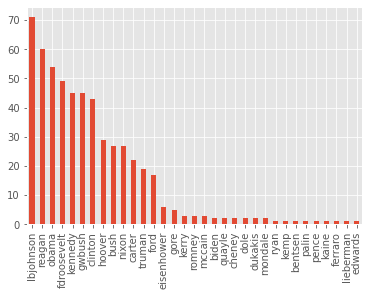

In [638]:
df['name'].value_counts().plot(kind='bar')

LBJ had the most speeches, which lead me to wonder if these were disproportionately press conferences due to the Vietnam War.  It turns out that yes, he had the most press conferences in the corpus, 23 in total.

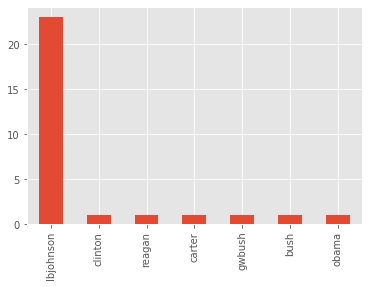

In [639]:
df[df['press conference']== True]['name'].value_counts().plot(kind='bar')

In [640]:
df.groupby('name').sum()

index  interview  debate  inaugural address  state of the union  \
name                                                                           
bentsen         46        0.0     1.0                0.0                 0.0   
biden           18        0.0     2.0                0.0                 0.0   
bush           429        0.0     6.0                1.0                 3.0   
carter         737        0.0     4.0                1.0                 3.0   
cheney          51        0.0     2.0                0.0                 0.0   
clinton       2614        0.0     5.0                0.0                 7.0   
dole            43        0.0     2.0                0.0                 0.0   
dukakis         46        0.0     2.0                0.0                 0.0   
edwards         23        0.0     1.0                0.0                 0.0   
eisenhower     519        0.0     0.0                1.0                 0.0   
fdroosevelt   5586        0.0     0.0                4.0                 3.0   
ferraro         49        0.0     1.0                0.0                 0.0   
ford          2046        0.0     3.0                0.0                 3.0   
gore           160        0.0     5.0                0.0                 0.0   
gwbush        6861        0.0     6.0                2.0                 7.0   
hoover        5974        0.0     0.0                1.0                 4.0   
kaine            0        0.0     1.0                0.0                 0.0   
kemp            35        0.0     1.0                0.0                 0.0   
kennedy      10935        0.0     4.0                1.0                 3.0   
kerry           65        0.0     3.0                0.0                 0.0   
lbjohnson    21371        0.0     0.0                1.0                 6.0   
lieberman       28        0.0     1.0                0.0                 0.0   
mccain          40        0.0     3.0                0.0                 0.0   
mondale         23        0.0     2.0                0.0                 0.0   
nixon         8038        0.0     4.0                2.0                 4.0   
obama        18465        0.0     6.0                2.0                 7.0   
palin           13        0.0     1.0                0.0                 0.0   
pence            1        0.0     1.0                0.0                 0.0   
quayle          86        0.0     2.0                0.0                 0.0   
reagan       25788        0.0     3.0                2.0                 7.0   
romney          17        0.0     3.0                0.0                 0.0   
ryan             7        0.0     1.0                0.0                 0.0   
truman        9044        0.0     0.0                1.0                 0.0   

             press conference  
name                           
bentsen                   0.0  
biden                     0.0  
bush                      1.0  
carter                    1.0  
cheney                    0.0  
clinton                   1.0  
dole                      0.0  
dukakis                   0.0  
edwards                   0.0  
eisenhower                0.0  
fdroosevelt               0.0  
ferraro                   0.0  
ford                      0.0  
gore                      0.0  
gwbush                    1.0  
hoover                    0.0  
kaine                     0.0  
kemp                      0.0  
kennedy                   0.0  
kerry                     0.0  
lbjohnson                23.0  
lieberman                 0.0  
mccain                    0.0  
mondale                   0.0  
nixon                     0.0  
obama                     1.0  
palin                     0.0  
pence                     0.0  
quayle                    0.0  
reagan                    1.0  
romney                    0.0  
ryan                      0.0  
truman                    0.0

In [685]:
df['text length'] = df.text.apply(lambda x: len(x.split(' ')))

Assuming 150 words spoken per minute, speeches were on average 23 minutes long

In [643]:
df['text length'].median()/150

21.173333333333332

In [644]:
df[df['party'] == 'democrat']['text length'].sum()

1118719

In [645]:
df[df['party'] == 'republican']['text length'].sum()

790496

In [646]:
df.sort_values(by='text length', ascending=True)

index         name       party  war  \
544     45      dukakis    democrat    0   
120    120  fdroosevelt    democrat  war   
202    202       hoover  republican   nw   
307    307    lbjohnson    democrat  war   
355    355        nixon  republican  war   
480    480       truman    democrat  war   
432    432       reagan  republican   nw   
200    200       hoover  republican   nw   
319    319    lbjohnson    democrat  war   
118    118  fdroosevelt    democrat  war   
195    195       hoover  republican   nw   
211    211       hoover  republican   nw   
251    251      kennedy    democrat  war   
272    272    lbjohnson    democrat  war   
229    229      kennedy    democrat  war   
128    128  fdroosevelt    democrat  war   
61      61      clinton    democrat   nw   
292    292    lbjohnson    democrat  war   
114    114  fdroosevelt    democrat  war   
178    178       gwbush  republican  war   
350    350        nixon  republican  war   
208    208       hoover  republican   nw   
187    187       gwbush  republican  war   
149    149         ford  republican   nw   
204    204       hoover  republican   nw   
256    256      kennedy    democrat  war   
192    192       hoover  republican   nw   
436    436       reagan  republican   nw   
224    224      kennedy    democrat  war   
31      31       carter    democrat   nw   
172    172       gwbush  republican  war   
271    271    lbjohnson    democrat  war   
290    290    lbjohnson    democrat  war   
351    351        nixon  republican  war   
467    467       truman    democrat  war   
413    413       reagan  republican   nw   
34      34       carter    democrat   nw   
71      71      clinton    democrat   nw   
416    416       reagan  republican   nw   
10      10         bush  republican  war   
301    301    lbjohnson    democrat  war   
481    481       truman    democrat  war   
14      14         bush  republican  war   
478    478       truman    democrat  war   
209    209       hoover  republican   nw   
43      43       carter    democrat   nw   
330    330    lbjohnson    democrat  war   
147    147         ford  republican   nw   
322    322    lbjohnson    democrat  war   
217    217       hoover  republican   nw   
458    458       reagan  republican   nw   
328    328    lbjohnson    democrat  war   
30      30       carter    democrat   nw   
184    184       gwbush  republican  war   
365    365        obama    democrat  war   
175    175       gwbush  republican  war   
300    300    lbjohnson    democrat  war   
249    249      kennedy    democrat  war   
68      68      clinton    democrat   nw   
191    191       gwbush  republican  war   
74      74      clinton    democrat   nw   
439    439       reagan  republican   nw   
396    396        obama    democrat  war   
213    213       hoover  republican   nw   
239    239      kennedy    democrat  war   
434    434       reagan  republican   nw   
408    408       reagan  republican   nw   
205    205       hoover  republican   nw   
66      66      clinton    democrat   nw   
291    291    lbjohnson    democrat  war   
242    242      kennedy    democrat  war   
156    156       gwbush  republican  war   
67      67      clinton    democrat   nw   
174    174       gwbush  republican  war   
295    295    lbjohnson    democrat  war   
81      81      clinton    democrat   nw   
203    203       hoover  republican   nw   
148    148         ford  republican   nw   
77      77      clinton    democrat   nw   
18      18         bush  republican  war   
312    312    lbjohnson    democrat  war   
1        1         bush  republican  war   
82      82      clinton    democrat   nw   
167    167       gwbush  republican  war   
228    228      kennedy    democrat  war   
331    331    lbjohnson    democrat  war   
424    424       reagan  republican   nw   
470    470       truman    democrat  war   
293    293    lbjohnson    democrat  war   
484    484       truman    democrat  war   
3

In [647]:
df.iloc[120].text

'<title="Message to Congress Requesting War Declarations with Germany and Italy">\n<date="December 11, 1941">\nTo the Congress:\nOn the morning of December eleventh, the Government of Germany, pursuing its course of world conquest, declared war against the United States.\nThe long known and the long expected has thus taken place. The forces endeavoring to enslave the entire world now are moving toward this hemisphere.\nNever before has there been a greater challenge to life, liberty, and civilization.\nDelay invites greater danger. Rapid and united effort by all of the peoples of the world who are determined to remain free will insure a world victory of the forces of justice and of righteousness over the forces of savagery and of barbarism.\nItaly also has declared war against the United States.\nI therefore request the Congress to recognize a state of war between the United States and Germany, and between the United States and Italy.\n'

In [648]:
vocab = set()
total = []
df['text'].str.lower().str.split().apply(vocab.update)
df['text'].str.lower().str.split().apply(total.append)
total = [item for sublist in total for item in sublist]
print(f'The vocabulary of the corpus is {len(vocab)} unique words & {len(total)} total words.')

The vocabulary of the corpus is 57629 unique words & 1928737 total words.


In [649]:
new = df.copy()

In [94]:
print('According to the count vectorizer the number of words is 25518')

According to the count vectorizer the number of words is 25518


In [244]:
count_vector = CountVectorizer(stop_words='english', max_features=None)
X = count_vector.fit_transform(df.text)
labels = count_vector.get_feature_names()
BoW = pd.DataFrame(X.toarray(), columns=labels)


Text(0.5, 1.0, 'Word Count by Party')

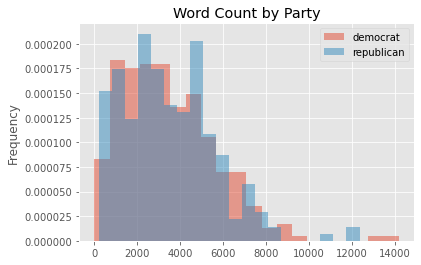

In [650]:
fig, ax = plt.subplots()
df[df['party'] == 'democrat']['text length'].plot(kind = 'hist', bins = 20, density = 'true', alpha = .5, label = 'democrat')
df[df['party'] == 'republican']['text length'].plot(kind = 'hist', bins = 20, density = 'true', alpha = .5, label = 'republican')
ax.legend()
ax.set_title('Word Count by Party')

## Looking at words by president!

In [653]:
words_by_pres = df.groupby(['name'])['text'].apply(lambda x: ','.join(x)).reset_index()


In [654]:
words_by_pres['length'] = words_by_pres['text'].apply(lambda x: len(x.split(' ')))

In [ ]:
pd.concat([words_by_pres.length, df.name.value_counts()], axis = 1)

Of the top 16, politicians with the highest term frequency of "woman" 5 were Republicans and 11 were Democrats.

Of the bottom 16, it was 10 Repbulicans and 6 Democrats

In [253]:
BoW.sort_values('woman', ascending = False)

KeyError: 'woman'

In [254]:
pd.options.display.max_columns = 200

In [255]:
BoW.sort_values('tax', ascending = False)

000  action  administration  ago  america  american  americans  back  \
247   11       3               6    1        2        13          1     0   
447    4       1               0    2       10         3          3     7   
534    1       3              19    6       36        22          4     1   
414    1       0               2    3        1         1          6     3   
490   13       2               3    3        4         5          1     2   
508    7       0               0    1       17         5          4    10   
533   12       5               3    8       21         8          2     3   
505   13       3               0    0        7        12          4     6   
446    1       0               1    0        7         7          2     0   
184    2       0               1    3        2         5          3     1   
450    4       0               5    8       28         8          4     9   
527   10       3              13    5       16        15          8    14   
368    7       3               6    5       33        35         20    16   
525    8       3               1   10        3        10          3     3   
510   10       2               6   12       14         6          4    18   
492    9       1              16    6       24        10          8    15   
75     8       0               1    3       14        28         14     9   
486   14       2               3    4       13        18          5     5   
28    11       0              12    7        2         8          2    10   
536   11       0               7    5       31         6          3    20   
532    4       3               6    0       11         3          1     5   
60     8       1               4   12       17        13          3     2   
511    7       0               8    6       14         6          1     6   
535    6       5               5    6        6         9          5     4   
528    0       3              11    2        0         8          2     5   
526   13       1               9    3       18         1          7     3   
241    2       1               0    5        4        10          7     1   
48    19       3               0    5       33        25         23     7   
499   11       4               3    6        3        14          5     9   
274    8       6               0    4       34        30         20     2   
325    8       4              10   16       16        32         34     0   
520   13       0               4    4       19         6          6     5   
531   13       6               2    5        7         9          1    11   
503    6       0               3    4        2         8          3     5   
232    0       2               2    4        5        16          3     5   
146    5       3               2    2        7         8          4     2   
517    4       2               3    0       20         4          3     2   
512    7       0              13    3       17        17         13    10   
518    8       2               3    3       38        12         19     9   
421    3       1               8    6       20        15         11     4   
425    0       1               1    5       11        16          3     3   
513    7       0               1    4       27        14         17    11   
516   13       0               0    2        6        15          3     3   
491    1       0               4    9        4         2          1     7   
509   16       2              10    2       20        14         10    18   
543    0       0               1    0        7        15          1     8   
215    0       5               0    0        1         3          0     0   
449    6       0               8    7        2         5          0     8   
391    1       0               4    3        6        19          4     9   
419    1       2               1    4        2         3          4     2   
150    7       7               2    4       11         9          8     0   
5

In [655]:
def get_top_features(feature_logs, labels, num_features):
    ## returns the top featurs for dems, republications, as well as the features that are unique to 
    #each party in the top num_features
    zero_all = np.array(labels)[np.argsort(feature_logs[0])[-1*num_features:]]
    one_all = np.array(labels)[np.argsort(feature_logs[1])[-1*num_features:]]
    zero_unique = [x for x in zero_all if x not in one_all]
    one_unique = [x for x in one_all if x not in zero_all]
    return zero_all, one_all, zero_unique, one_unique
    
    

## the most important features for each class after the 200 word, 3 n-gram


(array(['health care reform', 'third world war', 'nuclear arms race',
        'health care system', 'strength united states',
        'executive branch government', 'voting rights act',
        'president members congress', 'social security medicare',
        'weapons mass destruction', 'soldiers sailors marines',
        'want make sure', 'hundred million dollars',
        'support american people', 'state local governments',
        'spread nuclear weapons', 'people back work',
        'american people want', 'congress united states',
        'policy united states', 'north viet nam',
        'government south vietnam', 'united states nation',
        'world ever known', 'health care costs', 'chiang kai shek',
        'god bless united', 'constitution united states',
        'million new jobs', 'test ban treaty', 'general de gaulle',
        'civil rights bill', 'united states government',
        'bless united states', 'government united states',
        'peace loving nations', 'peop

In [ ]:
print(labels)

In [ ]:
### adding features up to 200, 3-grams, lemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# %%

count_vector = CountVectorizer(max_features=200, ngram_range = ((1,4)), tokenizer=WordNetLemmatizer())
X = count_vector.fit_transform(df.text)
labels = count_vector.get_feature_names()
# %%
BoW = pd.DataFrame(X.toarray(), columns=labels)
X_train, X_test, y_train, y_test = train_test_split(BoW, df.party)
# %

## Multinomial Bayes' run
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
MultinomialNB()
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

In [54]:
sw = stopwords.words('english')

## Only use as a back up

In [335]:
## lemmatized

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
sw = stopwords.words('english')
pt = string.punctuation

def doc_to_tokens(doc,ngs=1):
    # lower case all words
    doc = doc.lower()
    # remove accents
    doc = unicodedata.normalize('NFKD', doc).encode('ASCII', 'ignore').decode('utf8')
    # remove odd punctuation
    doc = re.sub(r'[~*.^]*', '', doc)
    # turn document into a list of tokens
    doc = word_tokenize(doc)
    # removing stopwords (sw) and punctation (pt)
    doc = [token for token in doc if token not in sw and token not in pt]
    # lemmatize all tokens
    doc = [lem.lemmatize(token) for token in doc]
    # here we are setting up the bigrams if specified
    ng = list(map(lambda tup: '-'.join(tup), ngrams(doc, ngs)))
    return doc + ng

token_array = df['text'].apply(doc_to_tokens)
print(type(token_array))
print(token_array)

## stores tokens in dictionary
custom_tokens = {}
for i,v in enumerate(token_array.to_numpy()):
    custom_tokens[i] = v

## initializes CV with given tokens and runs MNB prediction
CV = CountVectorizer(
    # so we can pass it strings
    input='content',
    # turn off preprocessing of strings to avoid corrupting our keys
    lowercase=False,
    preprocessor=lambda x: x,
    max_features = 200,
    ngram_range = ((1,3)),
    # use our token dictionary
    tokenizer=lambda key: custom_tokens[key])
print(custom_tokens.keys())
X = CV.fit_transform(custom_tokens.keys())
labels = CV.get_feature_names()
# %%
BoW = pd.DataFrame(X.toarray(), columns=labels)
X_train, X_test, y_train, y_test = train_test_split(BoW, df.party)
# %

## Multinomial Bayes' run
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
MultinomialNB()
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

<class 'pandas.core.series.Series'>
0      [thank, much, good, luck, please, seated, than...
1      [want, talk, today, tragedy, somalia, mission,...
2      [life, nation, 're, called, upon, define, beli...
3      [mr, president, mr, speaker, member, united, s...
4      [thank, welcome, back, thank, much, good, afte...
5      [well, think, one, thing, distinguishes, exper...
6      [mr, speaker, mr, president, distinguished, me...
7      [many, friend, thank, tonight, thank, voter, s...
8      [president, gorbachev, good, evening, lady, ge...
9      [thank, much, thank, thank, much, proud, recei...
10     [fellow, citizen, last, night, ordered, u, mil...
11     [title=, '', address, joint, session, congress...
12     [mr, chief, justice, mr, president, vice, pres...
13     [think, 've, seen, deterioration, value, think...
14     [kuwait, liberated, iraq, 's, army, defeated, ...
15     [mr, president, thank, much, mr, secretary-gen...
16     [thank, governor, thank, much, welcome, good,

['republican' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'republican' 'democrat' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'republican'
 'republican' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'democrat' 'republican' 'republican' 'democrat' 'r

In [504]:
zero, one, zero_uniqe, one_unique = get_top_features(clf.feature_log_prob_, labels, 100)

print(f'zero: {zero}')
print(f'one: {one}')
print(f'zero unique: {zero}')
print(f'one unique: {one}')

zero: ['health' 'better' 'public' 'percent' 'economic' 'care' 'nuclear'
 'together' 'mr president' 'without' 'history' 'give' 'day' 'never' 'bill'
 'south' 'still' 'jobs' 'state' 'even' 'forces' 'much' 'cannot' 'power'
 'take' 'law' 'go' 'life' 'two' 'tonight' 'children' 'man' 'could' 'like'
 'made' 'hope' 'tax' 'military' 'need' 'national' 'come' 'long' 'may'
 'said' 'get' 'way' 'good' 'future' 'rights' 'last' 'free' 'say'
 'security' 'shall' 'right' 'well' 'help' 'also' 'believe' 'vietnam'
 'first' 'year' 'americans' 'freedom' 'many' 'great' 'congress' 'let'
 'going' 'want' 'work' 'today' 'united states' 'men' 'mr' 'make' 'nations'
 'know' 'states' 'nation' 'every' 'government' 'time' 'years' 'america'
 'applause' 'country' 'war' 'one' 'american' 'united' 'new' 'think'
 'would' 'peace' 'president' 'must' 'us' 'world' 'people']
one: ['arms' 'citizens' 'men' 'shall' 'hope' 'better' 'children' 'man'
 'spending' 'budget' 'take' 'god' 'taxes' 'may' 'never' 'back' 'go'
 'system' 'economy' 

# Main Test - Multinomial Bayes

In [657]:
sw = stopwords.words('english')

new_sw = ['also', '000', 'see', 'come', 'day','say', 'us', 'well', 'le', "'m", 'made', 'applause', 'mr', 'men', 'candidate', 'instead', 'q', 'part', "'re", "'le", 'get', 'man', "'ve", 'let', 'every', 'may', 'upon', 'shall', 'going','ve','year', '--', '``', "'s", "''", 'way', 'cannot', 'two', 'long', 'said', 'like', 'years', 'think','would',"n't", 'must','u','many','one','first','last',"'re'", 'today','', 'ha', 'wa']
for i in new_sw:
    sw.append(i)



In [713]:
## Now with only trigrams!
def run_model(X, y, max_feat = 1500, stop_words = sw):
    tfidf = TfidfVectorizer(stop_words = sw, ngram_range = (3,3), max_features = max_feat)
    X = tfidf.fit_transform(X)
    labels = tfidf.get_feature_names()
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 5)
# %
    clf = MultinomialNB()
    clf = clf.fit(X_train, y_train)
    cvs = np.mean(cross_val_score(clf, X_train, y_train))
    return clf, cvs, X_test, y_test, labels, X, tfidf
    
clf, cvs, X_test, y_test, labels, X, tfidf = run_model(df.text, df.party, stop_words = sw)

td, fr, fd, tr = confusion_matrix(y_test, clf.predict(X_test)).ravel()
print(f'True Dems: {td}, False Republicans: {fr}, False Dems: {fd}, True Republicans: {tr}')
print(f'Recall for Democrats: {td/(td + fr)}')
print(f'Recall for Republicans: {tr/(fd + tr)}')
print(cvs)

zero, one, zero_unique, one_unique = get_top_features(clf.feature_log_prob_, labels, 50)

# print(f'zero: {zero}')
# print(f'one: {one}')
print(f'Dem unique: {zero_unique}')
print(f'Rep unique: {one_unique}')

True Dems: 74, False Republicans: 7, False Dems: 15, True Republicans: 42
Recall for Democrats: 0.9135802469135802
Recall for Republicans: 0.7368421052631579
0.7907434616514839
Dem unique: ['united states people', 'want express appreciation', 'nuclear arms race', 'voting rights act', 'strength united states', 'soldiers sailors marines', 'president members congress', 'social security medicare', 'executive branch government', 'spread nuclear weapons', 'support american people', 'hundred million dollars', 'people back work', 'policy united states', 'north viet nam', 'world ever known', 'government south vietnam', 'chiang kai shek', 'united states nation', 'god bless united', 'health care costs', 'constitution united states', 'million new jobs', 'general de gaulle', 'test ban treaty', 'bless united states', 'united states government', 'peace loving nations', 'civil rights bill', 'people south vietnam', 'bless god bless', 'god bless god', 'martin luther king', 'middle class families', 'join

In [747]:
trump = pd.Series(trump_speeches[0:11] + trump_speeches[13])

TypeError: can only concatenate list (not "str") to list

In [749]:
trump = trump.drop(12)

In [750]:
trump_vector = tfidf.fit_transform(trump)

In [751]:
print(clf.predict_proba(trump_vector)[:,0])

[0.5863747  0.51176675 0.46106733 0.67431799 0.71221315 0.54061495
 0.44888981 0.65072687 0.45917179 0.66780336 0.59354757 0.59632782
 0.44227937]


In [705]:
X_test.shape

(138, 9750)

In [674]:
df.loc[23,'text']
df.to_csv('democrat')

In [677]:
df[df['party'] == 'democrat'].to_csv('democrat')
df[df['party'] == 'republican'].to_csv('republican')

## Main Accuracy Scorer

In [606]:
dem_prob = clf.predict_proba(X_test)[:,0]
correct = []
idx = list(y_test.index)
t = .54
print(y_test.shape)

y_test_array = y_test.to_numpy()
for i,v in enumerate(dem_prob):
    if v >= t and y_test_array[i] =='democrat':
        correct.append(1)
        df.loc[idx[i], 'accurate'] = True
    elif v<t and y_test_array[i] == 'republican':
        correct.append(1)
        df.loc[idx[i], 'accurate'] = True
    else:
        correct.append(0)
        df.loc[idx[i], 'accurate'] = False
print(f'Accuracy: {mean(correct)}')

(138,)
Accuracy: 0.8695652173913043


## Looking at the TFIDF Vectorizer

In [616]:
tf_vect = pd.DataFrame(X, columns = labels)

ValueError: Shape of passed values is (549, 1), indices imply (549, 1500)

## Looking at log probabilities to find the most "democratic" and "republican" speeches

In [756]:
prob_repub_list = []
sorted_idx = np.argsort(clf.predict_proba(X_test)[:, 0])
                        
for i,v in enumerate(list(clf.predict_proba(X_test))):
    prob = v[0]
    idx = list(y_test.index)[i]
    prob_repub_list.append([prob, idx])

In [759]:
df.iloc[np.array(prob_repub_list)[sorted_idx][:10,1]]

name       party  war  \
448  reagan  republican   nw   
438  reagan  republican   nw   
169  gwbush  republican  war   
465  reagan  republican   nw   
165  gwbush  republican  war   
219  hoover  republican   nw   
466  reagan  republican   nw   
357   nixon  republican  war   
431  reagan  republican   nw   
6      bush  republican  war   

                                                speech  \
448  <title="State of the Union Address">\n<date="J...   
438  <title="Farewell Address at the Republican Nat...   
169  <title="State of the Union Address">\n<date="J...   
465  <title="State of the Union Address">\n<date="J...   
165  <title="State of the Union Address">\n<date="J...   
219  <title="Campaign speech in Indianapolis, India...   
466  <title="Speech to the Nation on Lebanon and Gr...   
357  <title="Address to the Nation Announcing Decis...   
431  <title="State of the Union Address">\n<date="F...   
6    <title="State of the Union Address">\n<date="J...   

                                                 title              date  \
448                         State of the Union Address  January 25, 1983   
438  Farewell Address at the Republican National Co...   August 15, 1988   
169                         State of the Union Address  January 28, 2008   
465                         State of the Union Address  January 25, 1984   
165                         State of the Union Address  January 23, 2007   
219          Campaign speech in Indianapolis, Indiana.  October 28, 1932   
466        Speech to the Nation on Lebanon and Grenada  October 27, 1983   
357  Address to the Nation Announcing Decision To R...    August 8, 1974   
431                         State of the Union Address  February 4, 1986   
6                           State of the Union Address  January 28, 1992   

                                                  text  interview  debate  \
448  \nMr. Speaker, Mr. President, distinguished Me...      False   False   
438  \nMadam Chairman, delegates to the convention,...      False   False   
169  \nMadam Speaker, Vice President Cheney, member...      False   False   
465  \nMr. Speaker, Mr. President, distinguished me...      False   False   
165  \nThank you very much. And tonight I have the ...      False   False   
219  \nMy fellow citizens, my friends in Indianapol...      False   False   
466  \n\nMy fellow Americans:\nSome 2 months ago we...      False   False   
357  <title="Address to the Nation Announcing Decis...      False   False   
431  \nMr. Speaker, Mr. President, distinguished Me...      False   False   
6    \nMr. Speaker and Mr. President, distinguished...      False   False   

     inaugural address  state of the union  press conference  text length  
448              False                True             False         5503  
438              False               False             False         4483  
169              False                True             False         5635  
465              False                True             False         4891  
165              False                True             False         5506  
219              False               False             False         8557  
466              False               False             False         8167  
357              False               False             False         1776  
431              False                True             False         3461  
6                False                True             False         5080

In [760]:
df.iloc[np.array(prob_repub_list)[sorted_idx][-10:,1]]

name     party  war  \
50     clinton  democrat   nw   
321  lbjohnson  democrat  war   
362      obama  democrat  war   
275  lbjohnson  democrat  war   
316  lbjohnson  democrat  war   
314  lbjohnson  democrat  war   
284  lbjohnson  democrat  war   
317  lbjohnson  democrat  war   
294  lbjohnson  democrat  war   
315  lbjohnson  democrat  war   

                                                speech  \
50   <title="State of the Union Address">\n<date="J...   
321  <title="Remarks on Receiving the National Free...   
362  <title="Acceptance Speech at the Democratic Na...   
275  <title="Press Conference">\n<date="October 6, ...   
316  <title="Press Conference at the White House">\...   
314  <title="Press Conference at the State Departme...   
284  <title="Speech to the Associated Press Luncheo...   
317  <title="Press Conference">\n<date="February 4,...   
294  <title="Address at Johns Hopkins University">\...   
315  <title="Press Conference in the East Room">\n<...   

                                                 title               date  \
50                          State of the Union Address   January 23, 1996   
321    Remarks on Receiving the National Freedom Award  February 23, 1966   
362  Acceptance Speech at the Democratic National C...    August 28, 2008   
275                                   Press Conference    October 6, 1966   
316                Press Conference at the White House     March 13, 1965   
314           Press Conference at the State Department     April 16, 1964   
284            Speech to the Associated Press Luncheon     April 20, 1964   
317                                   Press Conference   February 4, 1965   
294                Address at Johns Hopkins University      April 7, 1965   
315                  Press Conference in the East Room      July 13, 1965   

                                                  text  interview  debate  \
50   \nMr. Speaker, Mr. Vice President, members of ...      False   False   
321  \nMr. Chief Justice, Mr. Secretary, Senator Ke...      False   False   
362  \nTo Chairman Dean and my great friend Dick Du...      False   False   
275  \n\n<THE PRESIDENT.> Good afternoon, ladies an...      False   False   
316  \n\n<THE PRESIDENT.> Good afternoon, ladies an...      False   False   
314  \n\n<THE PRESIDENT.> Ladies and gentlemen, I h...      False   False   
284  \nPaul Miller and my fellow Americans: Last Fr...      False   False   
317  \nToday I am sending to the Congress my agricu...      False   False   
294  \nMr. Garland, Senator Brewster, Senator Tydin...      False   False   
315  \n\n<THE PRESIDENT.> Good afternoon, ladies an...      False   False   

     inaugural address  state of the union  press conference  text length  
50               False                True             False         6239  
321              False               False             False         3864  
362              False               False             False         4610  
275              False               False              True         3877  
316              False               False              True         3884  
314              False               False              True         4560  
284              False               False             False         8686  
317              False               False              True         4444  
294              False               False             False         5445  
315              False               False              True         4232

LBJ appears in 4 of the top 5 spots.

Republicans: Reagan, GWBush (x2), Hoover, Bush Senior.

In [164]:
### Build confusion matrix:

## Looking at correct/incorrect data

In [761]:
df['accurate'] = 'na'
pred = []
idx = list(y_test.index)
for i, v in enumerate(list(y_test)):
    if v == clf.predict(X_test)[i]:
        df.loc[idx[i], 'accurate'] = True
    else:
        df.loc[idx[i], 'accurate'] = False

In [139]:
## Updates DF with whether the speech was accurately tagged

In [762]:
incorrect = df[df['accurate']==False]
incorrect.party.value_counts()

republican    17
democrat       8
Name: party, dtype: int64

In [763]:
incorrect.debate.value_counts()

False    21
True      4
Name: debate, dtype: int64

In [764]:
correct = df[df['accurate']==True]

In [765]:
correct.debate.value_counts()

False    110
True      26
Name: debate, dtype: int64

In [595]:
df.debate.value_counts()

False    473
True      76
Name: debate, dtype: int64

In [766]:
correct = df[df['accurate']==True]

In [767]:
incorrect.loc[:,['name', 'title']]

name                                              title
5           bush            Debate with Bill Clinton and Ross Perot
30        carter  Speech on Establishing Diplomatic Relations wi...
61       clinton   Statement on His Testimony Before the Grand Jury
102  fdroosevelt             Fireside Chat 1: On the Banking Crisis
107  fdroosevelt       Fireside Chat 11: On the Unemployment Census
134  fdroosevelt                     Democratic National Convention
158       gwbush                       Remarks on the War on Terror
172       gwbush  Remarks on Emergency Economic Stabilization Ac...
177       gwbush                            First Inaugural Address
204       hoover                  Message Regarding Law Enforcement
300    lbjohnson  Remarks at a Reception for Astronauts Grissom ...
325    lbjohnson                         State of the Union Address
341        nixon  Address to the Nation Announcing an Agreement ...
348        nixon  Address to the Nation on the Situation in Sout...
354        nixon  Address to the Nation on Presidential Tape Rec...
359        nixon                    The President's News Conference
415       reagan            Announcement for Presidential Candidacy
420       reagan                Address at University of Notre Dame
424       reagan                   Bergen-Belsen Concentration Camp
455       reagan         Address to the Nation on National Security
457       reagan                          40th Anniversary of D-Day
460       reagan    Remarks to the Citizens of Ballyporeen, Ireland
5         reagan                                                  0
5         romney                                                  0
30          gore                                                  0

## To do:
- ROC Curve/Threshold
- Take out debates
- Take out LBJ
- Look up uses of top words


## Wednesday Notes

Model has great recall for Democrats, bad recall for republicans.  Nixon has the most misclassifications (Checkers!).
Debates are poorly classified.

## Checking for best features

In [679]:
feat = np.arange(500, 10000, 250)
acc = []
recall_dems = []
recall_rep = []
for i in feat:
    clf, cvs, X_test, y_test, _, _ = run_model(df.text, df.party, max_feat = i, stop_words = sw)
    td, fr, fd, tr = confusion_matrix(y_test, clf.predict(X_test)).ravel()
    recall_d = td/(td + fr)
    recall_r = tr/(fd + tr)
    acc.append(cvs)
    recall_dems.append(recall_d)
    recall_rep.append(recall_r)


In [374]:
acc_all = acc
recall_dems_all = recall_dems
recall_rep_all = recall_rep

## ISSUES HERE!!!

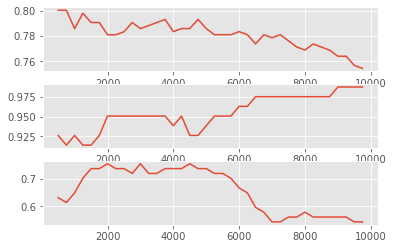

In [681]:
fig, ax = plt.subplots(3,1)

ax[0].plot(feat, acc)
#ax[0].xlabel('Features')
#ax[0].ylabel('Accuracy')
#ax[0].scatter([feat[np.argsort(acc)[-5:]]], acc[np.argsort(acc)[-5:]])
#ax[0].title('Features vs Accuracy')
ax[1].plot(feat, recall_dems)
#ax[0].scatter([feat[np.argsort(acc)[-5:]]], acc[np.argsort(acc)[-5:]])
#ax[0].title('Features vs Accuracy')
ax[2].plot(feat, recall_rep)



As the features grew, the model began to classify more people as Democrats.  Maybe this means that republicans have a few defining words, but when the pool is broadened to more words, it gets diluted

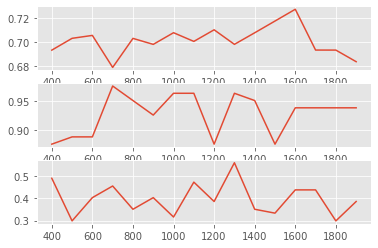

In [378]:
feat = np.arange(400, 2000, 100)
acc_small = []
recall_dems_small = []
recall_rep_small = []
for i in feat:
    clf, cvs, X_test, y_test = run_model(df.text, df.party, max_feat = i, stop_words = sw)
    td, fr, fd, tr = confusion_matrix(y_test, clf.predict(X_test)).ravel()
    recall_d = td/(td + fr)
    recall_r = tr/(fd + tr)
    acc_small.append(cvs)
    recall_dems_small.append(recall_d)
    recall_rep_small.append(recall_r)

fig, ax = plt.subplots(3,1)

ax[0].plot(feat, acc_small)
#ax[0].scatter([feat[np.argsort(acc)[-5:]]], acc[np.argsort(acc)[-5:]])
#ax[0].title('Features vs Accuracy')
ax[1].plot(feat, recall_dems_small)
#ax[0].scatter([feat[np.argsort(acc)[-5:]]], acc[np.argsort(acc)[-5:]])
#ax[0].title('Features vs Accuracy')
ax[2].plot(feat, recall_rep_small)

In [353]:
list(feat[np.argsort(acc)[-5:]])

[1500, 7000, 11750, 13000, 13750]

In [347]:
feat[np.argsort(acc)[-5:]]

array([ 1500,  7000, 11750, 13000, 13750])

## ROC Curves

In [379]:
clf, cvs, X_test, y_test = run_model(df.text, df.party, max_feat = 1300, stop_words = sw)

In [ ]:
td, fr, fd, tr = confusion_matrix(y_test, clf.predict(X_test)).ravel()
print(f'True Dems: {td}, False Republicans: {fr}, False Dems: {fd}, True Republicans: {tr}')
print(f'Recall for Democrats: {td/(td + fr)}')
print(f'Recall for Republicans: {tr/(fd + tr)}')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


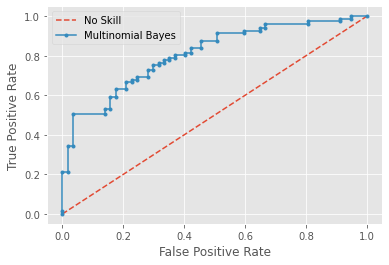

In [446]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# generate a no skill prediction (majority class)
y_test_coded = []
for i in y_test:
    if i == 'democrat':
        y_test_coded.append(1)
    else:
        y_test_coded.append(0)
    
    
ns_probs = [0 for _ in range(len(y_test))]
mnb_probs = clf.predict_proba(X_test)
# keep probabilities for being a republican only (column 1), democrat (column 0)
mnb_probs = mnb_probs[:, 0]
# calculate scores
ns_auc = roc_auc_score(y_test_coded, ns_probs)
mnb_auc = roc_auc_score(y_test_coded, mnb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (mnb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_coded, ns_probs)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test_coded, mnb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='Multinomial Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
Credit goes to https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [ ]:
Credit goes to: https://www.scikit-yb.org/en/latest/api/classifier/threshold.html

### Plotting Accuracy Curves for different thresholds:

In [438]:
y_test_array = y_test.to_numpy()

Text(0, 0.5, 'Accuracy')

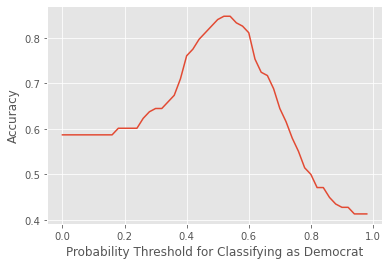

In [755]:
from statistics import mean
dem_prob = clf.predict_proba(X_test)[:,0]
thresh = np.arange(0,1, .02)
y_test
thresh_acc =[]

for t in thresh:
    correct = []
    for i,v in enumerate(dem_prob):
        if v >= t and y_test_array[i] =='democrat':
            correct.append(1)
        elif v<t and y_test_array[i] == 'republican':
            correct.append(1)
        else:
            correct.append(0)
    thresh_acc.append(mean(correct))

fig, ax = plt.subplots()
ax.plot(thresh, thresh_acc)
ax.set_xlabel('Probability Threshold for Classifying as Democrat')
ax.set_ylabel('Accuracy')
    

## Random Forest

In [609]:
### fitted with grid search results
from sklearn.ensemble import RandomForestClassifier
overall_acc = []
# for i in range(10):
#     X_train, y_train, X_test, y_test = train_test_split(df.text, df.party, stratify = df.party, random_state = i)
#     rf = RandomForestClassifier()
#     rf = rf.fit(X_train, y_train)
#     acc = mean(cross_val_score(rf, X_train, y_train))
#     overall_acc.apend(acc)

# print(mean(overall_acc))

tfidf = TfidfVectorizer(stop_words = sw, ngram_range = (1,3), max_features = 1500)
X = tfidf.fit_transform(df.text)
labels = tfidf.get_feature_names()
X_train, X_test, y_train, y_test = train_test_split(X, df.party, stratify = df.party, random_state = 5)
rf = RandomForestClassifier(n_estimators = 600, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt',
                           max_depth = 115, bootstrap = False)
rf = rf.fit(X_train, y_train)
acc = mean(cross_val_score(rf, X_train, y_train))

pred = rf.predict(X_test)
dem_prob_rf = rf.predict_proba(X_test)


In [612]:
y_test_array = y_test.to_numpy()
correct = []
t = .54
for i,v in enumerate(dem_prob_rf[:, 0]):
    if v >= t and y_test_array[i] =='democrat':
        correct.append(1)
        print(f'said that t = {t}, i = {i}, v={v} and y_test = {y_test_array[i]} is correct')
    elif v<t and y_test_array[i] == 'republican':
        correct.append(1)
    else:
        correct.append(0)
print(f'Accuracy: {mean(correct)}')

said that t = 0.54, i = 1, v=0.7791666666666666 and y_test = democrat is correct
said that t = 0.54, i = 3, v=0.6091666666666666 and y_test = democrat is correct
said that t = 0.54, i = 7, v=0.6158333333333335 and y_test = democrat is correct
said that t = 0.54, i = 8, v=0.6443055555555556 and y_test = democrat is correct
said that t = 0.54, i = 9, v=0.622222222222222 and y_test = democrat is correct
said that t = 0.54, i = 11, v=0.5894444444444444 and y_test = democrat is correct
said that t = 0.54, i = 12, v=0.7904166666666668 and y_test = democrat is correct
said that t = 0.54, i = 13, v=0.7126388888888887 and y_test = democrat is correct
said that t = 0.54, i = 15, v=0.7995833333333332 and y_test = democrat is correct
said that t = 0.54, i = 16, v=0.5529166666666666 and y_test = democrat is correct
said that t = 0.54, i = 17, v=0.587222222222222 and y_test = democrat is correct
said that t = 0.54, i = 18, v=0.6559722222222222 and y_test = democrat is correct
said that t = 0.54, i =

In [482]:
acc

0.7883338230972672

said that t = 0.0, i = 0, v=0.6884722222222223 and y_test = democrat is correct
said that t = 0.0, i = 1, v=0.5929166666666668 and y_test = democrat is correct
said that t = 0.0, i = 2, v=0.7059722222222222 and y_test = democrat is correct
said that t = 0.0, i = 3, v=0.700138888888889 and y_test = democrat is correct
said that t = 0.0, i = 4, v=0.7090277777777778 and y_test = democrat is correct
said that t = 0.0, i = 5, v=0.7908333333333333 and y_test = democrat is correct
said that t = 0.0, i = 6, v=0.5440277777777777 and y_test = democrat is correct
said that t = 0.0, i = 8, v=0.6088888888888887 and y_test = democrat is correct
said that t = 0.0, i = 11, v=0.614722222222222 and y_test = democrat is correct
said that t = 0.0, i = 14, v=0.706388888888889 and y_test = democrat is correct
said that t = 0.0, i = 16, v=0.6574999999999999 and y_test = democrat is correct
said that t = 0.0, i = 19, v=0.5634722222222222 and y_test = democrat is correct
said that t = 0.0, i = 20, v=0.64763888

said that t = 0.44, i = 98, v=0.5329166666666666 and y_test = democrat is correct
said that t = 0.44, i = 101, v=0.5988888888888888 and y_test = democrat is correct
said that t = 0.44, i = 102, v=0.7519444444444444 and y_test = democrat is correct
said that t = 0.44, i = 104, v=0.3834722222222222 and y_test = republican is correct
said that t = 0.44, i = 106, v=0.7062499999999997 and y_test = democrat is correct
said that t = 0.44, i = 109, v=0.6412500000000001 and y_test = democrat is correct
said that t = 0.44, i = 110, v=0.32694444444444437 and y_test = republican is correct
said that t = 0.44, i = 111, v=0.6786111111111112 and y_test = democrat is correct
said that t = 0.44, i = 113, v=0.28375000000000006 and y_test = republican is correct
said that t = 0.44, i = 114, v=0.6500000000000001 and y_test = democrat is correct
said that t = 0.44, i = 115, v=0.4295833333333333 and y_test = republican is correct
said that t = 0.44, i = 116, v=0.5936111111111111 and y_test = democrat is cor

said that t = 0.76, i = 12, v=0.5484722222222221 and y_test = republican is correct
said that t = 0.76, i = 13, v=0.5369444444444443 and y_test = republican is correct
said that t = 0.76, i = 15, v=0.6262499999999999 and y_test = republican is correct
said that t = 0.76, i = 17, v=0.5986111111111111 and y_test = republican is correct
said that t = 0.76, i = 18, v=0.5525 and y_test = republican is correct
said that t = 0.76, i = 21, v=0.40472222222222226 and y_test = republican is correct
said that t = 0.76, i = 22, v=0.4841666666666667 and y_test = republican is correct
said that t = 0.76, i = 25, v=0.8252777777777778 and y_test = democrat is correct
said that t = 0.76, i = 27, v=0.5098611111111111 and y_test = republican is correct
said that t = 0.76, i = 28, v=0.3952777777777778 and y_test = republican is correct
said that t = 0.76, i = 29, v=0.5794444444444444 and y_test = republican is correct
said that t = 0.76, i = 31, v=0.48083333333333345 and y_test = republican is correct
said

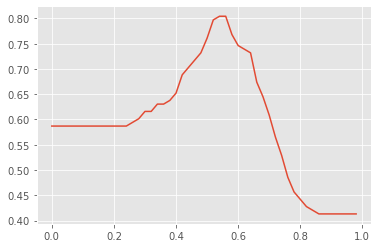

In [483]:
y_test_array = y_test.to_numpy()
dem_prob = rf.predict_proba(X_test)[:,0]
thresh = np.arange(0,1, .02)
thresh_acc =[]

for t in thresh:
    correct = []
    for i,v in enumerate(dem_prob):
        if v >= t and y_test_array[i] =='democrat':
            correct.append(1)
            print(f'said that t = {t}, i = {i}, v={v} and y_test = {y_test_array[i]} is correct')
        elif v<t and y_test_array[i] == 'republican':
            correct.append(1)
            print(f'said that t = {t}, i = {i}, v={v} and y_test = {y_test_array[i]} is correct')
        else:
            correct.append(0)

    thresh_acc.append(mean(correct))

fig, ax = plt.subplots()
ax.plot(thresh, thresh_acc)

The best threshold is .54

In [494]:
important = rf.feature_importances_
idx = np.argsort(important)[-20:]

np.array(labels)[idx]

array(['allow', 'funding', 'major', 'inflation', 'terrorist', 'country',
       'friends', 'terrorists', 'men', 'think', 'reagan', 'economic',
       'spending', 'rates', 'federal', 'federal government', 'race',
       'bless', 'taxes', 'god bless'], dtype='<U23')

In [487]:
thresh[np.argsort(thresh_acc)[-1:]]

array([0.54])

In [486]:
print(y_test_array)

['democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'democrat' 'democr

Grid search

In [464]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 220, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [543]:
#DON'T RUN THIS!!
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

## Best parameters
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 199, 'bootstrap': False}


In [ ]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(rf, X_train, y_train).importances_mean

From https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## Looking at log probabilities to find the most "democratic" and "republican" speeches

In [447]:
def get_most_partisan(clf, X_test, y_test):
    prob_dem_list = []
    sorted_idx = np.argsort(clf.predict_proba(X_test)[:, 0])
                        
    for i,v in enumerate(list(clf.predict_proba(X_test))):
        prob = v[0]
        idx = list(y_test.index)[i]
        prob_dem_list.append([prob, idx])
    most_rep_idx = np.array(prob_repub_list)[sorted_idx][:5,1]
    most_dem_idx = np.array(prob_dem_list)[sorted_idx][-5:,1]
    return most_rep_idx, most_dem_idx

most_rep, most_dem = get_most_partisan(clf, X_test, y_test)
print('Most Republican')
print(df.loc[most_rep, ['name', 'title']])
print('Most Democrat')
print(df.loc[most_dem, ['name', 'title']])

Most Republican
             name                                        title
163.0      gwbush                   State of the Union Address
455.0      reagan   Address to the Nation on National Security
35.0       carter              Address to the Nation on Energy
247.0     kennedy  Special Message to the Congress on Taxation
86.0   eisenhower                      First Inaugural Address
Most Democrat
            name                                      title
255.0    kennedy                    Address on Civil Rights
281.0  lbjohnson                           Press Conference
302.0  lbjohnson          Press Conference in the East Room
289.0  lbjohnson          Press Conference in the East Room
295.0  lbjohnson  Remarks on Vietnam at Syracuse University


LBJ appears in 4 of the top 5 spots.

Republicans: Reagan, GWBush (x2), Hoover, Bush Senior.

name       party  war  \
11     bush  republican  war   
11  mondale    democrat    0   
11    obama    democrat    0   

                                               speech  \
11  <title="Address Before a Joint Session of Cong...   
11                                                  0   
11                                                  0   

                                                title           date  \
11  Address Before a Joint Session of Congress on ...  March 6, 1991   
11                                                  0              0   
11                                                  0              0   

                                                 text  interview  debate  \
11  <title="Address Before a Joint Session of Cong...      False   False   
11   One of the key tests of leadership is whether...      False    True   
11   well, thank you very much, jim, and thanks to...      False    True   

    inaugural address  state of the union  press conference  text length  \
11              False               False             False         2773   
11              False               False             False         4445   
11              False               False             False        13229   

   accurate  
11     True  
11     True  
11     True

In [279]:
zero, one, zero_unique, one_unique = get_top_features(clf.feature_log_prob_, labels, 100)

print(f'zero: {zero}')
print(f'one: {one}')
print(f'zero unique: {zero_unique}')
print(f'one unique: {one_unique}')

zero: ['end' 'energy' 'opportunity' 'done' 'billion' 'seek' 'place' 'nuclear'
 'land' 'plan' 'soviet' 'health' 'general' 'republican' 'human' 'common'
 'agreement' 'system' 'worker' 'history' 'woman' 'member' 'united nation'
 'better' 'party' 'economic' 'leader' 'see' 'care' 'back' 'never' 'act'
 'thank' 'viet-nam' 'still' 'responsibility' 'change' 'said' 'south'
 'citizen' 'long' 'interest' 'without' 'action' 'tax' 'home' 'economy'
 'community' 'together' 'military' 'much' 'give' 'well' 'take' 'program'
 'free' 'million' 'law' 'business' 'policy' 'problem' 'national' 'family'
 'security' 'future' 'tonight' 'power' 'believe' 'effort' 'good' 'bill'
 'child' 'hope' 'freedom' 'help' 'vietnam' 'job' 'need' 'life' 'force'
 'great' 'united state' 'congress' 'know' 'right' 'work' 'government'
 'america' 'think' 'united' 'new' 'country' 'state' 'peace' 'war'
 'president' 'world' 'nation' 'american' 'people']
one: ['east' 'interest' 'administration' 'toward' 'yet' 'ago' 'think' 'bill'
 'party' 

In [154]:
sw = stopwords.words('english')

new_sw = ['also', 'day','two', 'even', 'dont',"'ll", 'say', 'want', 'time', 'come', 'make', 'thing', 'le', "'m", 'go', 'thats', 'could', 'like', 'made', 'applause', 'mr', 'men', 'candidate', 'instead', 'q', 'part', "'re", "'le", 'get', 'man', "'ve", 'let', 'every', 'may', 'upon', 'shall', 'going','ve','year', '--', '``', "'s", "''", 'way', 'would',"n't", 'must','u','many','one','first','last',"'re'", 'today','', 'ha', 'wa']
for i in new_sw:
    sw.append(i)


In [164]:
### Build confusion matrix:

In [130]:
print(clf.predict(X_test))
print(y_test)

['democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat

## Looking at correct/incorrect data

In [535]:
df['accurate'] = 'na'
pred = []
idx = list(y_test.index)
for i, v in enumerate(list(y_test)):
    if v == clf.predict(X_test)[i]:
        df.loc[idx[i], 'accurate'] = True
    else:
        df.loc[idx[i], 'accurate'] = False

In [536]:
## Updates DF with whether the speech was accurately tagged

In [537]:
incorrect = df[df['accurate']==False]
incorrect.party.value_counts()

republican    24
democrat       8
Name: party, dtype: int64

In [538]:
incorrect.debate.value_counts()

False    26
True      6
Name: debate, dtype: int64

In [539]:
correct.debate.value_counts()

False    97
True      9
Name: debate, dtype: int64

In [542]:
correct.party.value_counts()

democrat      73
republican    33
Name: party, dtype: int64

In [540]:
df.debate.value_counts()

False    473
True      76
Name: debate, dtype: int64

In [137]:
print((23 + 19)/(23 + 19 + 38 + 23))
print(76/473)


0.4077669902912621
0.160676532769556


In [121]:
correct = df[df['accurate']==True]

In [301]:
counts_wrong = incorrect['name'].value_counts()

In [309]:
counts_right = correct['name'].value_counts()

In [318]:
right_wrong = pd.concat([counts_wrong, counts_right], axis = 1)
right_wrong = right_wrong.fillna(0)
right_wrong['correct %'] = (1 - right_wrong.iloc[:, 0]/(right_wrong.iloc[:, 0] + right_wrong.iloc[:, 1]))*100


In [319]:
right_wrong

name  name   correct %
reagan       12.0   5.0   29.411765
ford          6.0   0.0    0.000000
bush          5.0   4.0   44.444444
nixon         3.0   0.0    0.000000
gwbush        3.0   7.0   70.000000
hoover        2.0   4.0   66.666667
eisenhower    1.0   0.0    0.000000
obama         1.0  15.0   93.750000
kennedy       1.0   8.0   88.888889
lbjohnson     0.0  20.0  100.000000
fdroosevelt   0.0  15.0  100.000000
carter        0.0   9.0  100.000000
clinton       0.0   8.0  100.000000
truman        0.0   4.0  100.000000
dukakis       0.0   2.0  100.000000
cheney        0.0   1.0  100.000000
dole          0.0   1.0  100.000000
quayle        0.0   1.0  100.000000
pence         0.0   1.0  100.000000
gore          0.0   1.0  100.000000
palin         0.0   1.0  100.000000

In [ ]:

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

## To do:
- ROC Curve/Threshold
- Take out debates
- Take out LBJ
- Look up uses of top words


## Wednesday Notes

Model has great recall for Democrats, bad recall for republicans.  Nixon has the most misclassifications (Checkers!).
Debates are poorly classified.

In [156]:
incorrect

name       party  war  \
0          bush  republican  war   
5          bush  republican  war   
6          bush  republican  war   
7          bush  republican  war   
8          bush  republican  war   
10         bush  republican  war   
13         bush  republican  war   
23       carter    democrat   nw   
25       carter    democrat   nw   
26       carter    democrat   nw   
34       carter    democrat   nw   
36       carter    democrat   nw   
49      clinton    democrat   nw   
84   eisenhower  republican   nw   
144        ford  republican   nw   
148        ford  republican   nw   
149        ford  republican   nw   
152        ford  republican   nw   
156      gwbush  republican  war   
162      gwbush  republican  war   
175      gwbush  republican  war   
177      gwbush  republican  war   
187      gwbush  republican  war   
189      gwbush  republican  war   
195      hoover  republican   nw   
202      hoover  republican   nw   
203      hoover  republican   nw   
213      hoover  republican   nw   
216      hoover  republican   nw   
338       nixon  republican  war   
344       nixon  republican  war   
345       nixon  republican  war   
351       nixon  republican  war   
352       nixon  republican  war   
358       nixon  republican  war   
359       nixon  republican  war   
411      reagan  republican   nw   
415      reagan  republican   nw   
427      reagan  republican   nw   
428      reagan  republican   nw   
430      reagan  republican   nw   
443      reagan  republican   nw   
0       clinton    democrat    0   
5        reagan  republican    0   
6          dole  republican    0   
7         nixon  republican    0   
8         nixon  republican    0   
10        nixon  republican    0   
0         kaine    democrat    0   
5        romney  republican    0   
6         biden    democrat    0   
7          ryan  republican    0   
8         obama    democrat    0   
10       mccain  republican    0   
13        palin  republican    0   
23      edwards    democrat    0   
25        kerry    democrat    0   
26         gore    democrat    0   
34         gore    democrat    0   
36      clinton    democrat    0   
49      ferraro    democrat    0   

                                                speech  \
0    <title="Address at West Point">\n<date="Januar...   
5    <title="Debate with Bill Clinton and Ross Pero...   
6    <title="State of the Union Address">\n<date="J...   
7    <title="Acceptance Speech at the Republican Na...   
8    <title="Press Conference with Mikhail Gorbache...   
10   <title="Address to the Nation on Panama">\n<da...   
13   <title="Debate with Michael Dukakis">\n<date="...   
23   <title="Debate with President Gerald Ford">\n<...   
25   <title="State of the Union Address">\n<date="J...   
26   <title="Debate with President Gerald Ford">\n<...   
34   <title="President Carter's Remarks on Joint St...   
36   <title="Anti-Inflation Program Speech">\n<date...   
49   <title="Address on Somalia">\n<date="October 7...   
84   <title="Chance for Peace">\n<date="April 16, 1...   
144  <title="Address at the University of Hawaii">\...   
148  <title="Remarks on Pardoning Richard Nixon">\n...   
149  <title="Remarks on Clemency for Vietnam Era Dr...   
152  <title="Remarks in Helsinki">\n<date="August 1...   
156  <title="Remarks on Plan to Assist Automakers">...   
162  <title="Second Inaugural Address">\n<date="Jan...   
175  <title="Proposal for Global Fund to Fight HIV/...   
177  <title="First Inaugural Address">\n<date="Janu...   
187  <title="Address to the Nation on the Terrorist...   
189  <title="Remarks on No Child Left Behind Bill">...   
195  <title="Message Regarding the Farm Bill">\n<da...   
202  <title="Message Regarding “Black Thursday”">\n...   
203  <title="Remarks Upon Proclaiming the Treaty fo...   
213  <title="Message on the Gold Standard">\n<date=...   
216  <title="Message Regarding Unemployment Relief"...   
338  <title="Address to the Nation Abo

In [163]:
print(df.loc[202,'text'])


<IN REPLY to press questions as to the business situation the President said:>
"The fundamental business of the country, that is the production and distribution of commodities, is on a sound and prosperous basis. The best evidence is that although production and consumption are at high levels, the average prices of commodities as a whole have not increased and there have been no appreciable increases in the stocks of manufactured goods. Moreover, there has been a tendency of wages to increase, the output per worker in many industries again shows an increase, all of which indicates a healthy condition.
"The construction and building material industries have been to some extent affected by the high interest rates induced by stock speculation and there has been some seasonal decrease in one or two other industries but these movements are of secondary character when considered in the whole situation.
"A temporary drop in grain prices sympathetically with stock exchange prices usually happ

In [114]:
df['name'].value_counts()
mis_class_by_pres = [['bush sr', 5/27], ['carter', 2/22], ['Eisenhower', 1/6], ['Ford', 2/17], 
                     ['GW', 7/45],['Hoover',4/29], ['Nixon', 6/27], ['Obama', 1/54], ['Reagan', 10/60]]
print(mis_class_by_pres)

[['bush sr', 0.18518518518518517], ['carter', 0.09090909090909091], ['Eisenhower', 0.16666666666666666], ['Ford', 0.11764705882352941], ['GW', 0.15555555555555556], ['Hoover', 0.13793103448275862], ['Nixon', 0.2222222222222222], ['Obama', 0.018518518518518517], ['Reagan', 0.16666666666666666]]


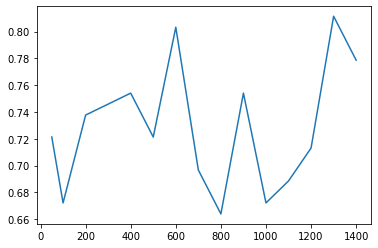

In [134]:
fig, ax = plt.subplots()
ax.plot(feat, scores)